# Project Exploratory Analysis
## Data Overview

   This project is focused on analyzing traffic stop data from CMPD. The data used is public data from https://data.charlottenc.gov/datasets/charlotte::officer-traffic-stops/explore. A csv of this data set has been downloaded for use in this project. Our end goal is to create a supervised machine learning model focused on predicting the result of a stop. We're hoping to analyze discrimination in the result of a stop.
   
## Import Statements

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

In [2]:
matplotlib.rcParams.update({'font.size':22})

## Data Overview

In [3]:
df = pd.read_csv("Officer_Traffic_Stops.csv")

Let's look at an overview of what each of our columns have

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139528 entries, 0 to 139527
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   OBJECTID                  139528 non-null  int64 
 1   Month_of_Stop             139528 non-null  object
 2   Reason_for_Stop           139528 non-null  object
 3   Officer_Race              139528 non-null  object
 4   Officer_Gender            139528 non-null  object
 5   Officer_Years_of_Service  139528 non-null  int64 
 6   Driver_Race               139528 non-null  object
 7   Driver_Ethnicity          139528 non-null  object
 8   Driver_Gender             139528 non-null  object
 9   Driver_Age                139528 non-null  int64 
 10  Was_a_Search_Conducted    139528 non-null  object
 11  Result_of_Stop            139528 non-null  object
 12  CMPD_Division             135516 non-null  object
 13  GlobalID                  139528 non-null  object
dtypes: i

We see here that we have a lot of text data except for drive age, officer years of service, and an ID tag. Let's get a little better of a look at what our data actually looks like.

In [5]:
df.head()

OBJECTID Month_of_Stop            Reason_for_Stop     Officer_Race  \
0         1       2020/01  Speeding                             White   
1         2       2021/05  Vehicle Equipment          Hispanic/Latino   
2         3       2021/12  Speeding                             White   
3         4       2020/01  Vehicle Equipment                    White   
4         5       2020/01  Speeding                             White   

  Officer_Gender  Officer_Years_of_Service Driver_Race Driver_Ethnicity  \
0           Male                        27       White     Non-Hispanic   
1         Female                         3       Black     Non-Hispanic   
2           Male                        16       Black     Non-Hispanic   
3         Female                         4       Black     Non-Hispanic   
4           Male                        25       Black     Non-Hispanic   

  Driver_Gender  Driver_Age Was_a_Search_Conducted   Result_of_Stop  \
0        Female          38                     No   Verbal Warning   
1          Male          35                     No   Verbal Warning   
2          Male          29                     No   Verbal Warning   
3          Male          33                     No   Verbal Warning   
4          Male          36                     No  Citation Issued   

              CMPD_Division                                GlobalID  
0  University City Division  {00000000-0000-0000-0000-000000000000}  
1       Providence Division  {00000000-0000-0000-0000-000000000000}  
2  University City Division  {00000000-0000-0000-0000-000000000000}  
3  University City Division  {00000000-0000-0000-0000-000000000000}  
4     Steele Creek Division  {00000000-0000-0000-0000-000000000000}

Looking at this we can drop the object ID as it doesn't appear to provide any useful information. We can also see that GlobalID also doesn't appear to have any info in it. Let's check to see how many distinct categories there are in GlobalID.

In [6]:
df['GlobalID'].unique()

array(['{00000000-0000-0000-0000-000000000000}'], dtype=object)

We see that there's only one value for GlobalID. 

In [7]:
df=df.drop(columns=['OBJECTID','GlobalID'])

We now have to handle the null values in CMPD_Division. Let's look at all of the unique values in CMPD_Division to find see what we cannot assign for the null values.

In [8]:
df['CMPD_Division'].unique()

array(['University City Division', 'Providence Division',
       'Steele Creek Division', 'Eastway Division', nan,
       'Hickory Grove Division', 'Westover Division', 'South Division',
       'Central Division', 'North Tryon Division',
       'Independence Division', 'Metro Division', 'North Division',
       'Freedom Division'], dtype=object)

From this we see that we can just name the nan values as "No Division" or "Null".

In [9]:
df.loc[df['CMPD_Division'].isna(),'CMPD_Division'] = 'No Division'

One more thing we need to clean is changing the "Month_of_Stop" to a datetime column.

In [10]:
df['Month_of_Stop'] = pd.to_datetime(df['Month_of_Stop'])

Now let's check one more time to see if the data is now good to start visualizing.

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139528 entries, 0 to 139527
Data columns (total 12 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   Month_of_Stop             139528 non-null  datetime64[ns]
 1   Reason_for_Stop           139528 non-null  object        
 2   Officer_Race              139528 non-null  object        
 3   Officer_Gender            139528 non-null  object        
 4   Officer_Years_of_Service  139528 non-null  int64         
 5   Driver_Race               139528 non-null  object        
 6   Driver_Ethnicity          139528 non-null  object        
 7   Driver_Gender             139528 non-null  object        
 8   Driver_Age                139528 non-null  int64         
 9   Was_a_Search_Conducted    139528 non-null  object        
 10  Result_of_Stop            139528 non-null  object        
 11  CMPD_Division             139528 non-null  object        
dtypes:

We should be good to start visualizing our data.

## Feature Visualization
We'll now start visualizating our features. We'll make bar plots for the categorical data and histograms/kde plots for the numerical features. Let's first start by first getting the columns for each of these types into a list to loop through.

In [12]:
categoricals = df.select_dtypes(include=['object']).columns
numerical = df.select_dtypes(exclude=['object']).columns

Now let's loop through the categoricals.

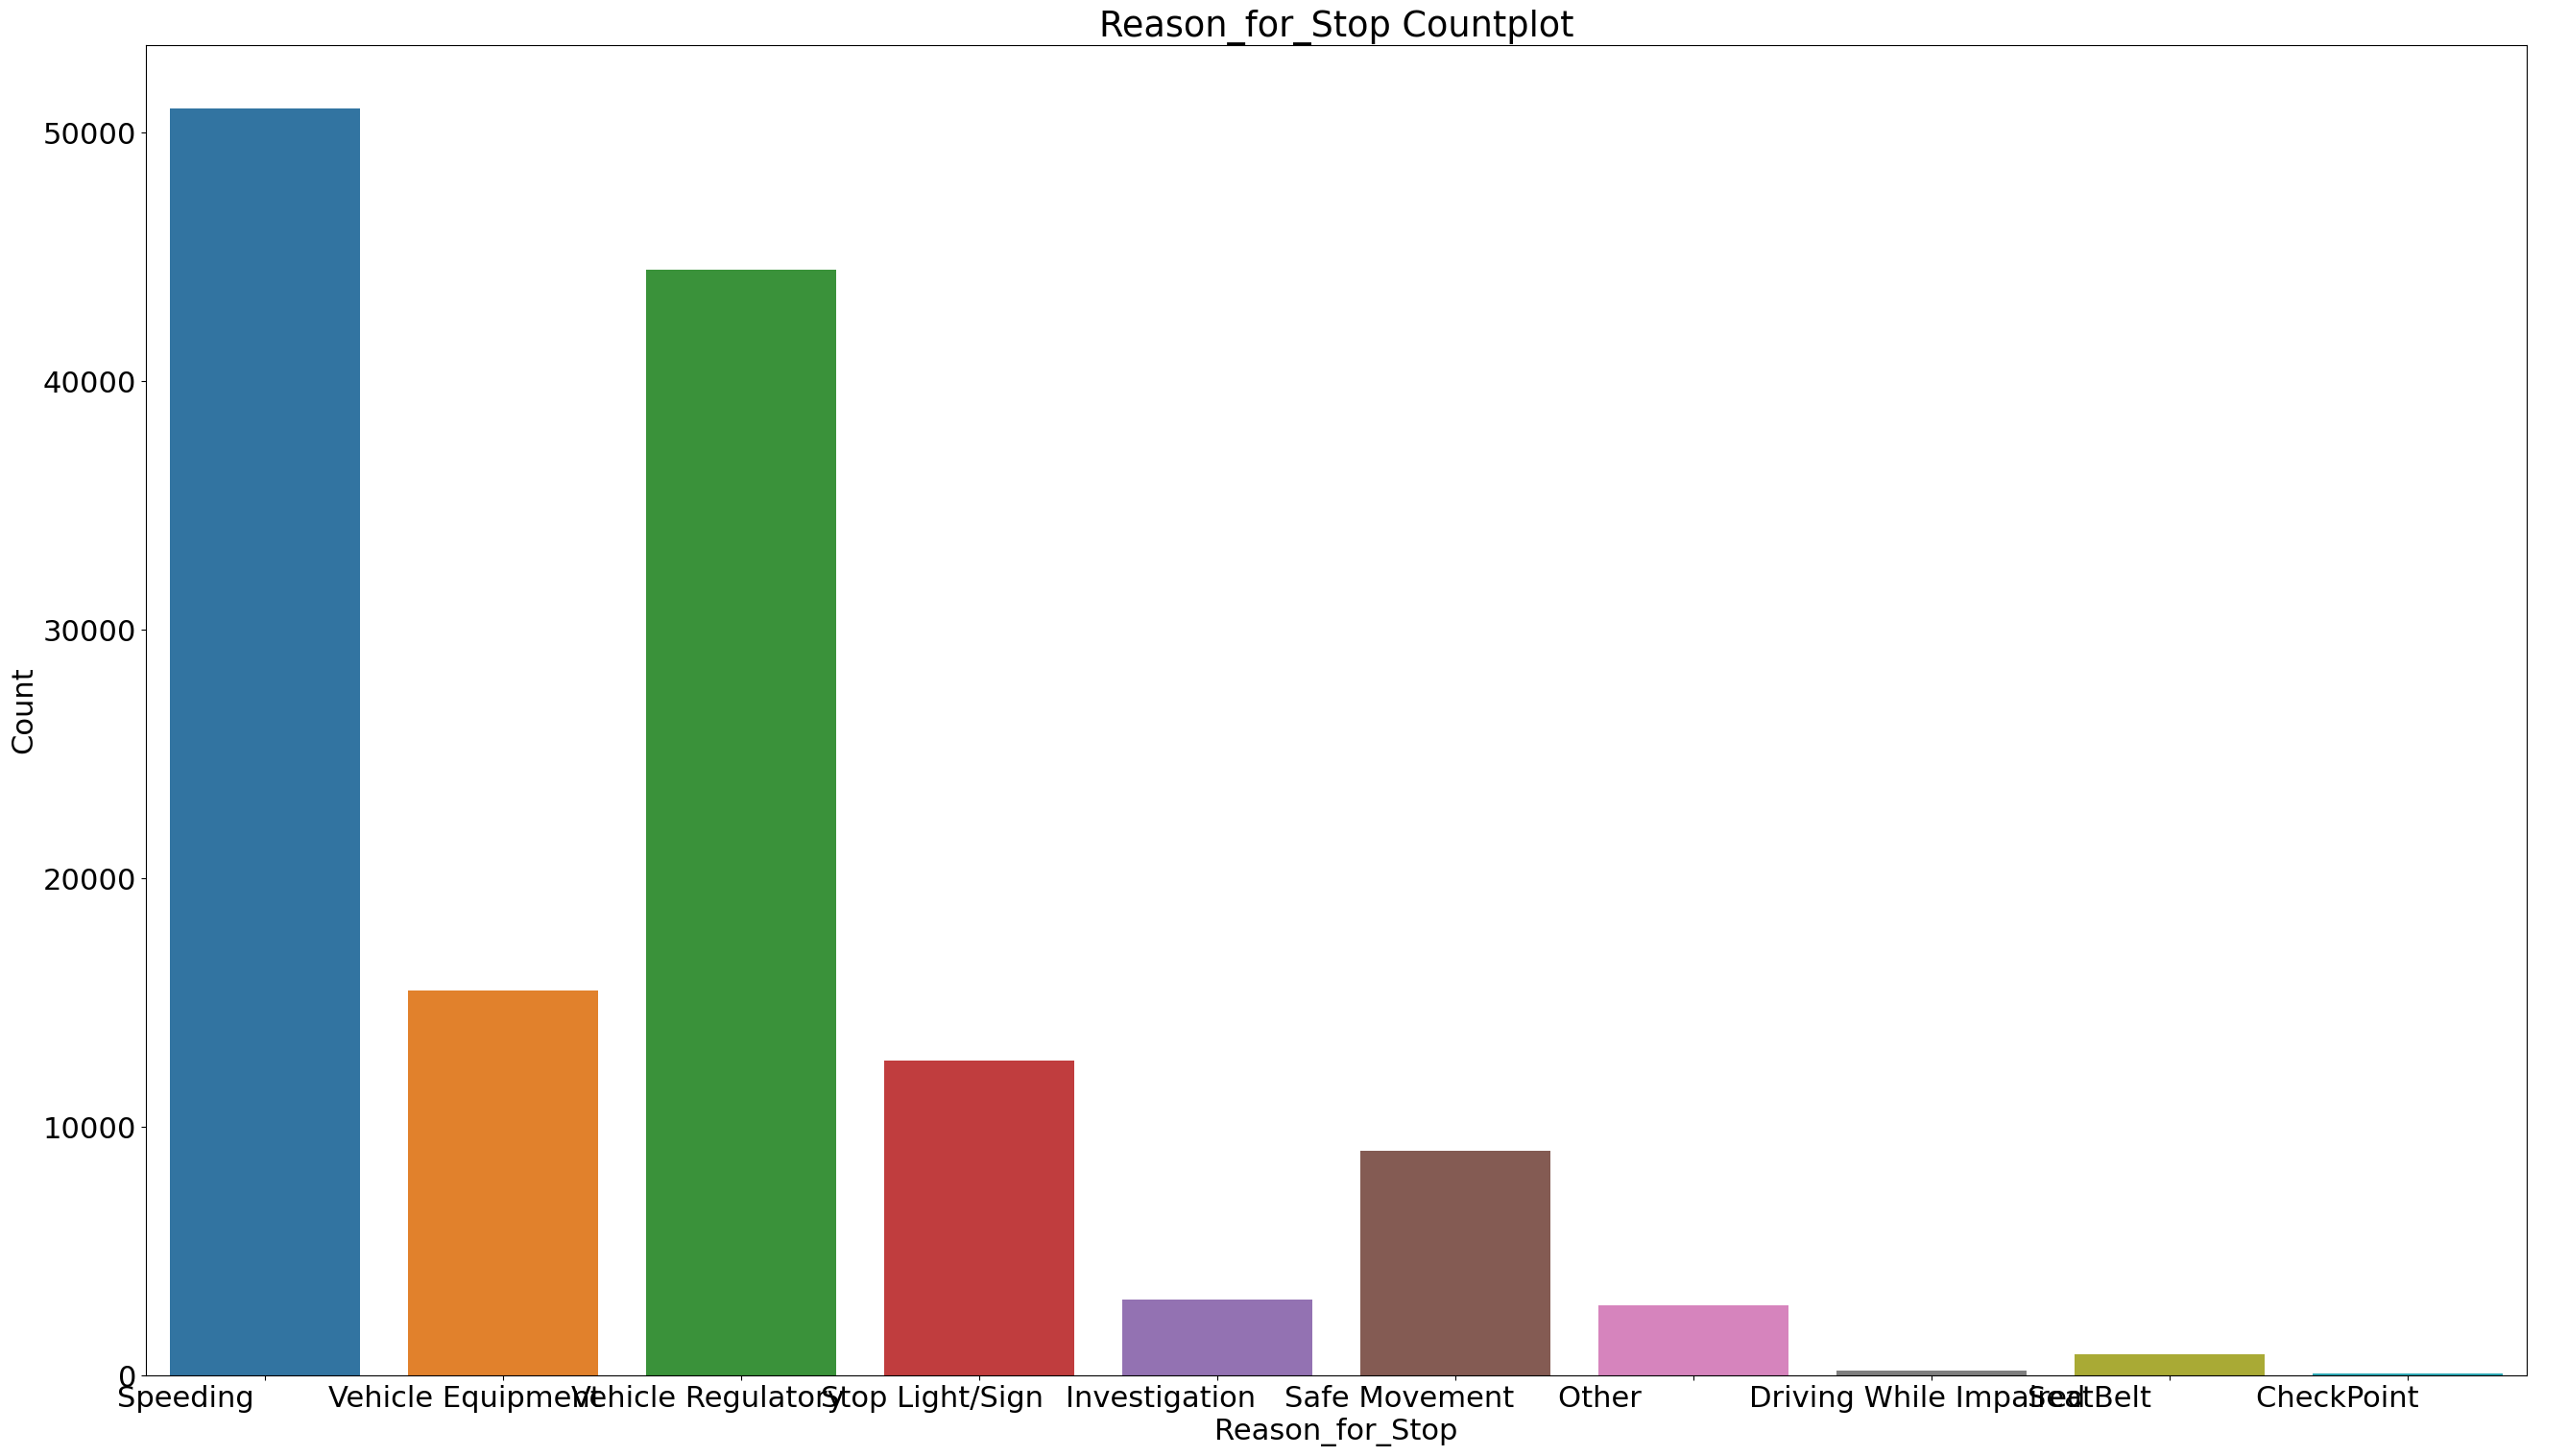

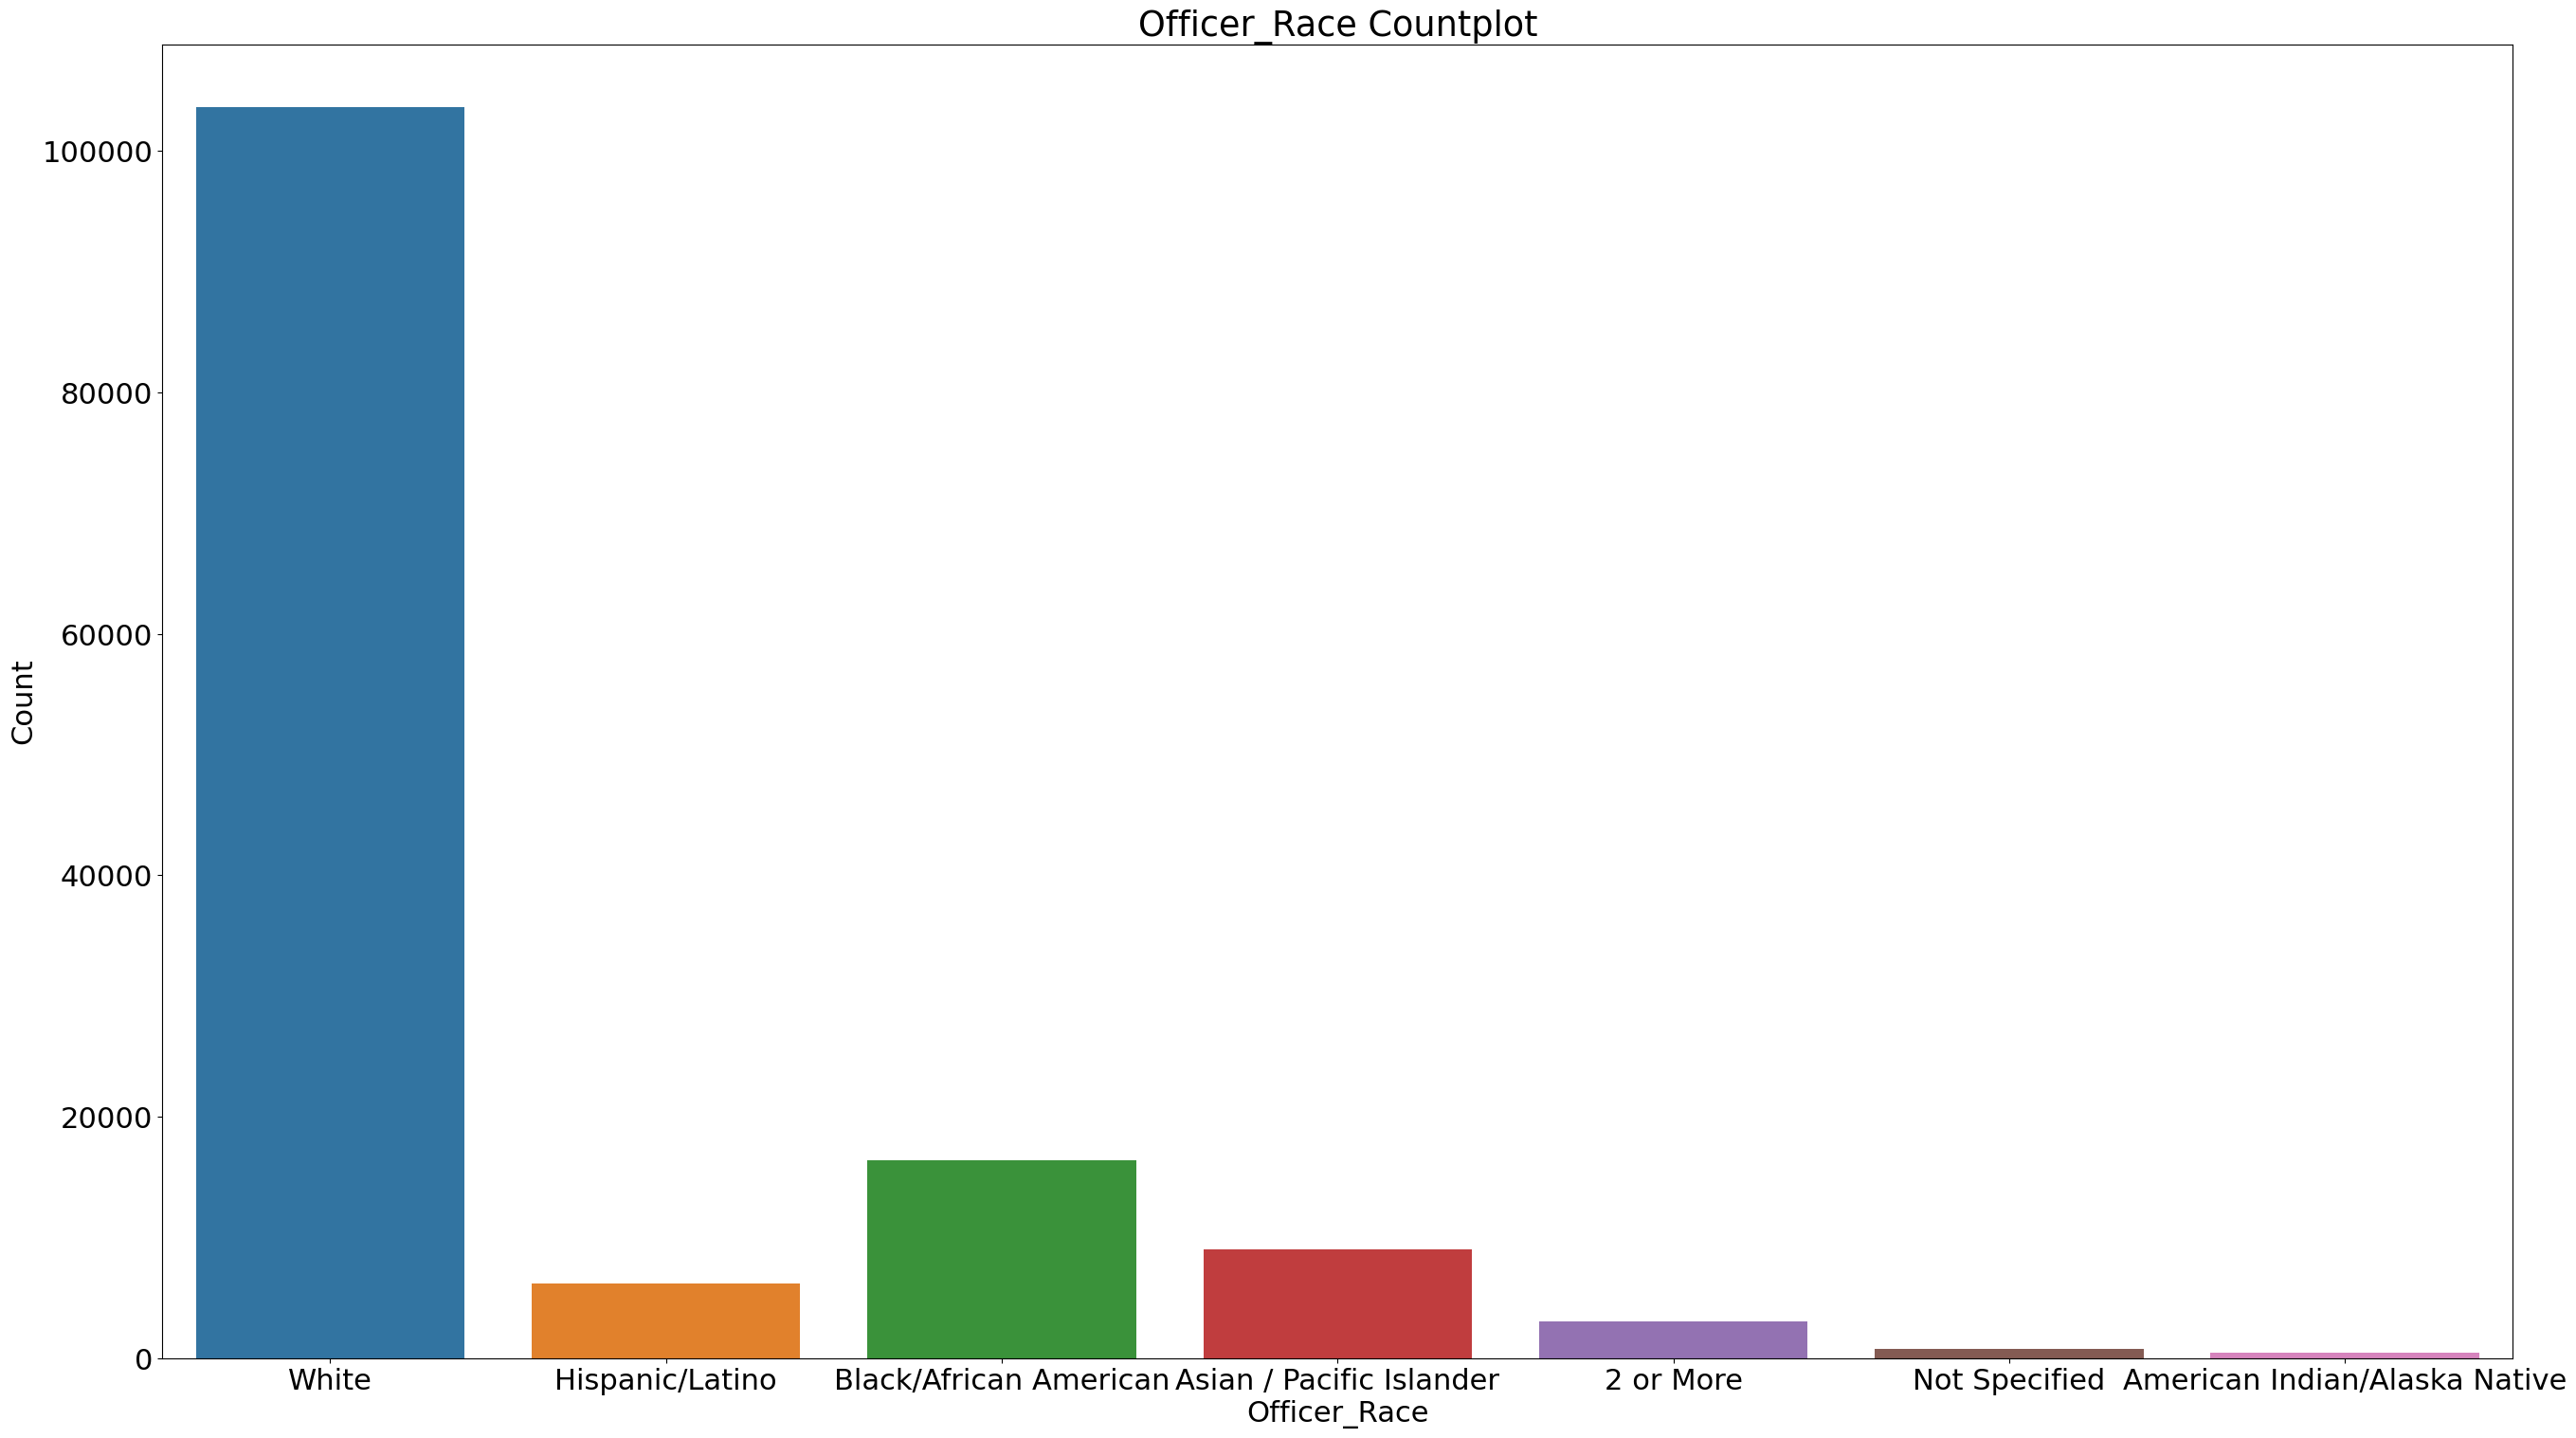

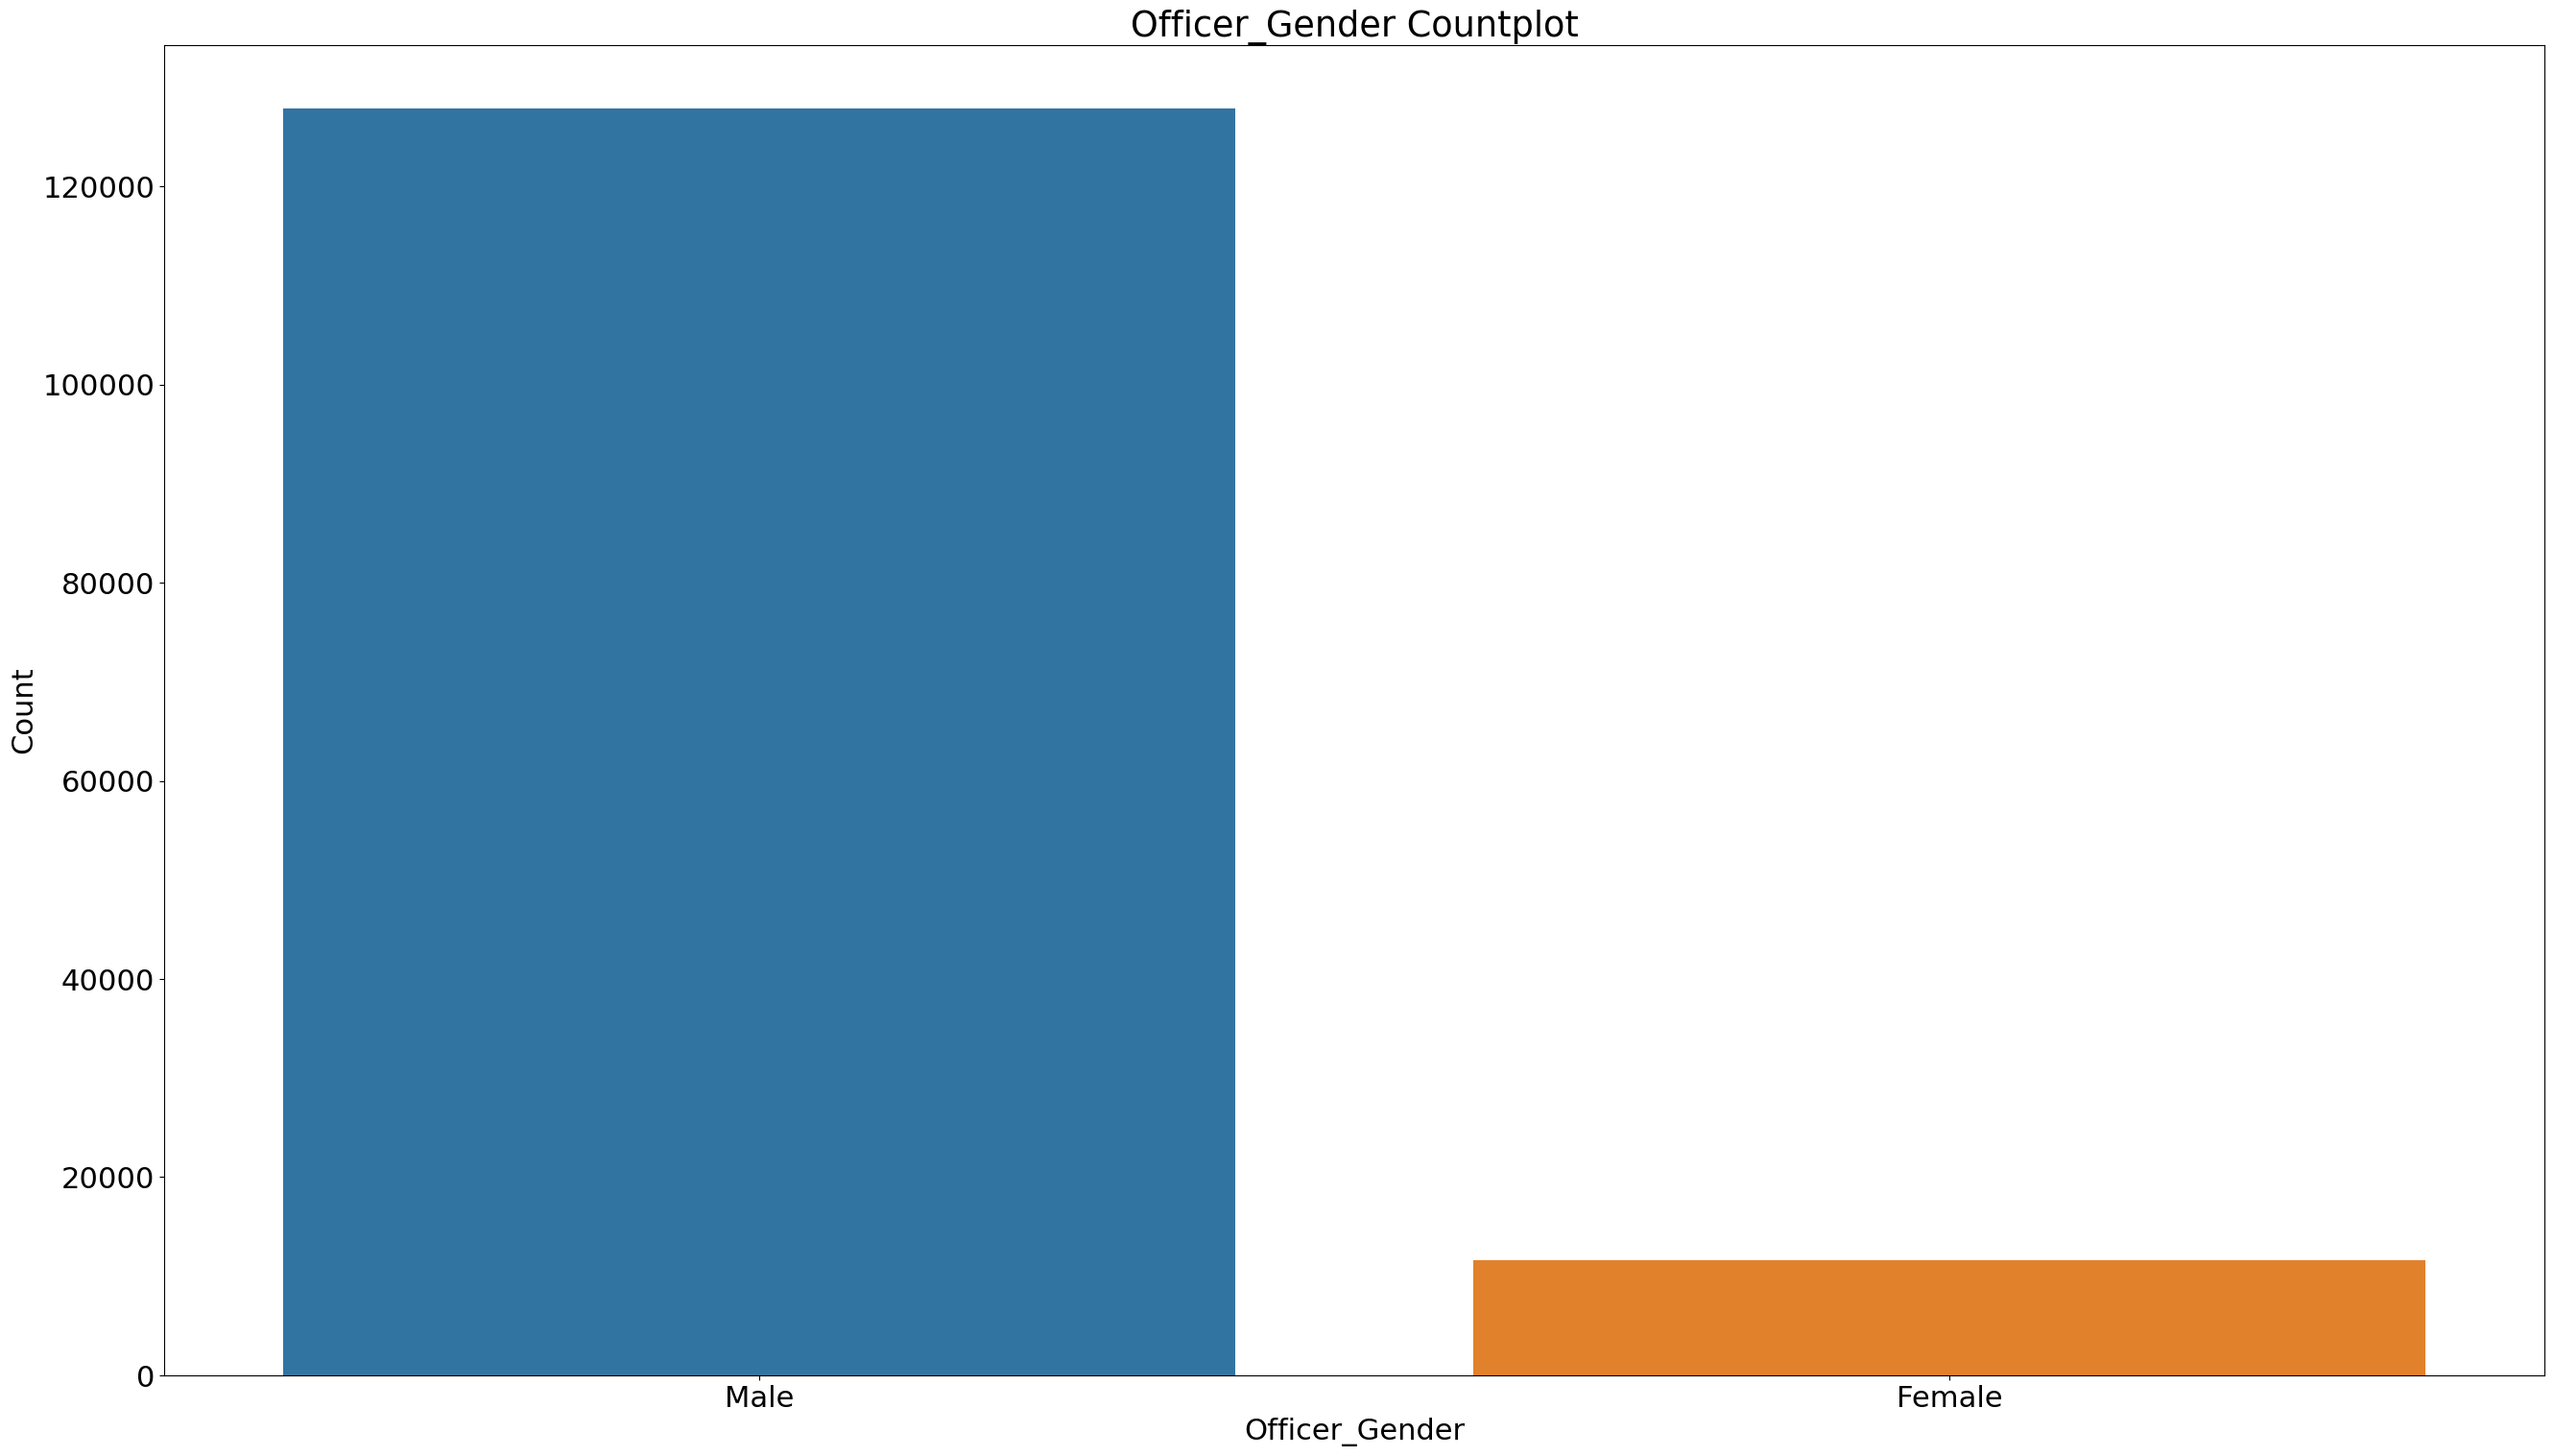

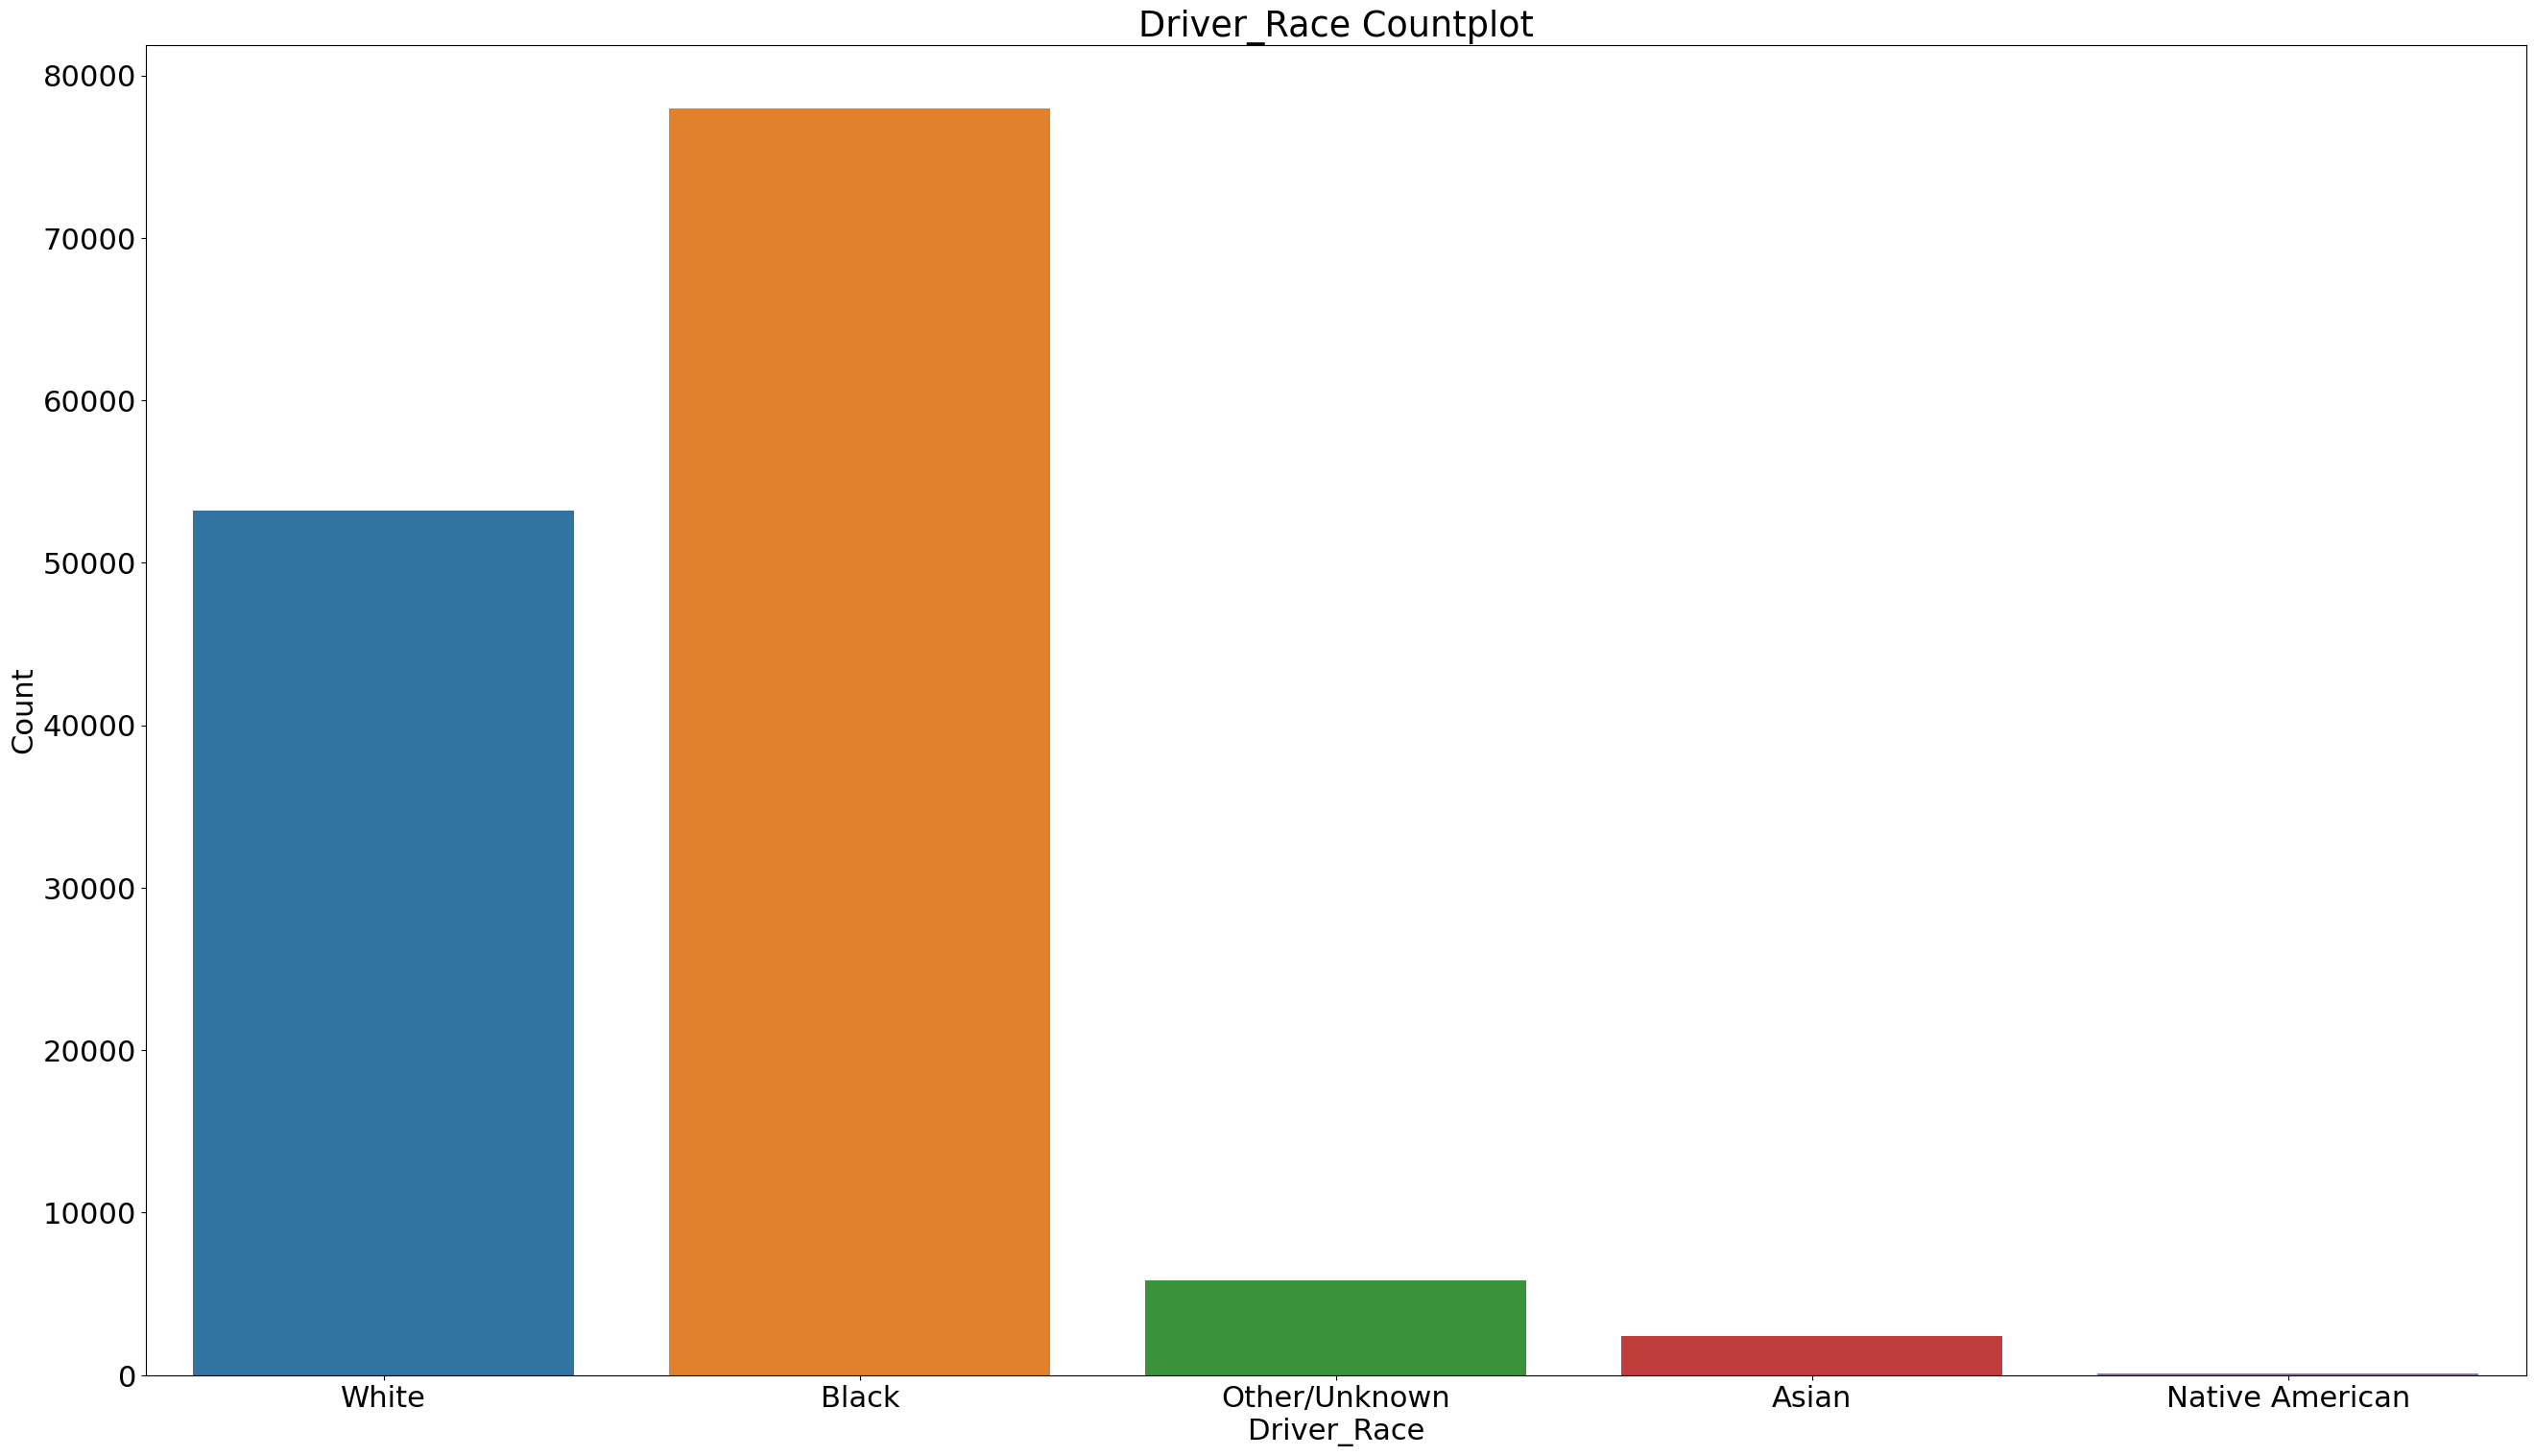

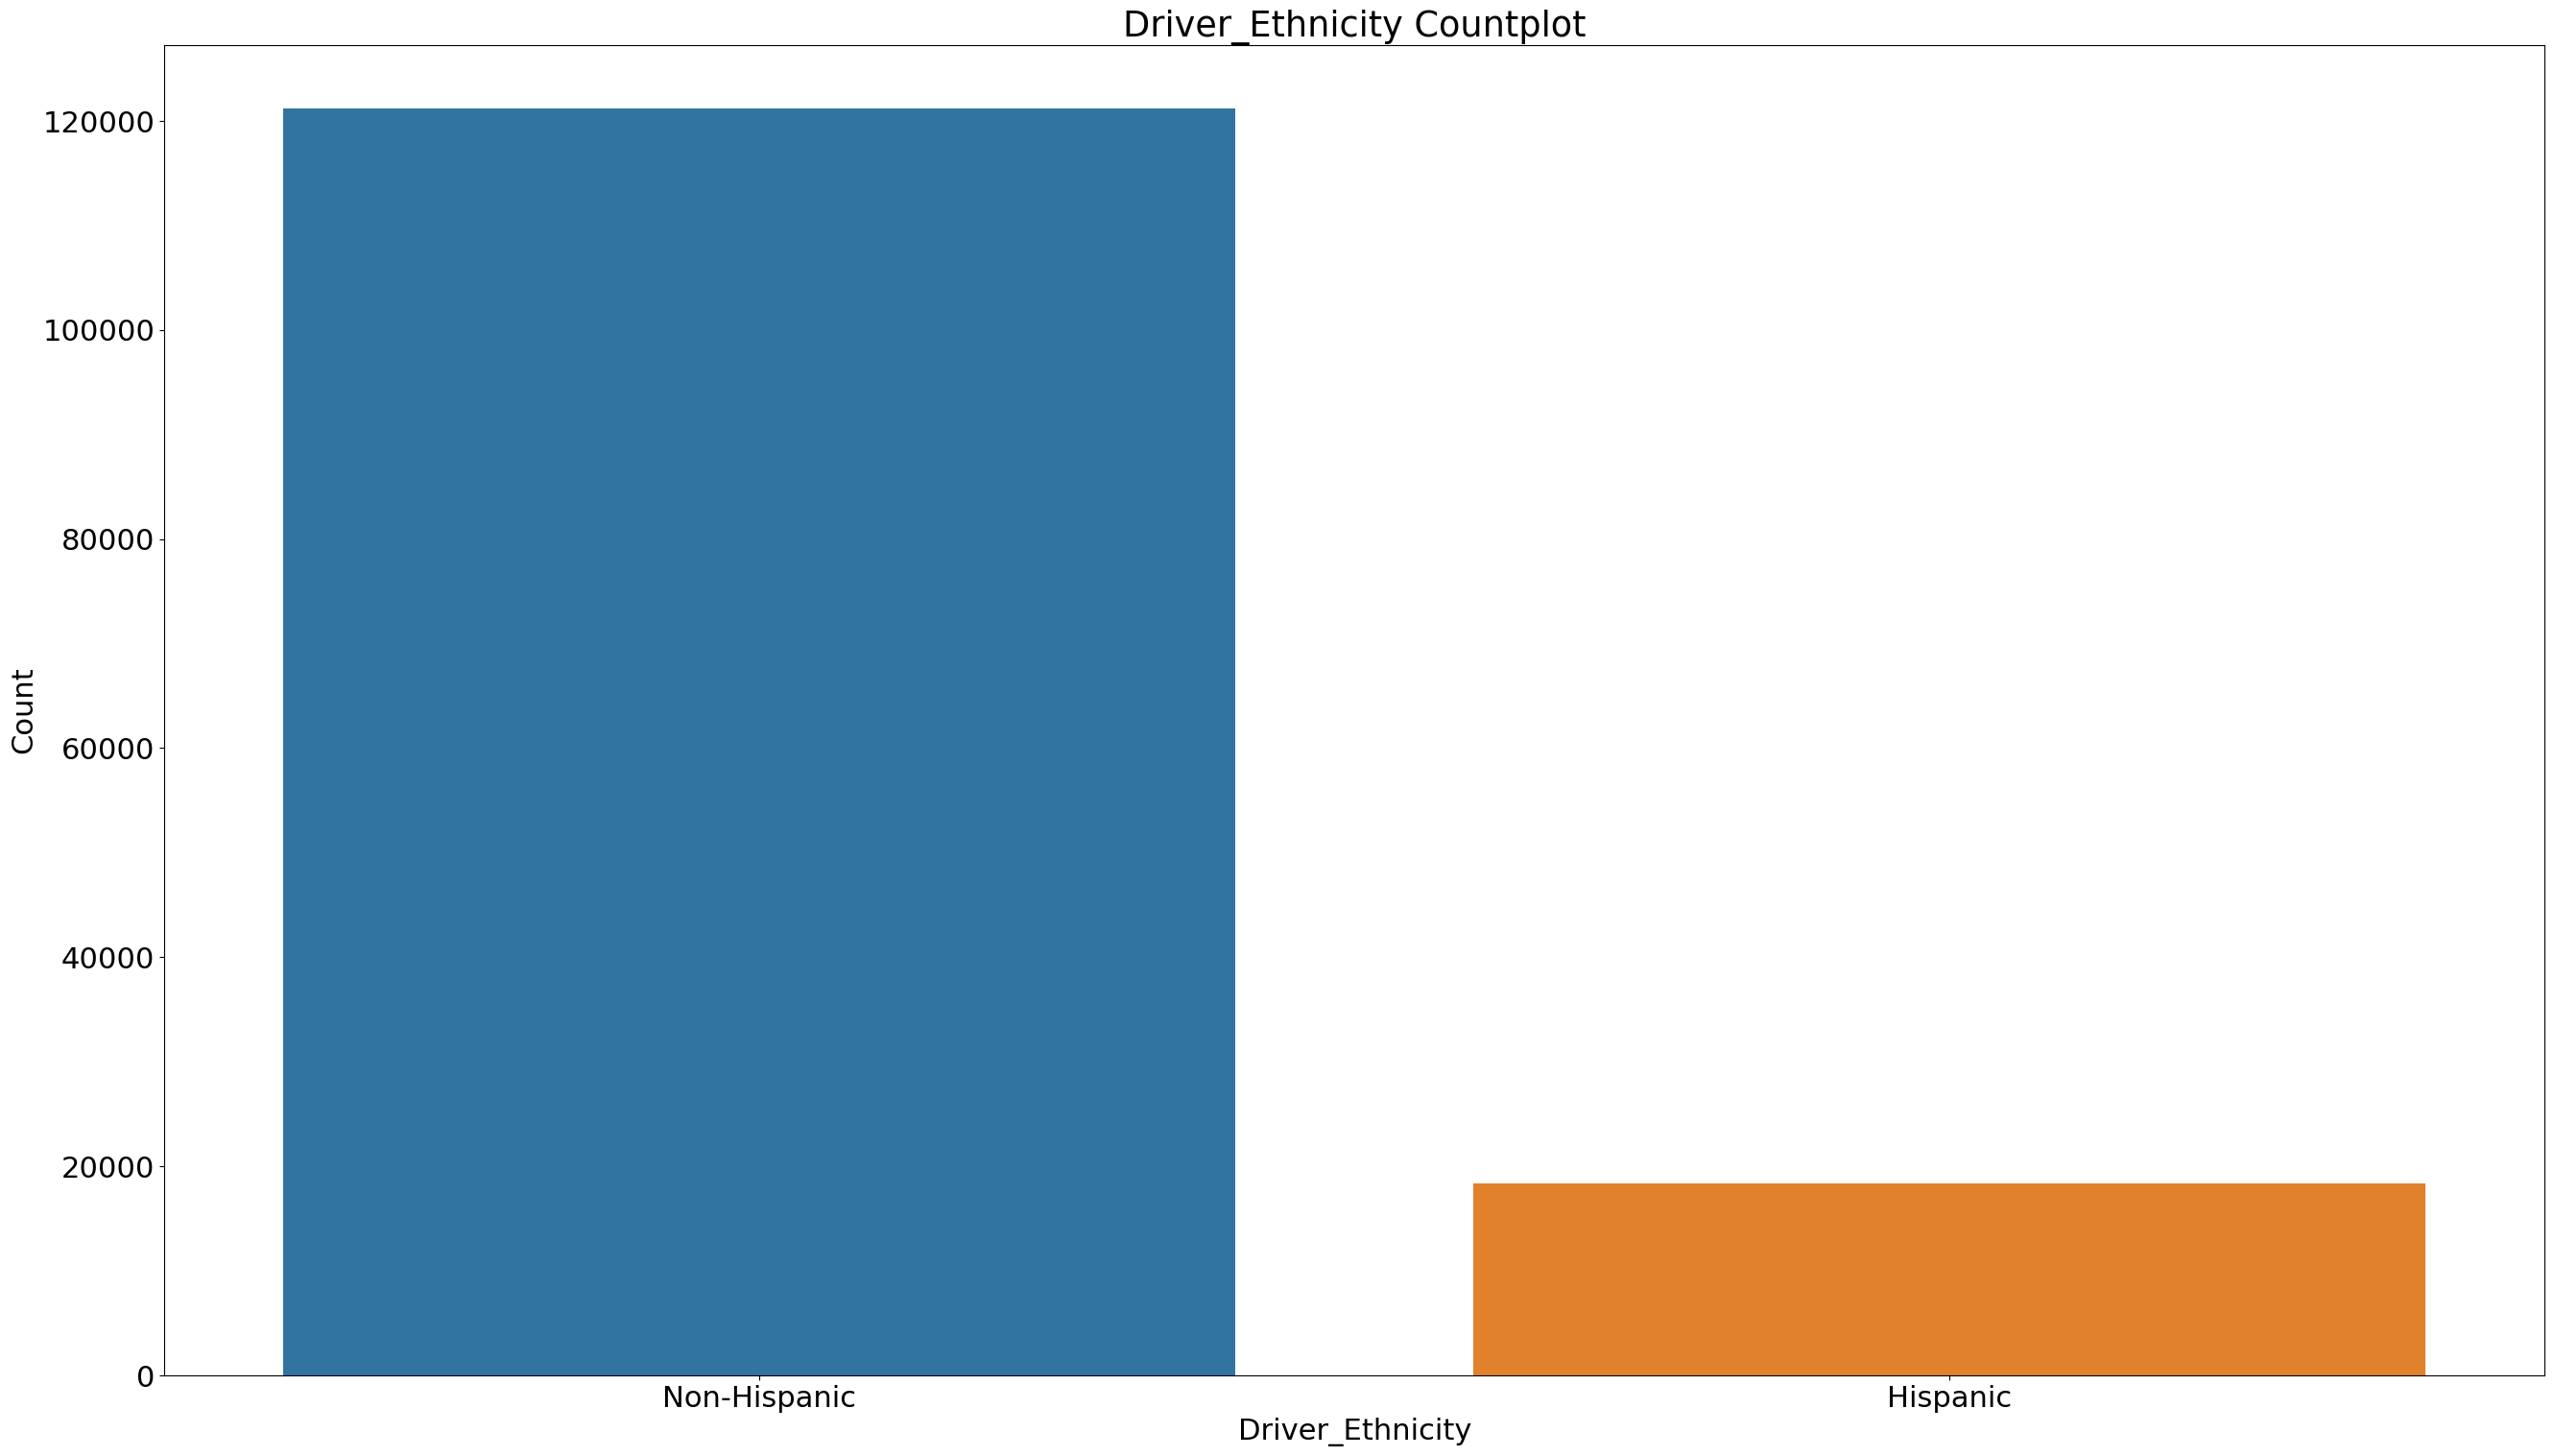

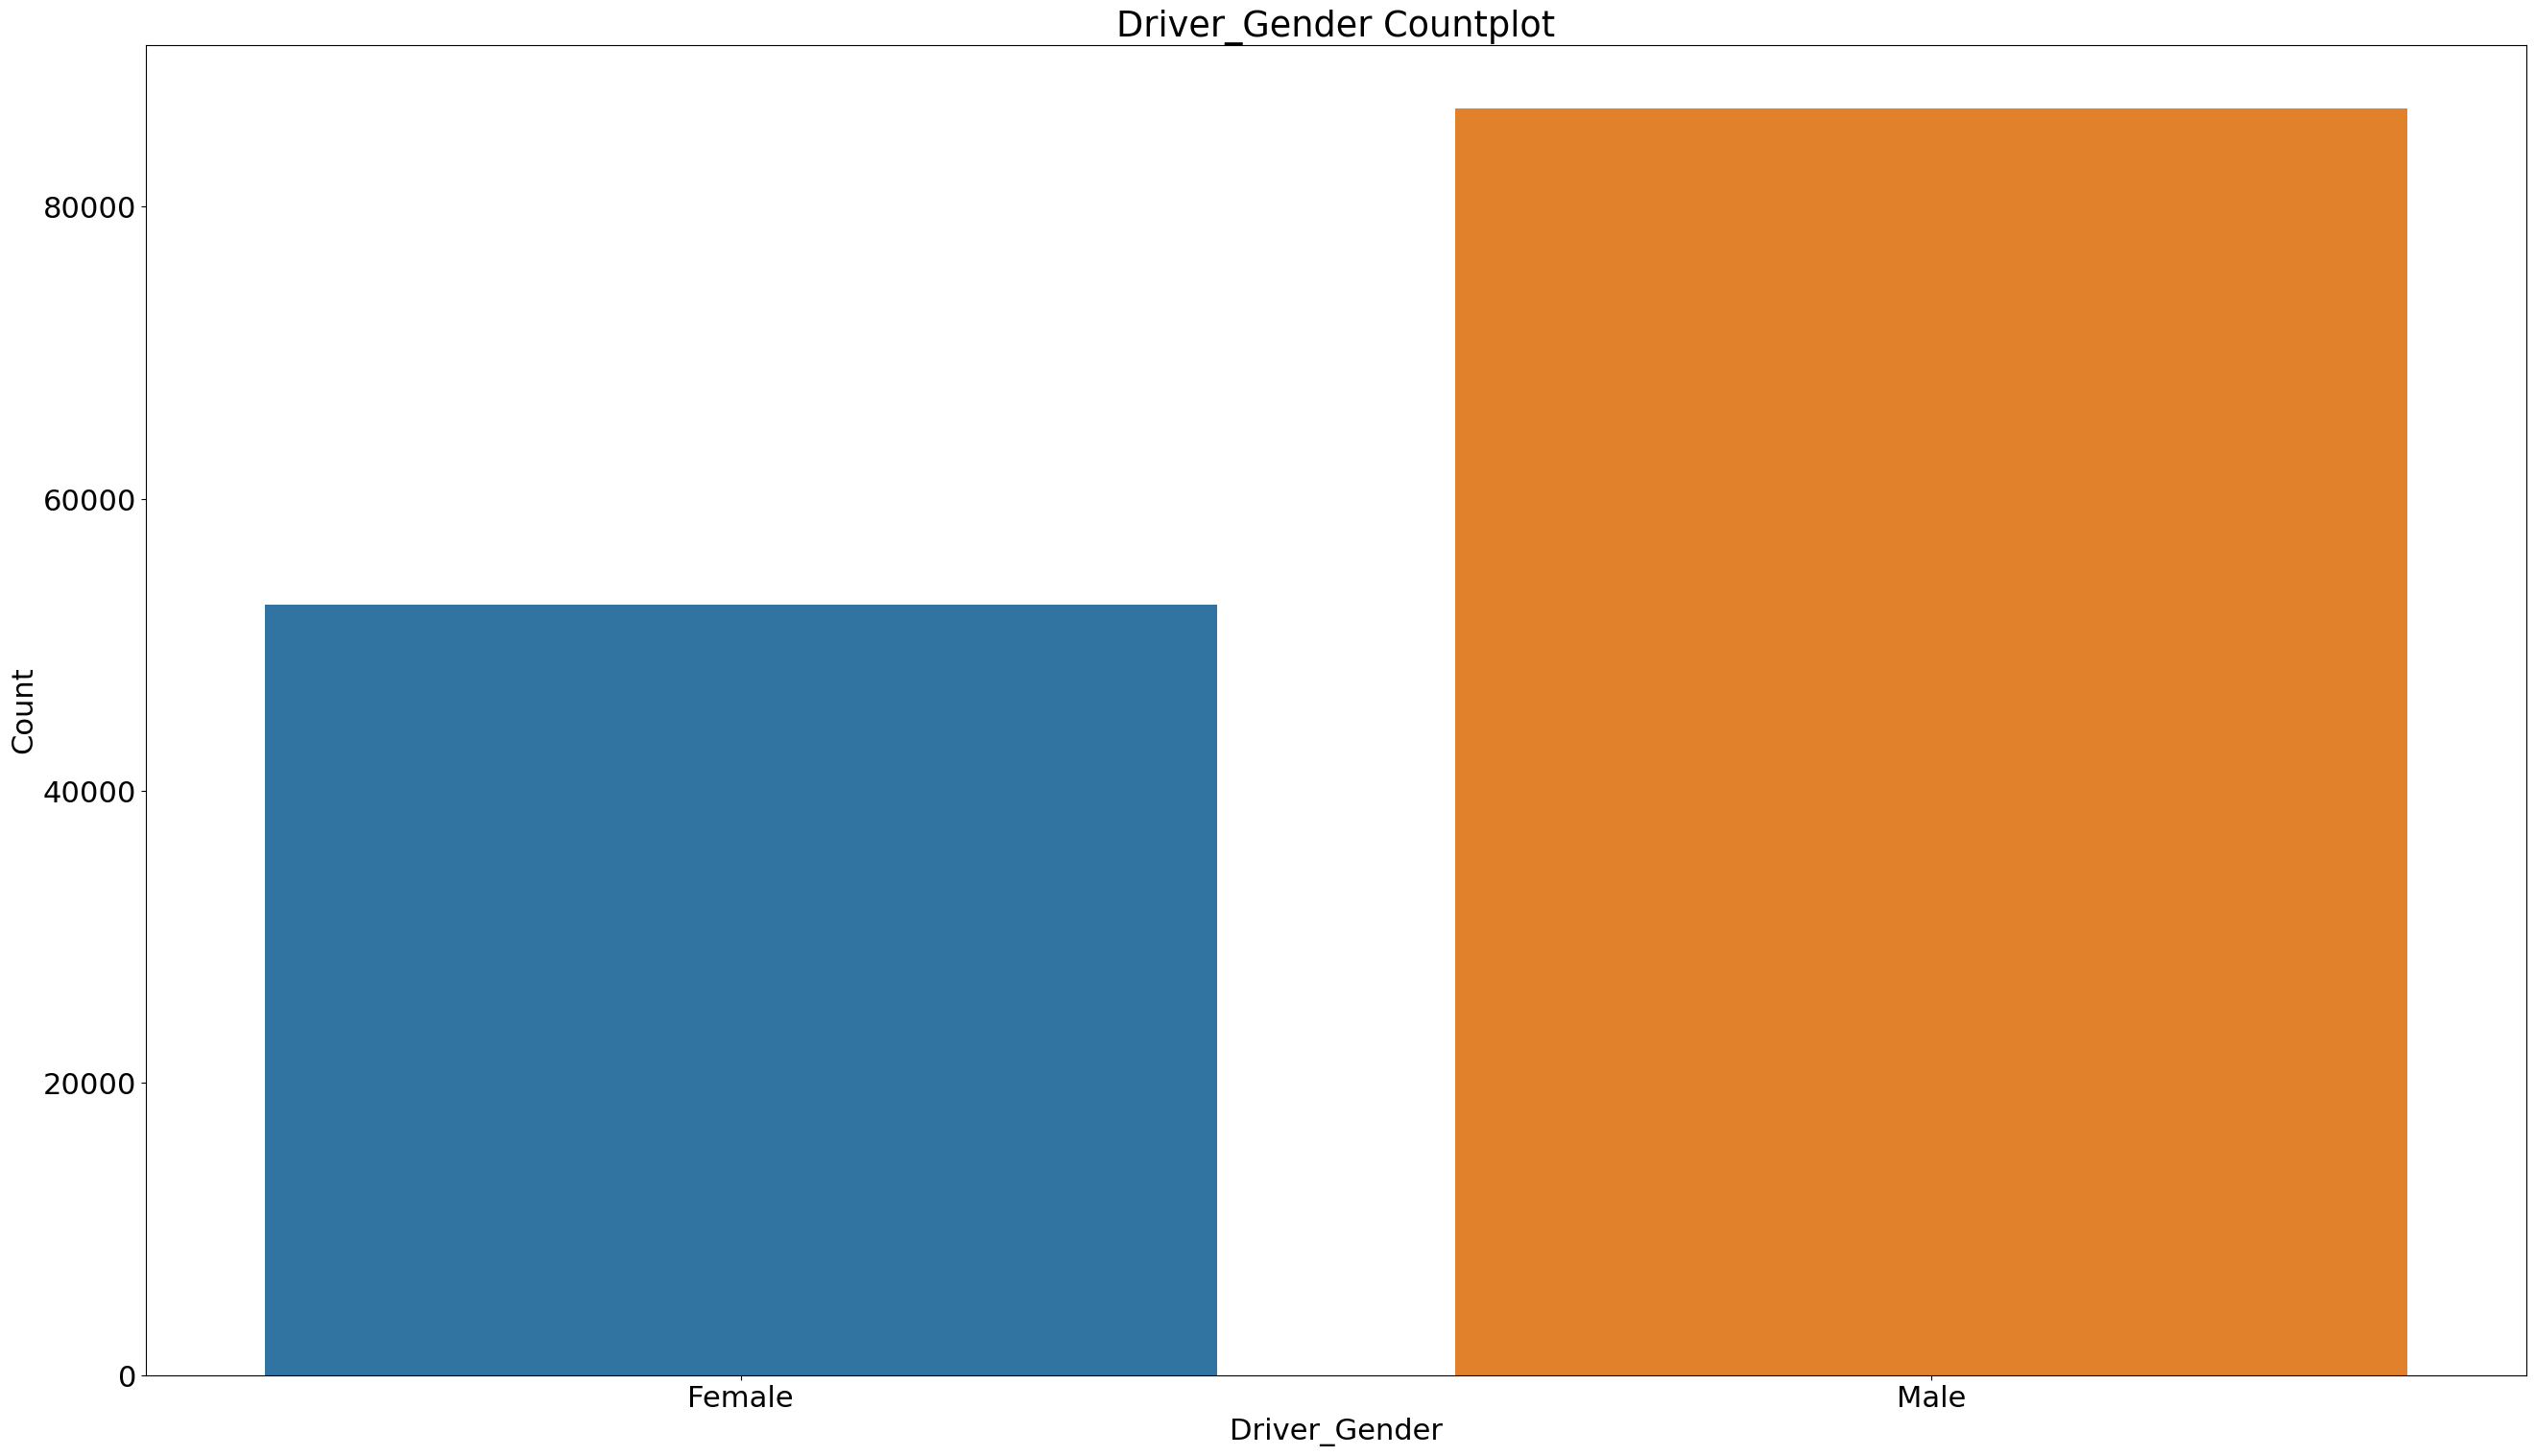

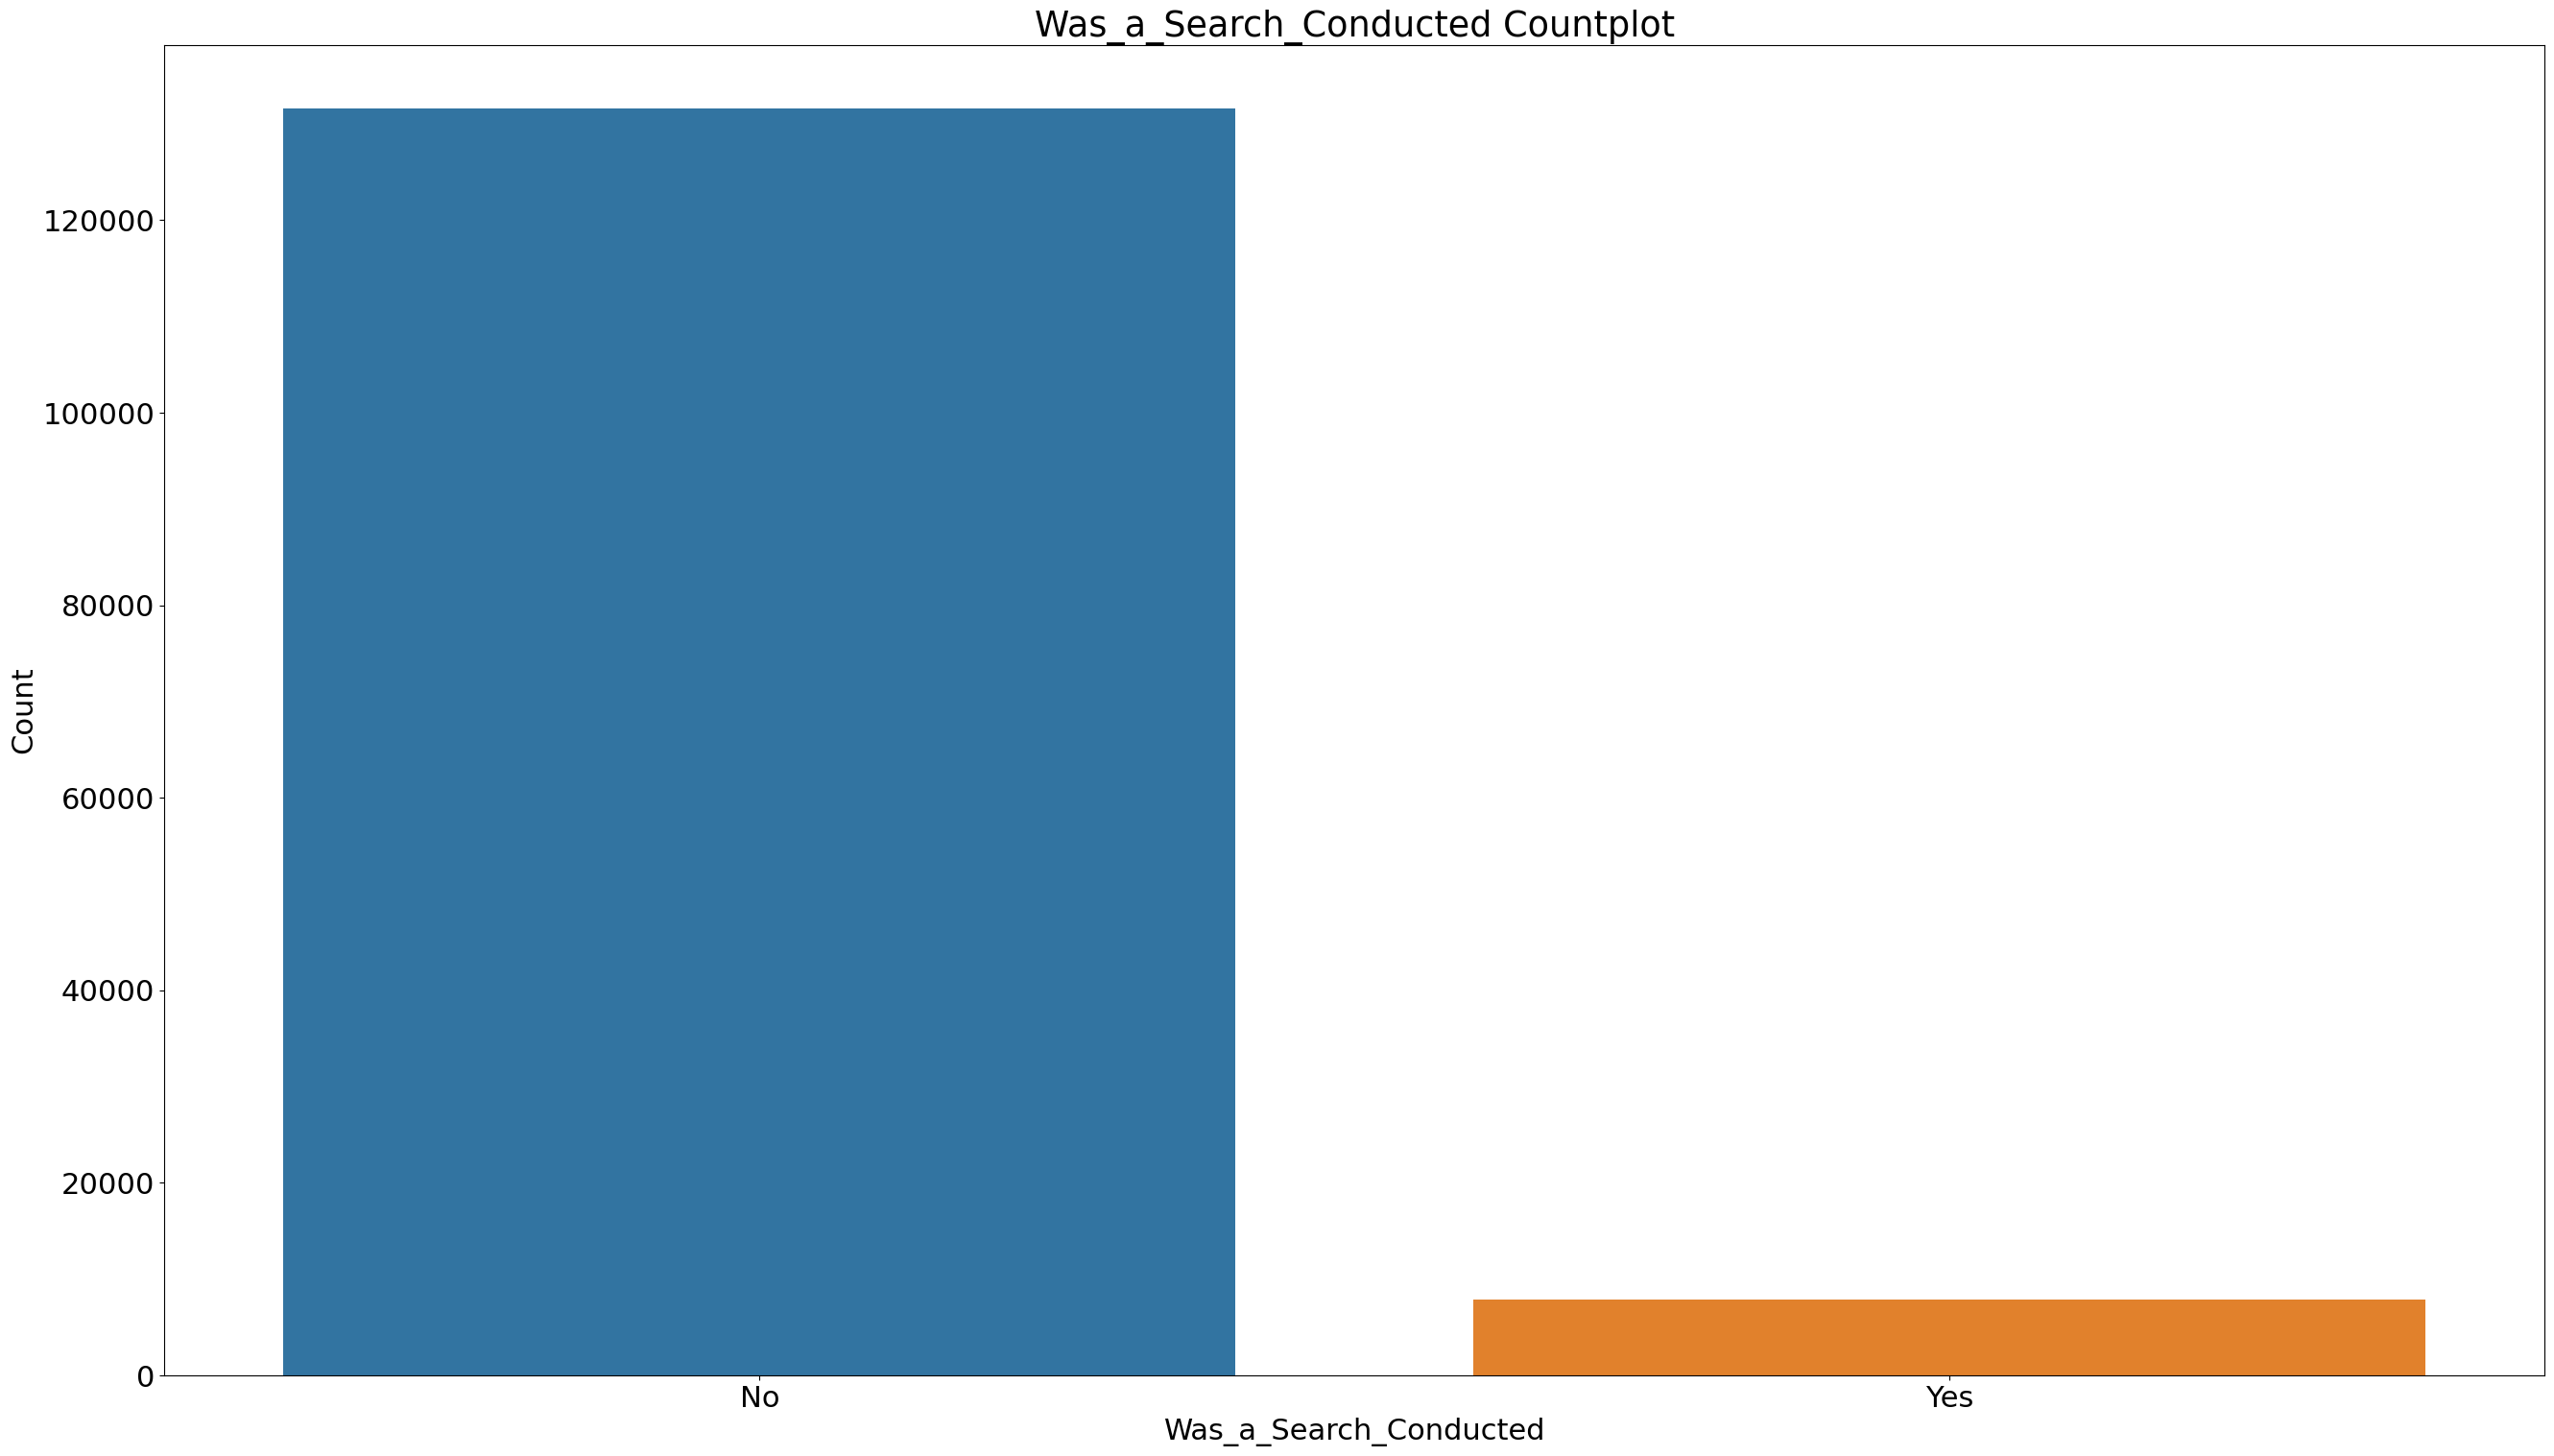

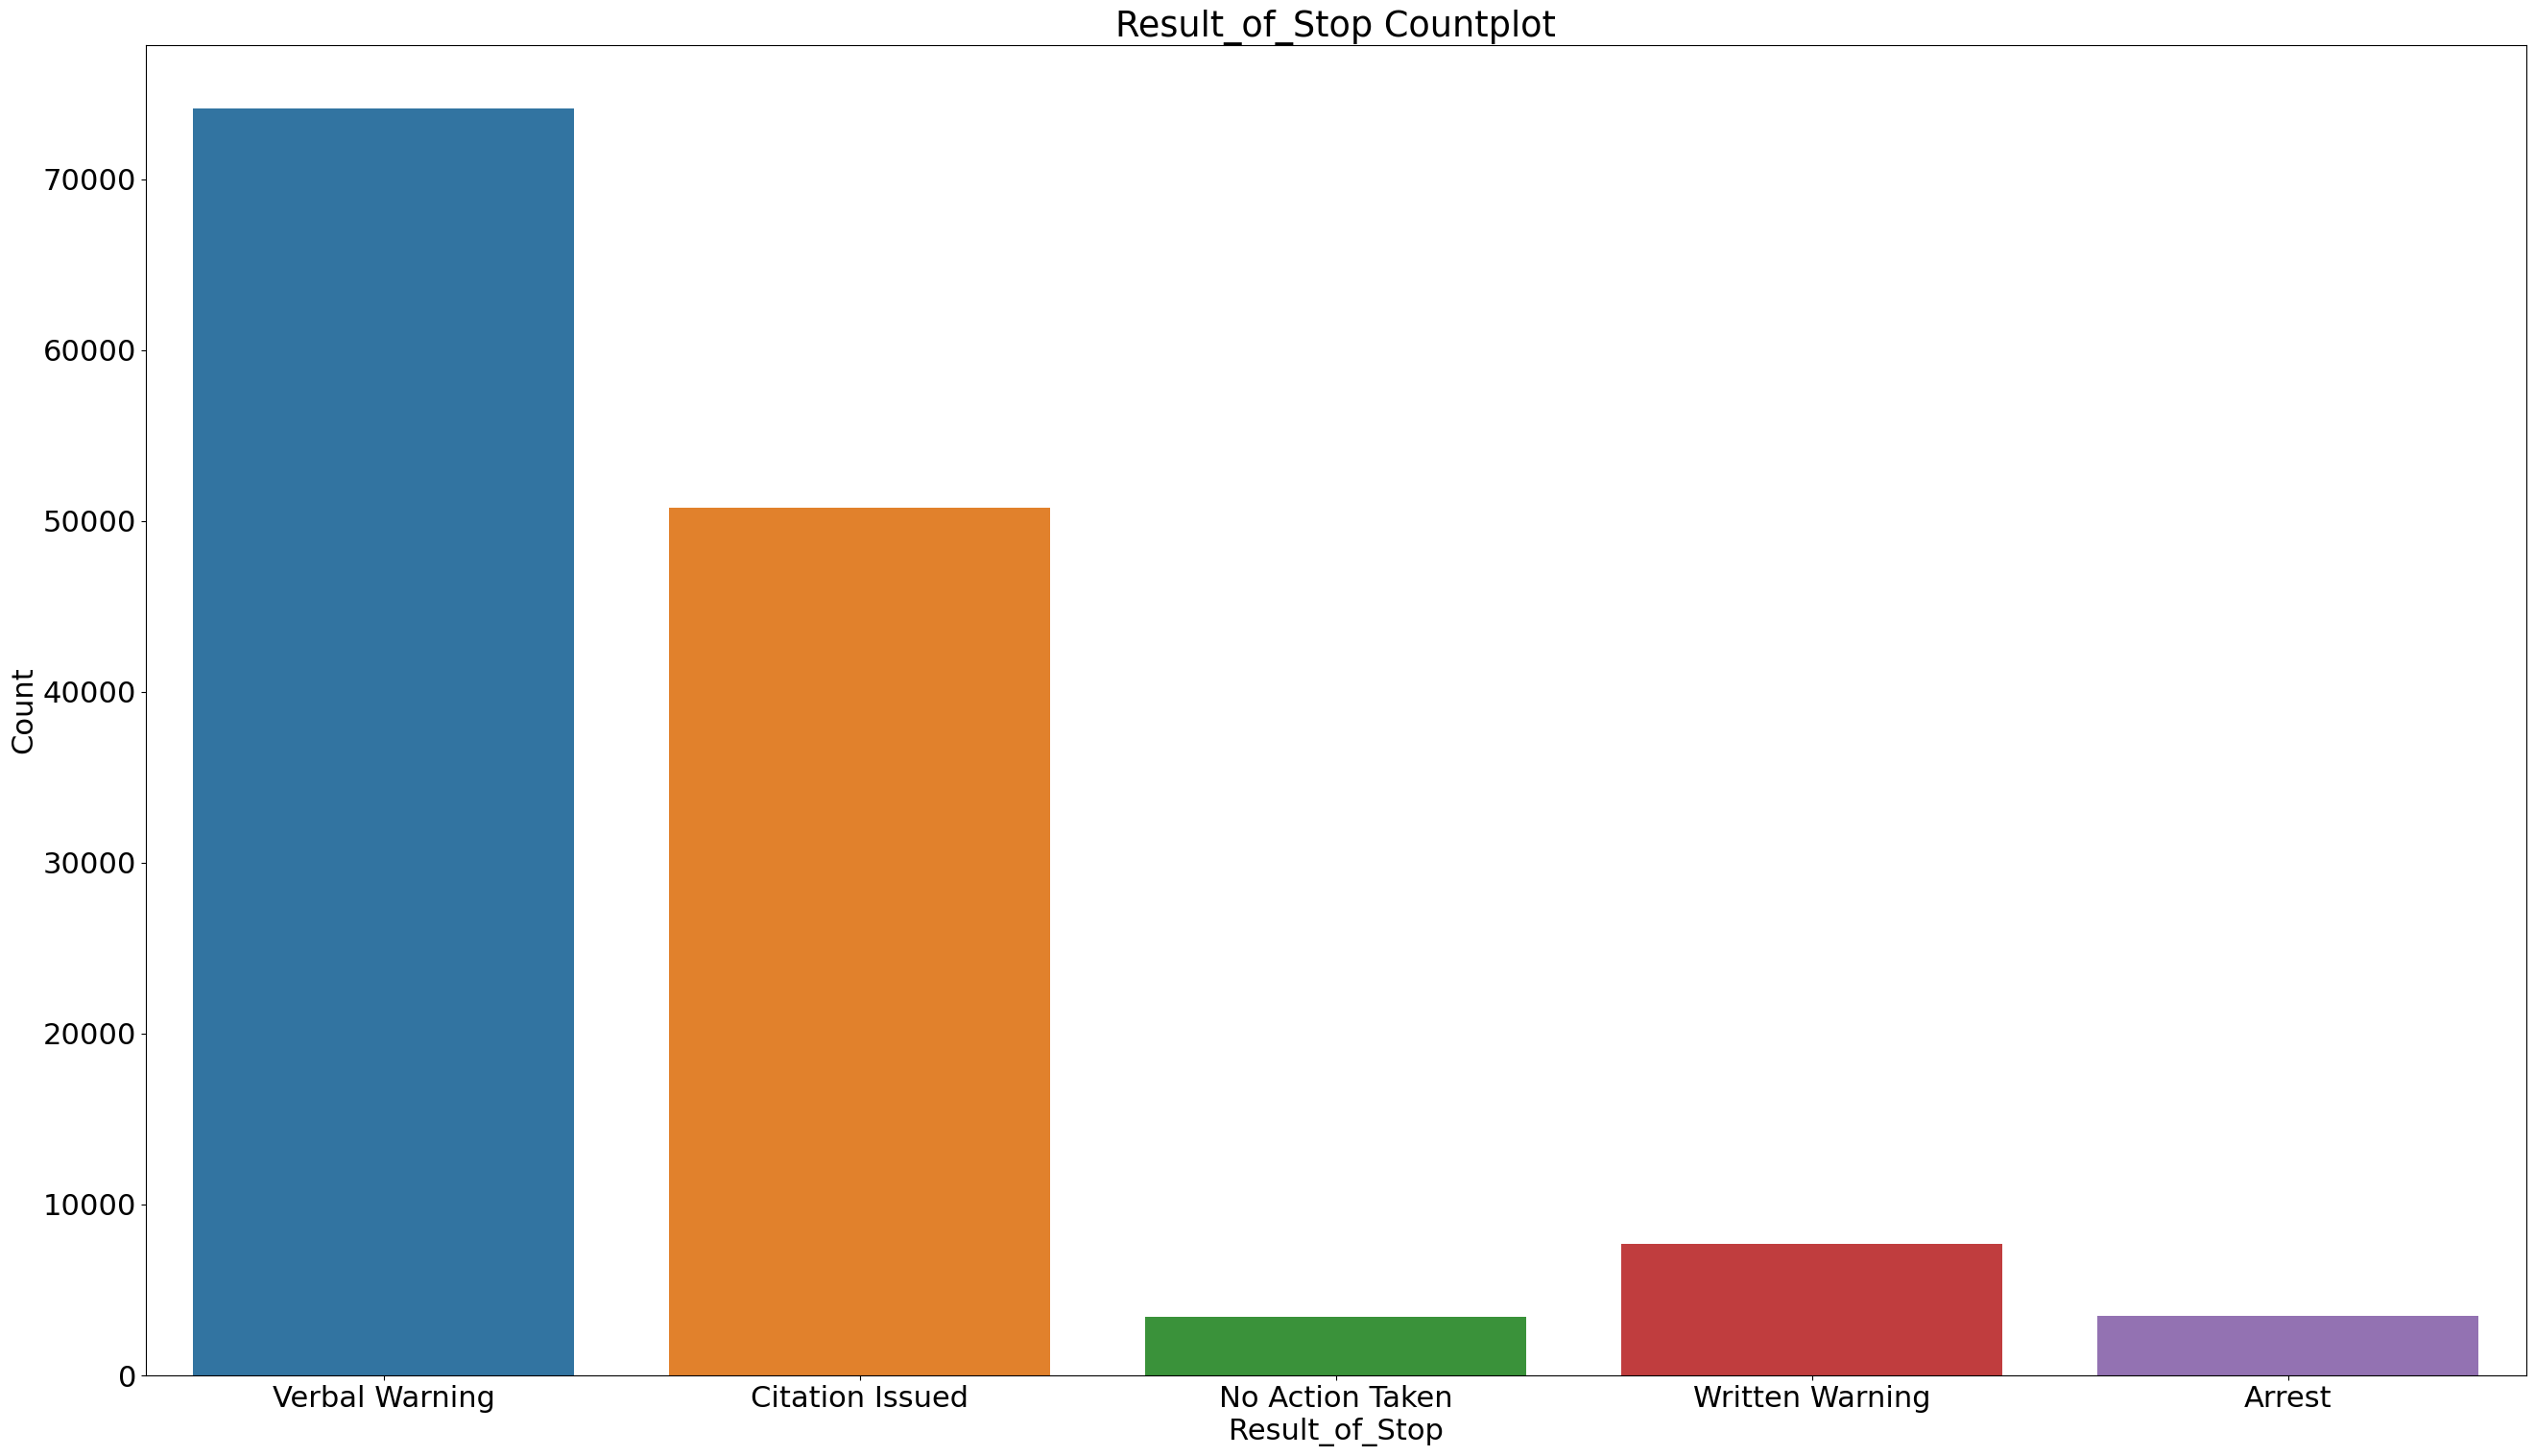

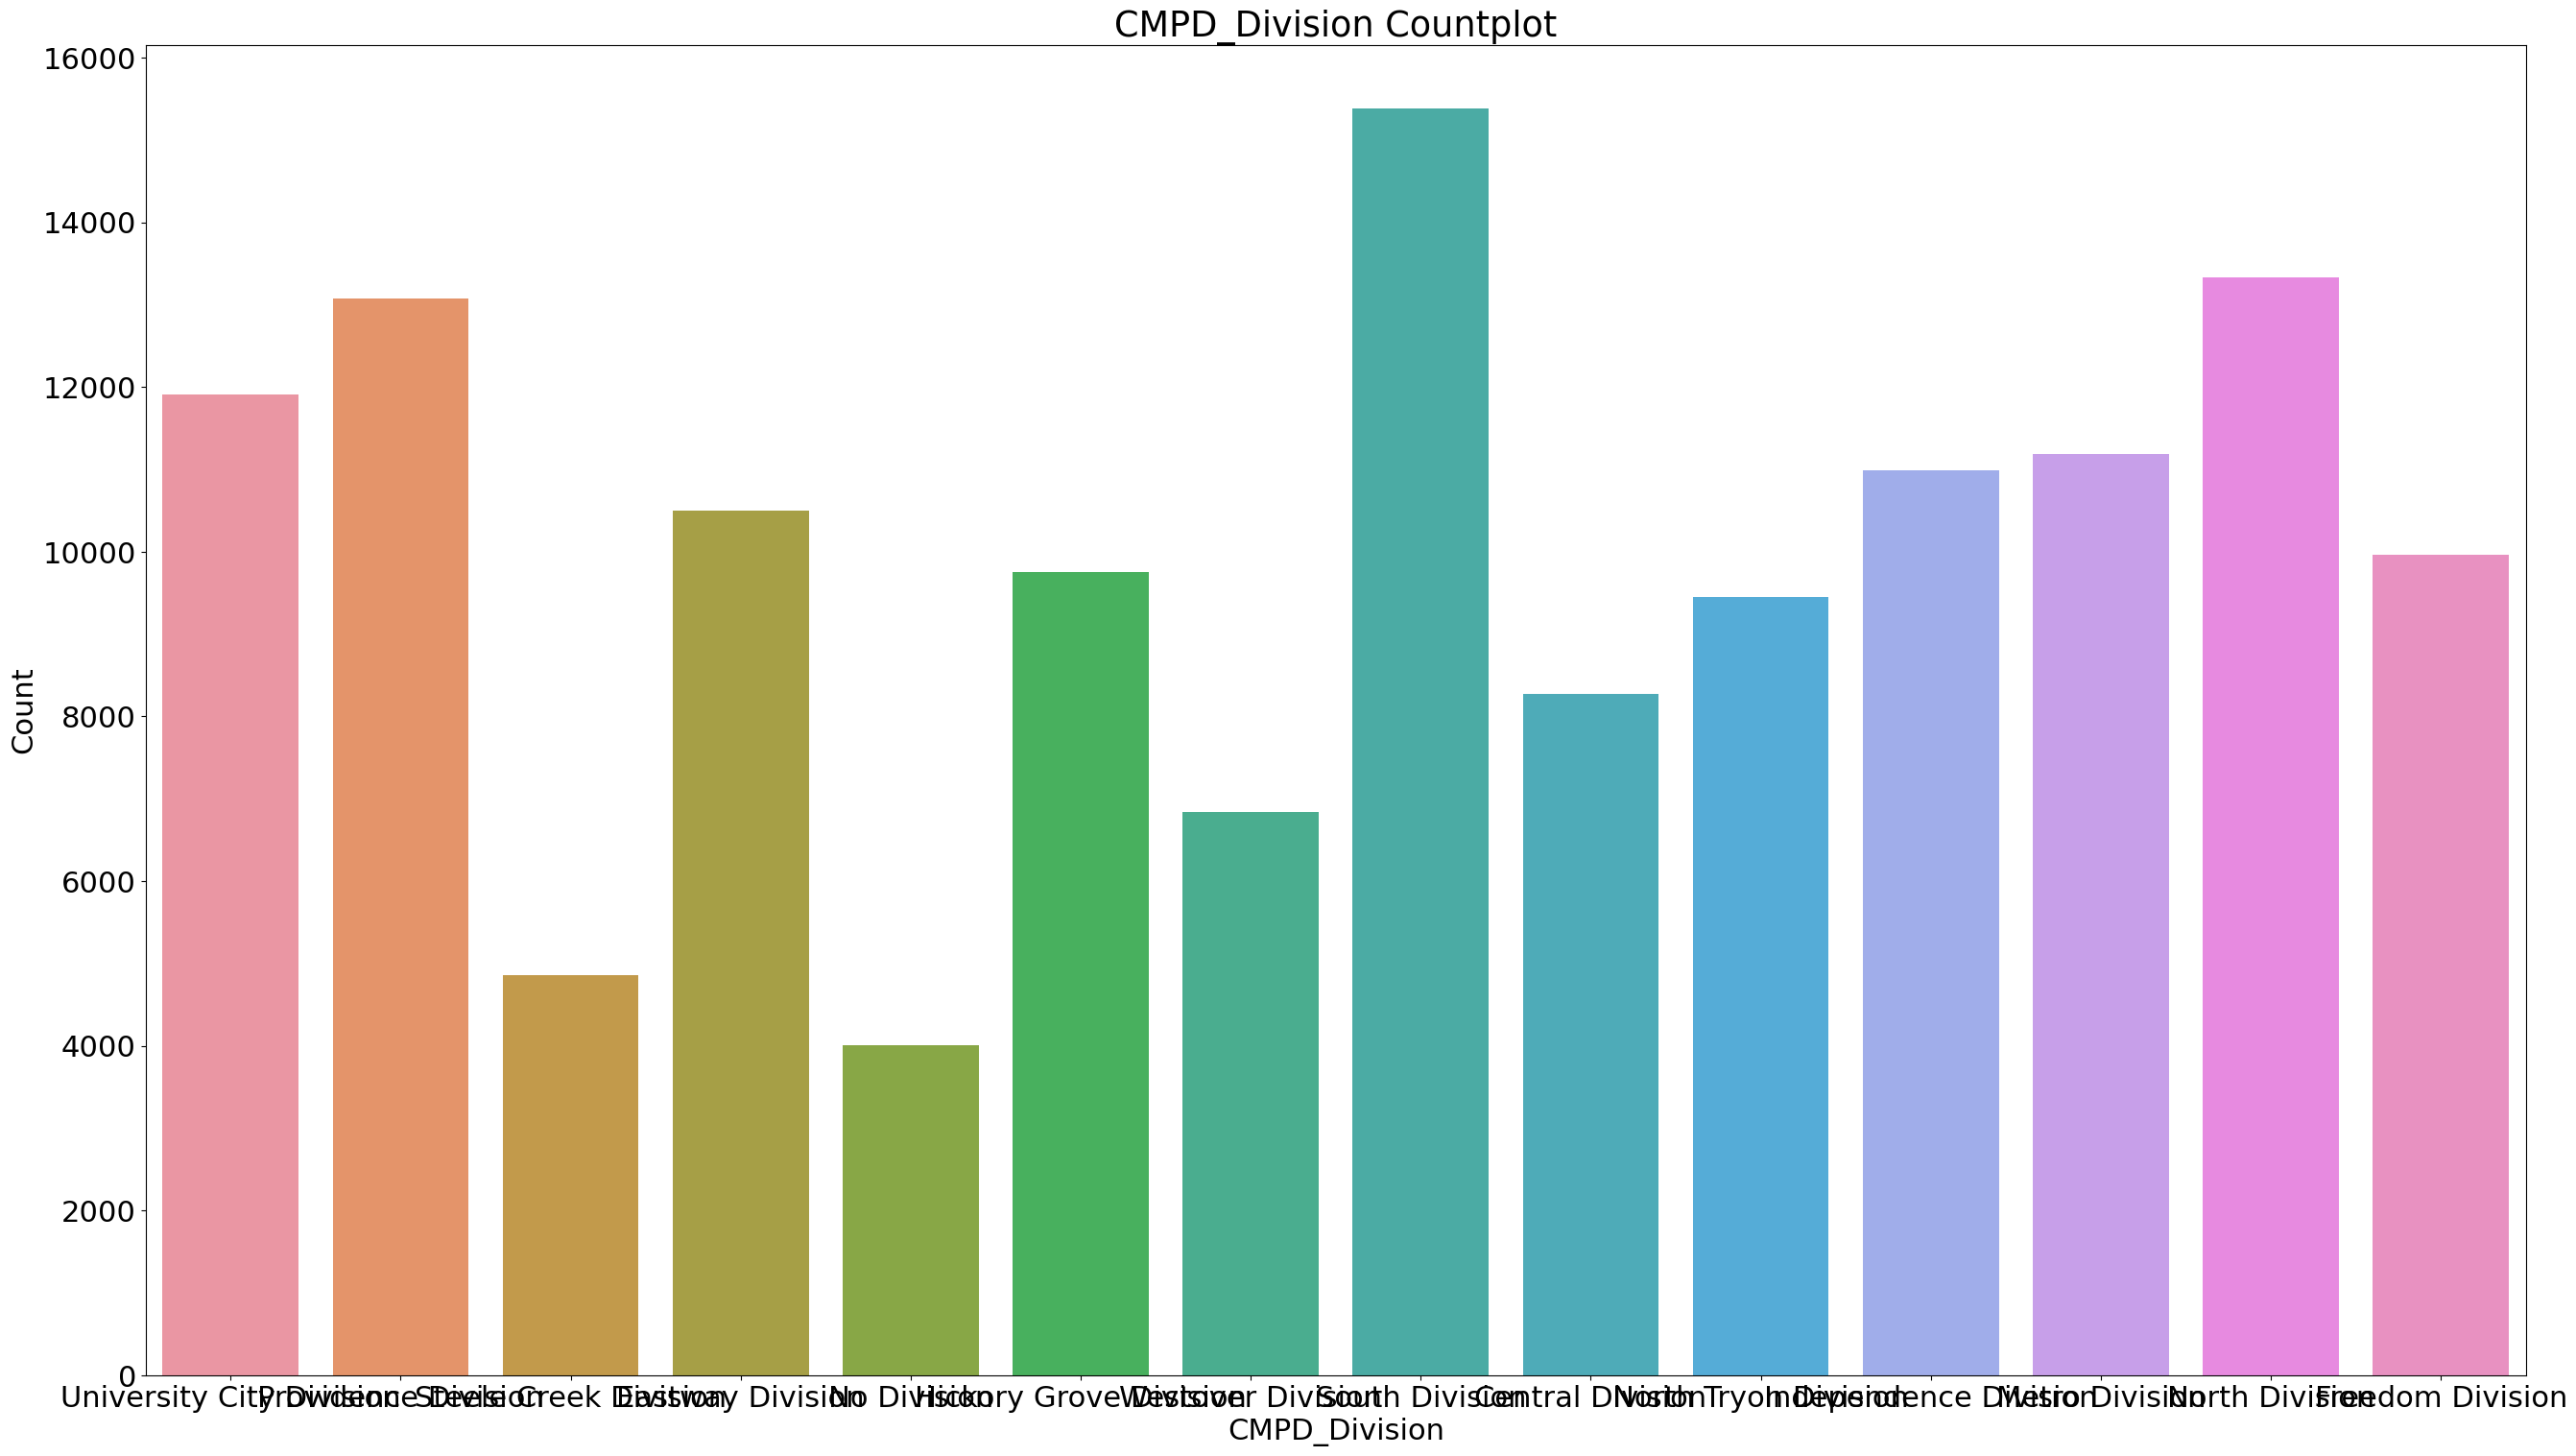

In [13]:
for column in categoricals:
    plt.figure(figsize=(32,18))
    sns.countplot(x=df[column])
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.title(f'{column} Countplot')
    plt.savefig(f'Graphs/{column}_Countplot.png')
    plt.show()

This was very helpful in finding the distrubtion of the features. Particularly we care about the columns "Was a Search Conducted" and "Result of Stop". Both of these are potential targets for our research question. We're leaning more towards was a search conducted than result of stop as having a binary category allows for more options when modeling.

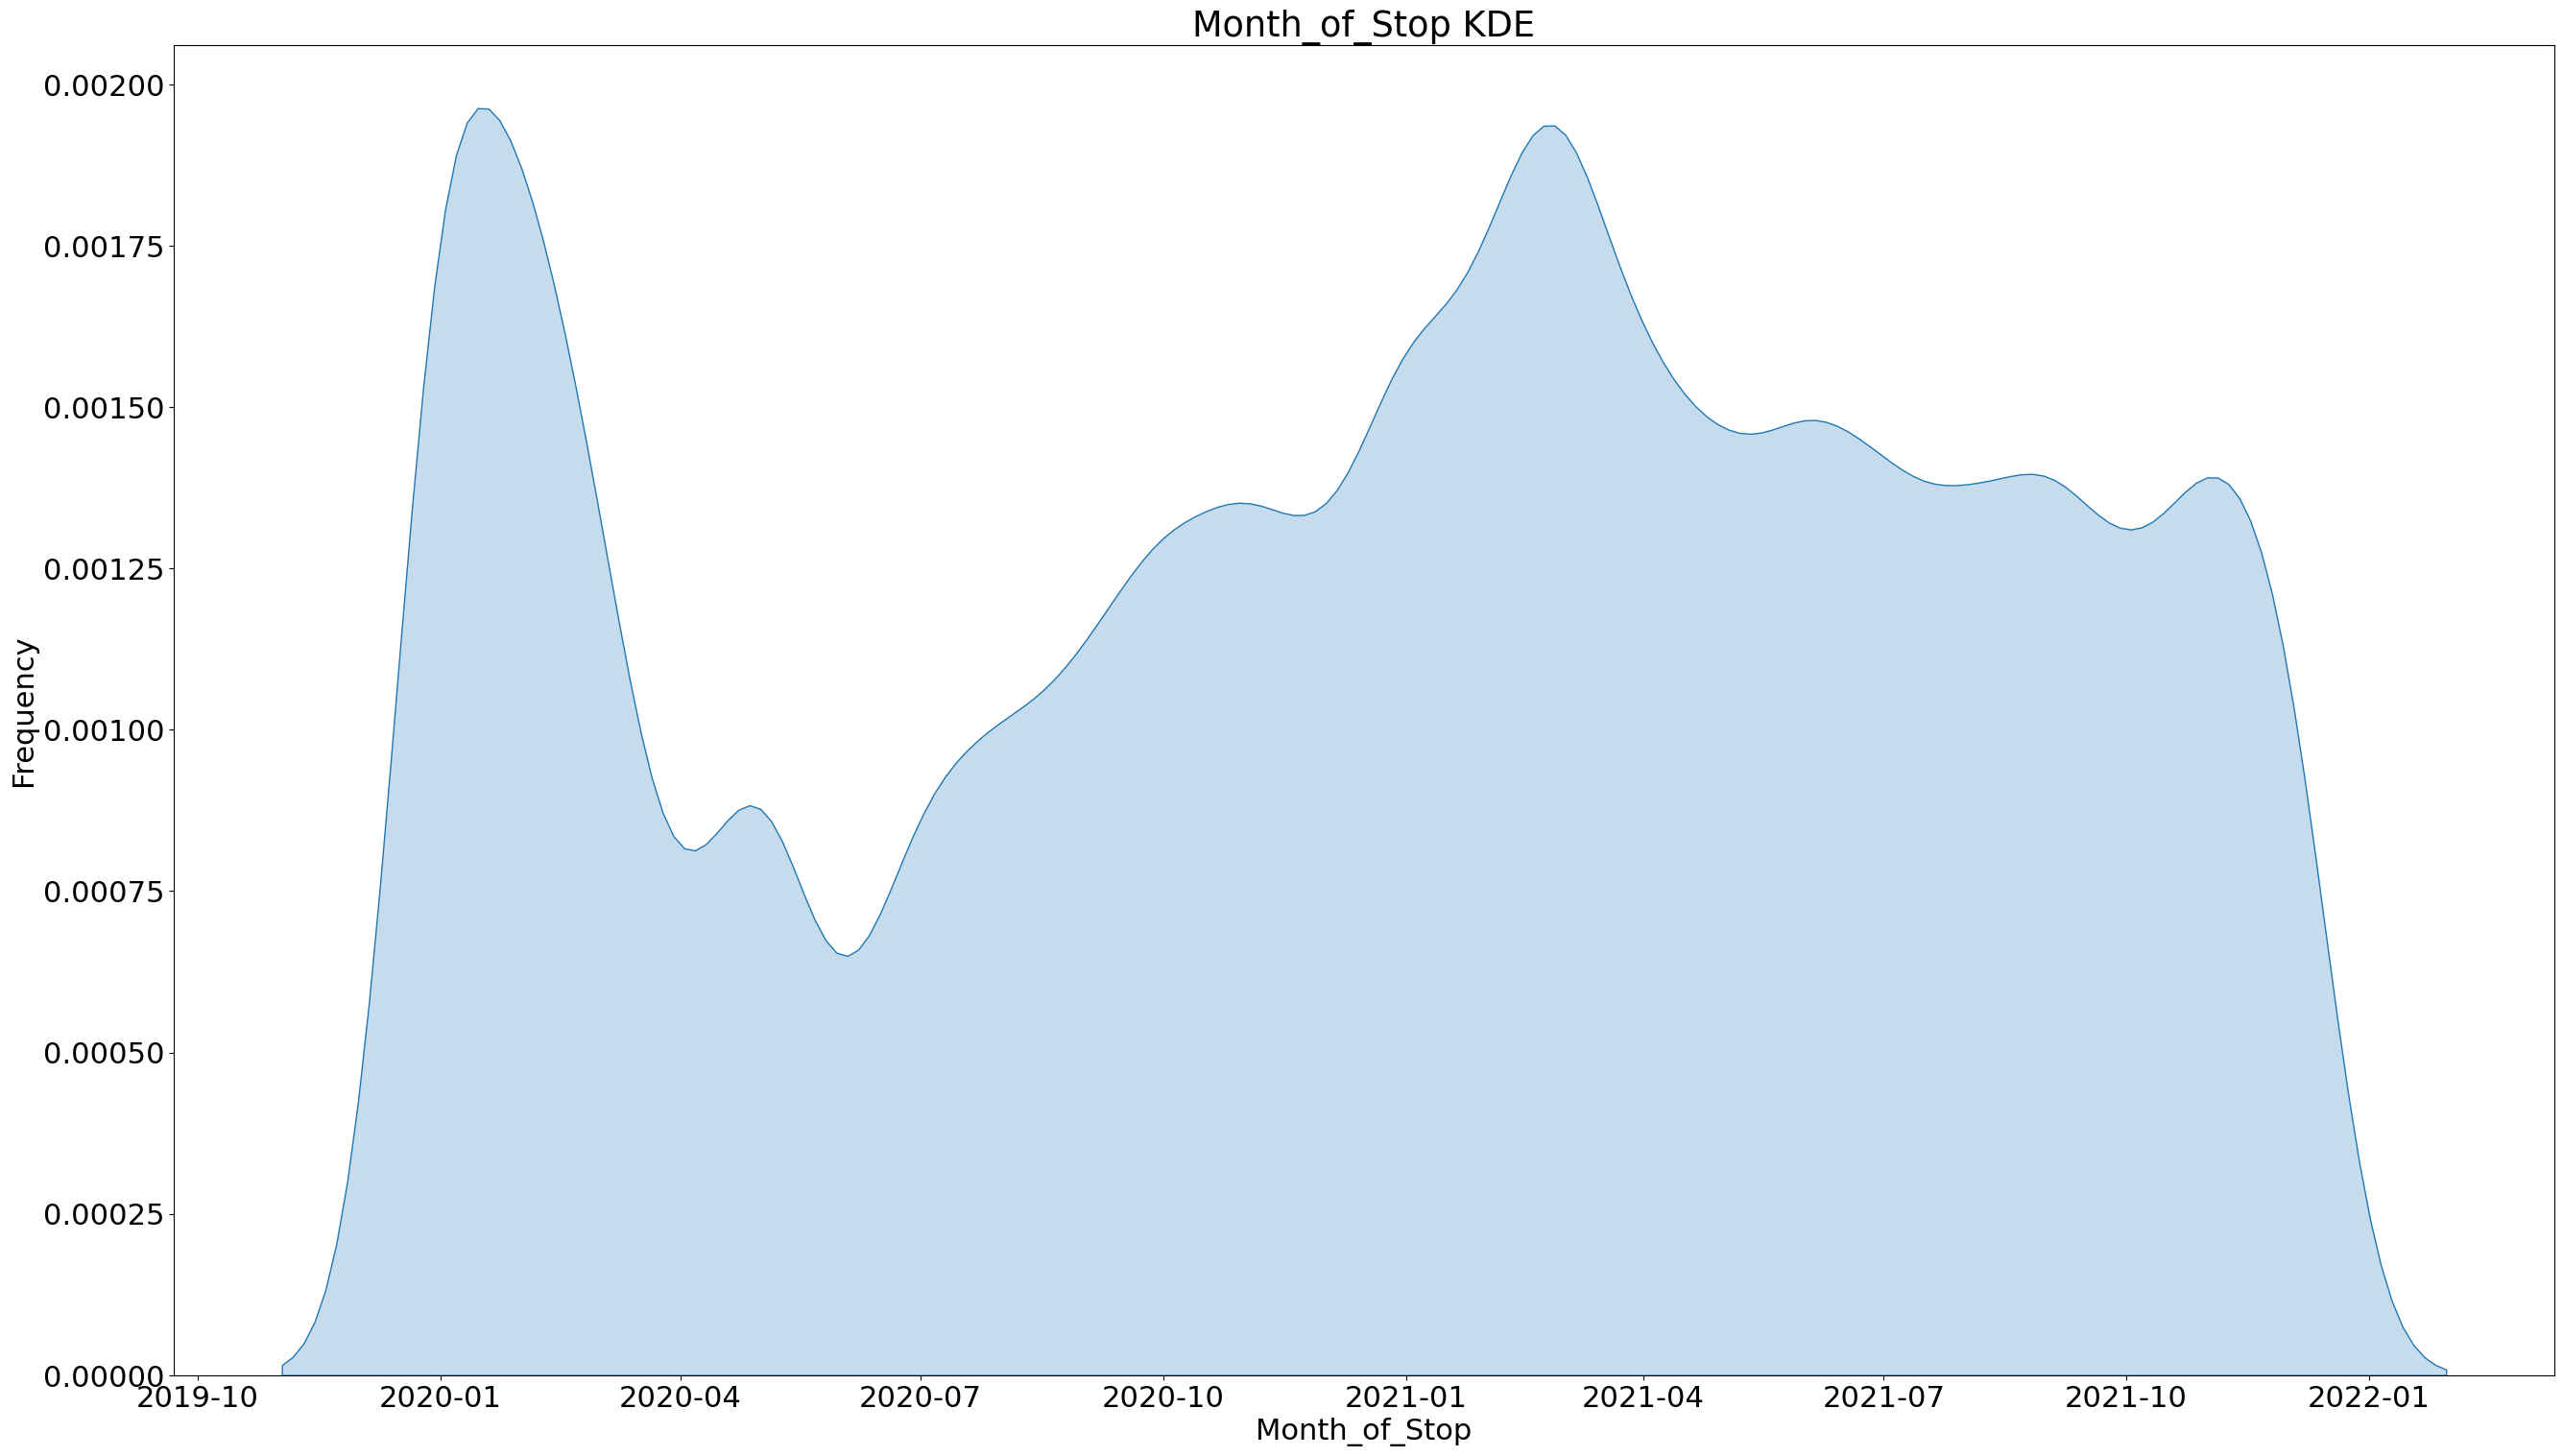

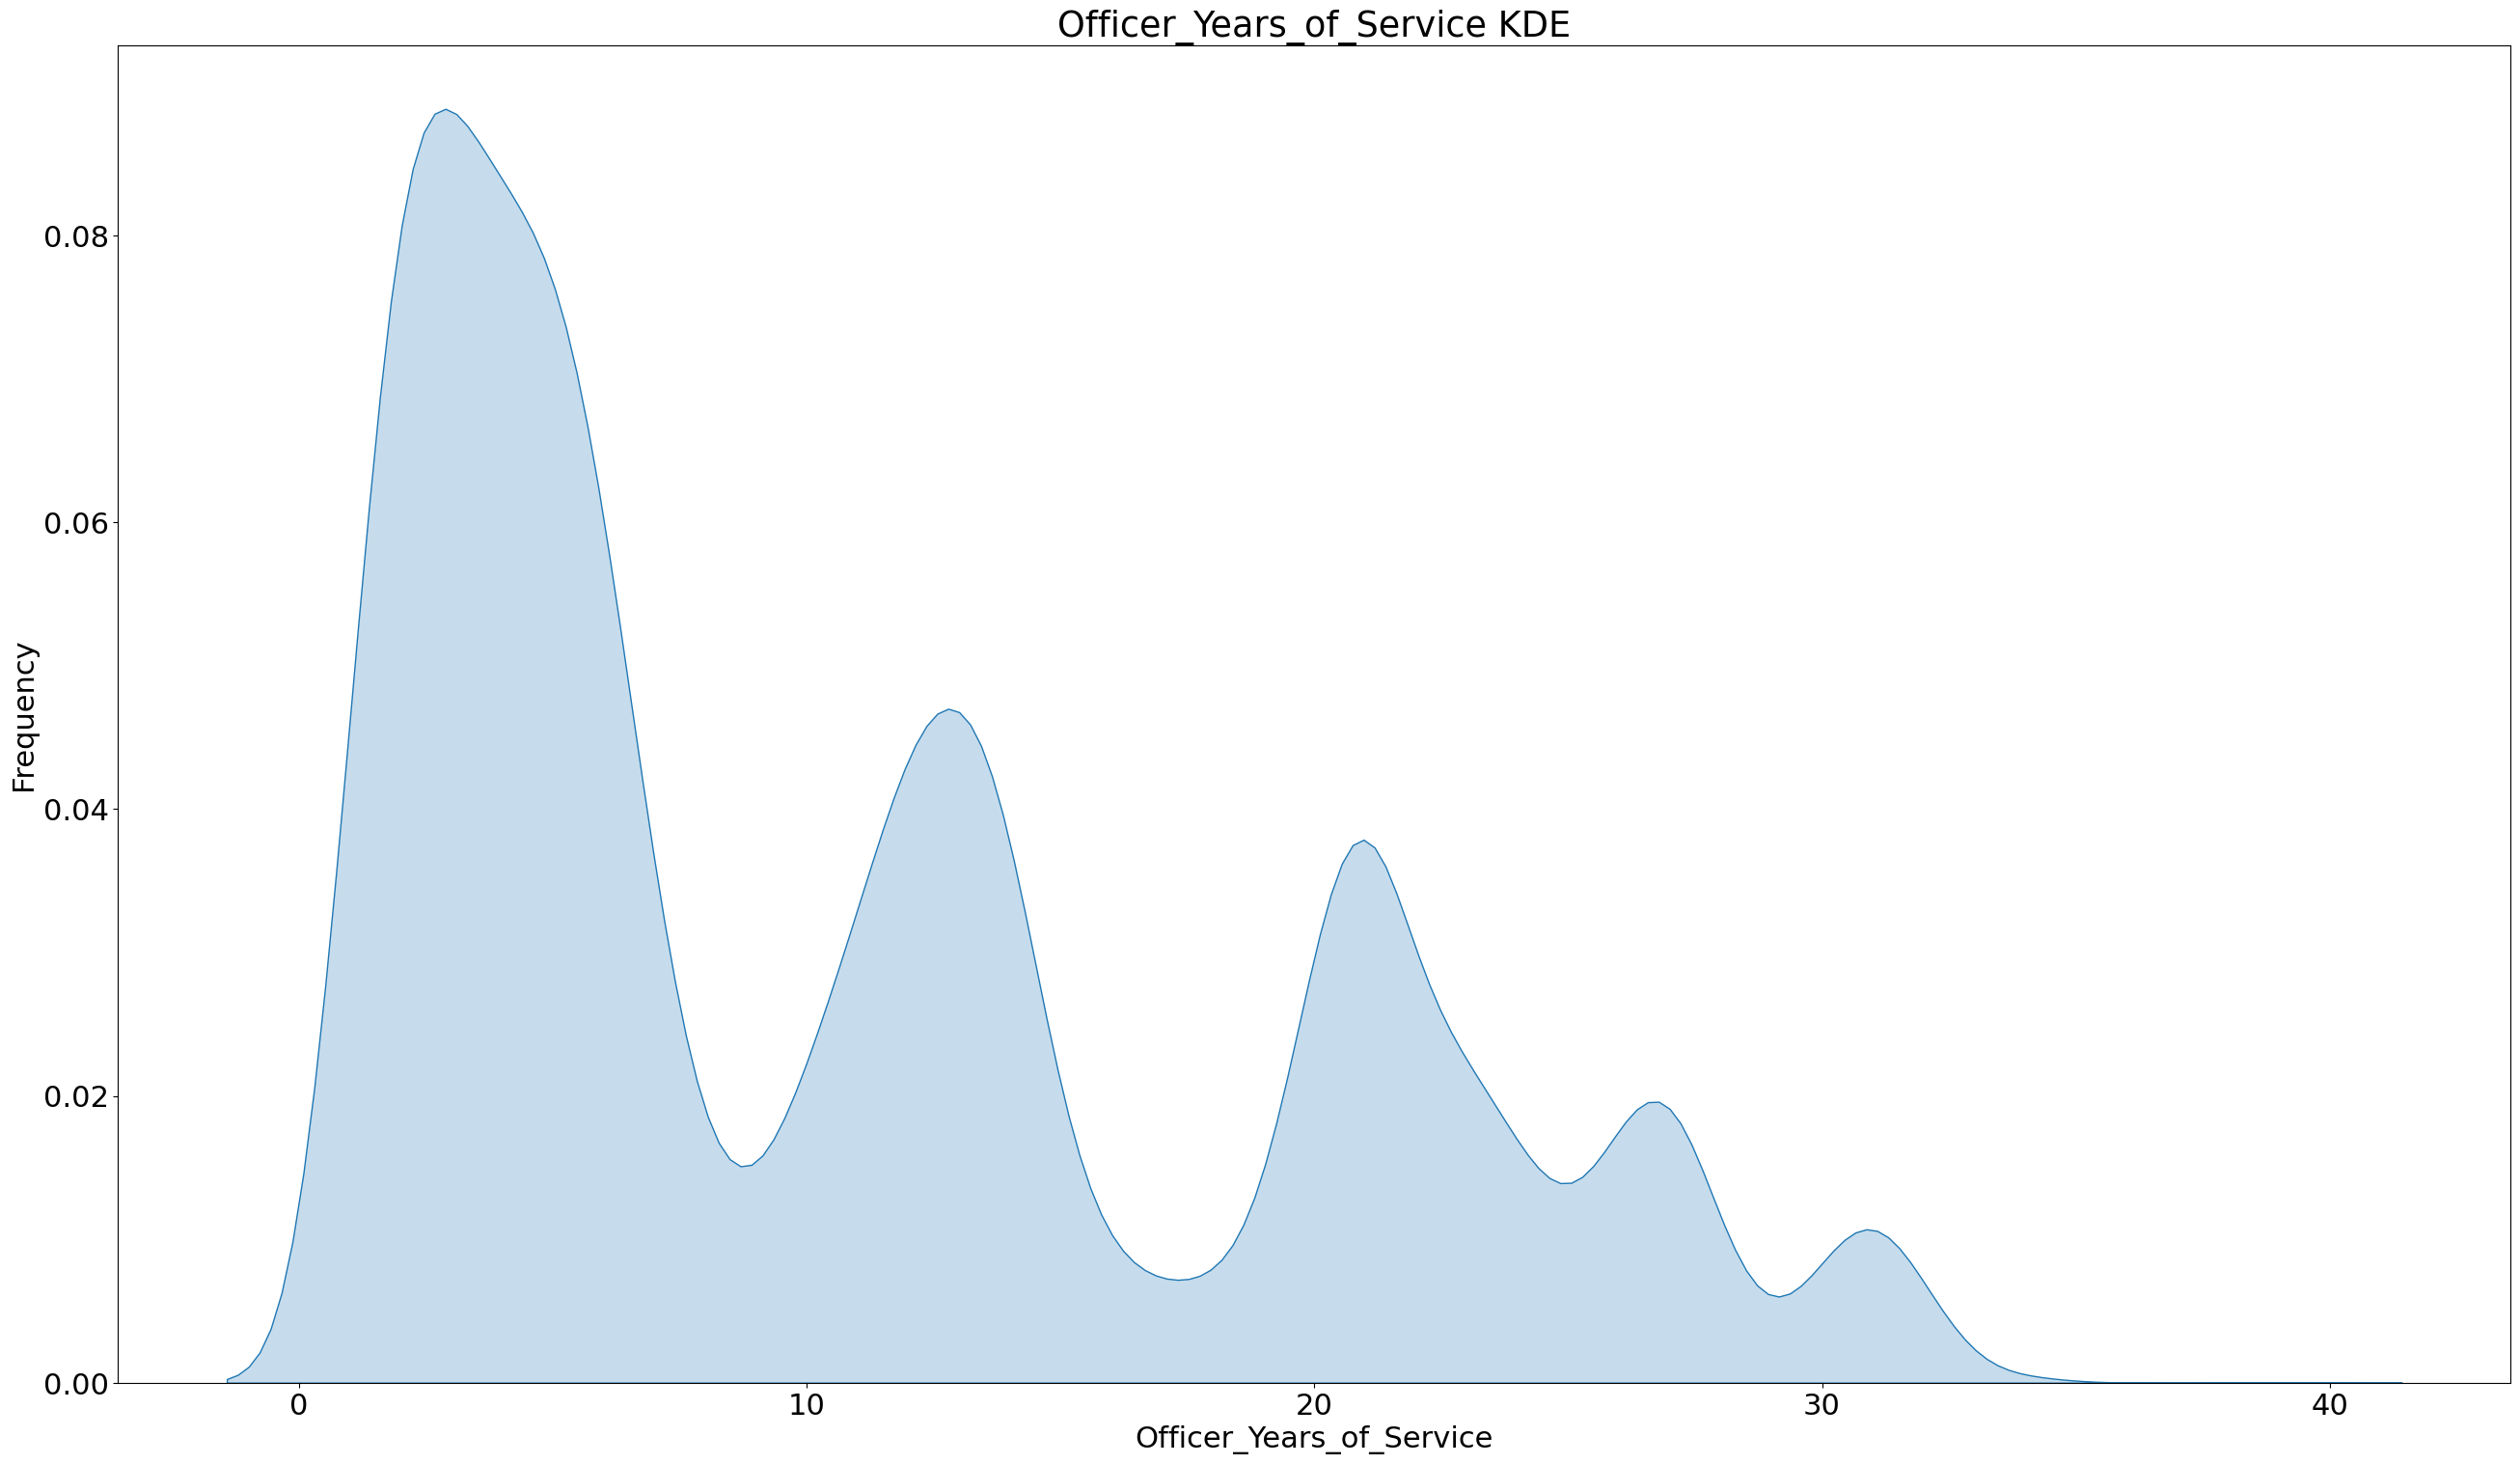

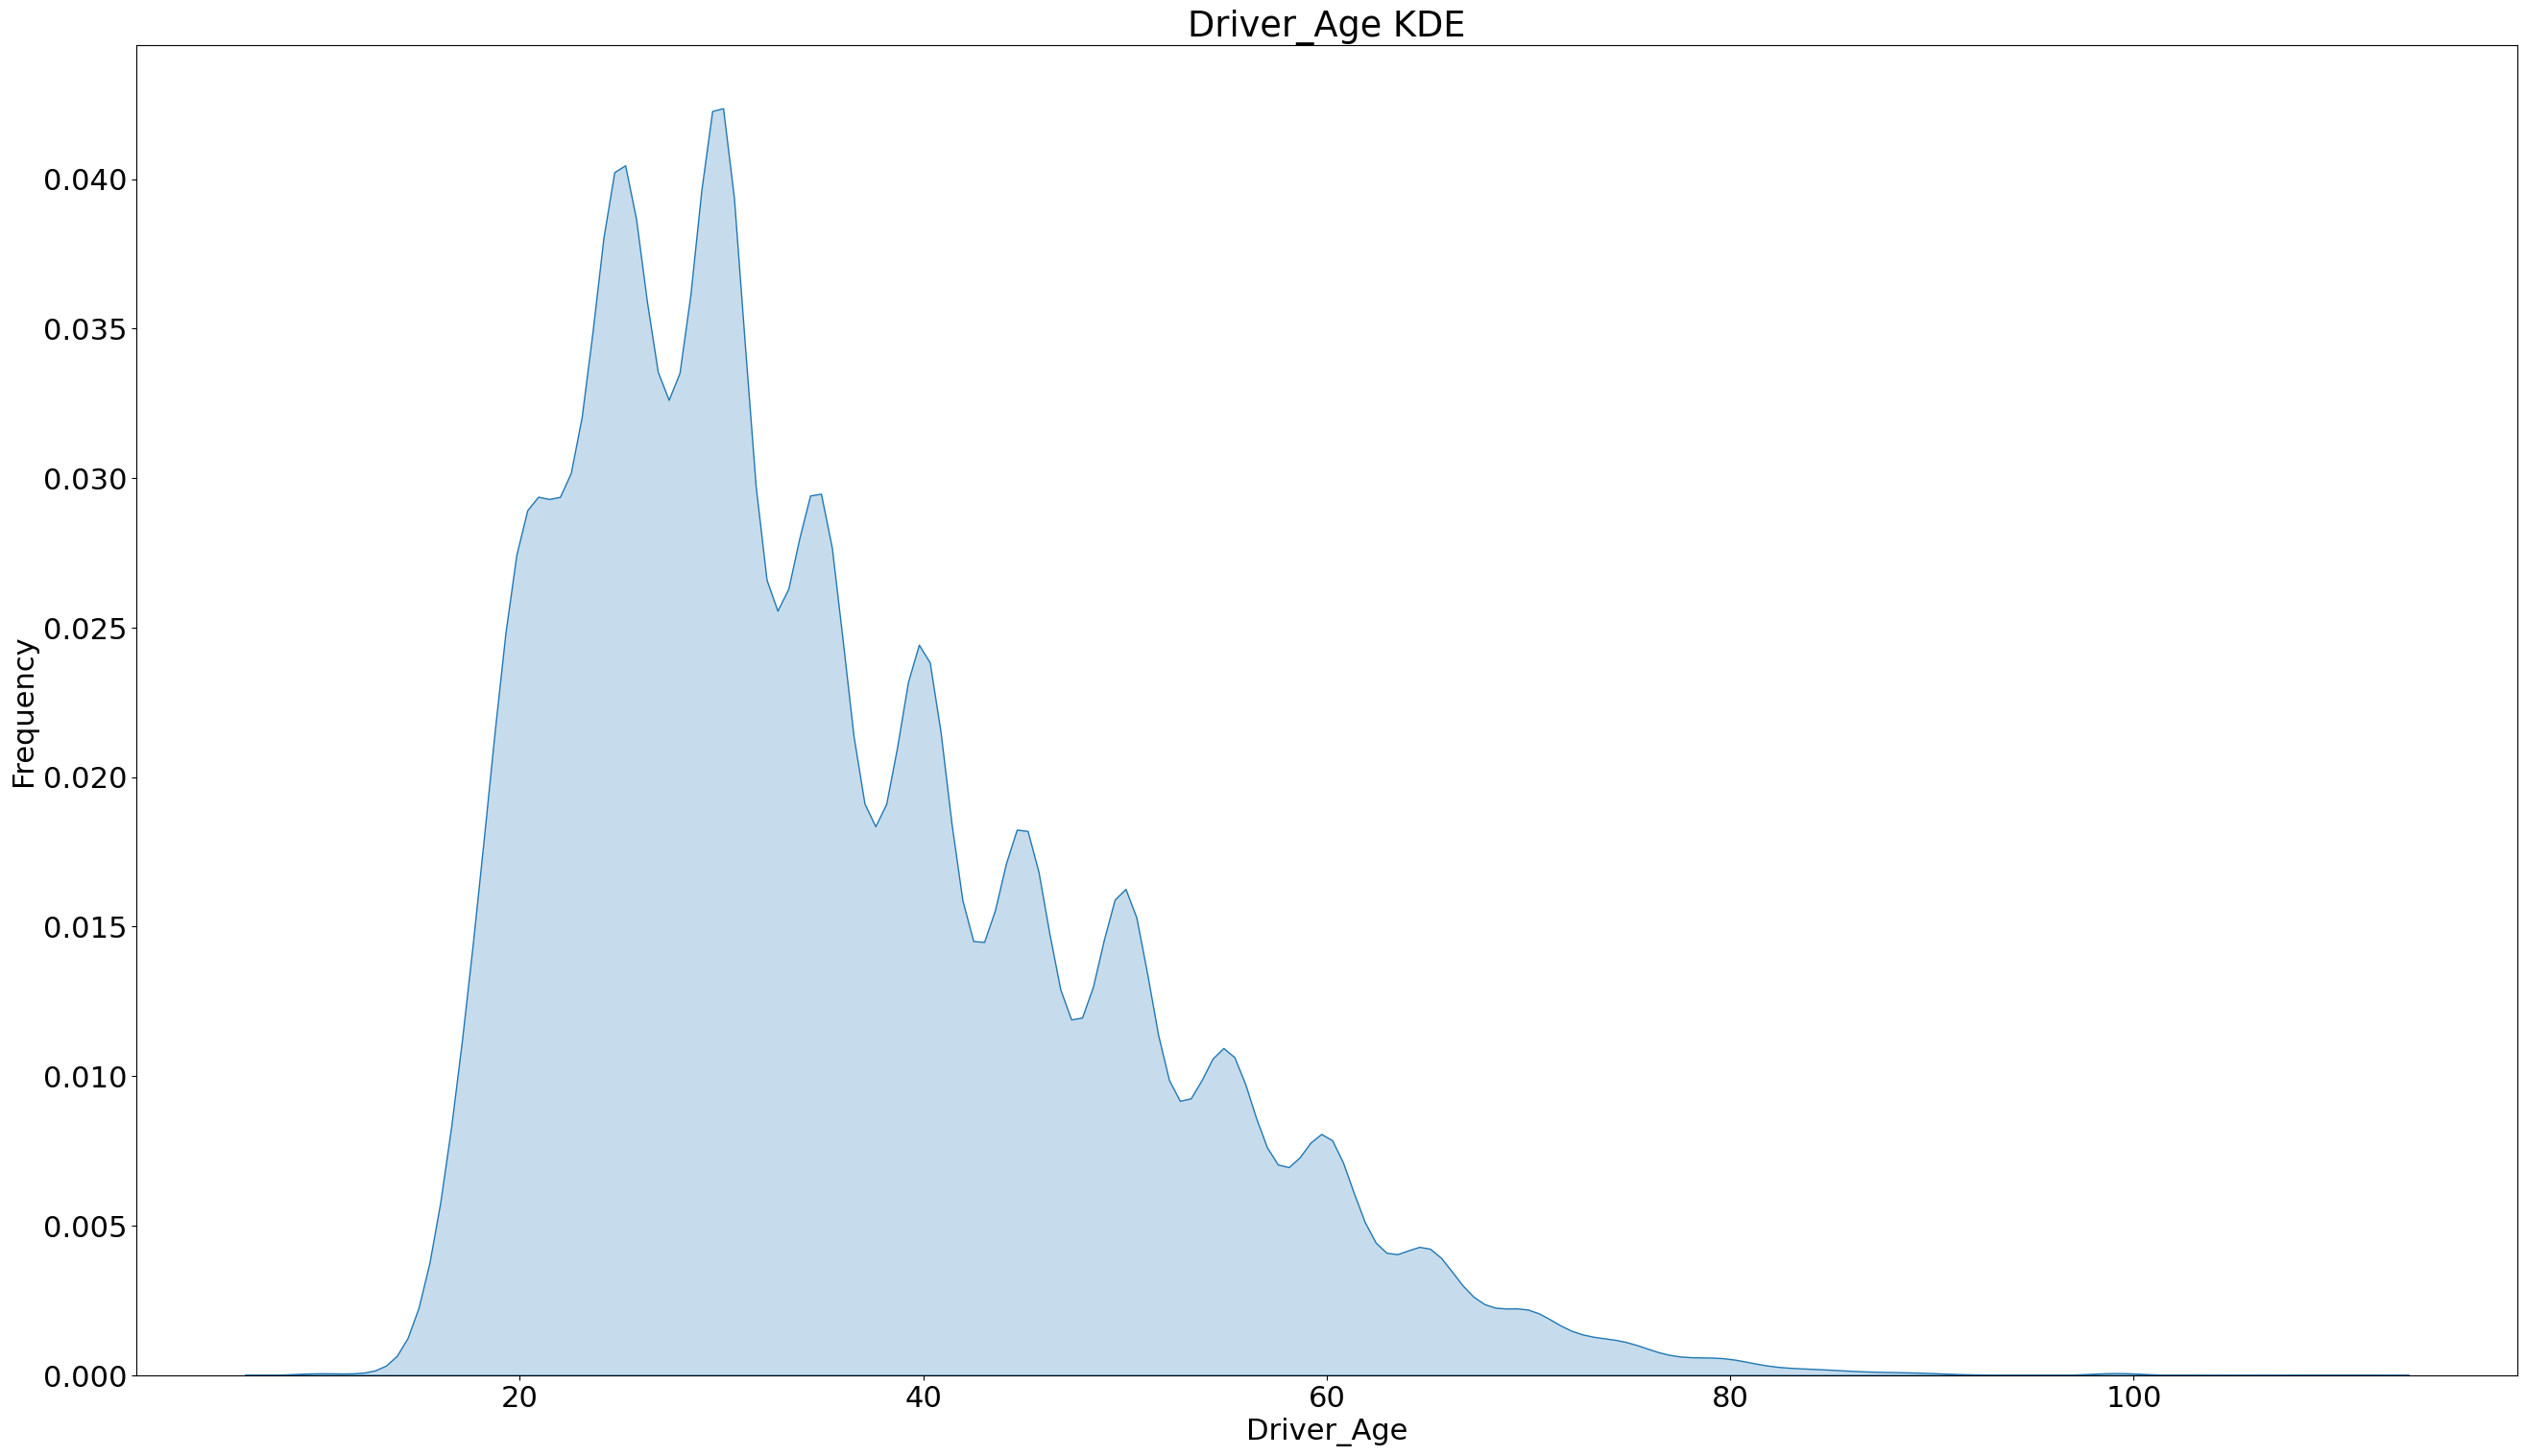

In [14]:
for column in numerical:
    plt.figure(figsize=(32,18))
    sns.kdeplot(df[column],fill=True)
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.title(f'{column} KDE')
    plt.savefig(f'Graphs/{column}_KDE.png')
    plt.show()

The interesting thing here is the decrease of cases in 2020. This likely occurs due to the start of quaratine after covid first came to the US. People likely weren't driving during this time and because of that, the number of traffic stops would decrease. We also see the big points in the officer years of service. The important thing is that this feature isn't normally distributed which means that we wouldn't want to use models that prefer normally distributed data.

## Visualizing Feature Effects on Search Conducted
Now let's see how our categorical features are related to our target of whether a search was conducted or not.

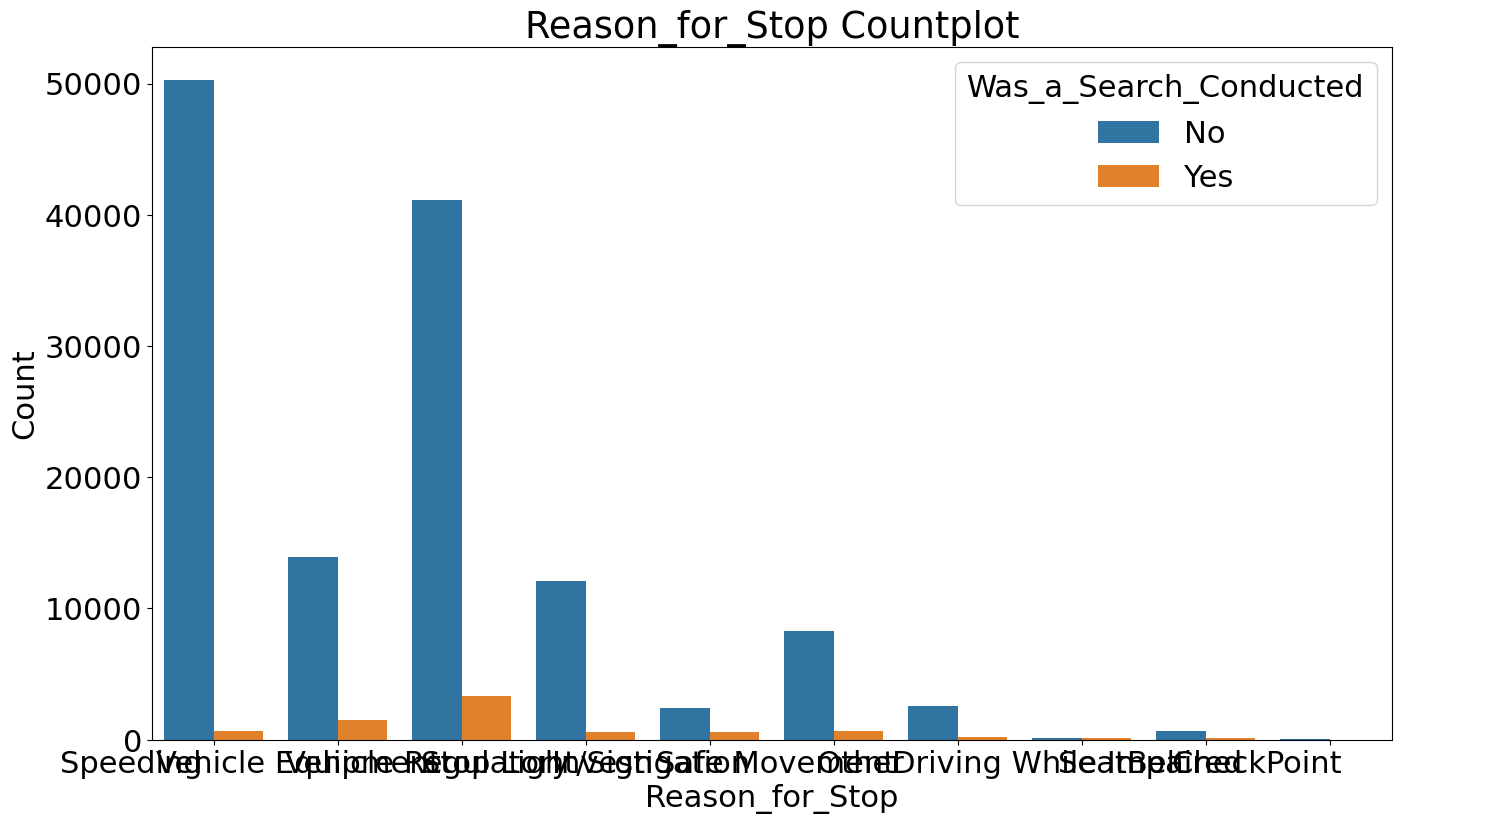

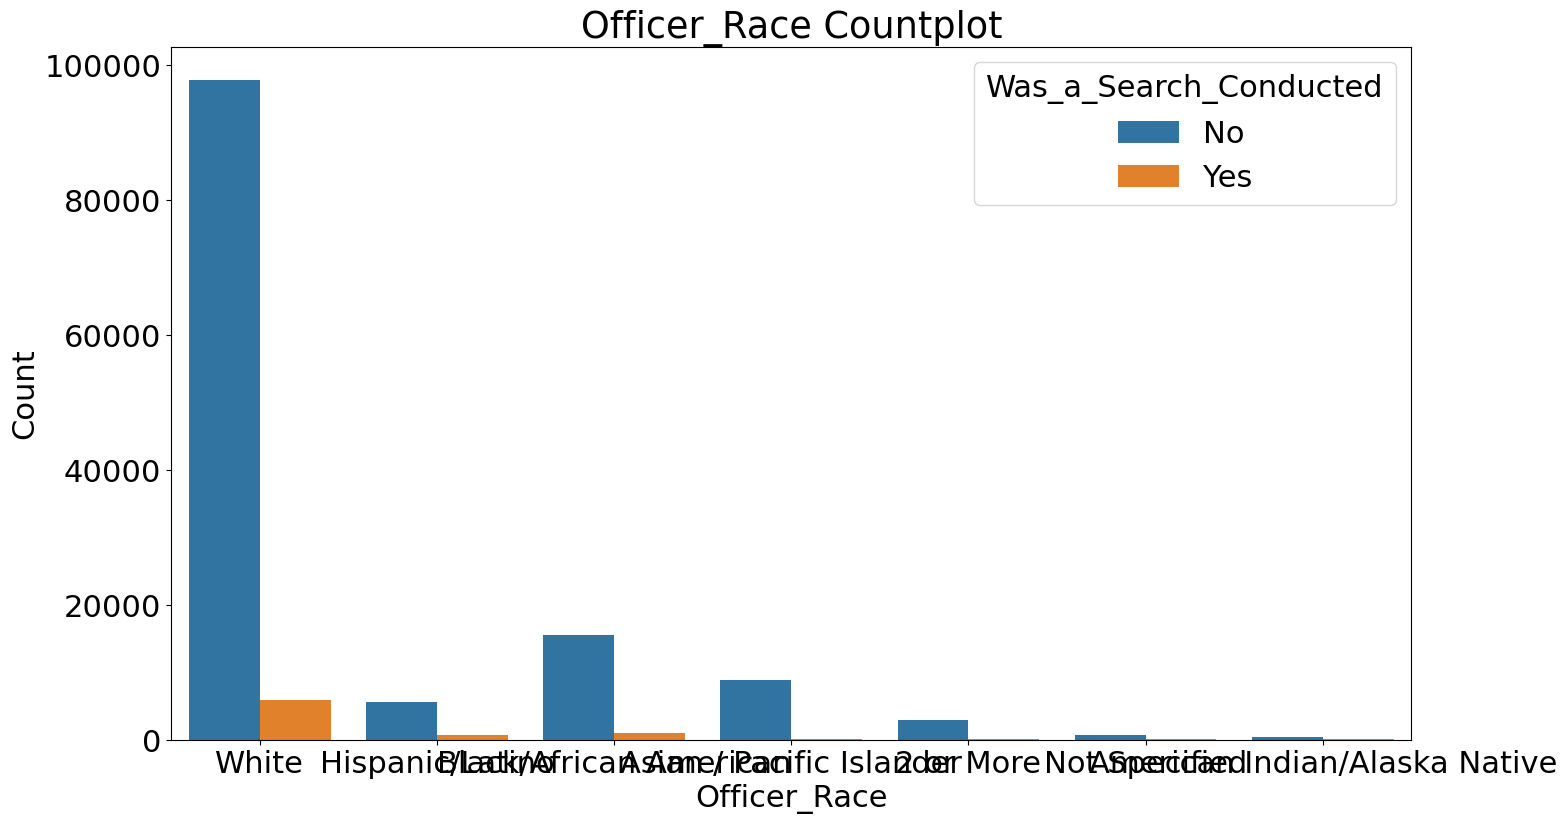

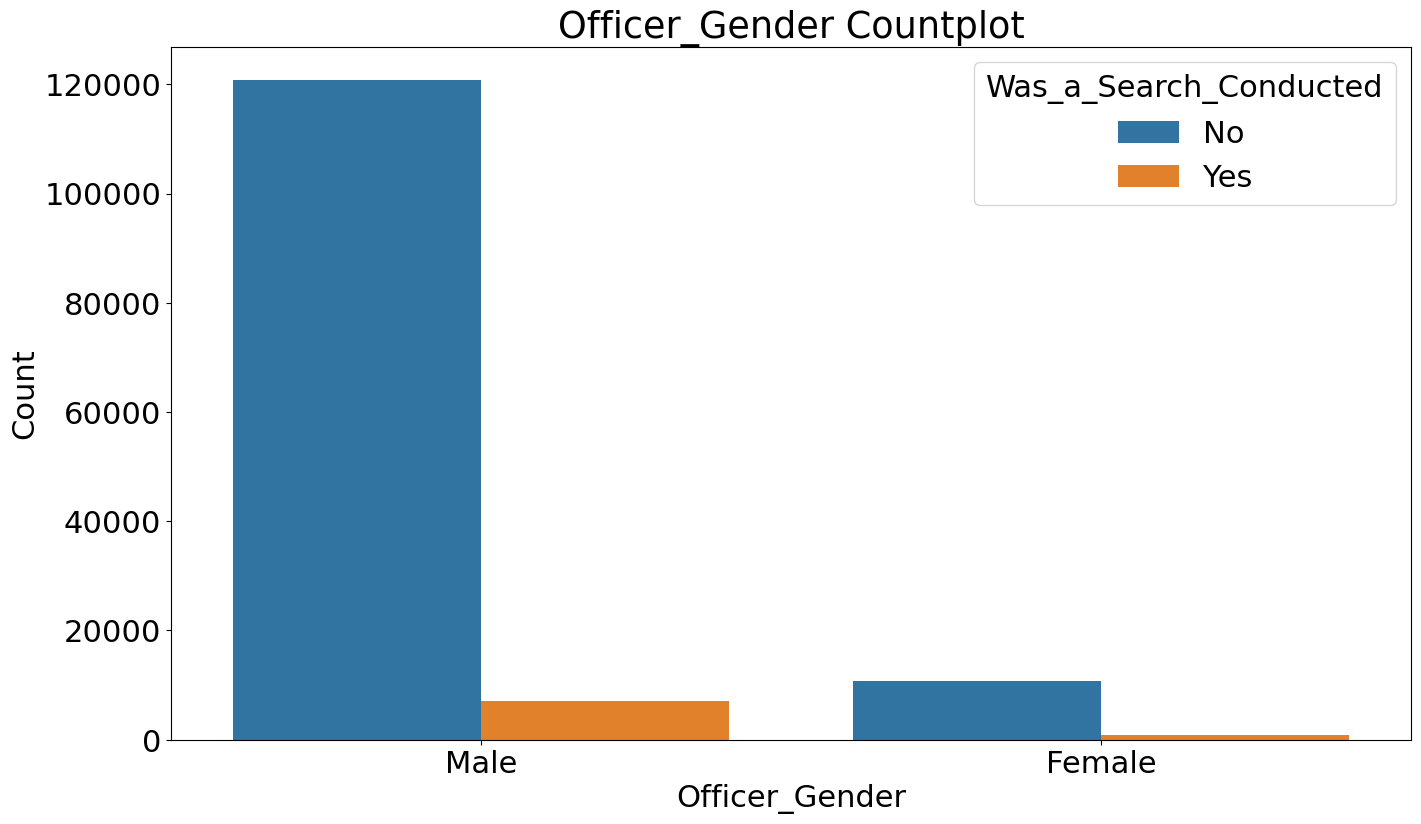

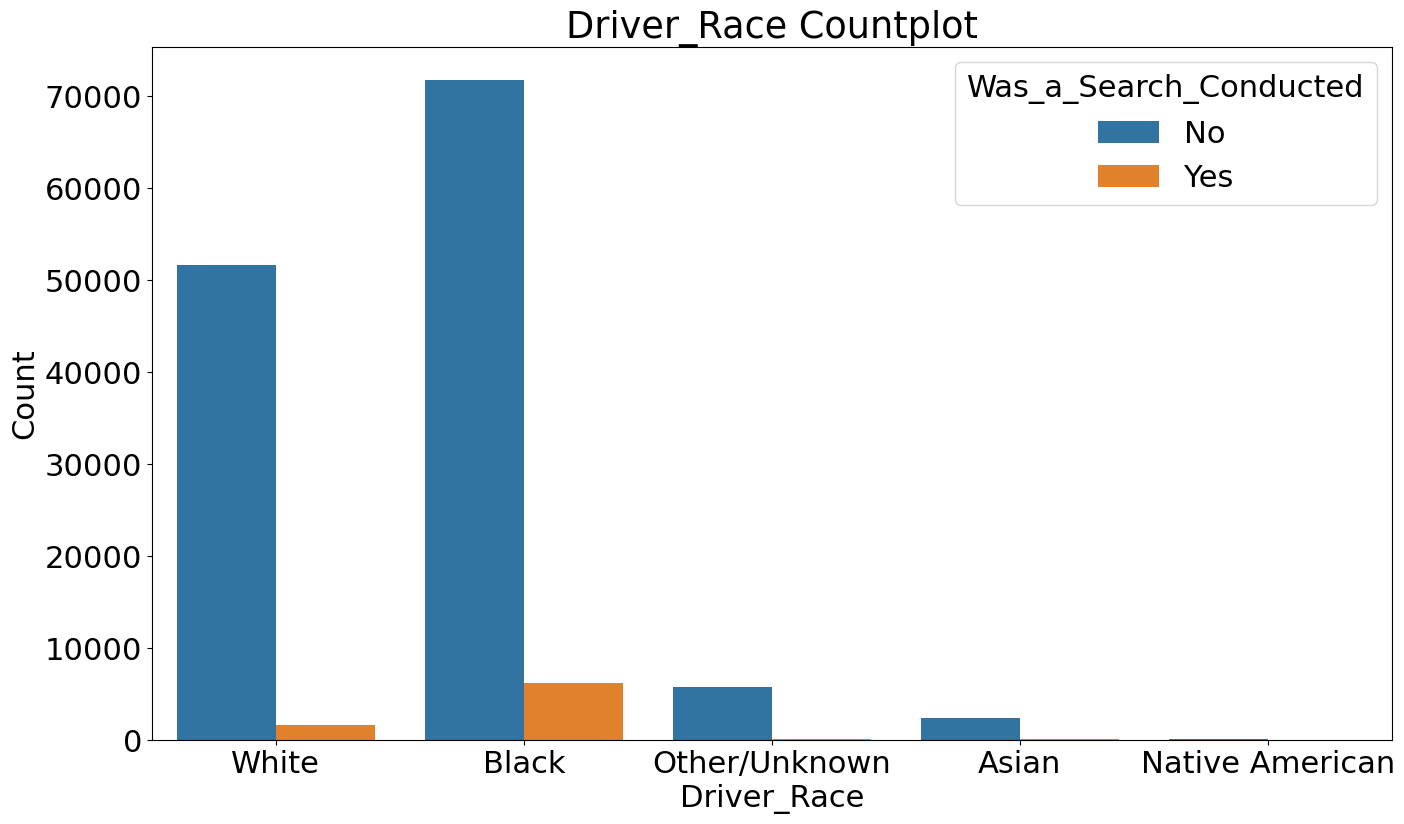

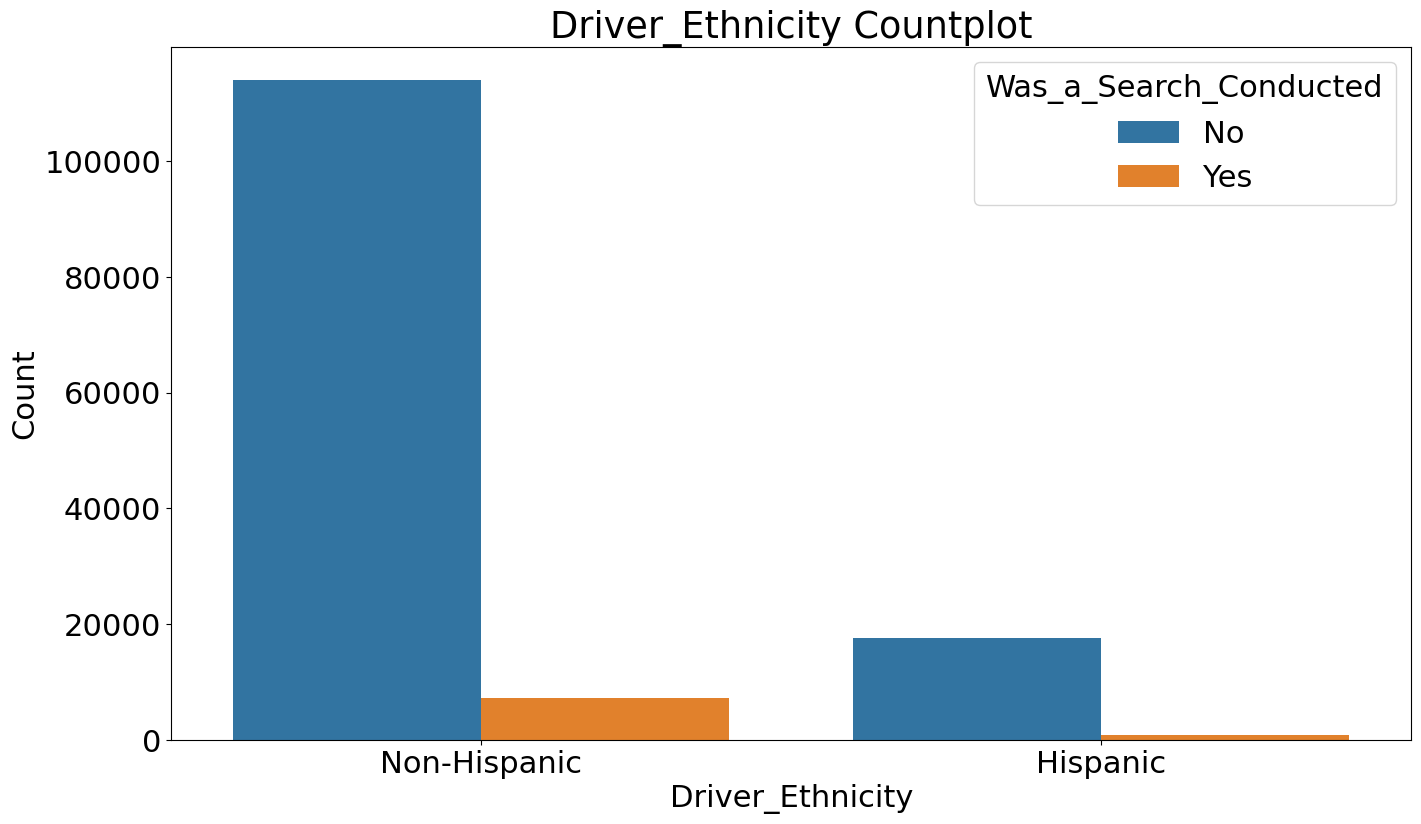

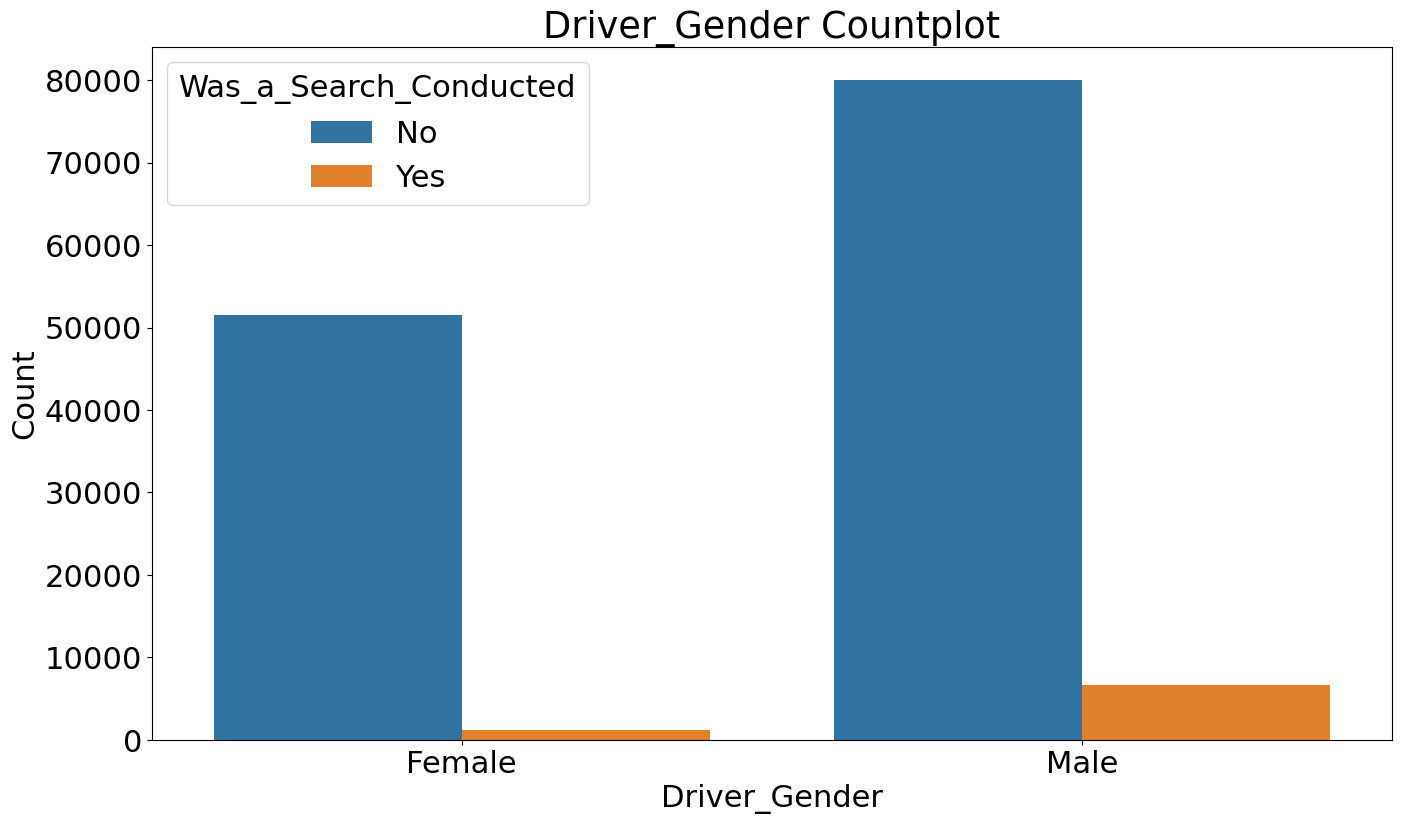

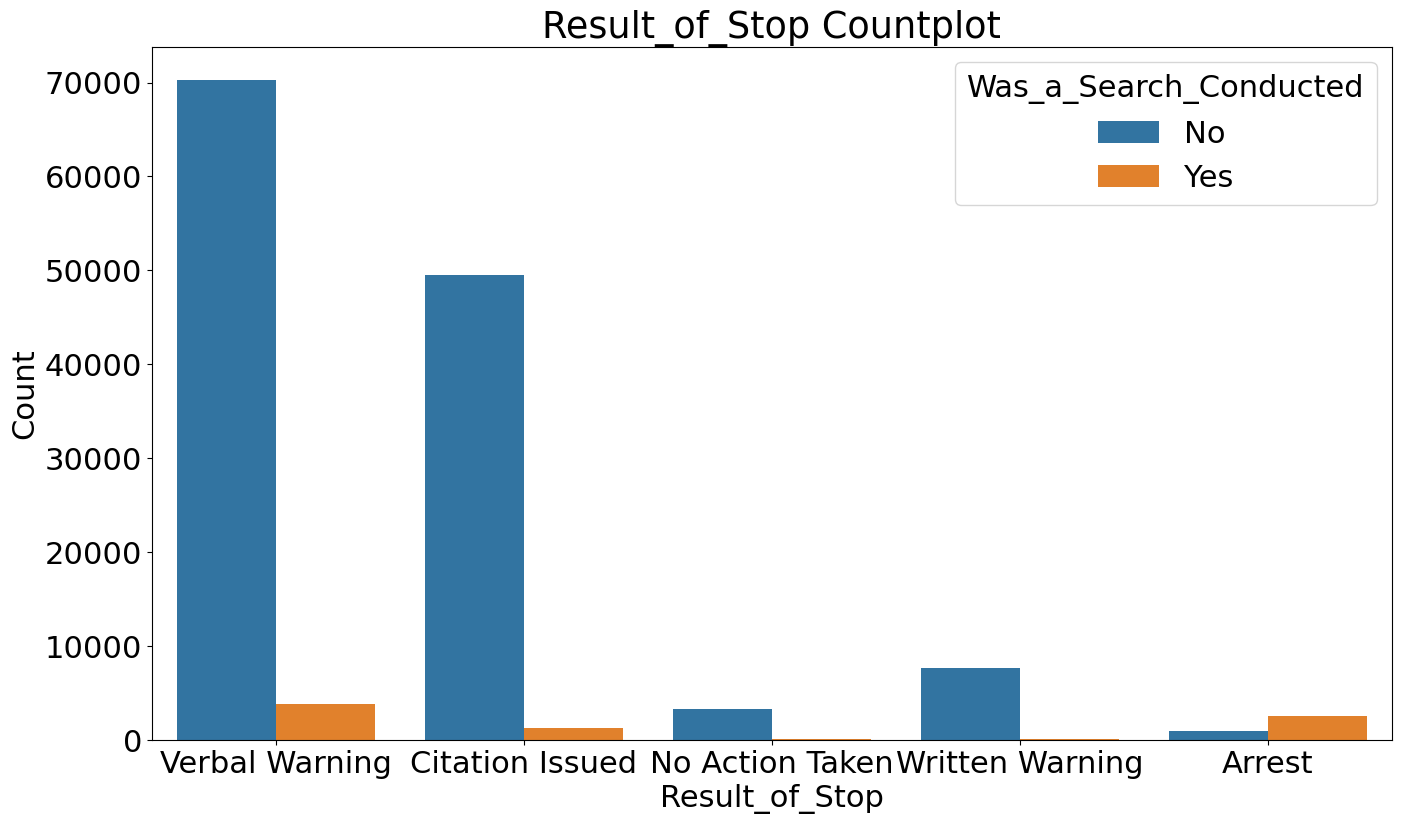

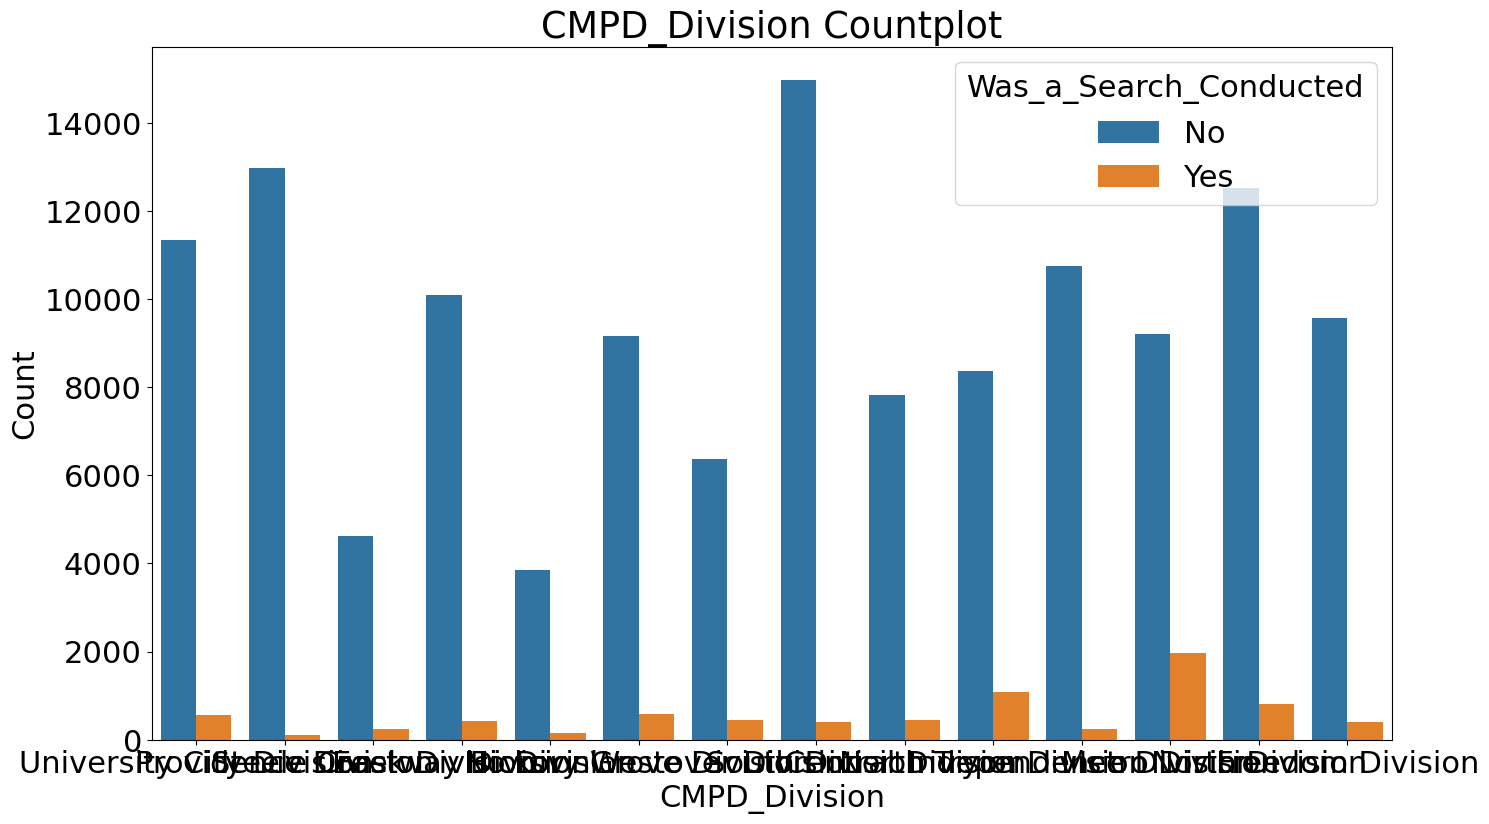

In [15]:
for column in categoricals.drop(labels=['Was_a_Search_Conducted']):
    plt.figure(figsize=(16,9))
    sns.countplot(x=df[column],hue=df['Was_a_Search_Conducted'])
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.title(f'{column} Countplot')
    plt.savefig(f'Graphs/{column}_hue_countplot.png')
    plt.show()

These are great, but let's normalize the groups into percentages. To understand the trend a little easier. Using this https://stackoverflow.com/questions/34615854/seaborn-countplot-with-normalized-y-axis-per-group as a refrence for normalizing the data.

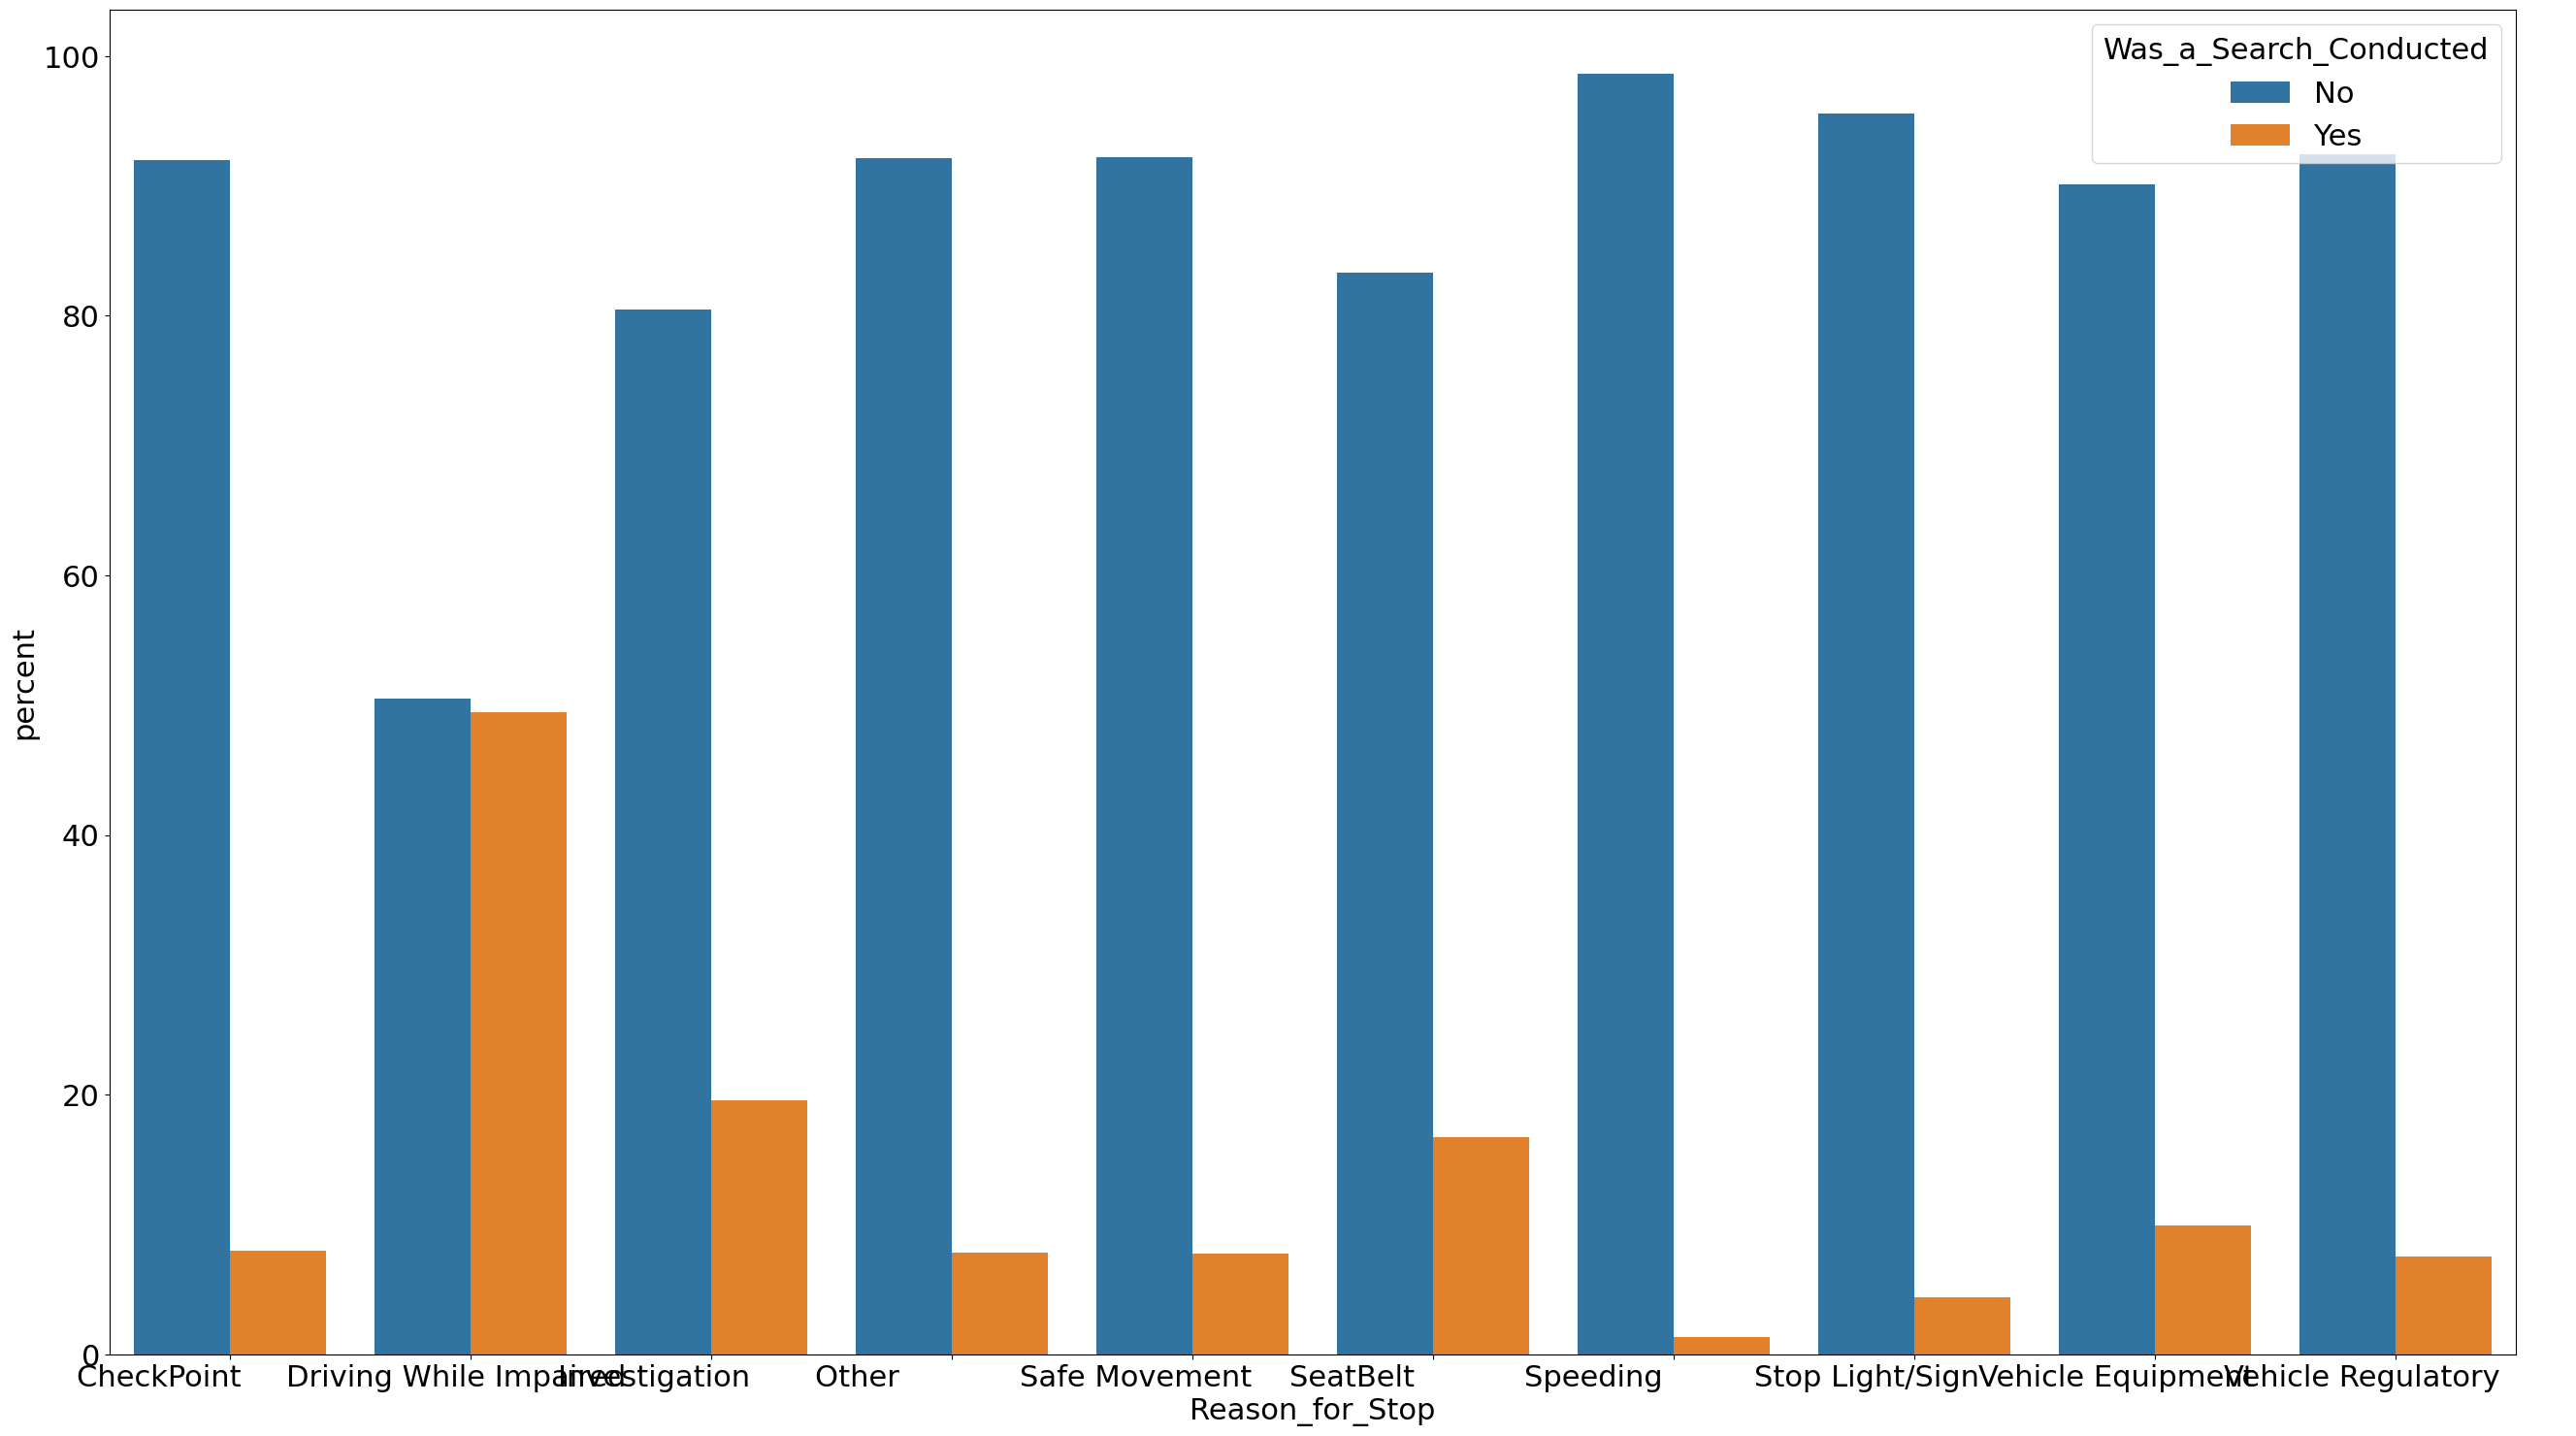

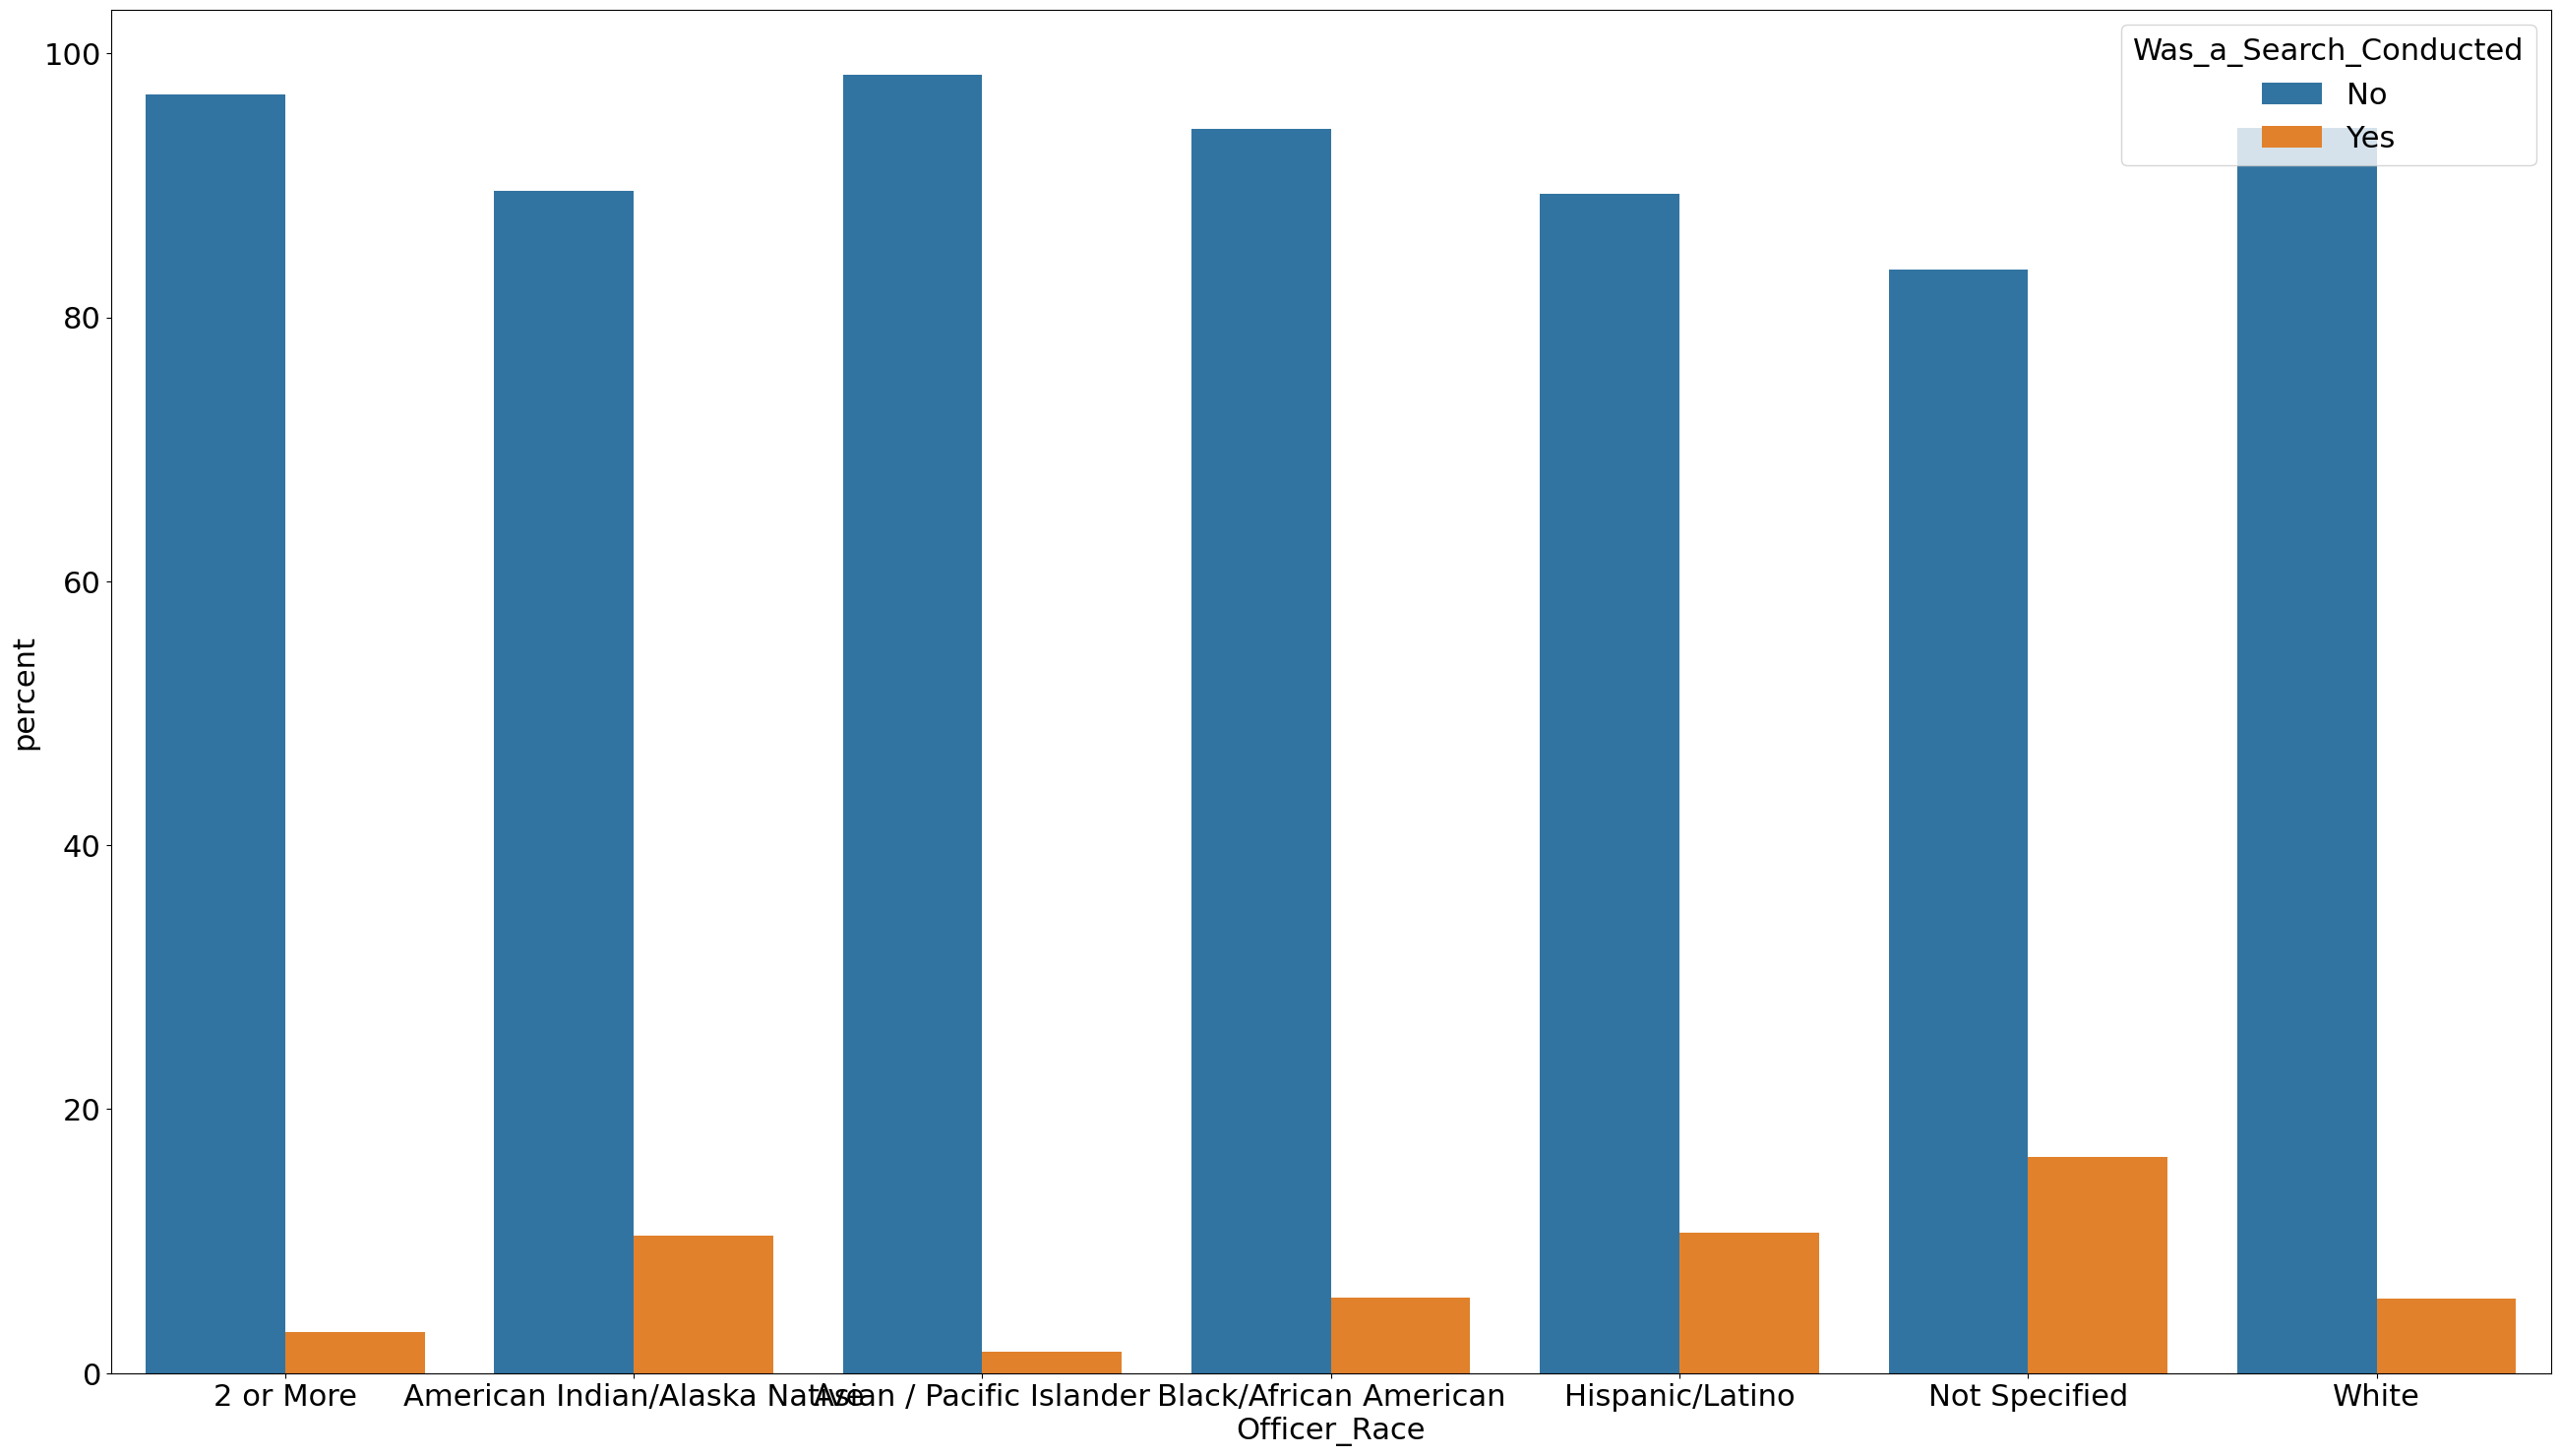

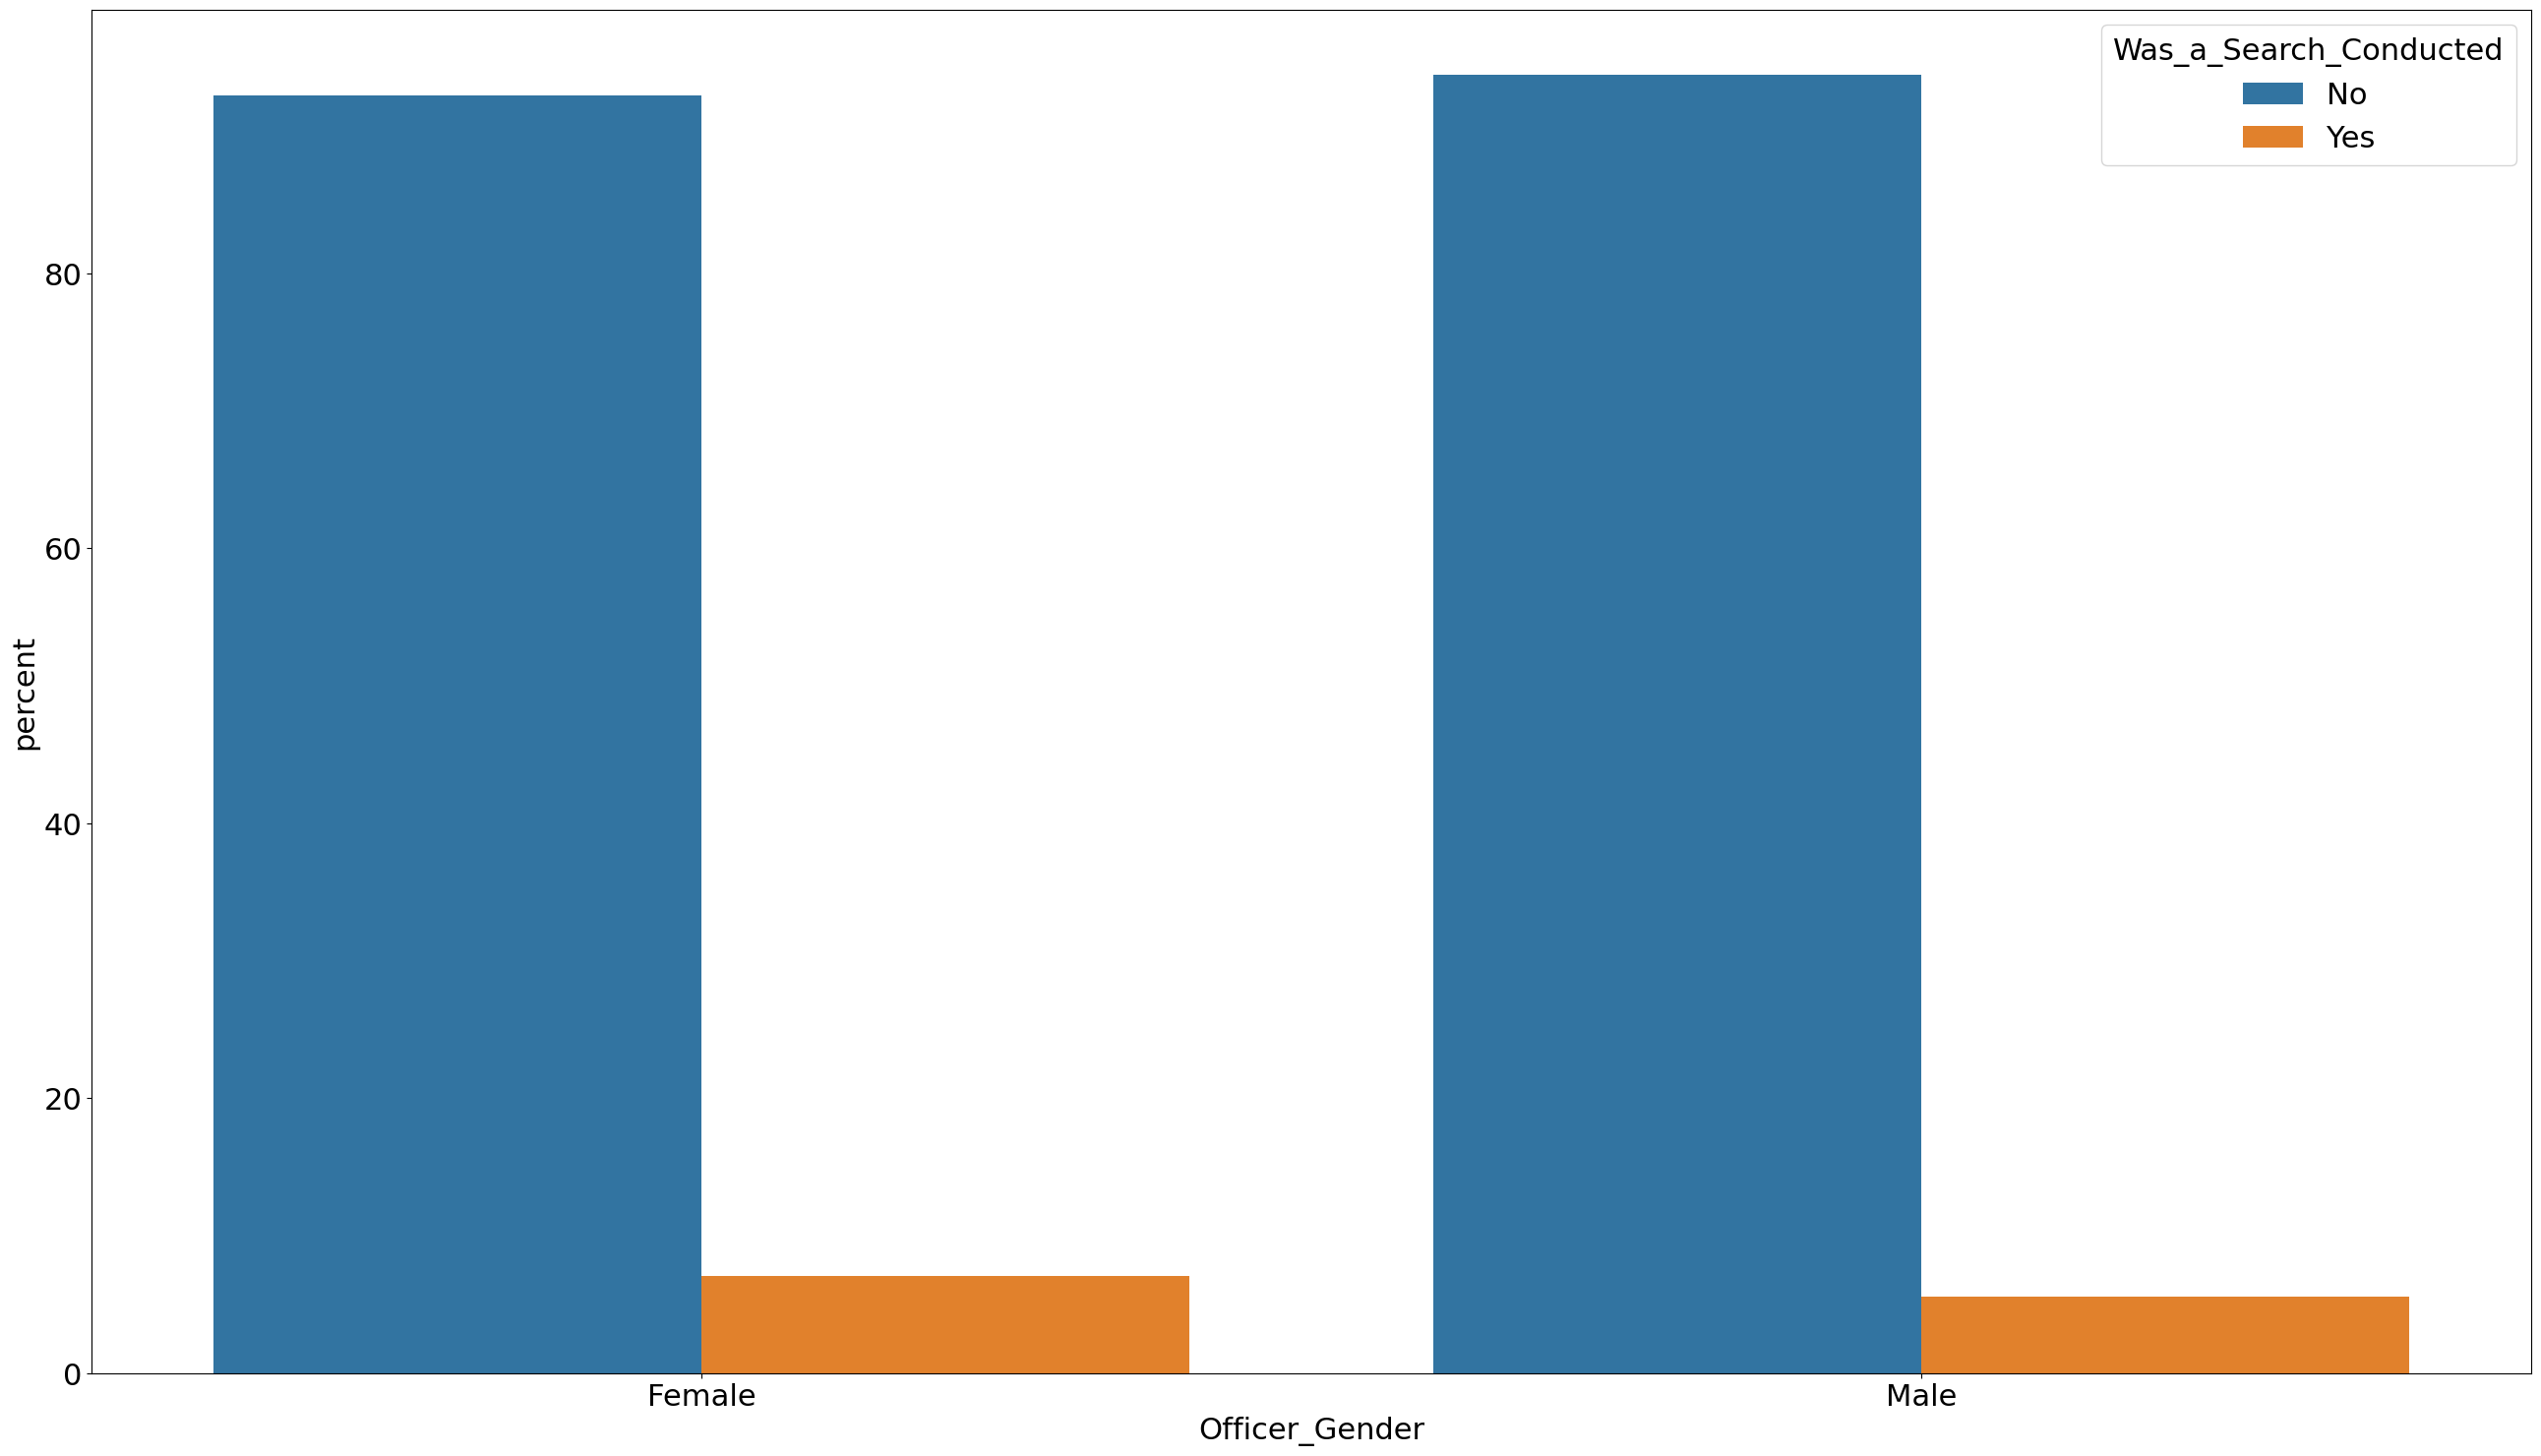

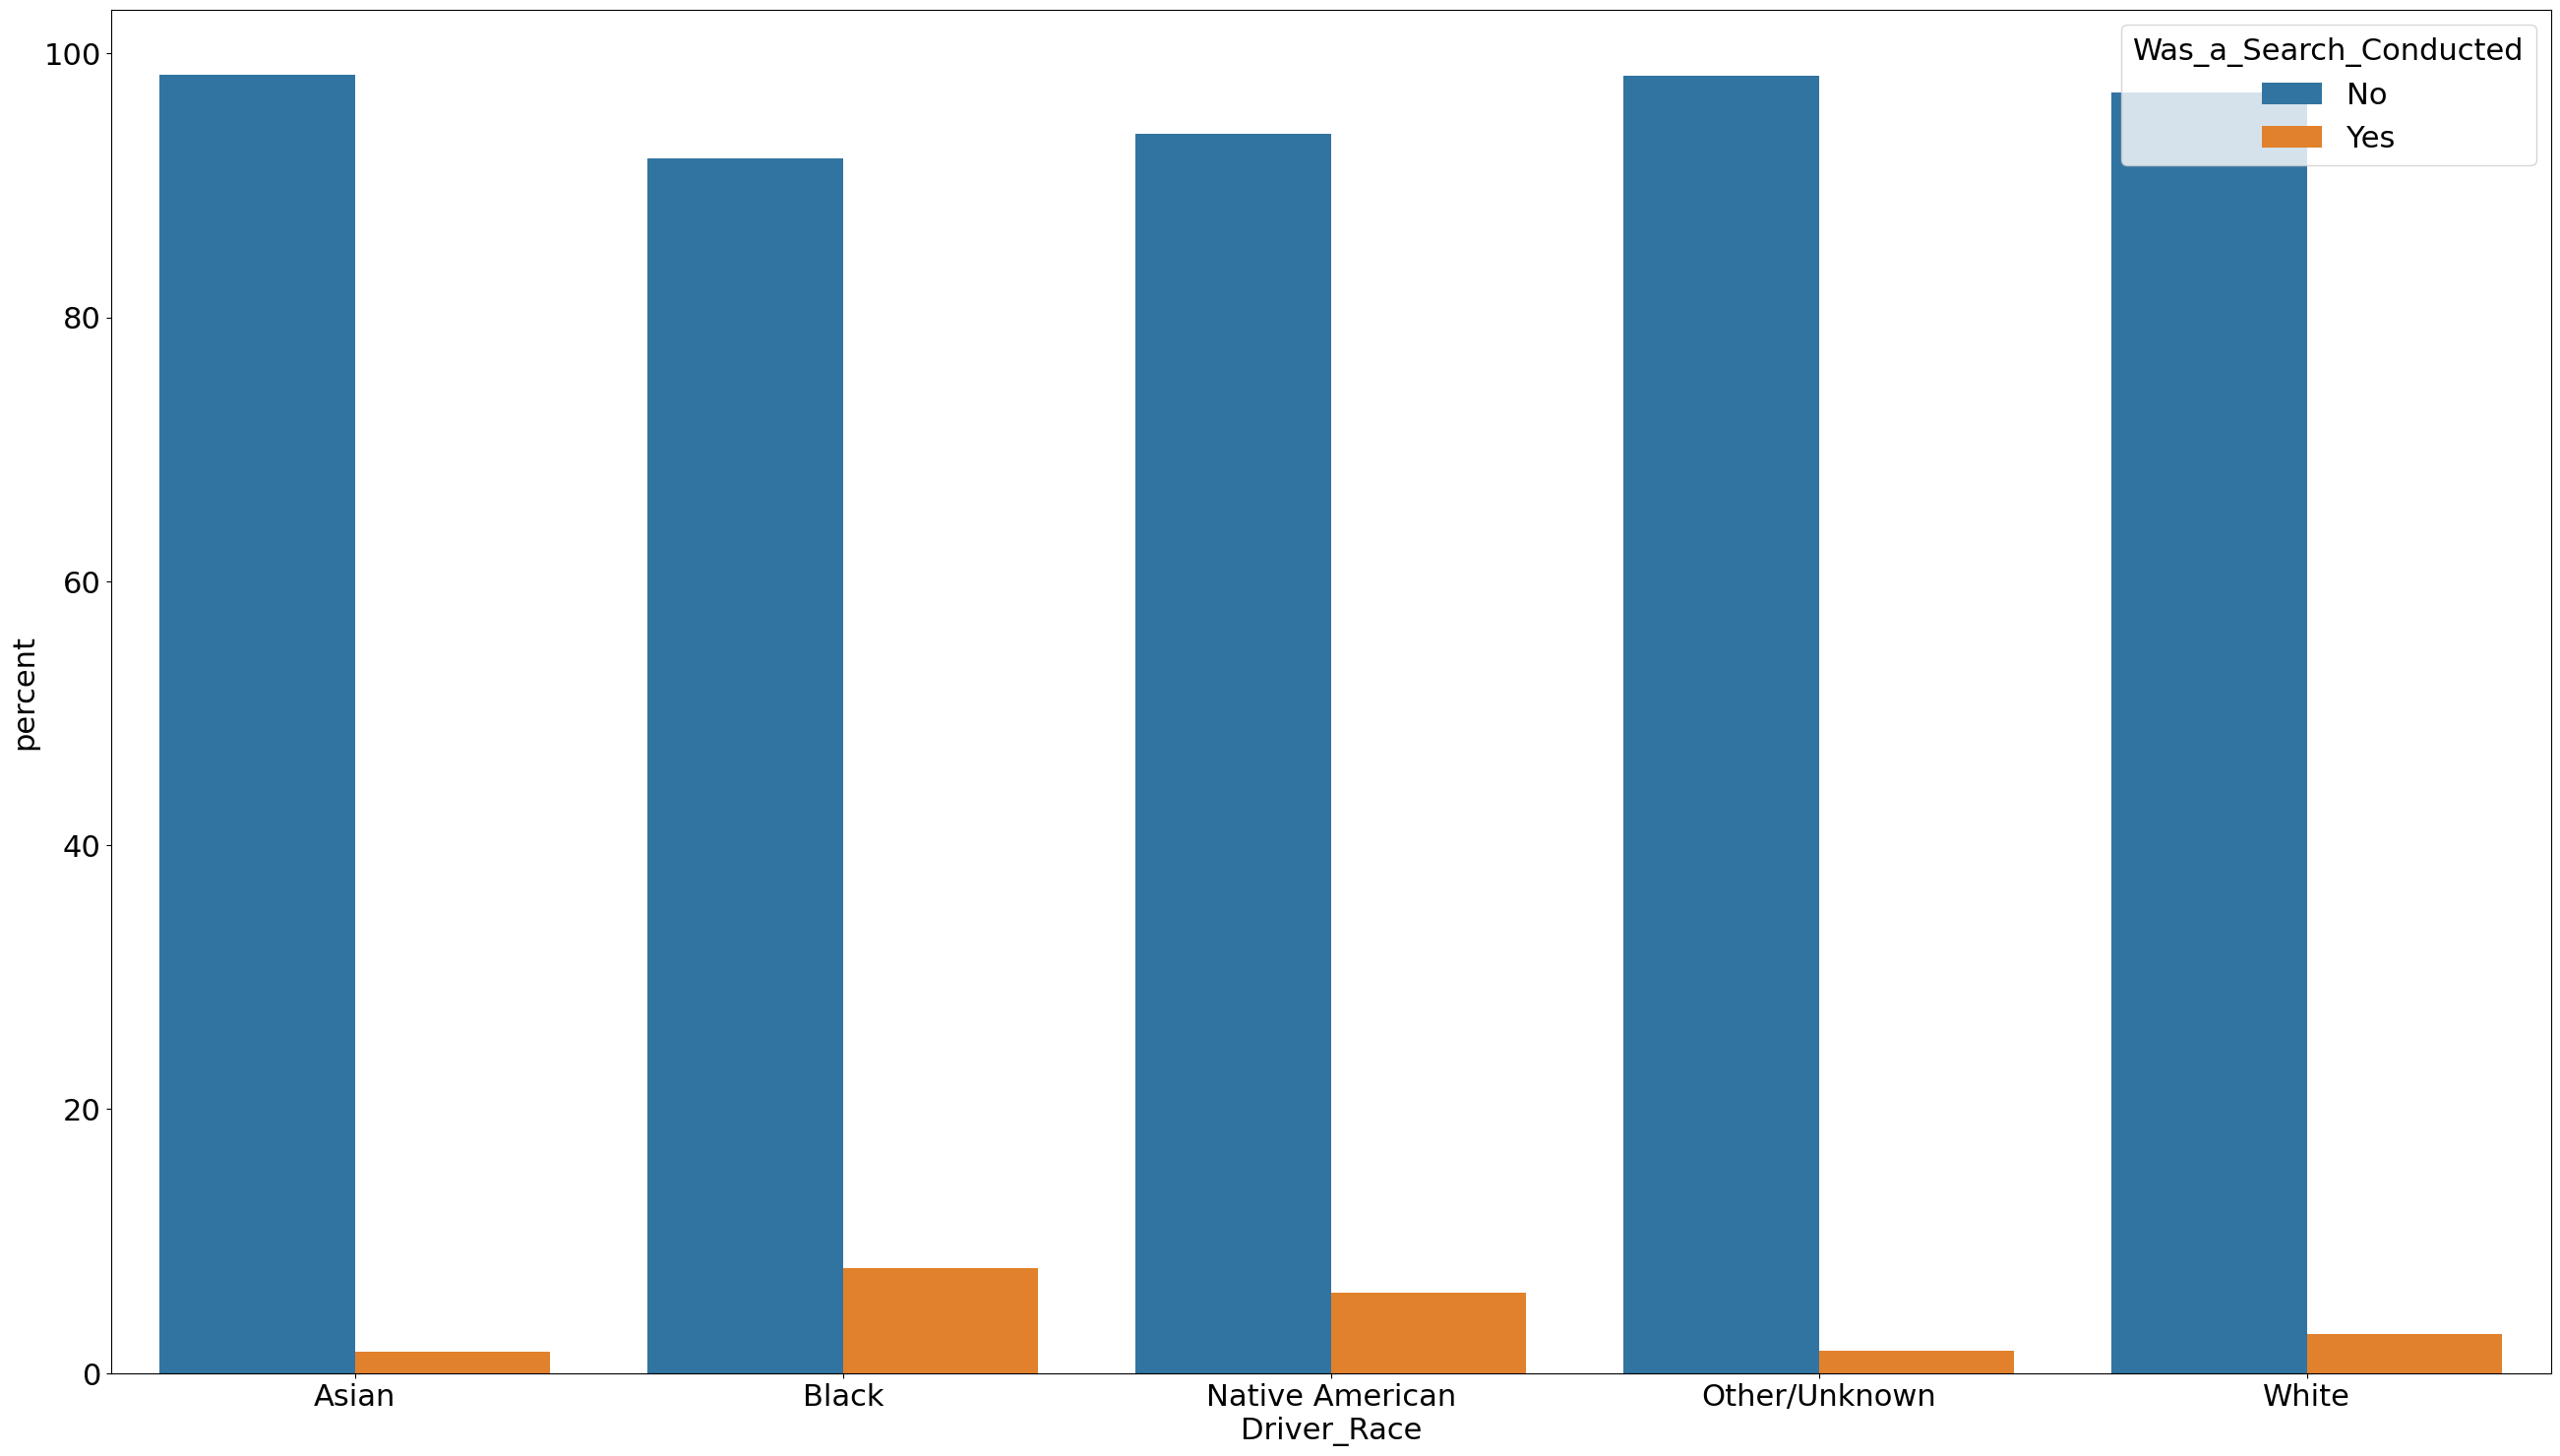

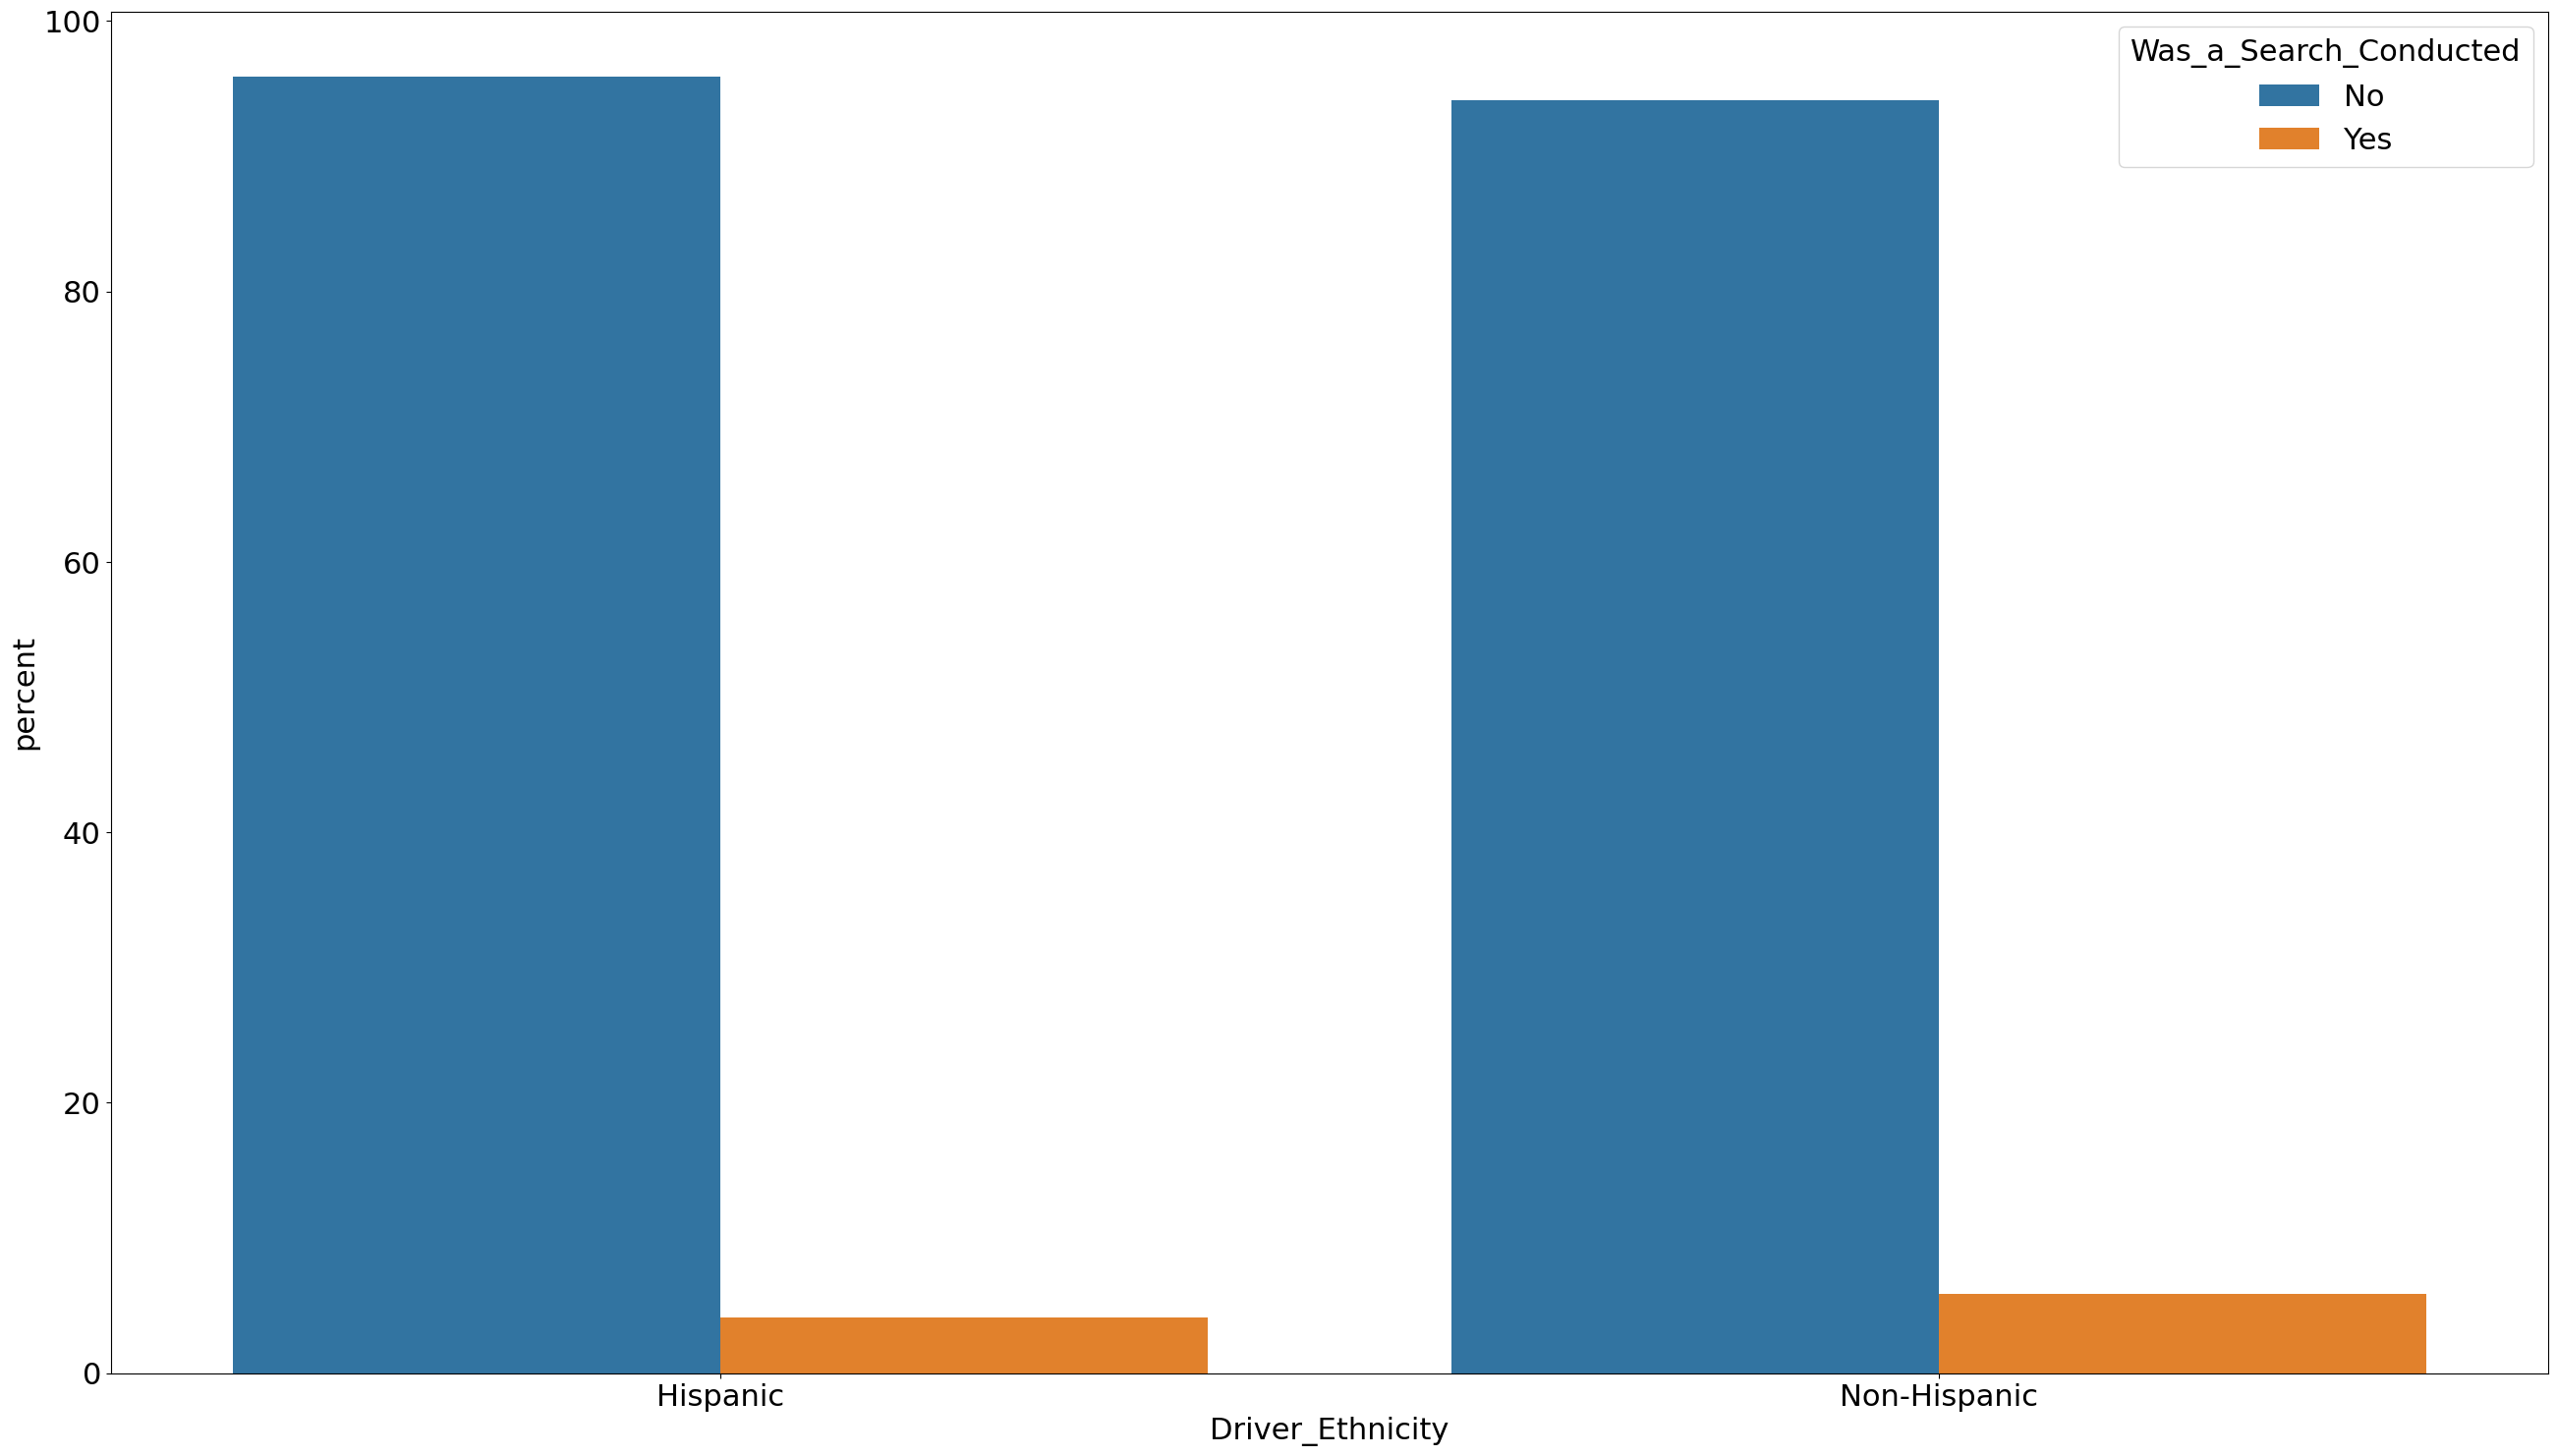

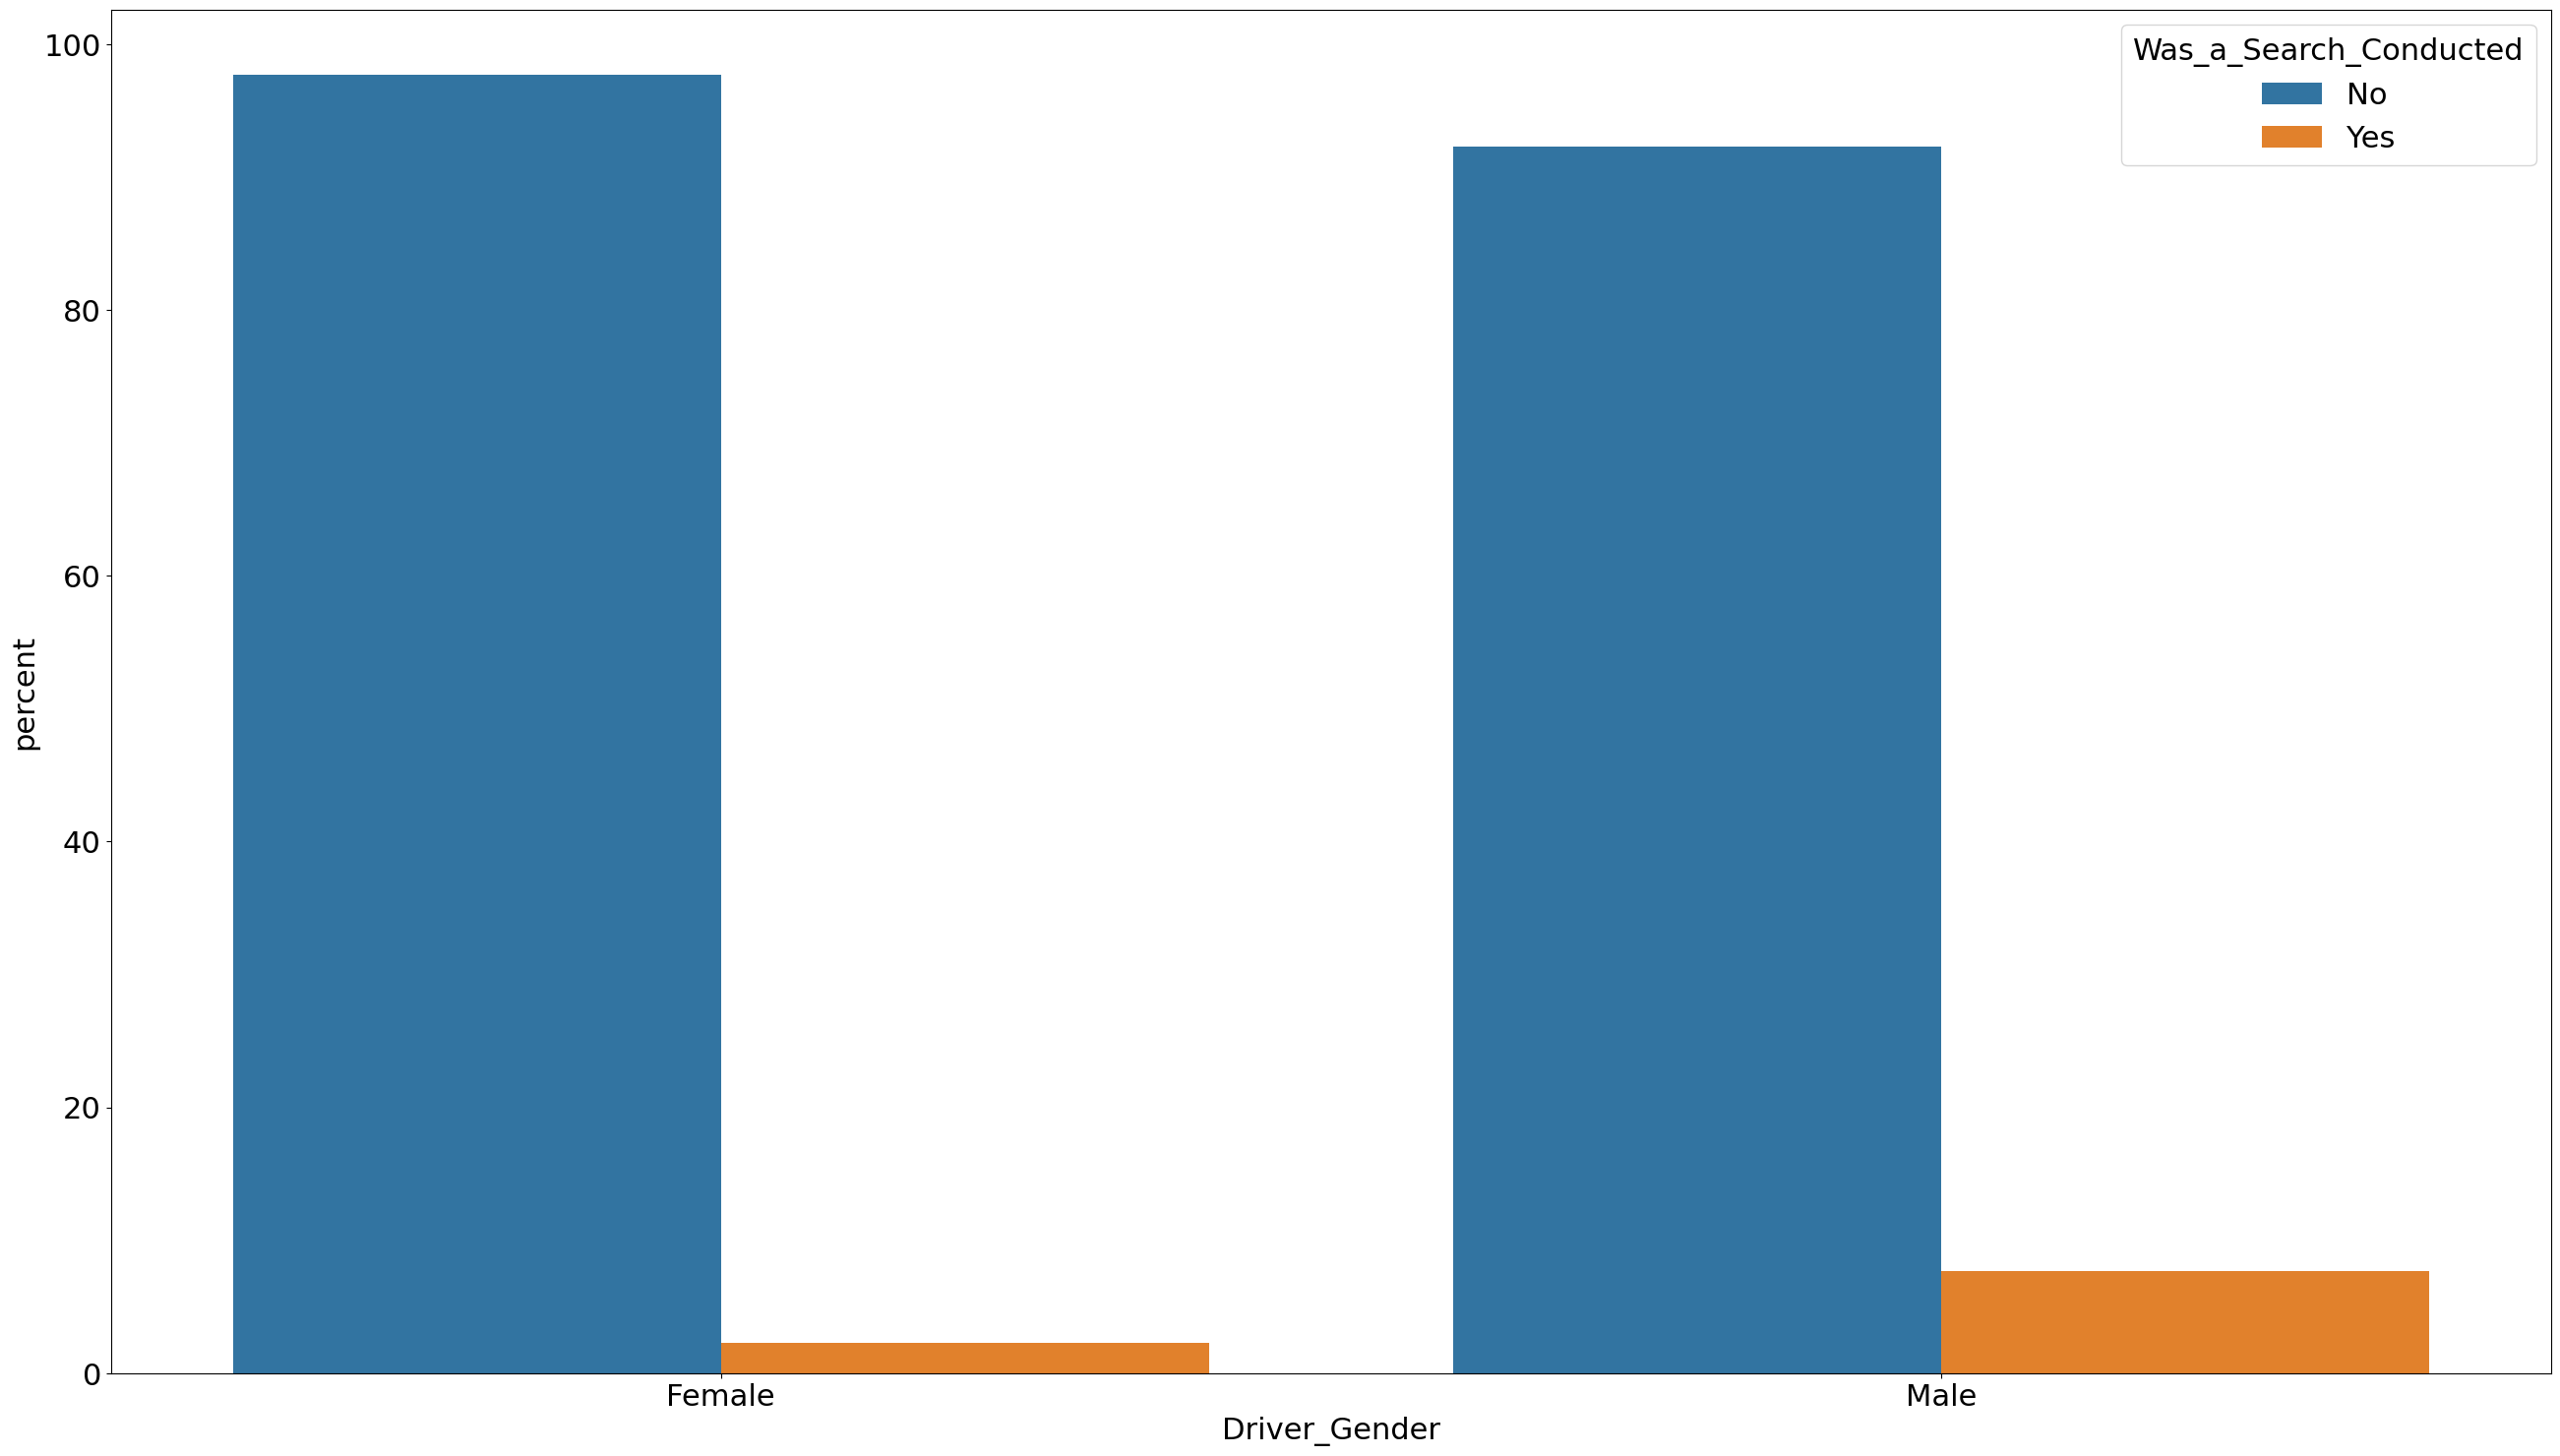

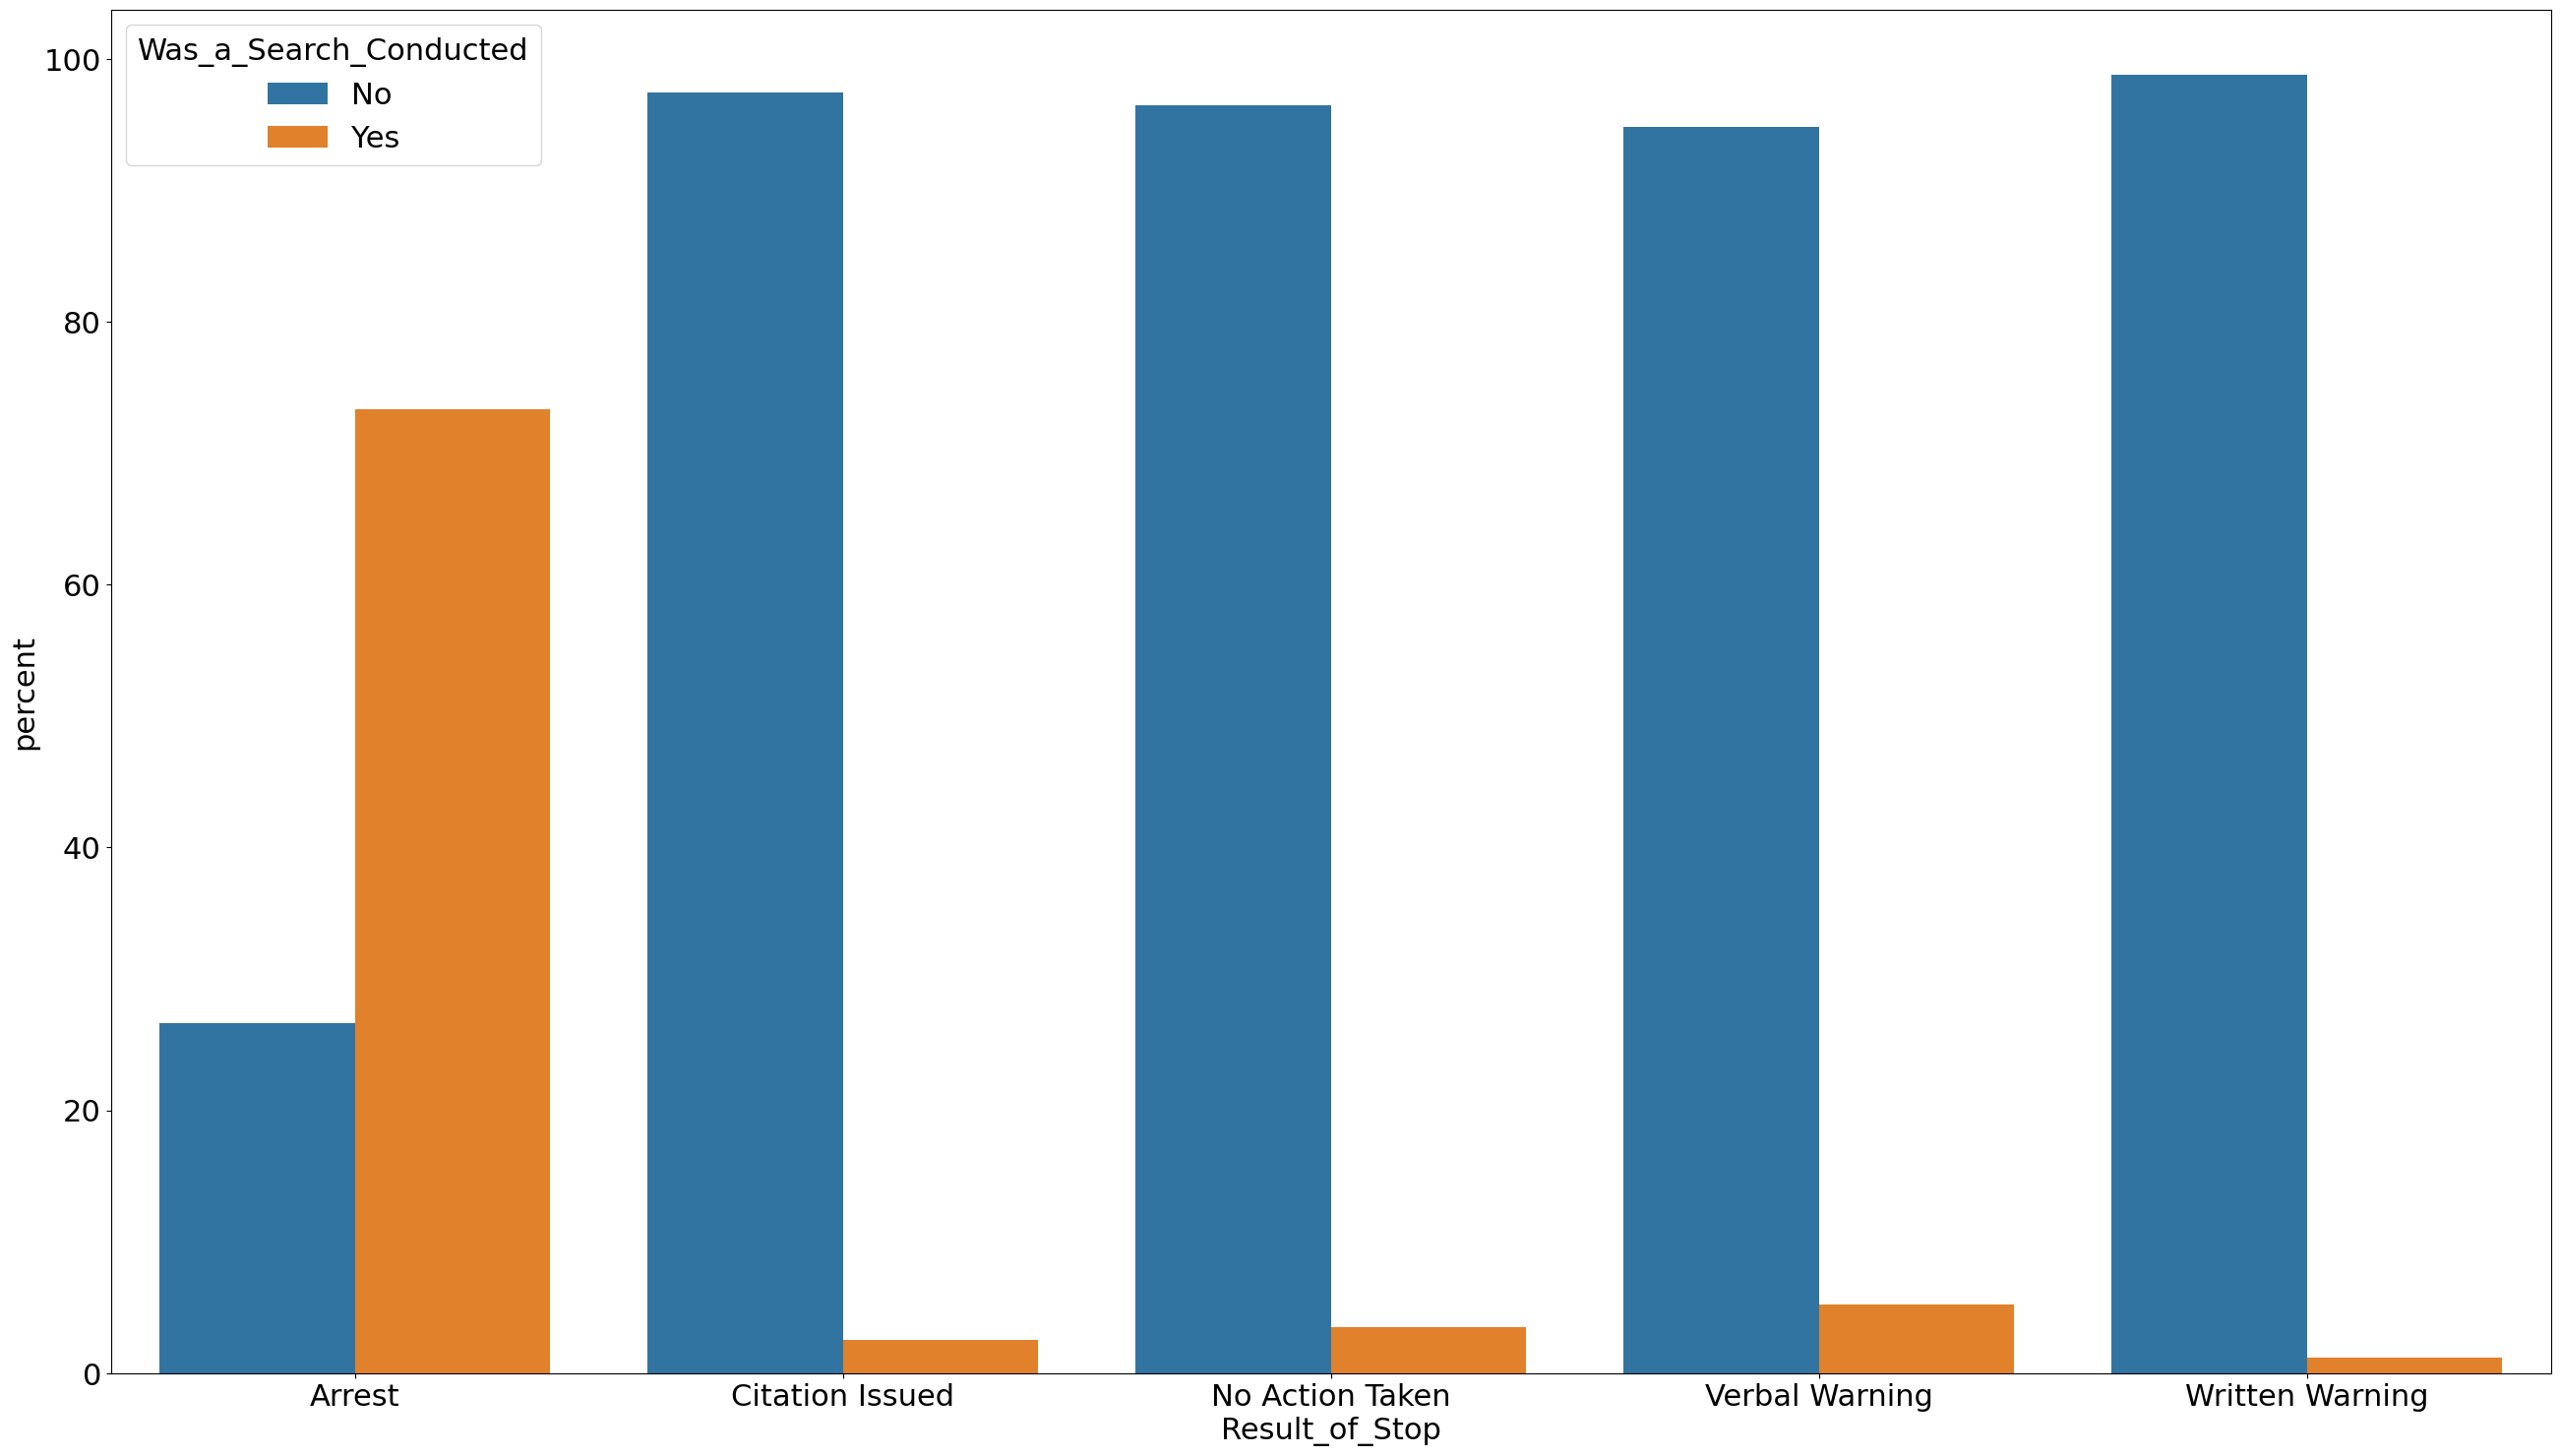

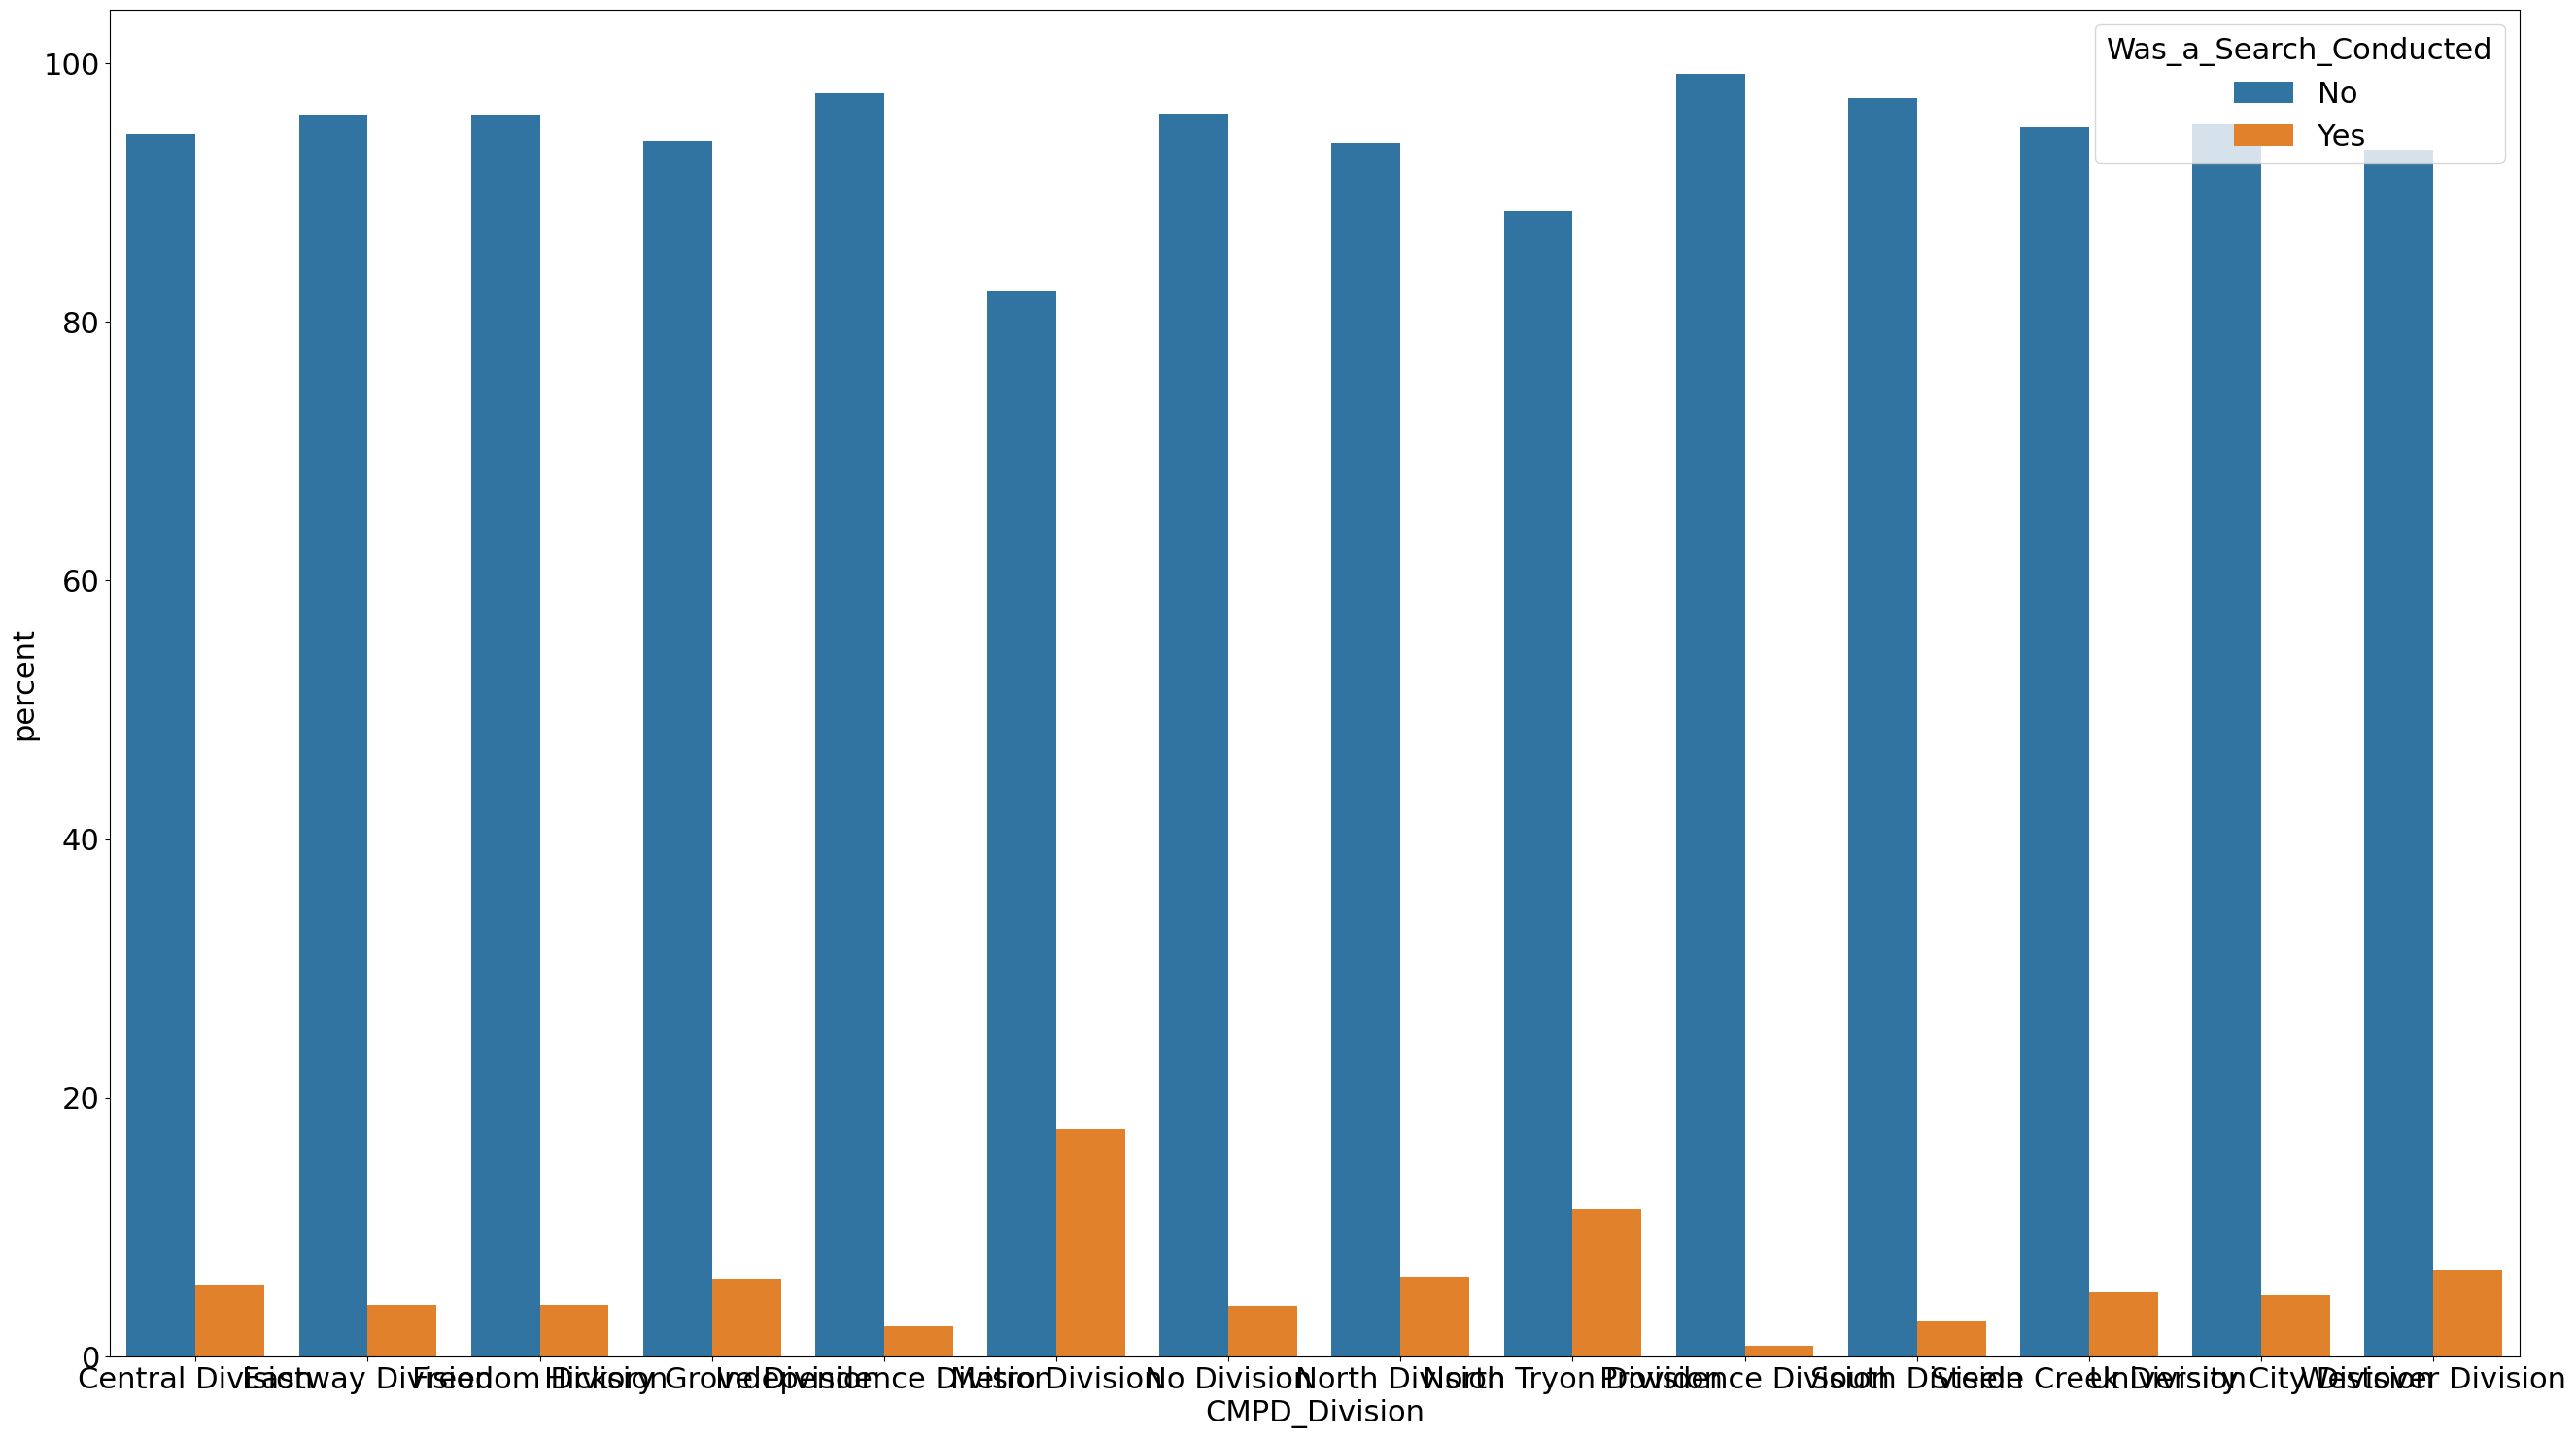

In [16]:
for column in categoricals.drop(labels=['Was_a_Search_Conducted']):
    x,y = column, 'Was_a_Search_Conducted'

    temp=(df
    .groupby(x)[y]
    .value_counts(normalize=True,sort=False)
    .mul(100)
    .rename('percent')
    .reset_index())
    plt.figure(figsize=(32,18))
    sns.barplot(x=column,y="percent",hue=y,data=temp)
    plt.savefig(f'Graphs/normalized_{column}_hue_countplot.png')
    plt.show()

This is a lot clearer for what is happening between our target and our features. We can see that proportionally, Black people are searched more often than other races. We also see that other divisions are proportionally conducting more searches. These are things we should consider when continuing to explore the data.

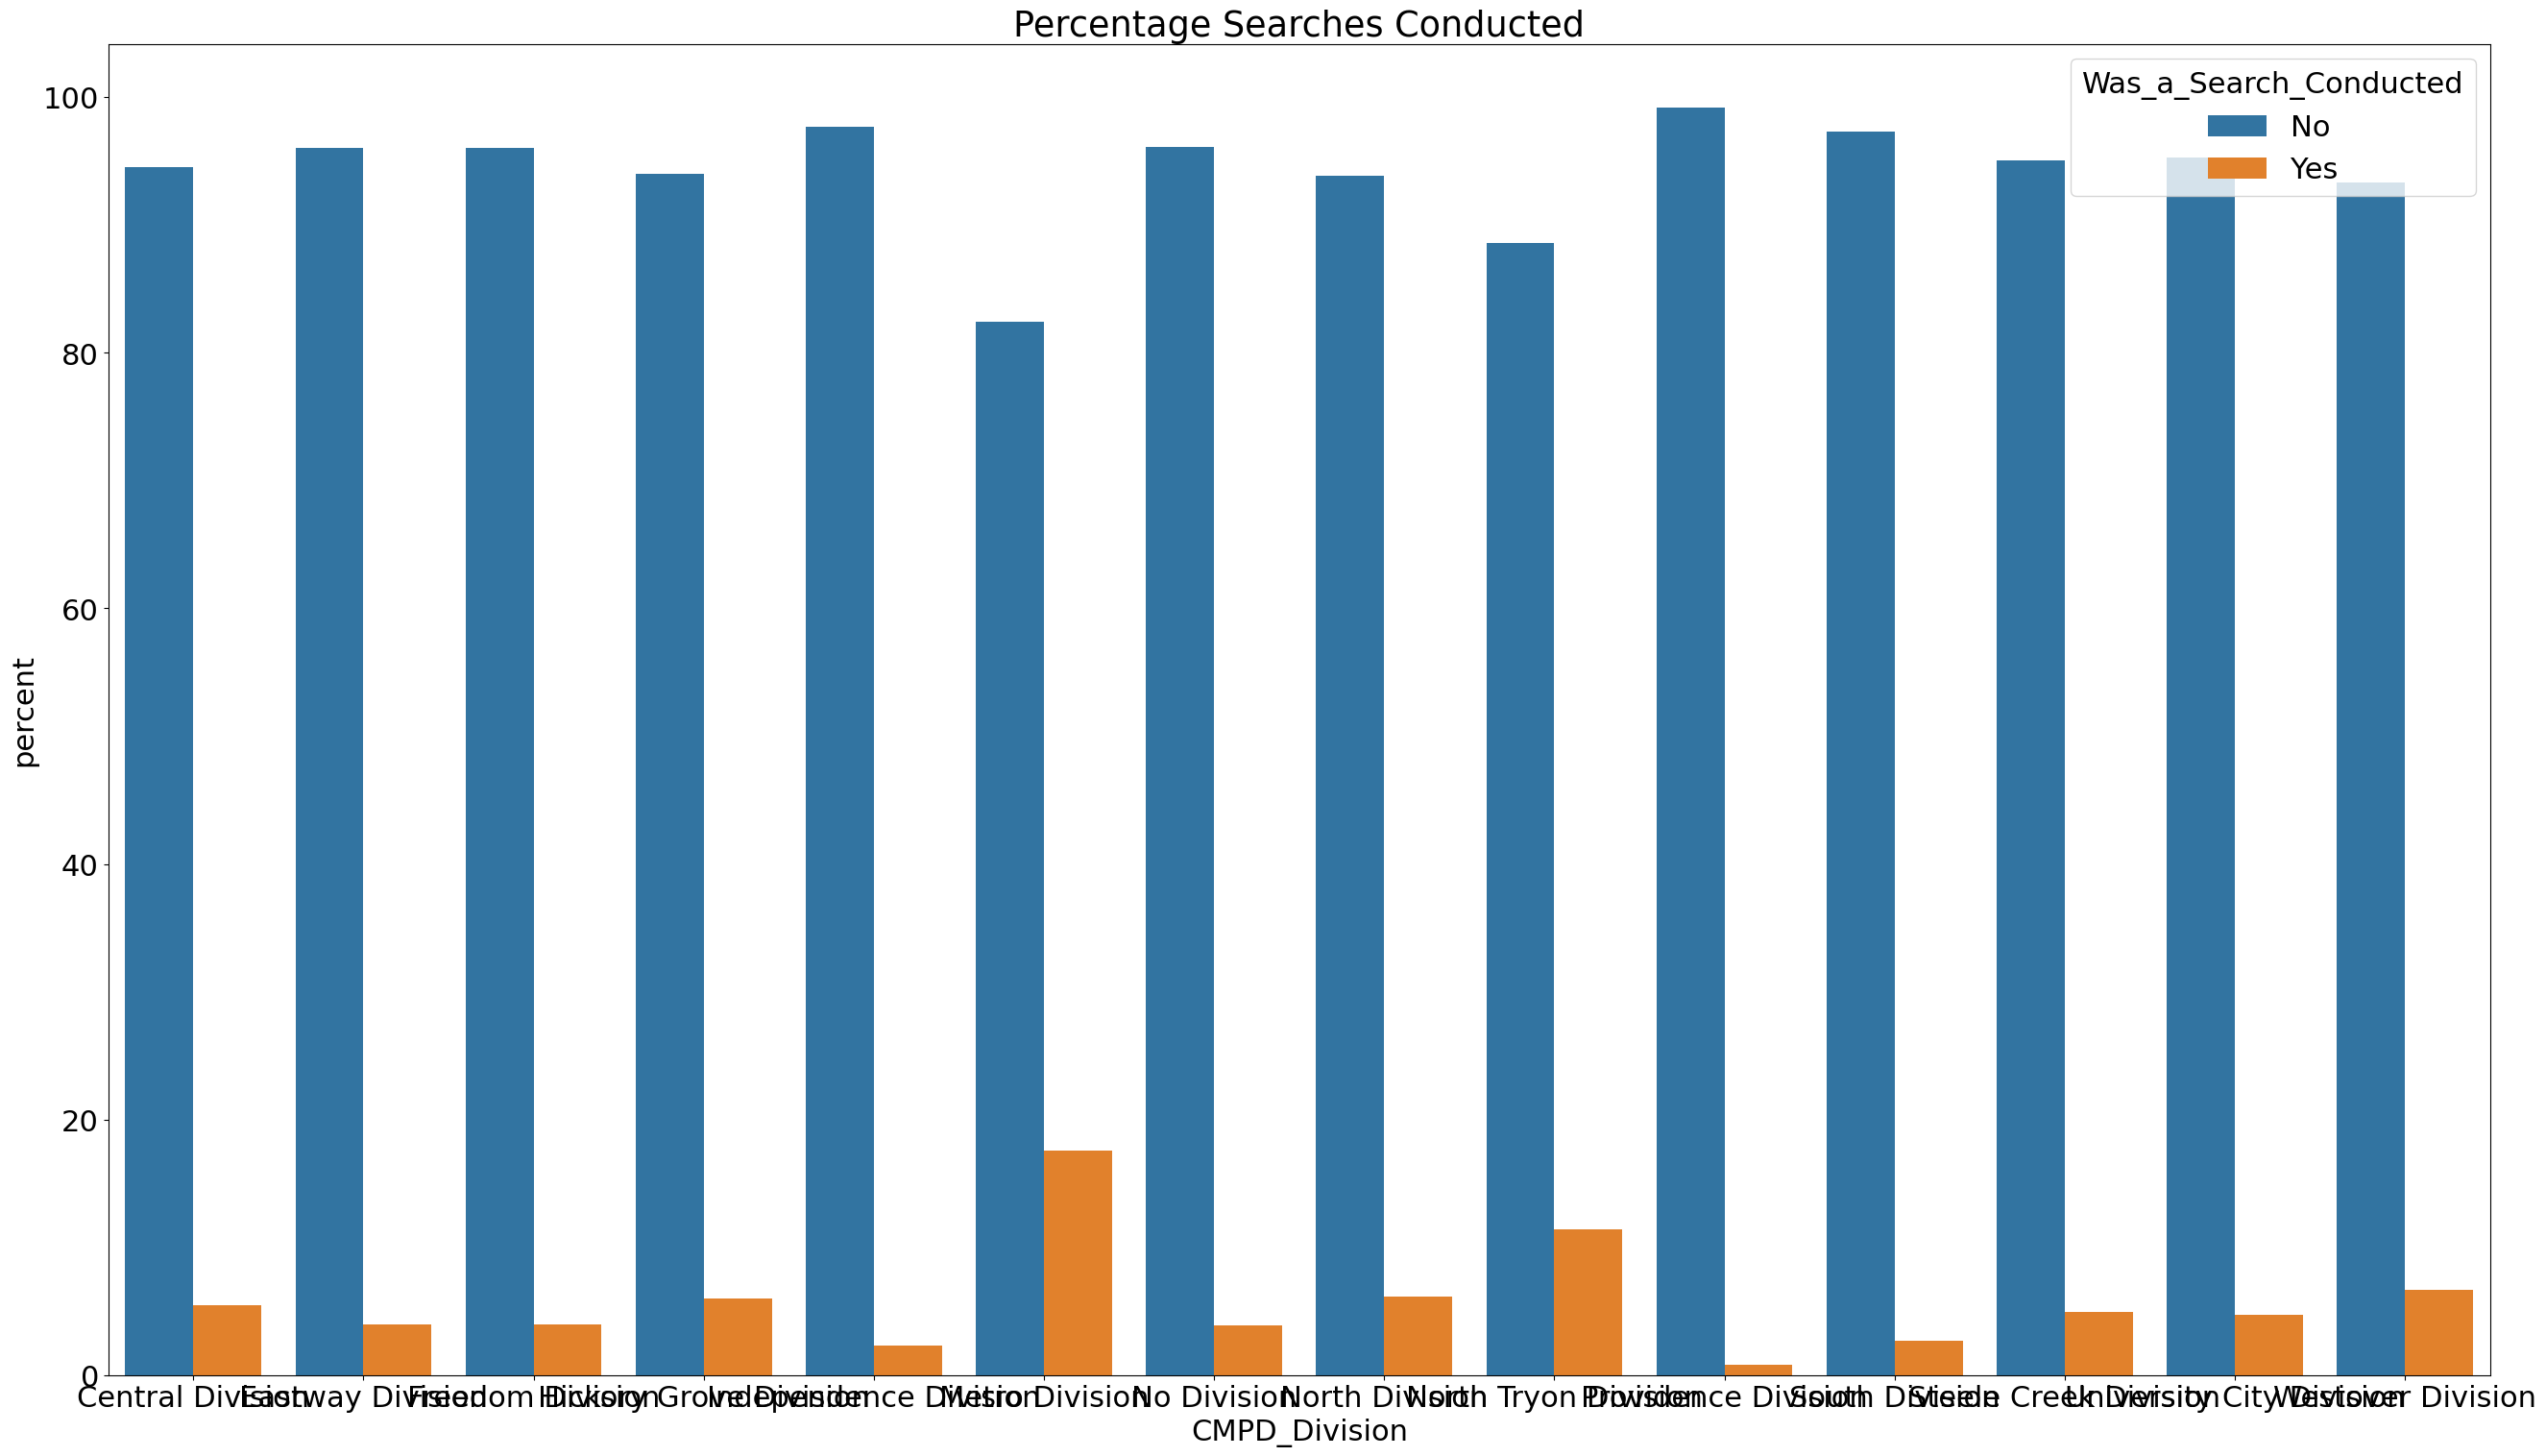

In [17]:
x,y = 'CMPD_Division', 'Was_a_Search_Conducted'

temp=(df
    .groupby(x)[y]
    .value_counts(normalize=True,sort=False)
    .mul(100)
    .rename('percent')
    .reset_index())
plt.figure(figsize=(32,18))
sns.barplot(x=column,y="percent",hue=y,data=temp)
plt.title('Percentage Searches Conducted')
plt.savefig('CMPD_Divsion.png')
plt.show()

Finally we'll look at the continuous data to see if there's any relation to our target.

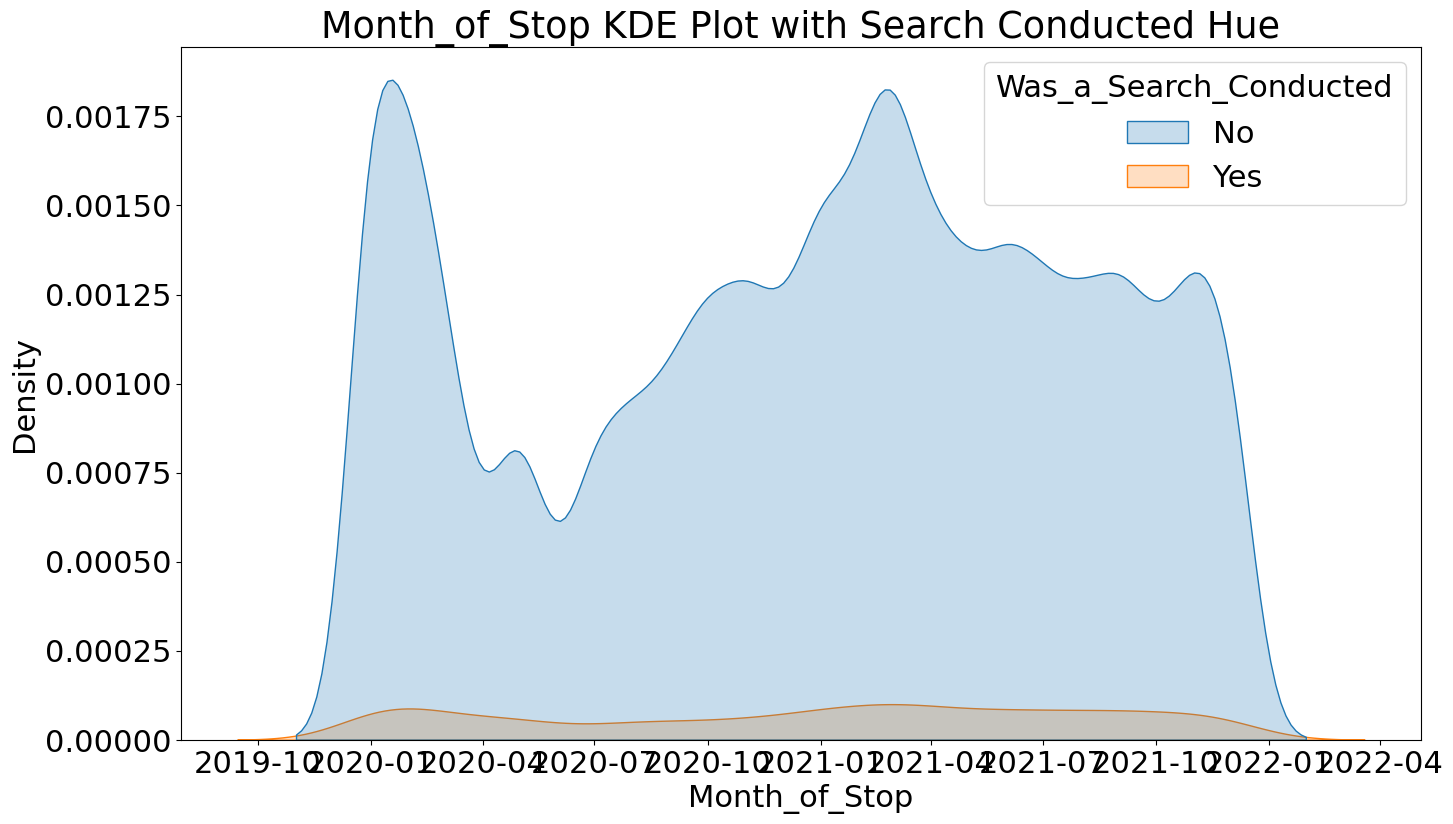

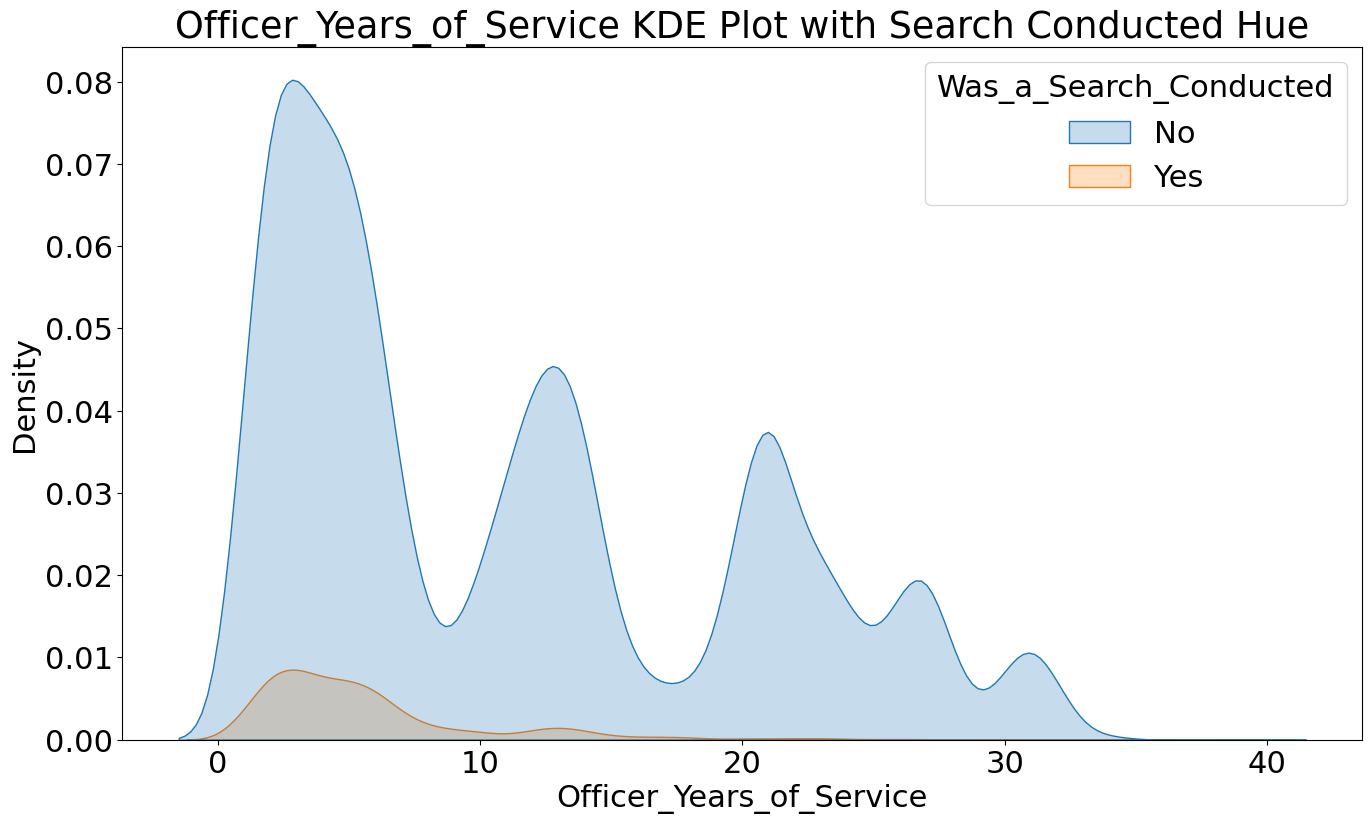

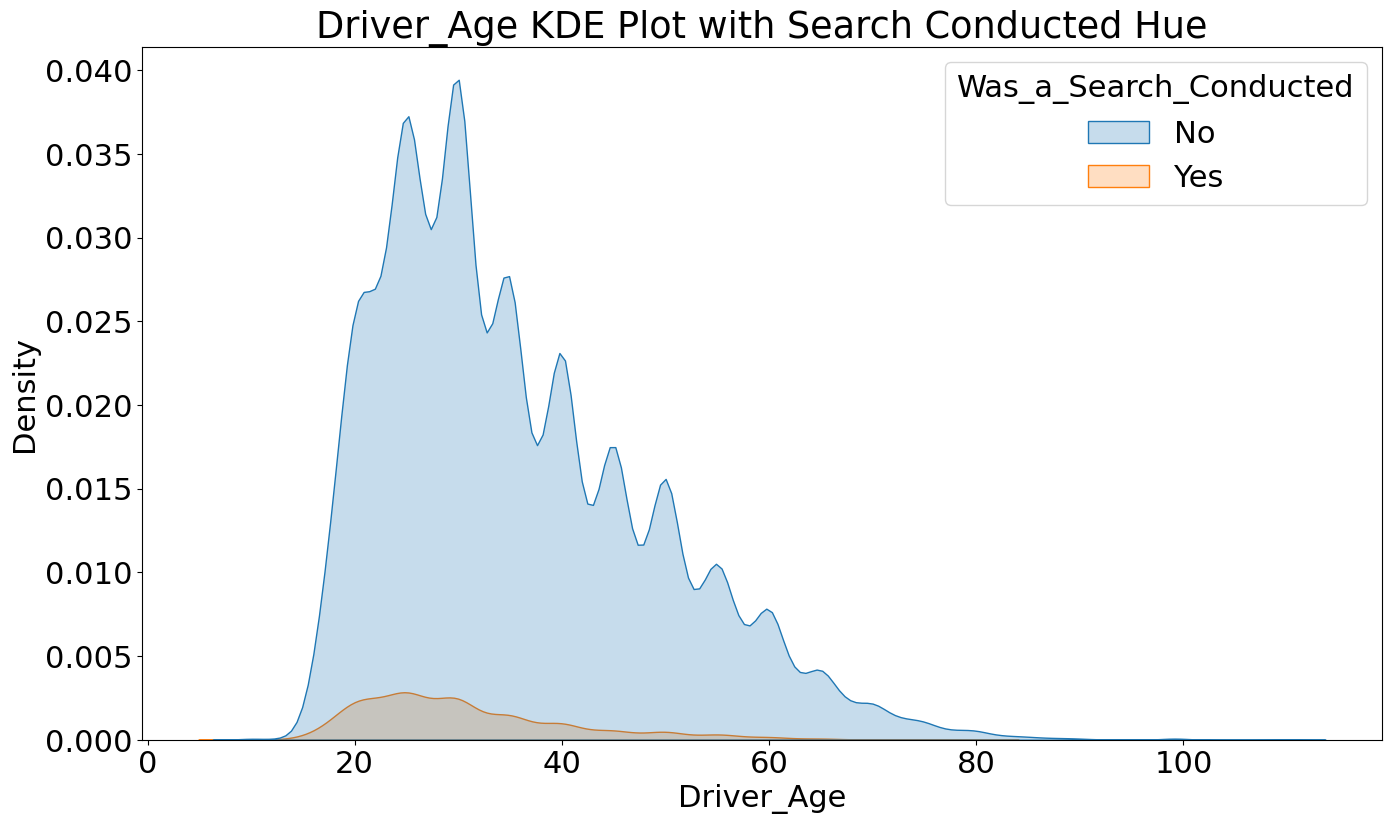

In [18]:
for column in numerical:
    plt.figure(figsize=(16,9))
    sns.kdeplot(x=df[column],hue=df['Was_a_Search_Conducted'],fill=True)
    plt.title(f'{column} KDE Plot with Search Conducted Hue')
    plt.savefig(f'Graphs/{column}_')
    plt.show()

We can see that the number of searches conducted goes down as age increases for both the driver and the officer. We don't see anyform of relationship with the month of stop.

## Analyzing Metro Division
Let's now take a slice of our dataframe only looking at Metro Division to see if it's distribution differs at all. We'll also drop the division variable from this dataframe since it will only be one division.

In [19]:
Metro = df[df['CMPD_Division'] == 'Metro Division'].drop(columns=('CMPD_Division'))

Let's look through our data info.

In [20]:
Metro.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11182 entries, 20 to 139358
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Month_of_Stop             11182 non-null  datetime64[ns]
 1   Reason_for_Stop           11182 non-null  object        
 2   Officer_Race              11182 non-null  object        
 3   Officer_Gender            11182 non-null  object        
 4   Officer_Years_of_Service  11182 non-null  int64         
 5   Driver_Race               11182 non-null  object        
 6   Driver_Ethnicity          11182 non-null  object        
 7   Driver_Gender             11182 non-null  object        
 8   Driver_Age                11182 non-null  int64         
 9   Was_a_Search_Conducted    11182 non-null  object        
 10  Result_of_Stop            11182 non-null  object        
dtypes: datetime64[ns](1), int64(2), object(8)
memory usage: 1.0+ MB


Our slice still has a good chunk of data in it, so we're not too worried about not having enoguh information. Let's loop through and visualize the distributions of this slice.

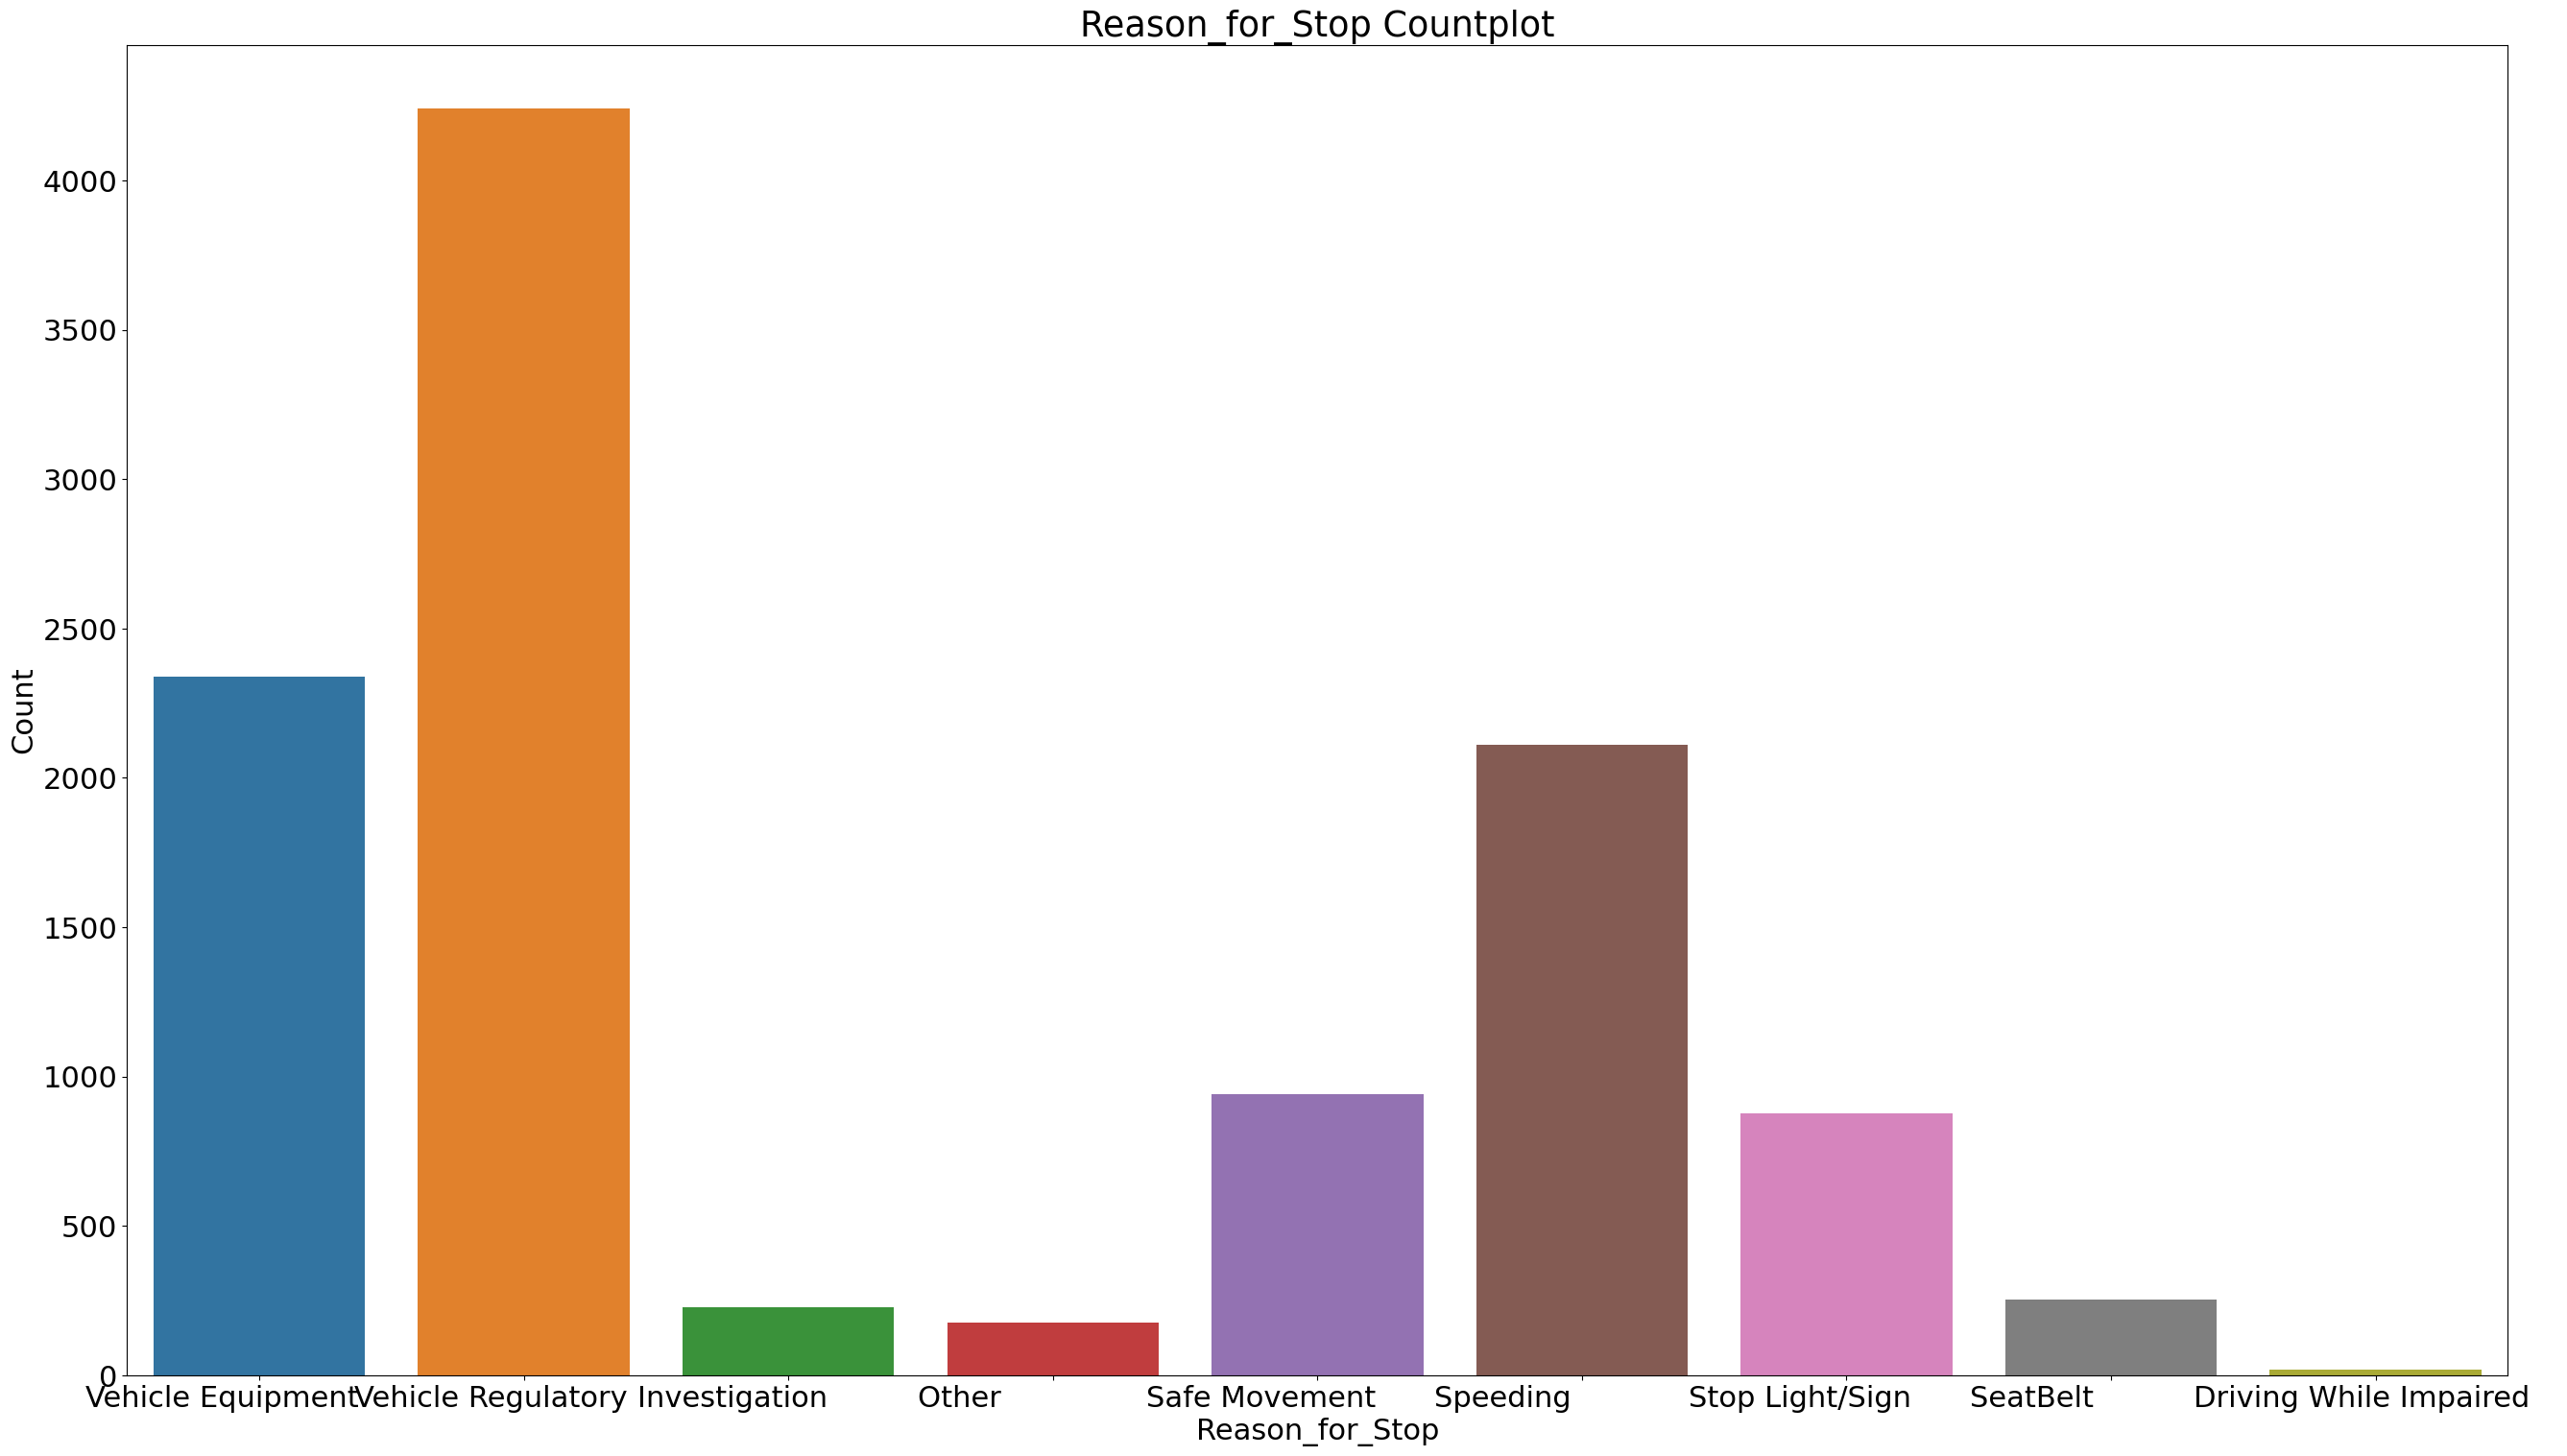

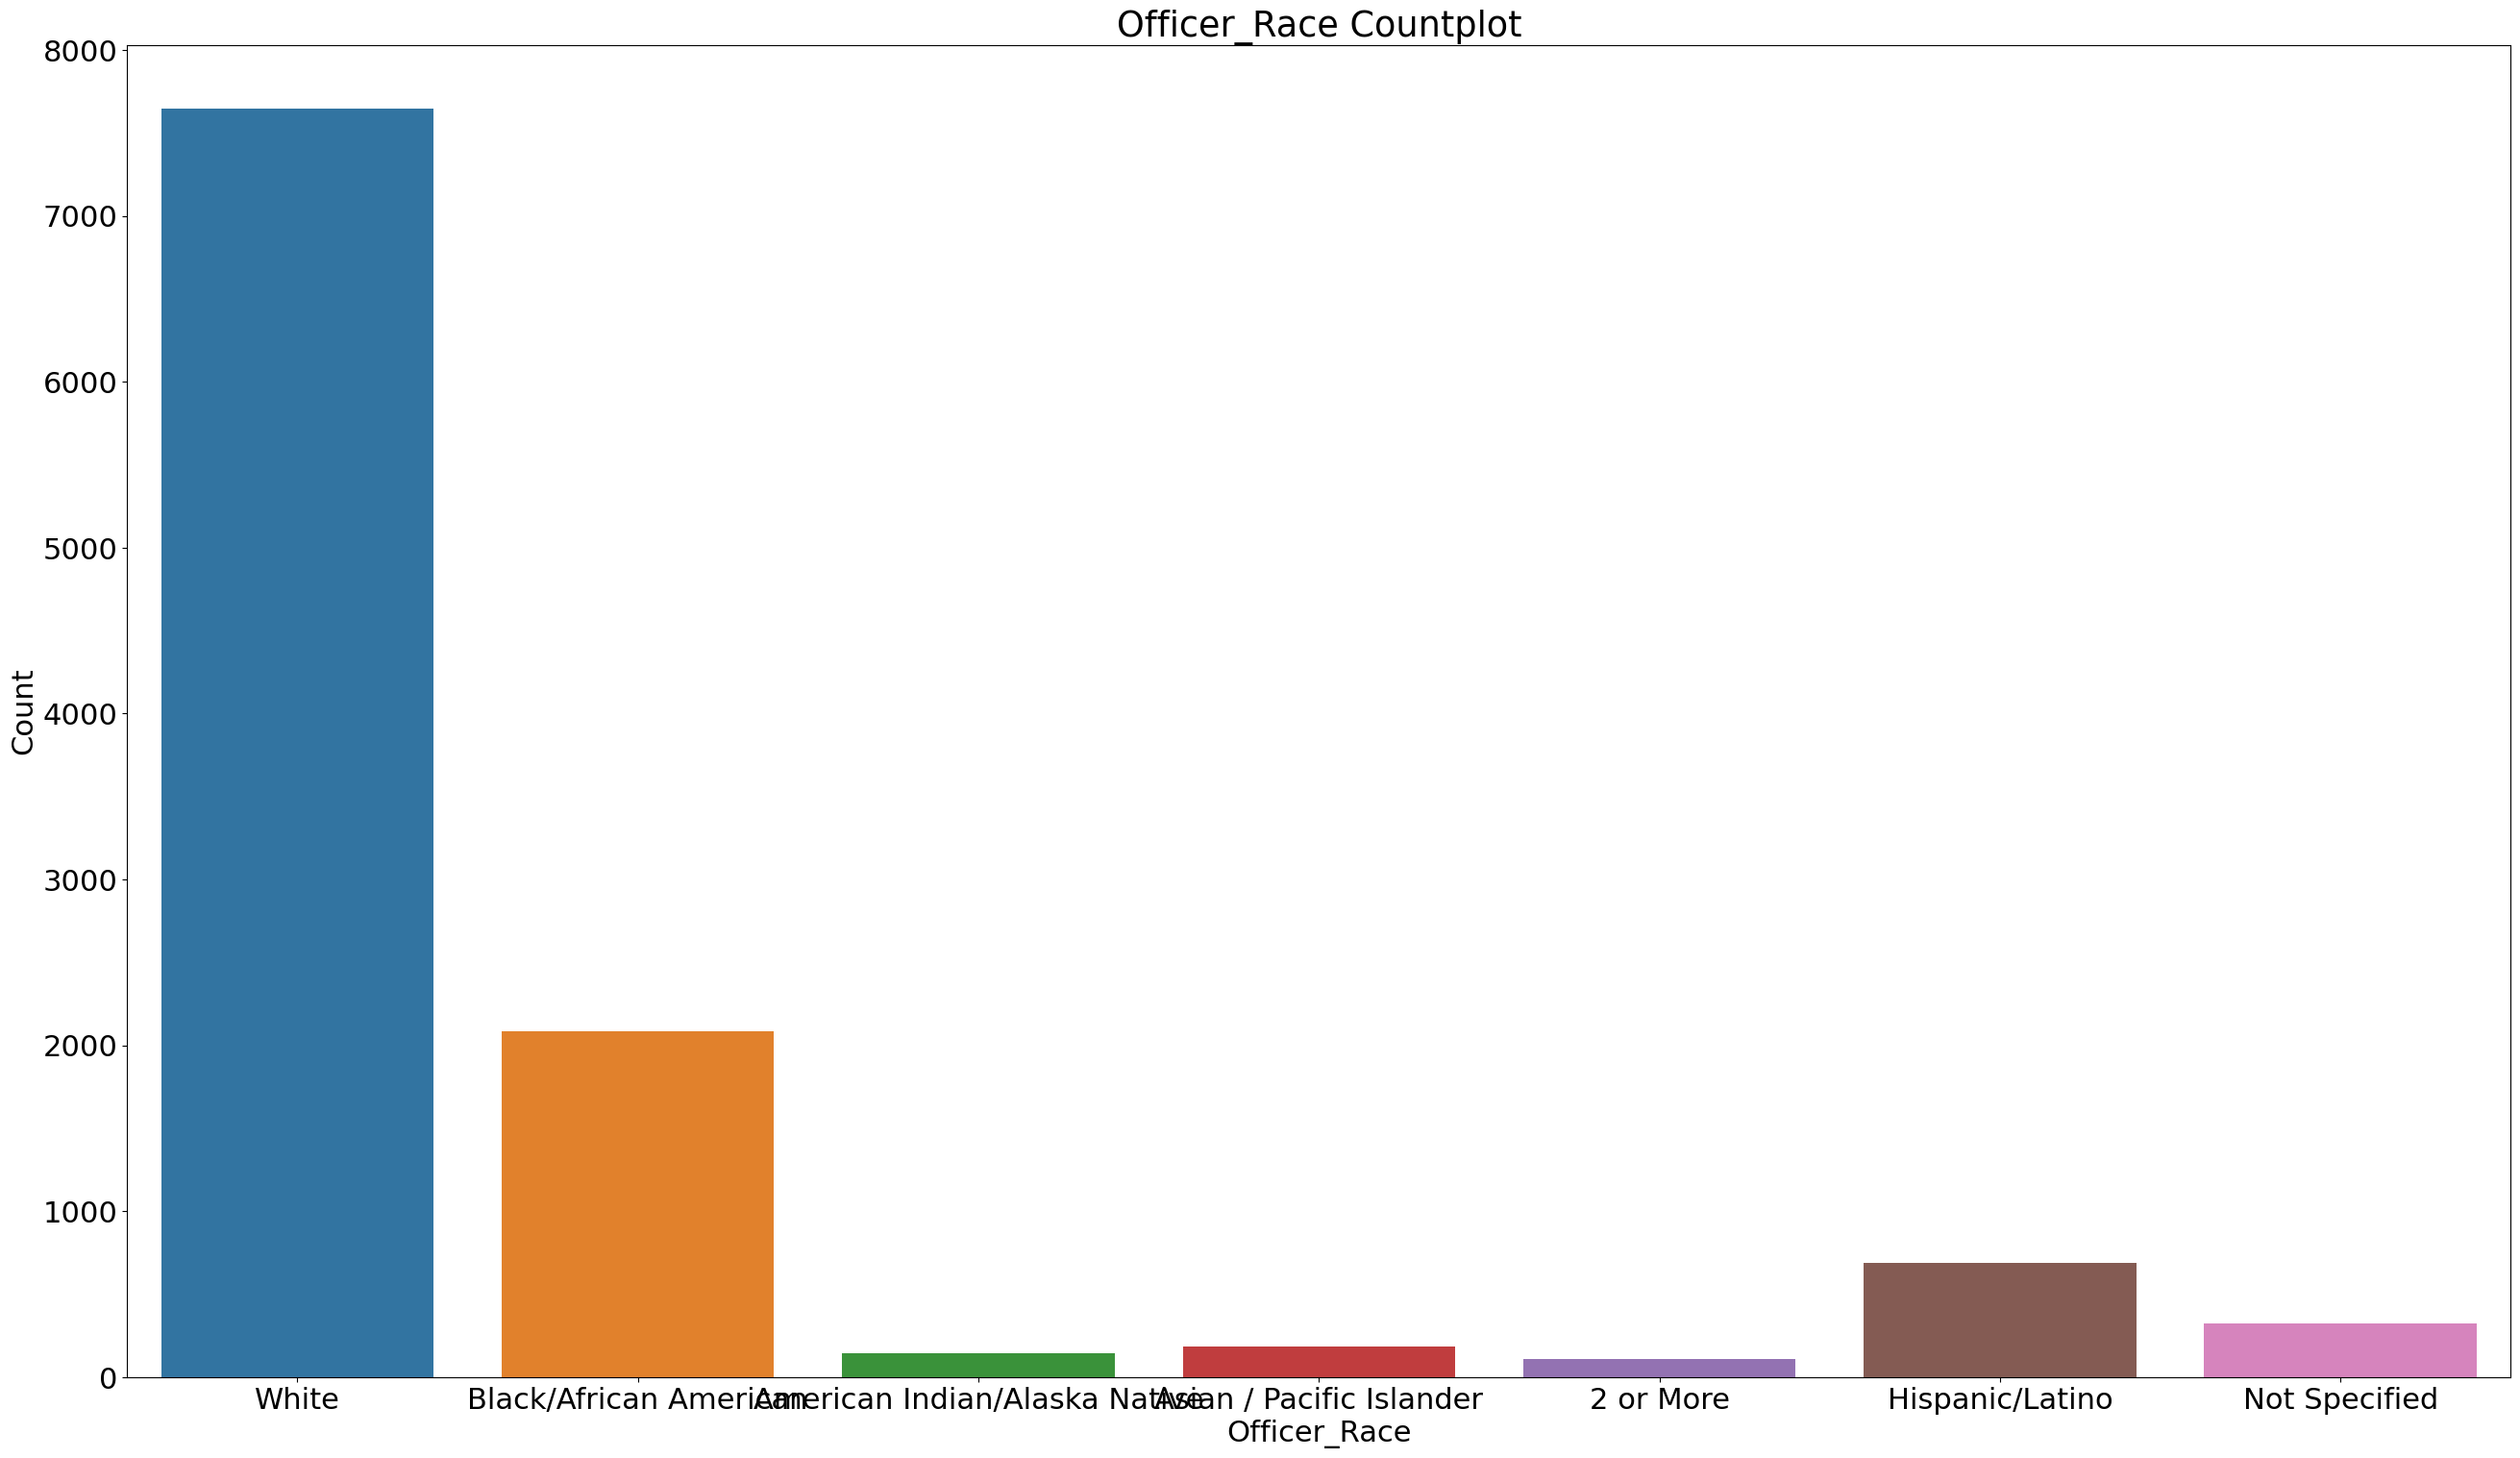

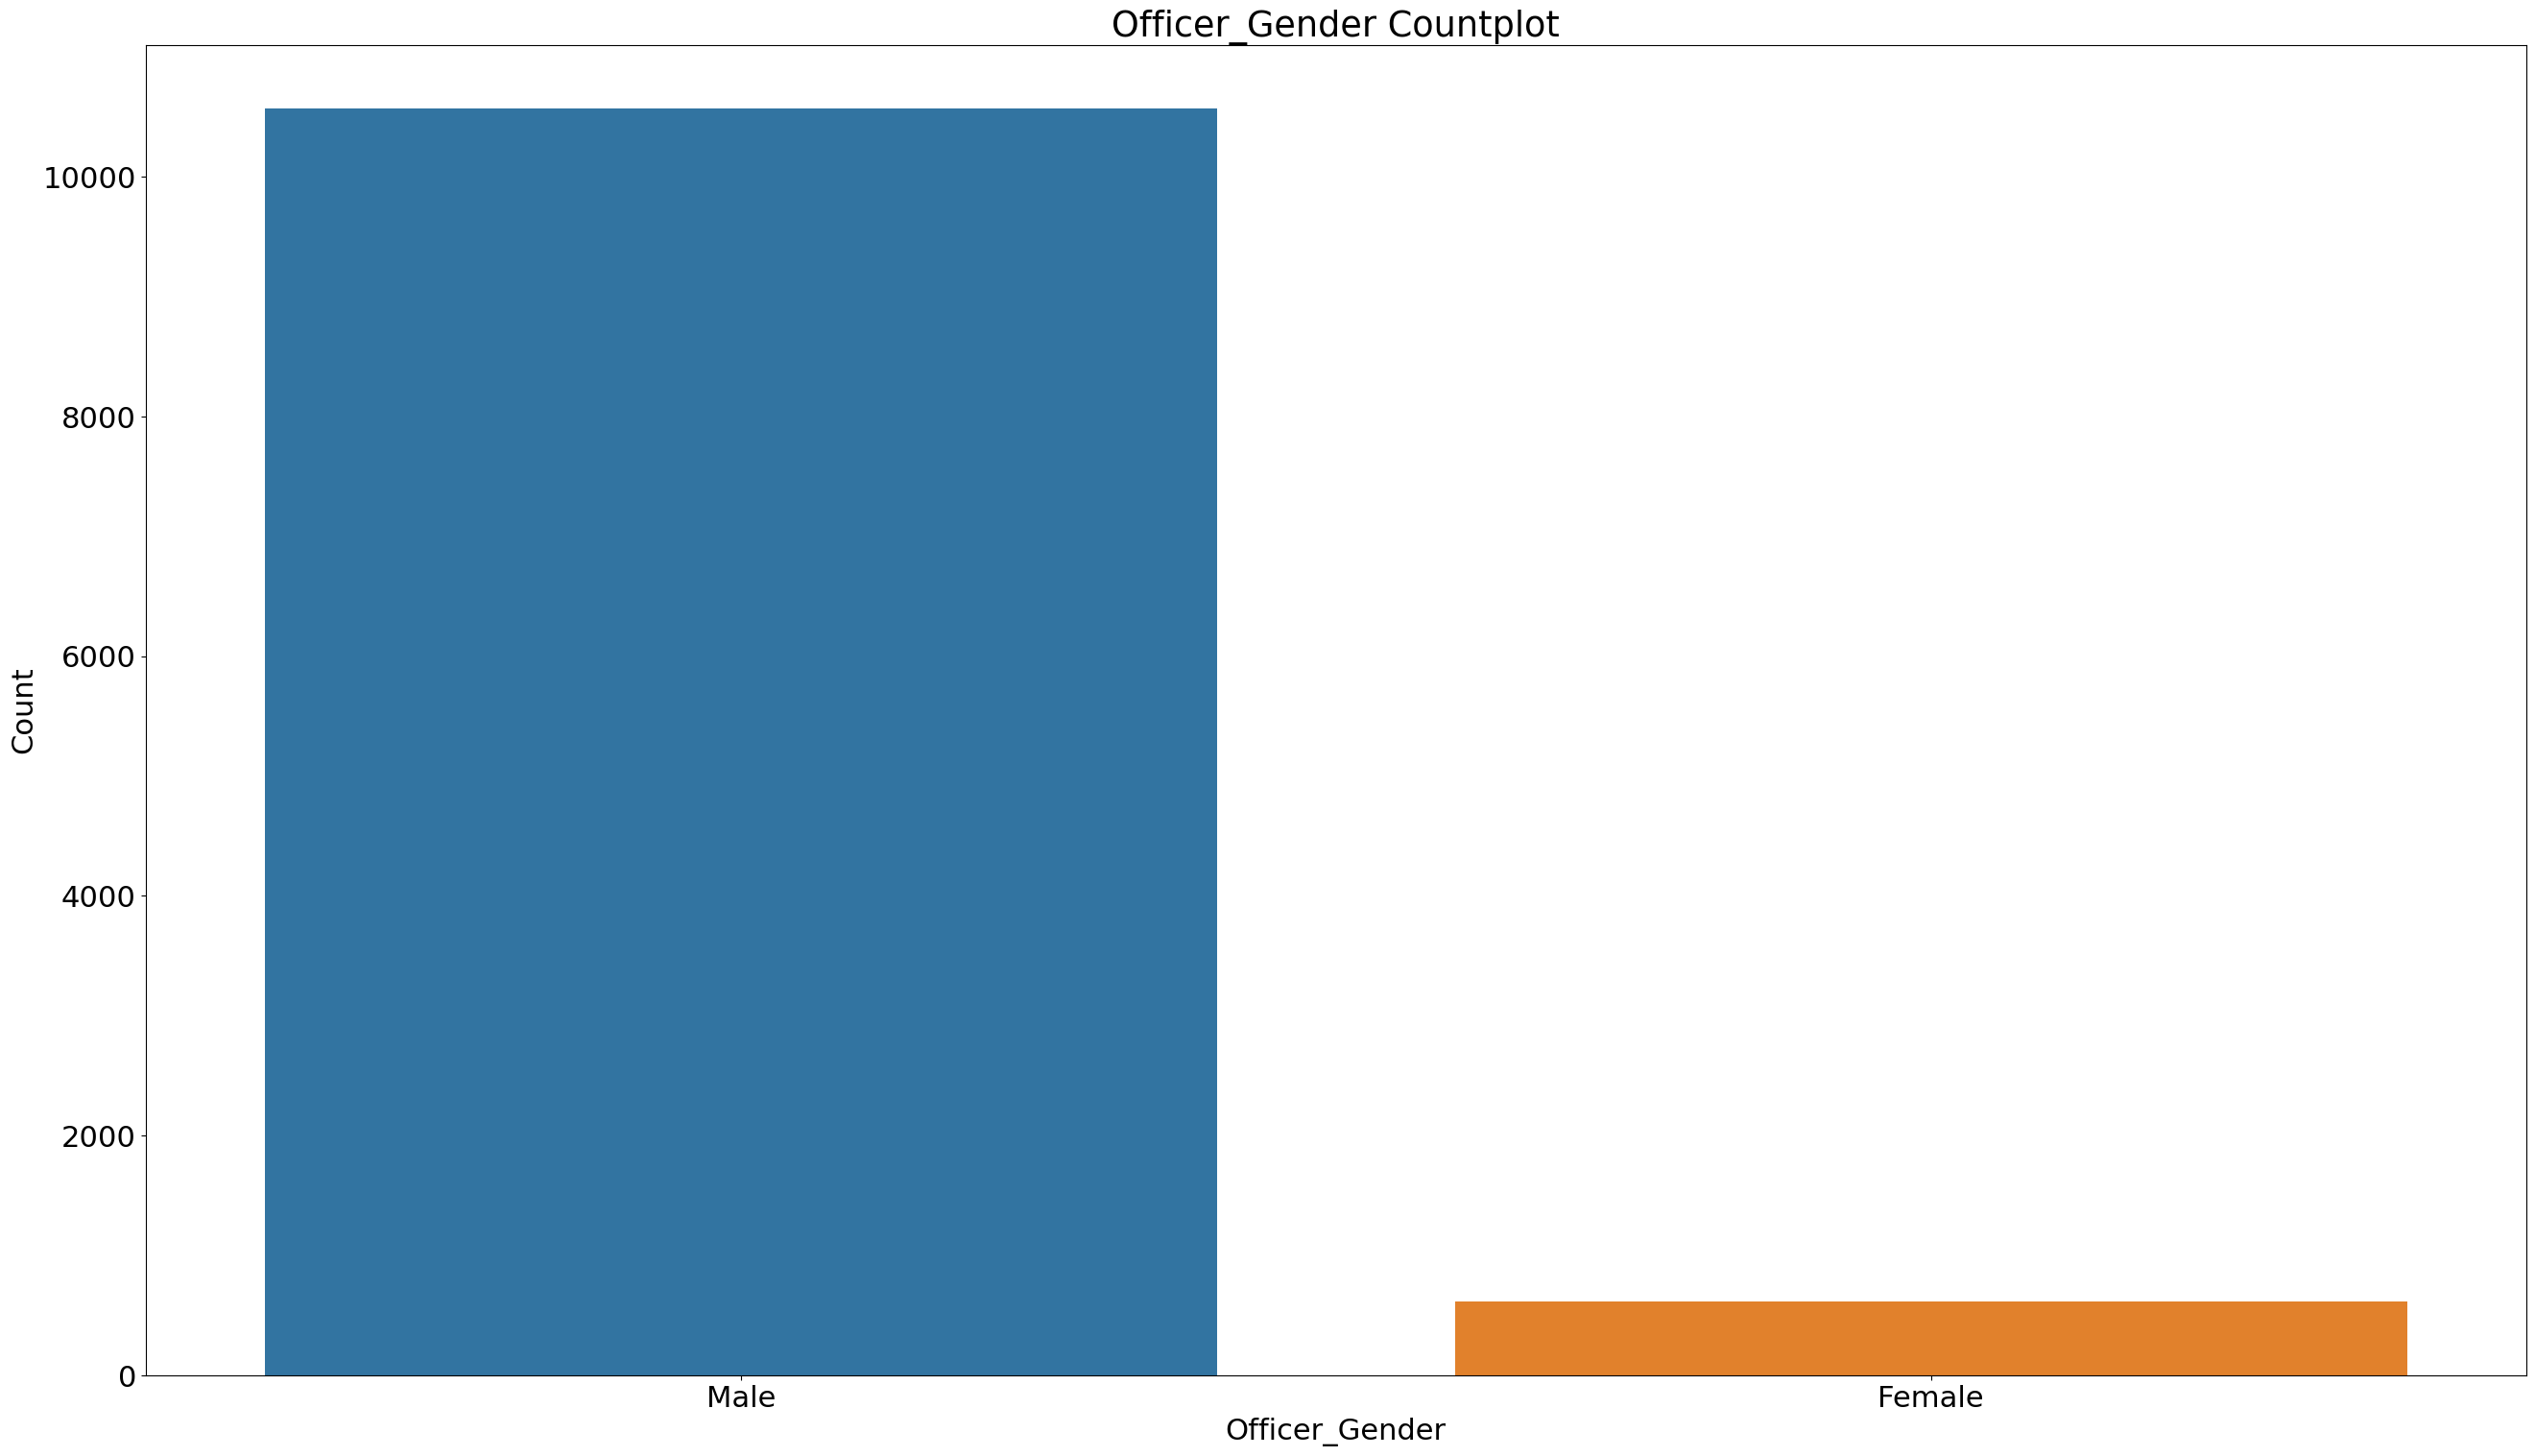

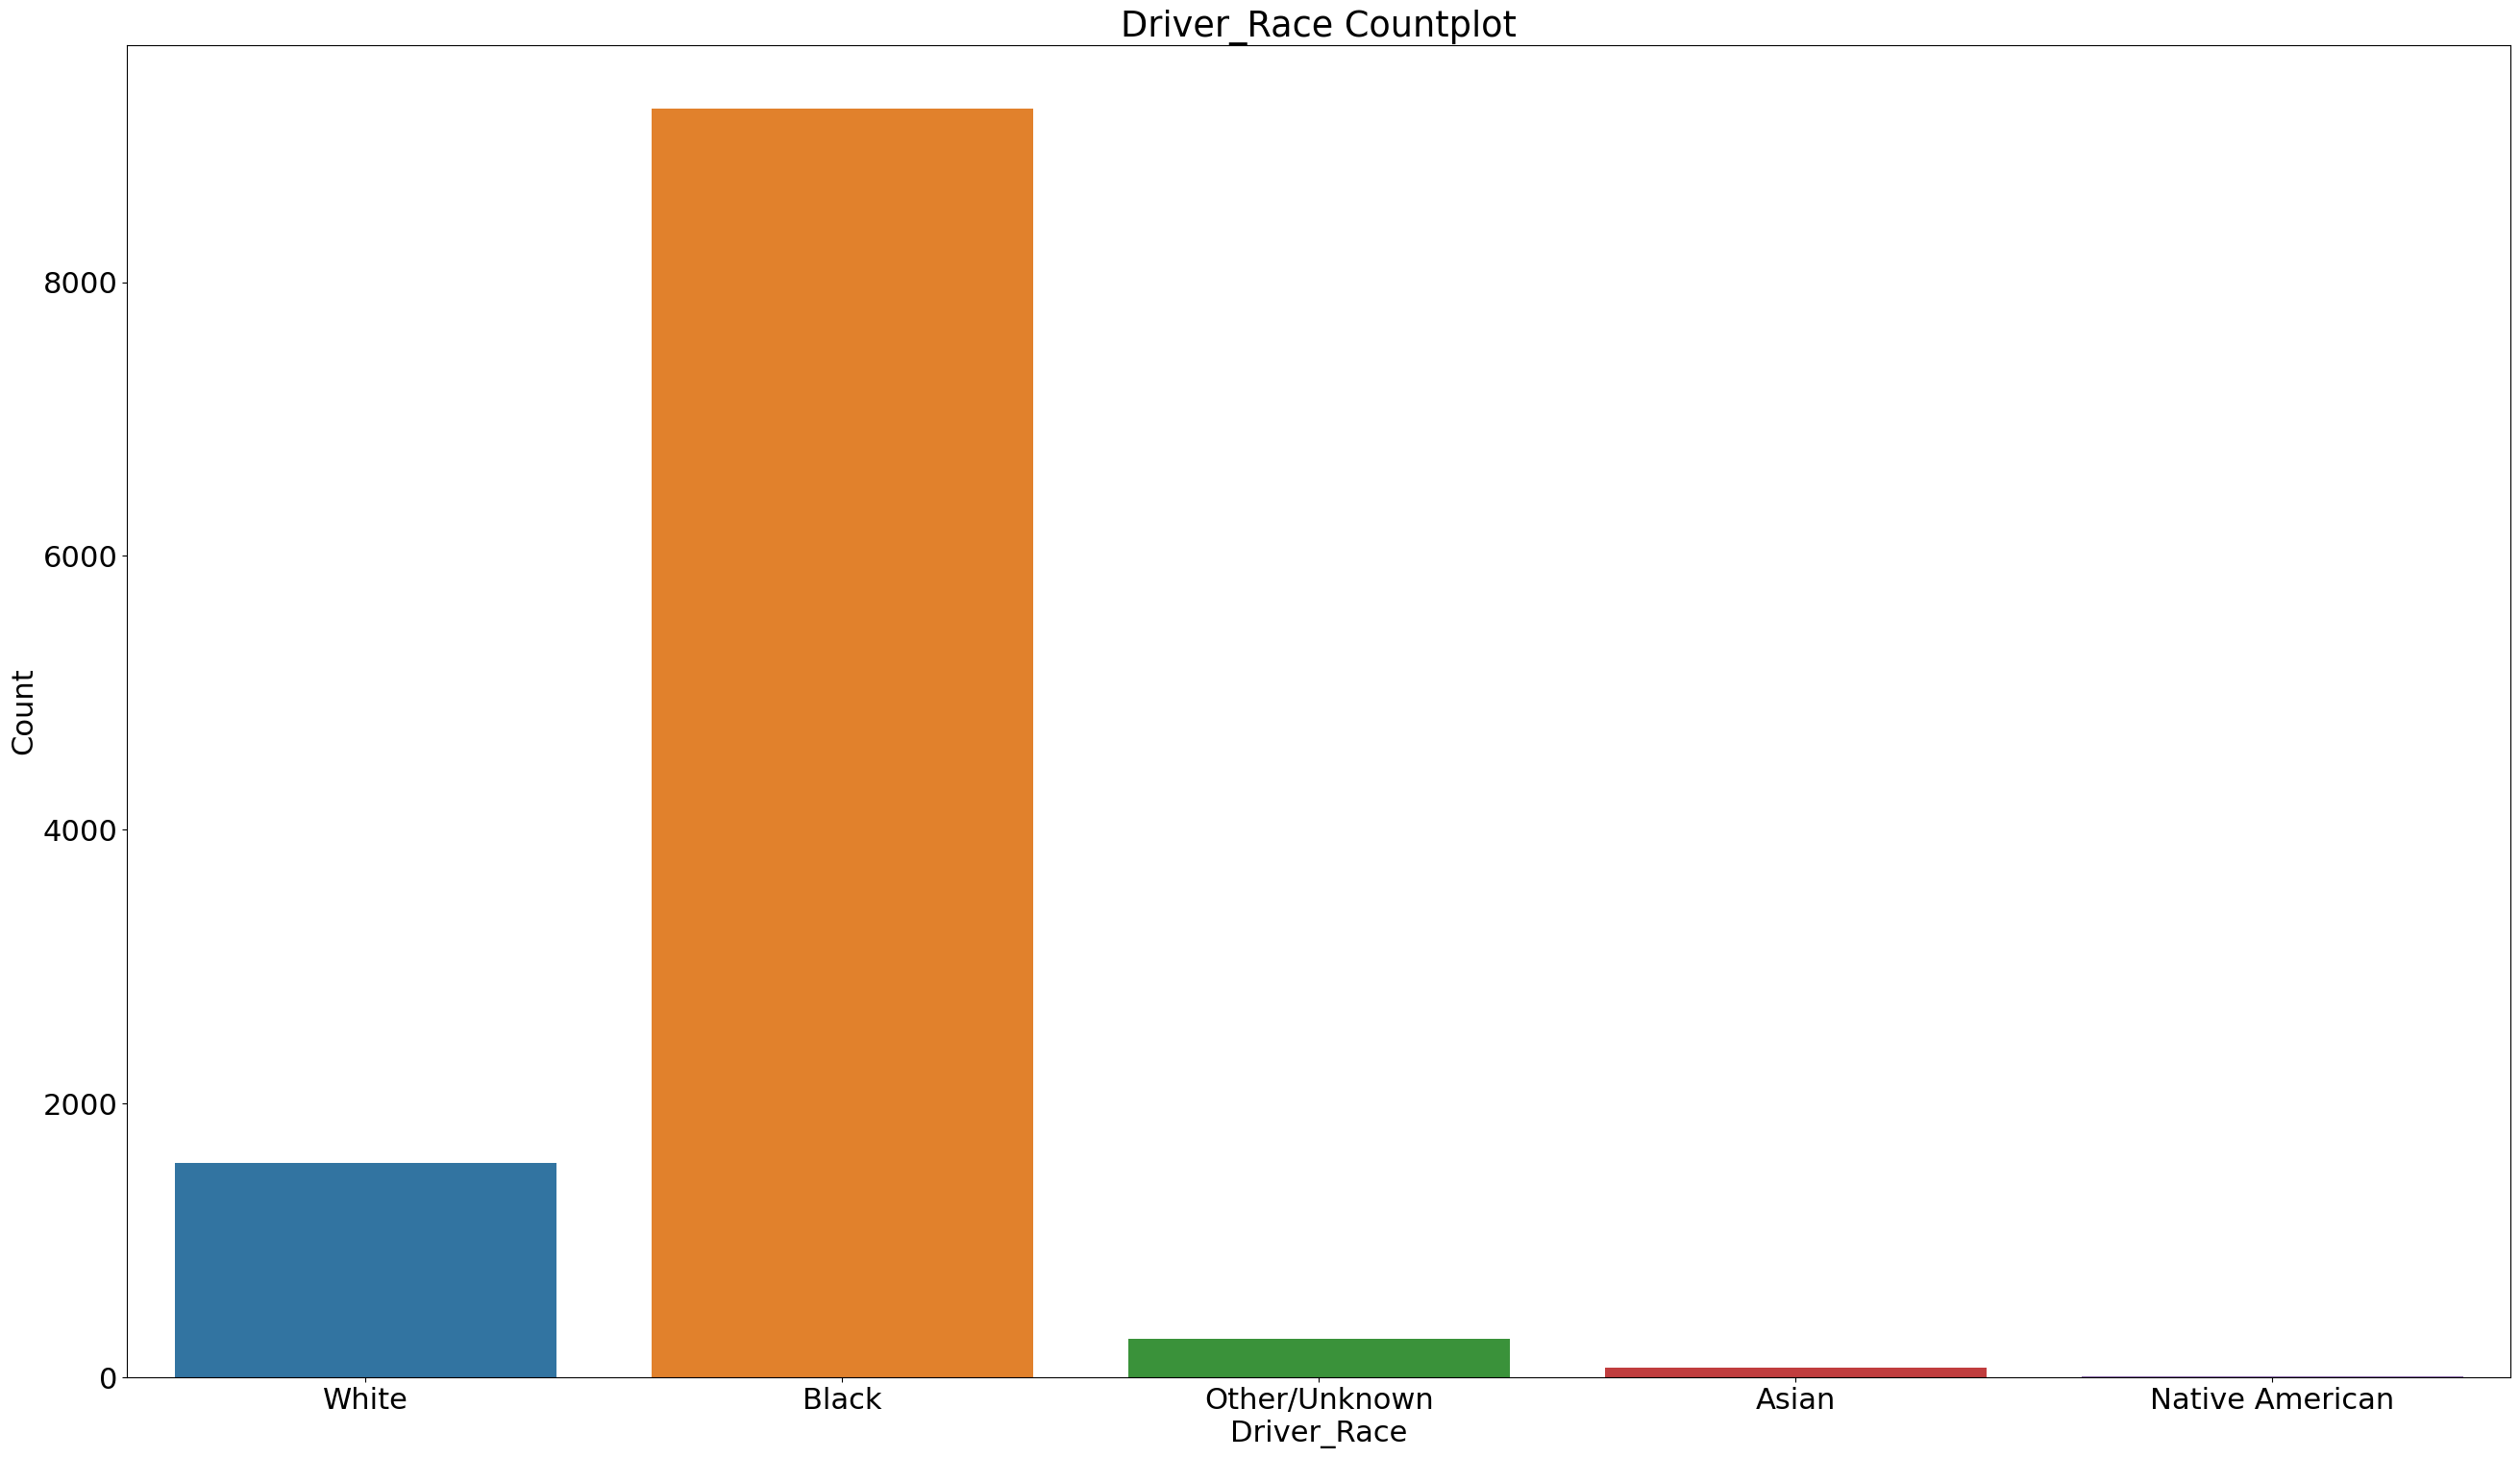

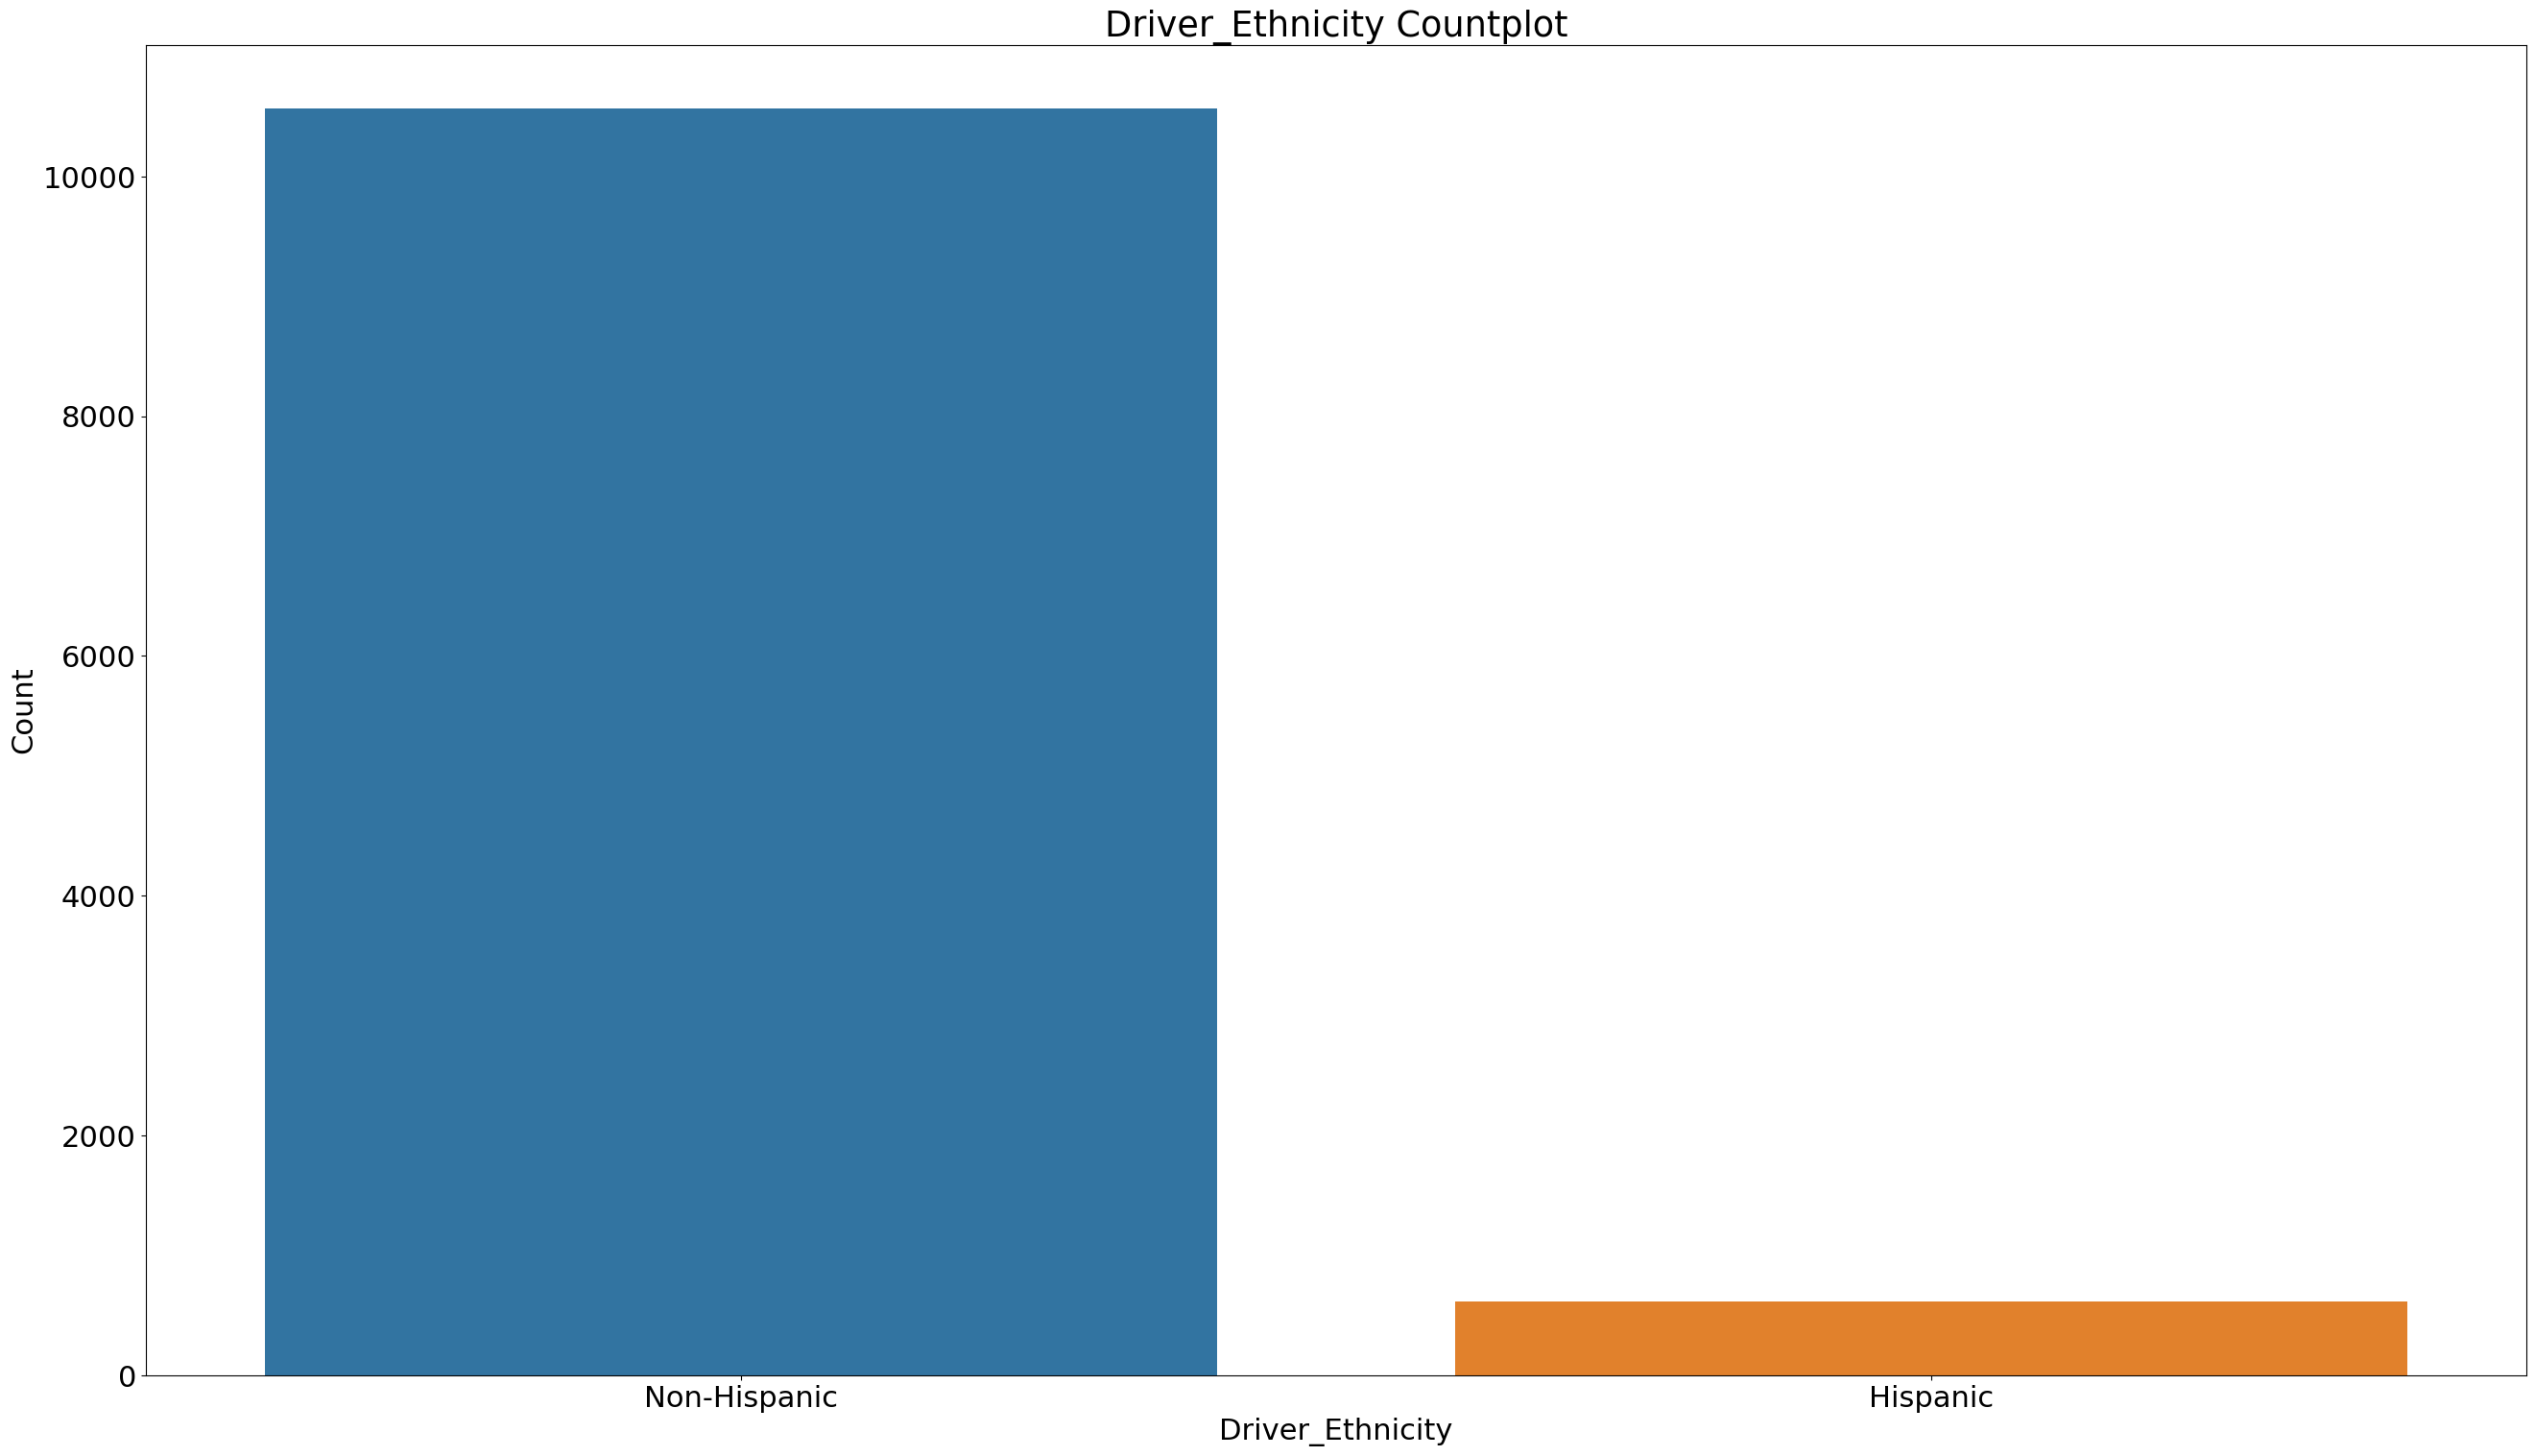

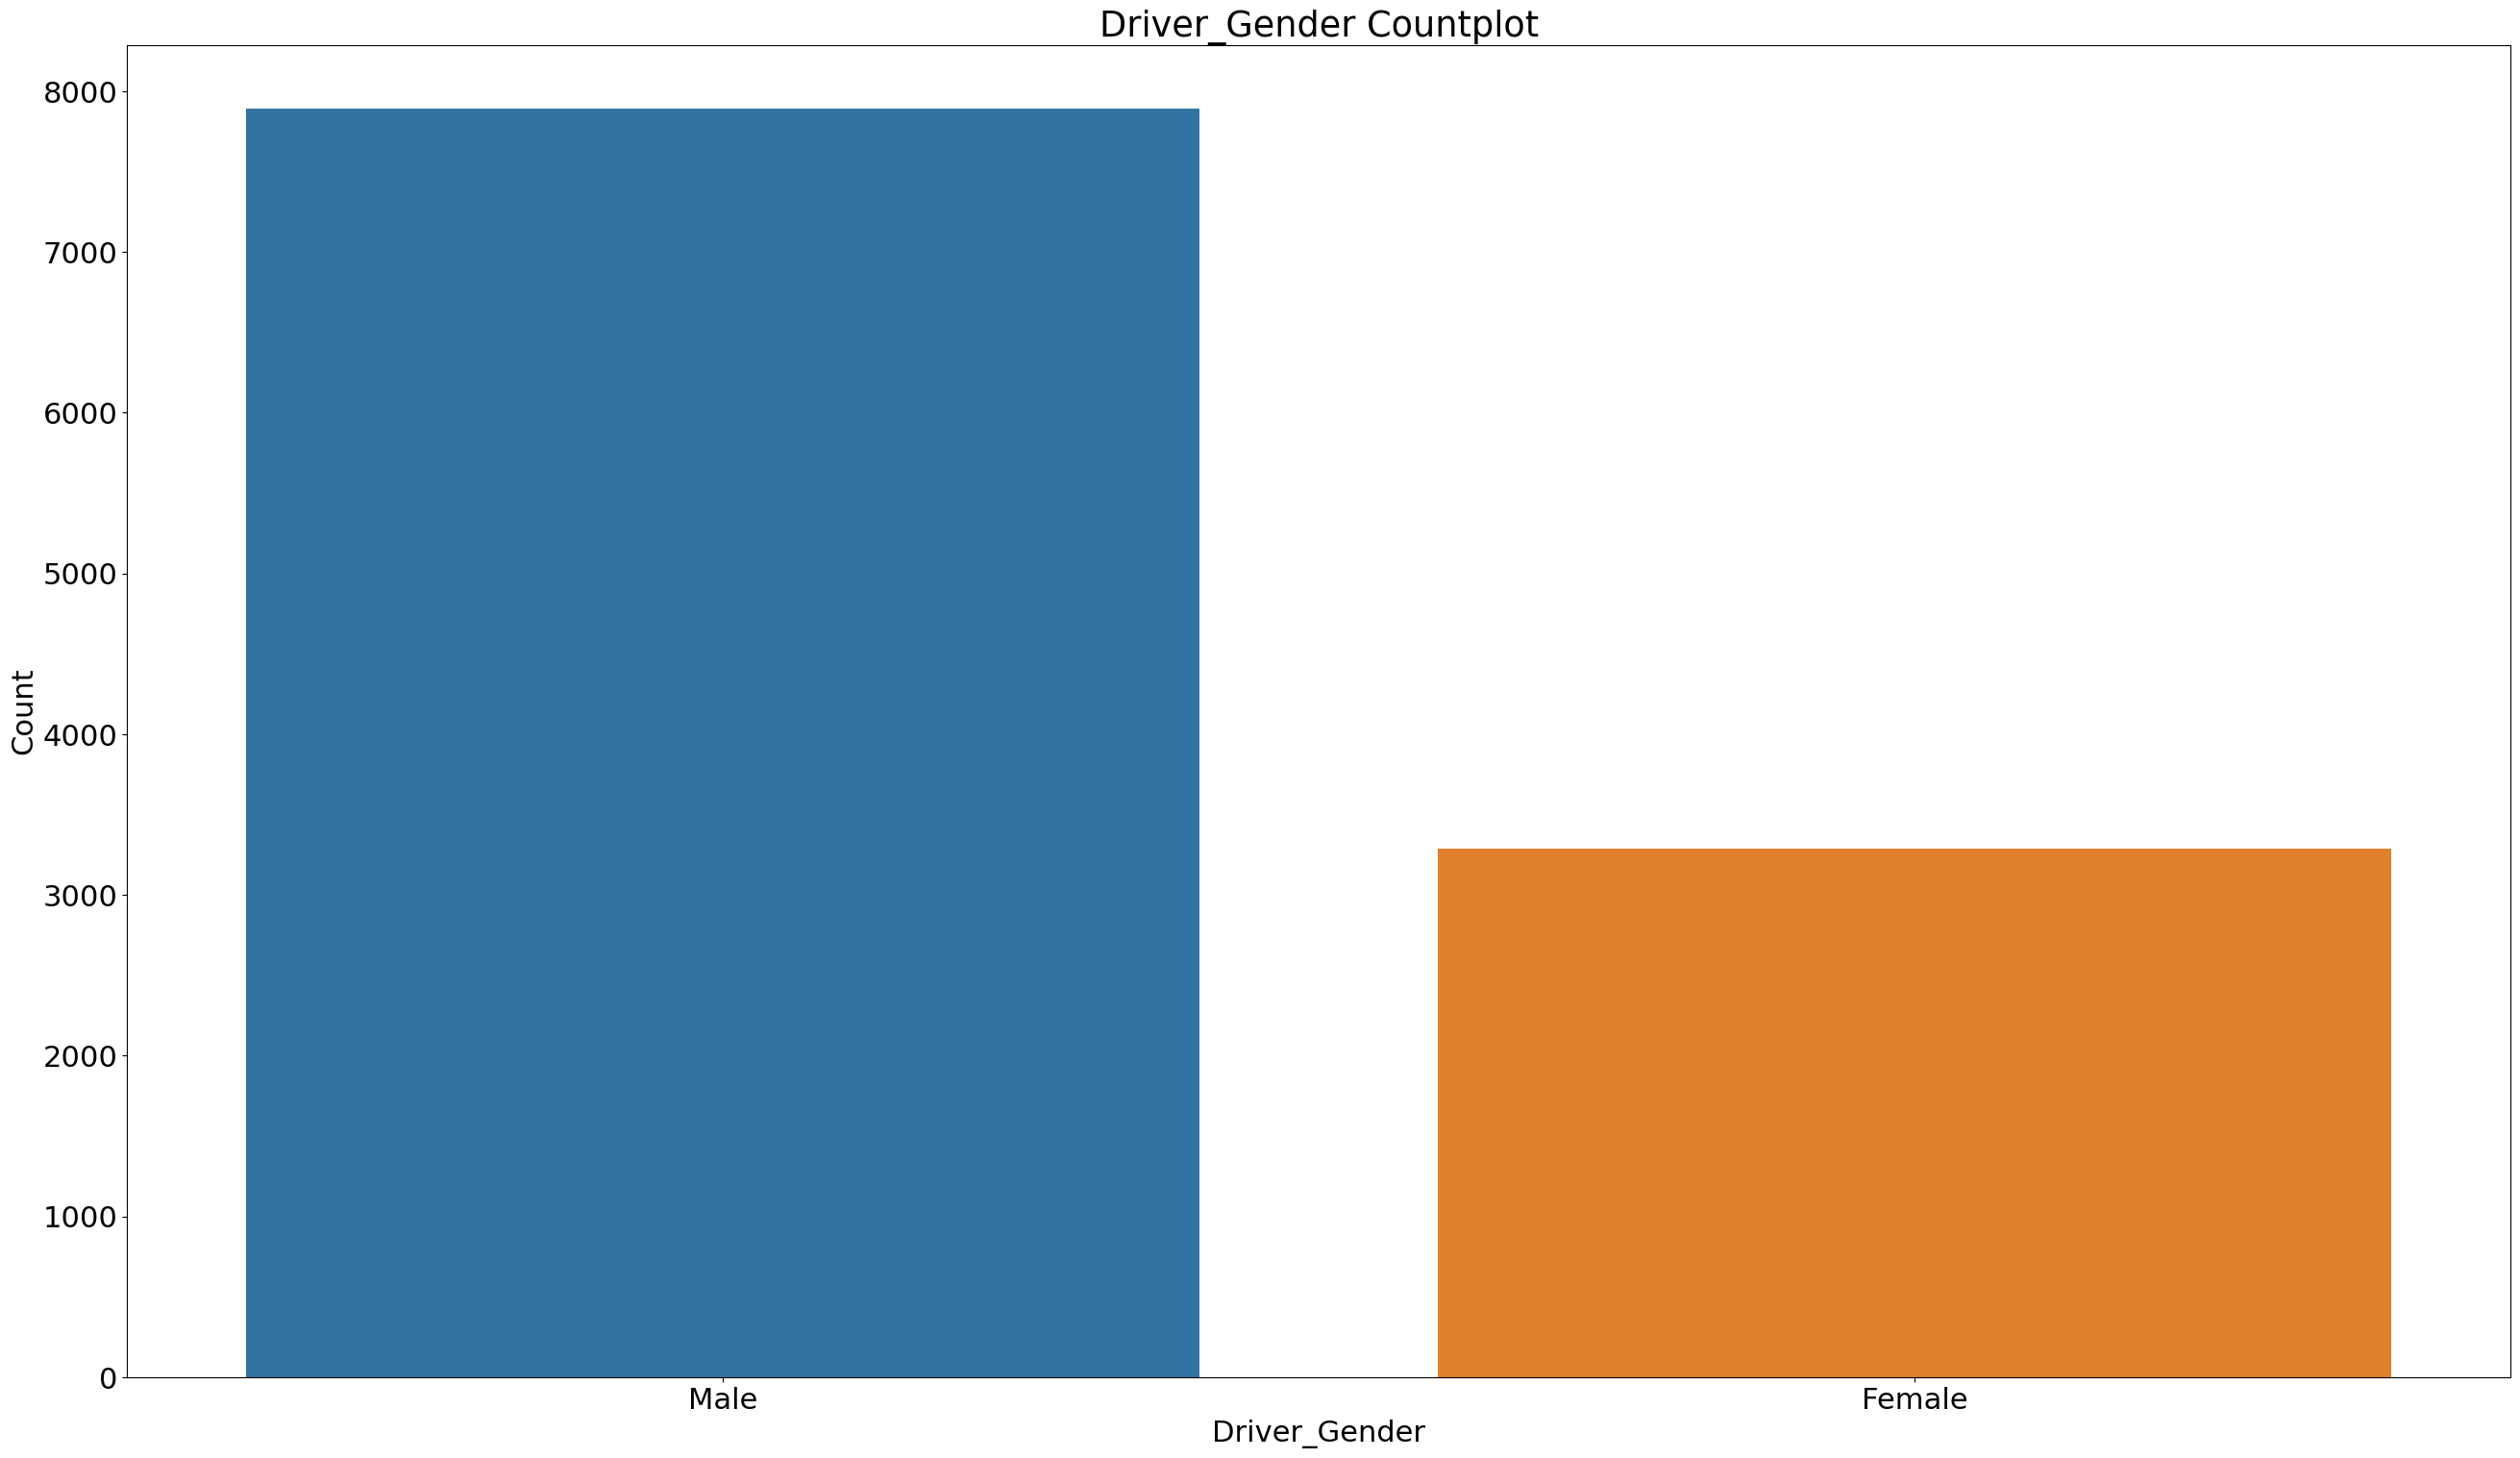

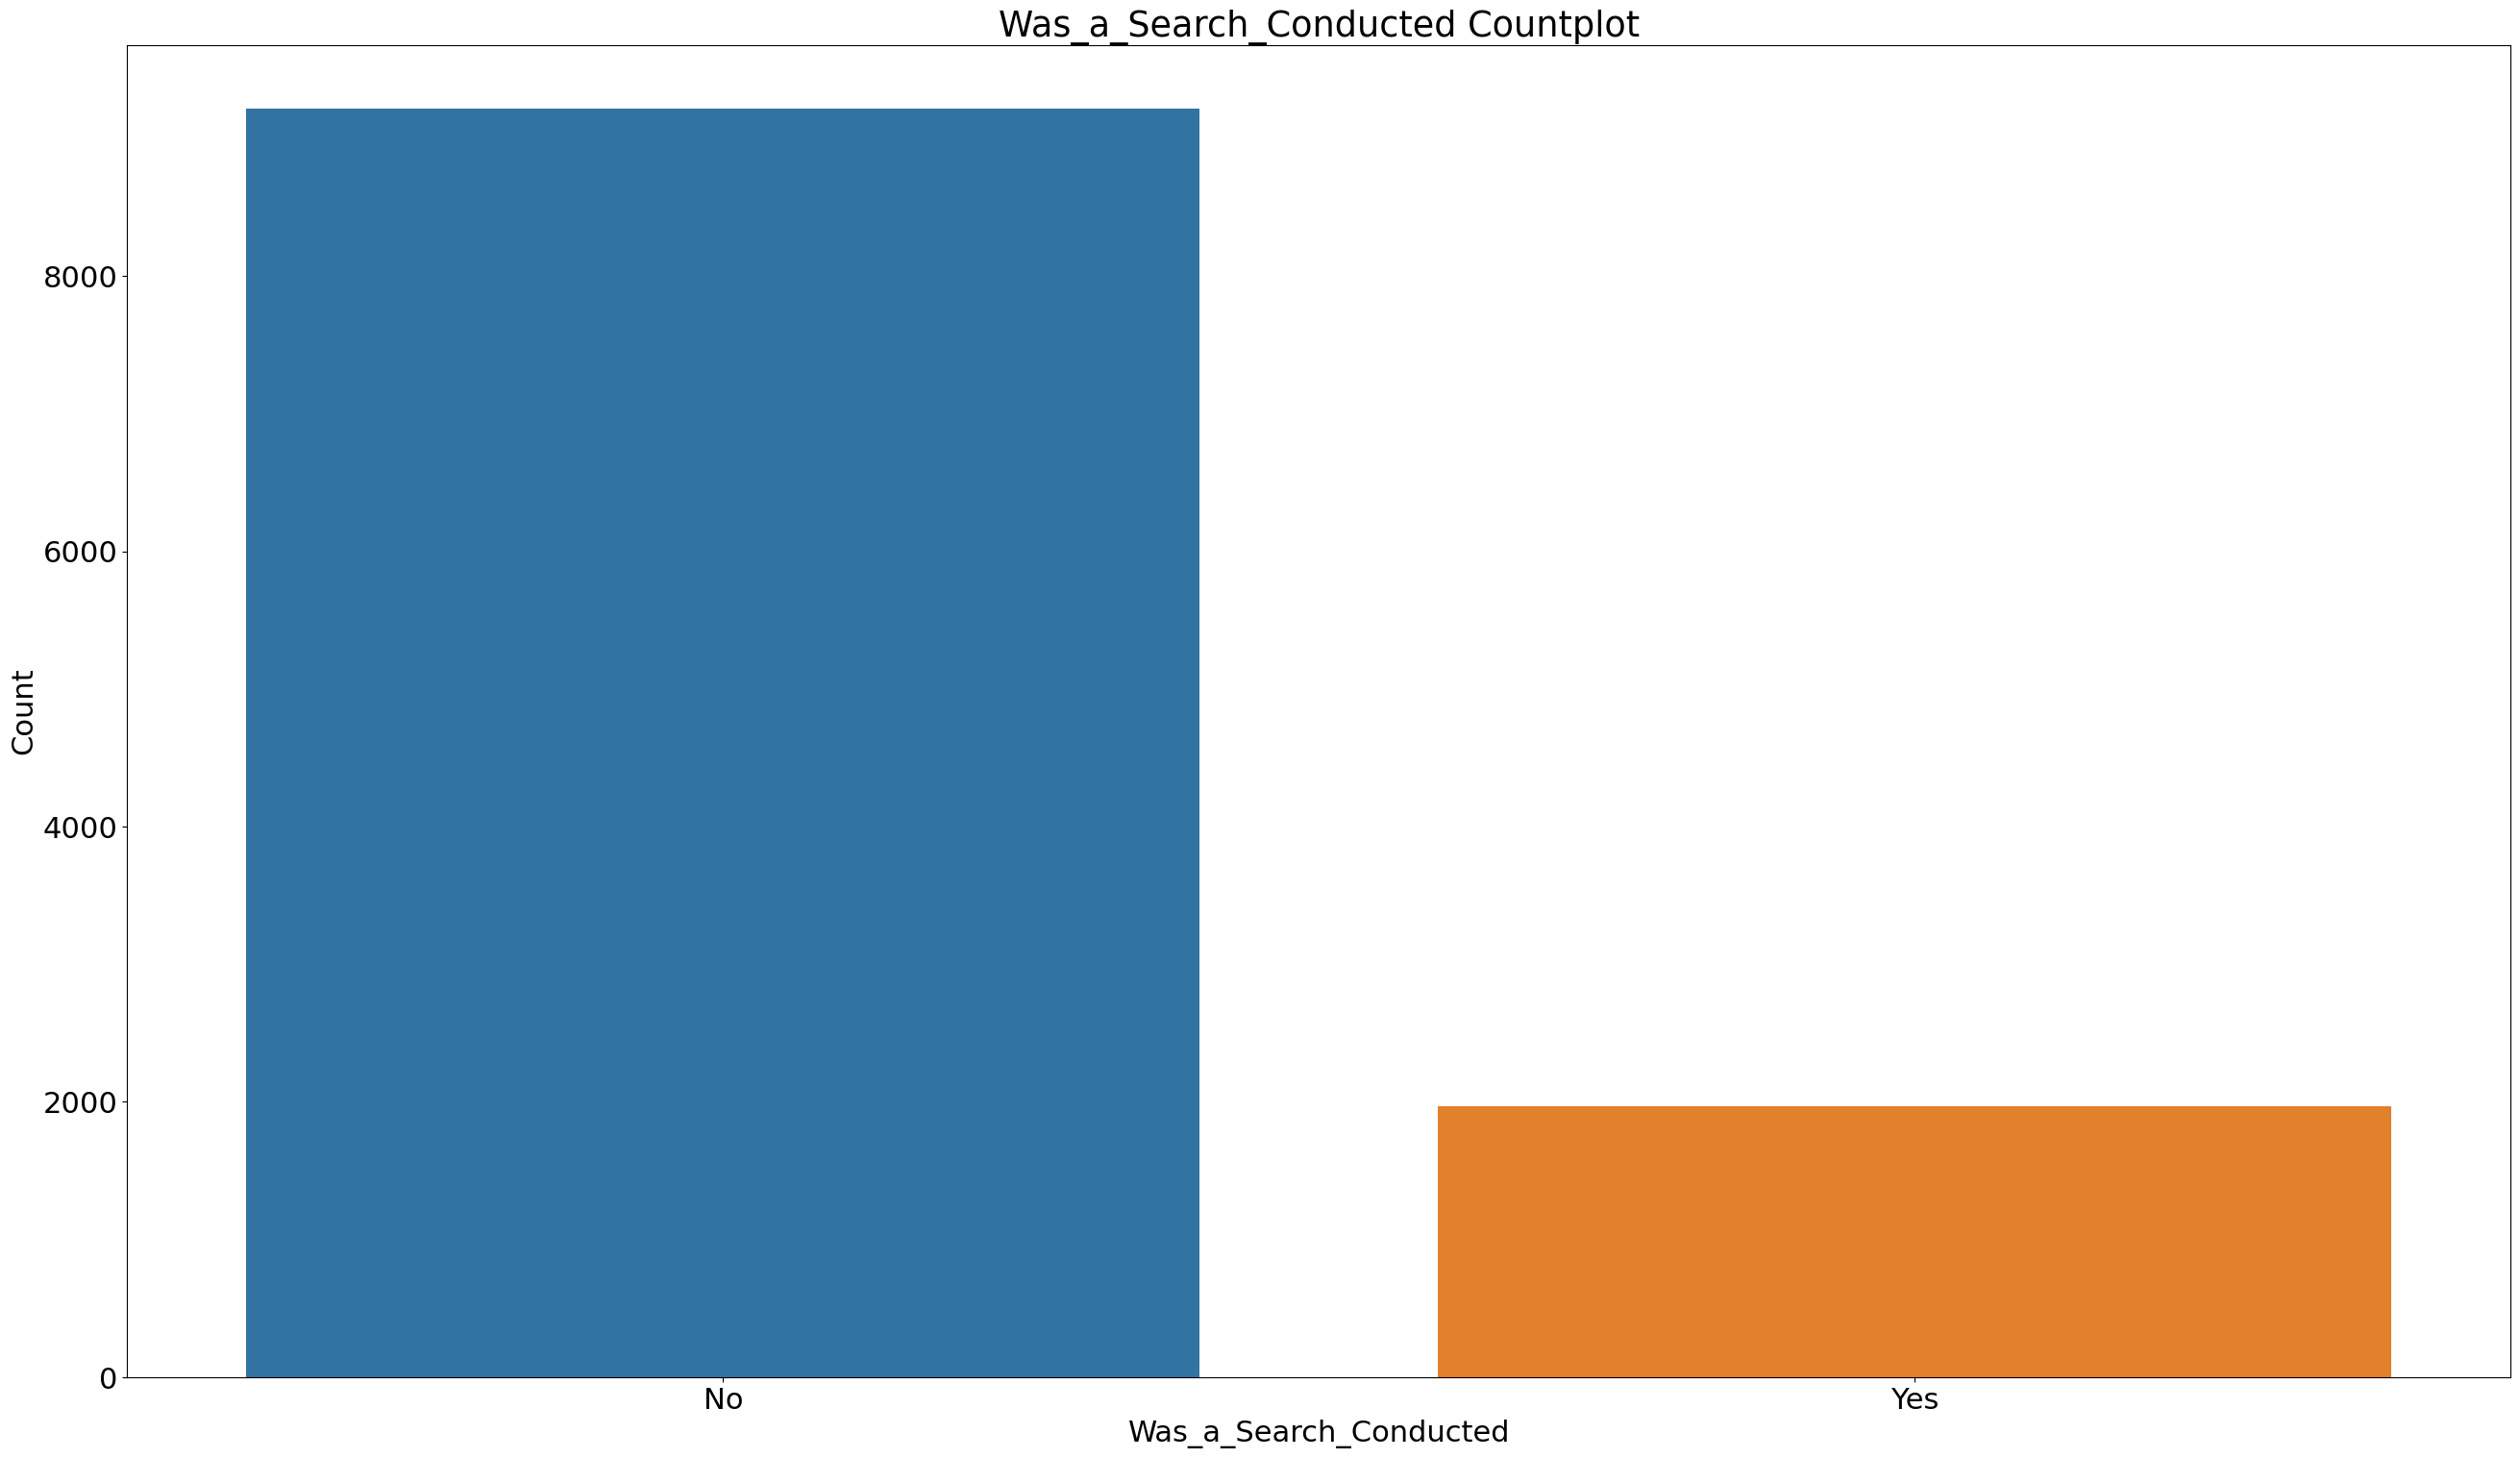

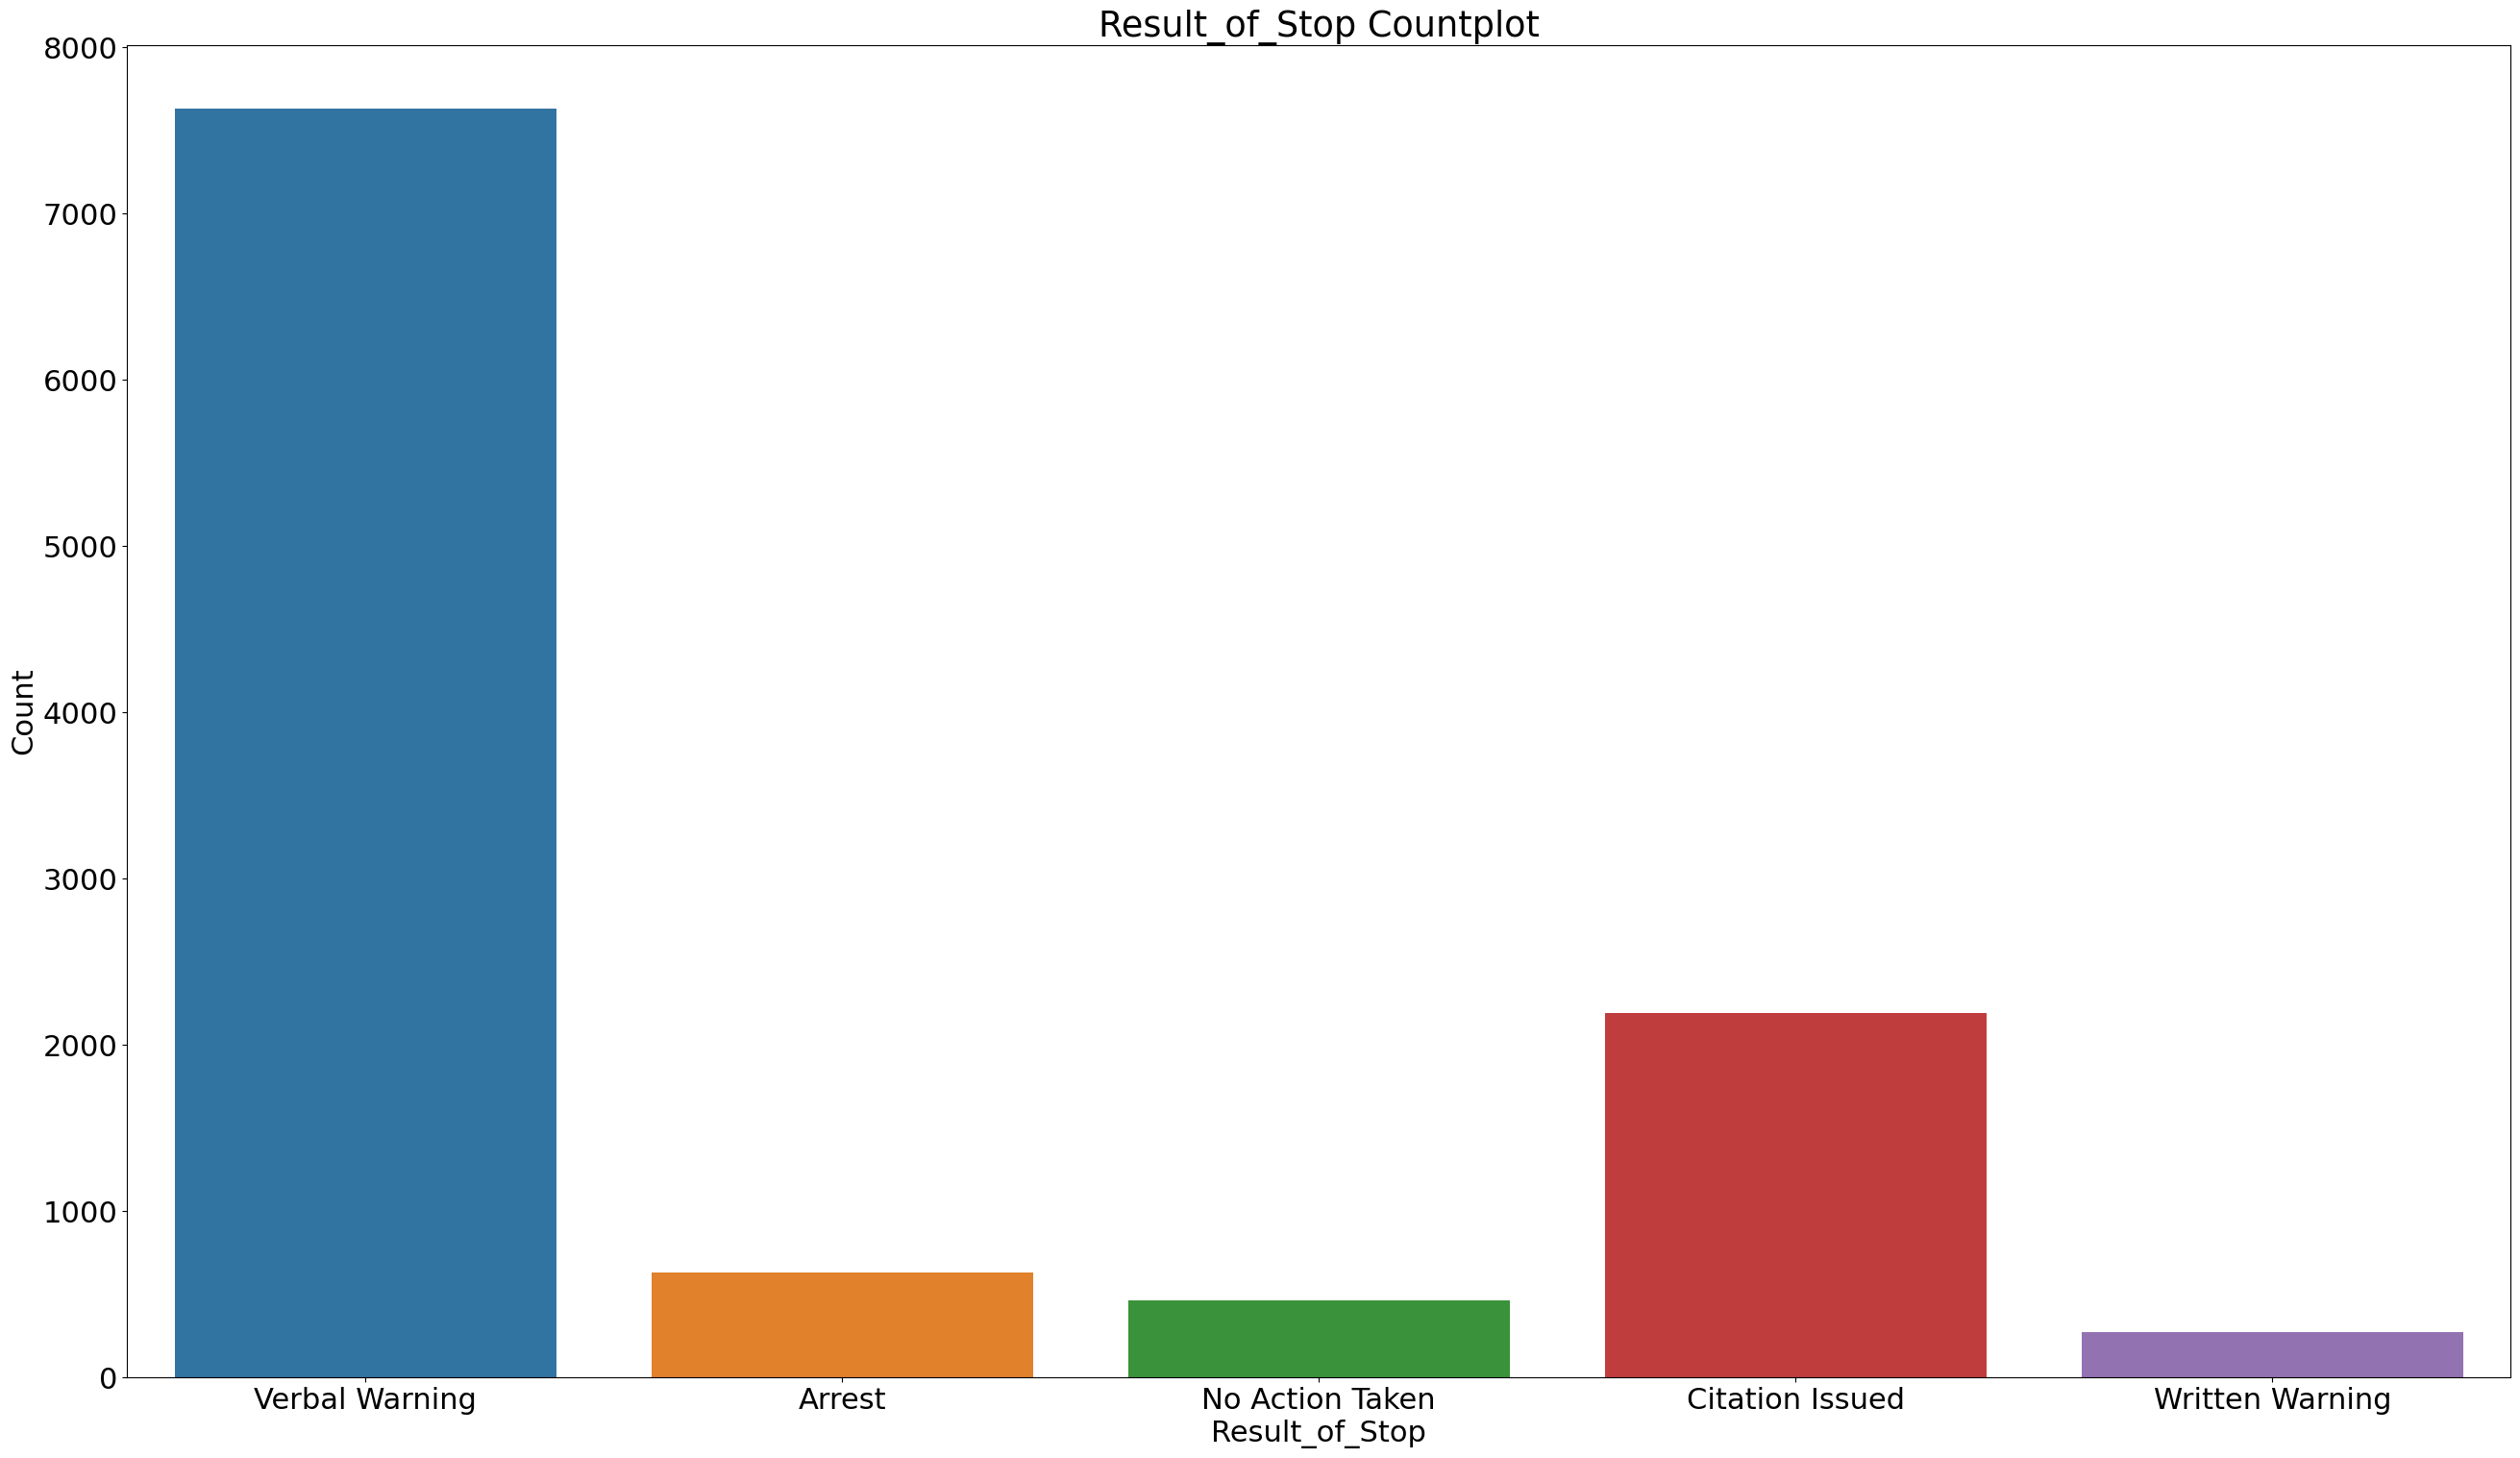

In [21]:
categoricals = Metro.select_dtypes(include=['object']).columns
numerical = Metro.select_dtypes(exclude=['object']).columns
for column in categoricals:
    plt.figure(figsize=(32,18))
    sns.countplot(x=Metro[column])
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.title(f'{column} Countplot')
    plt.show()

Now let's compare with the hue

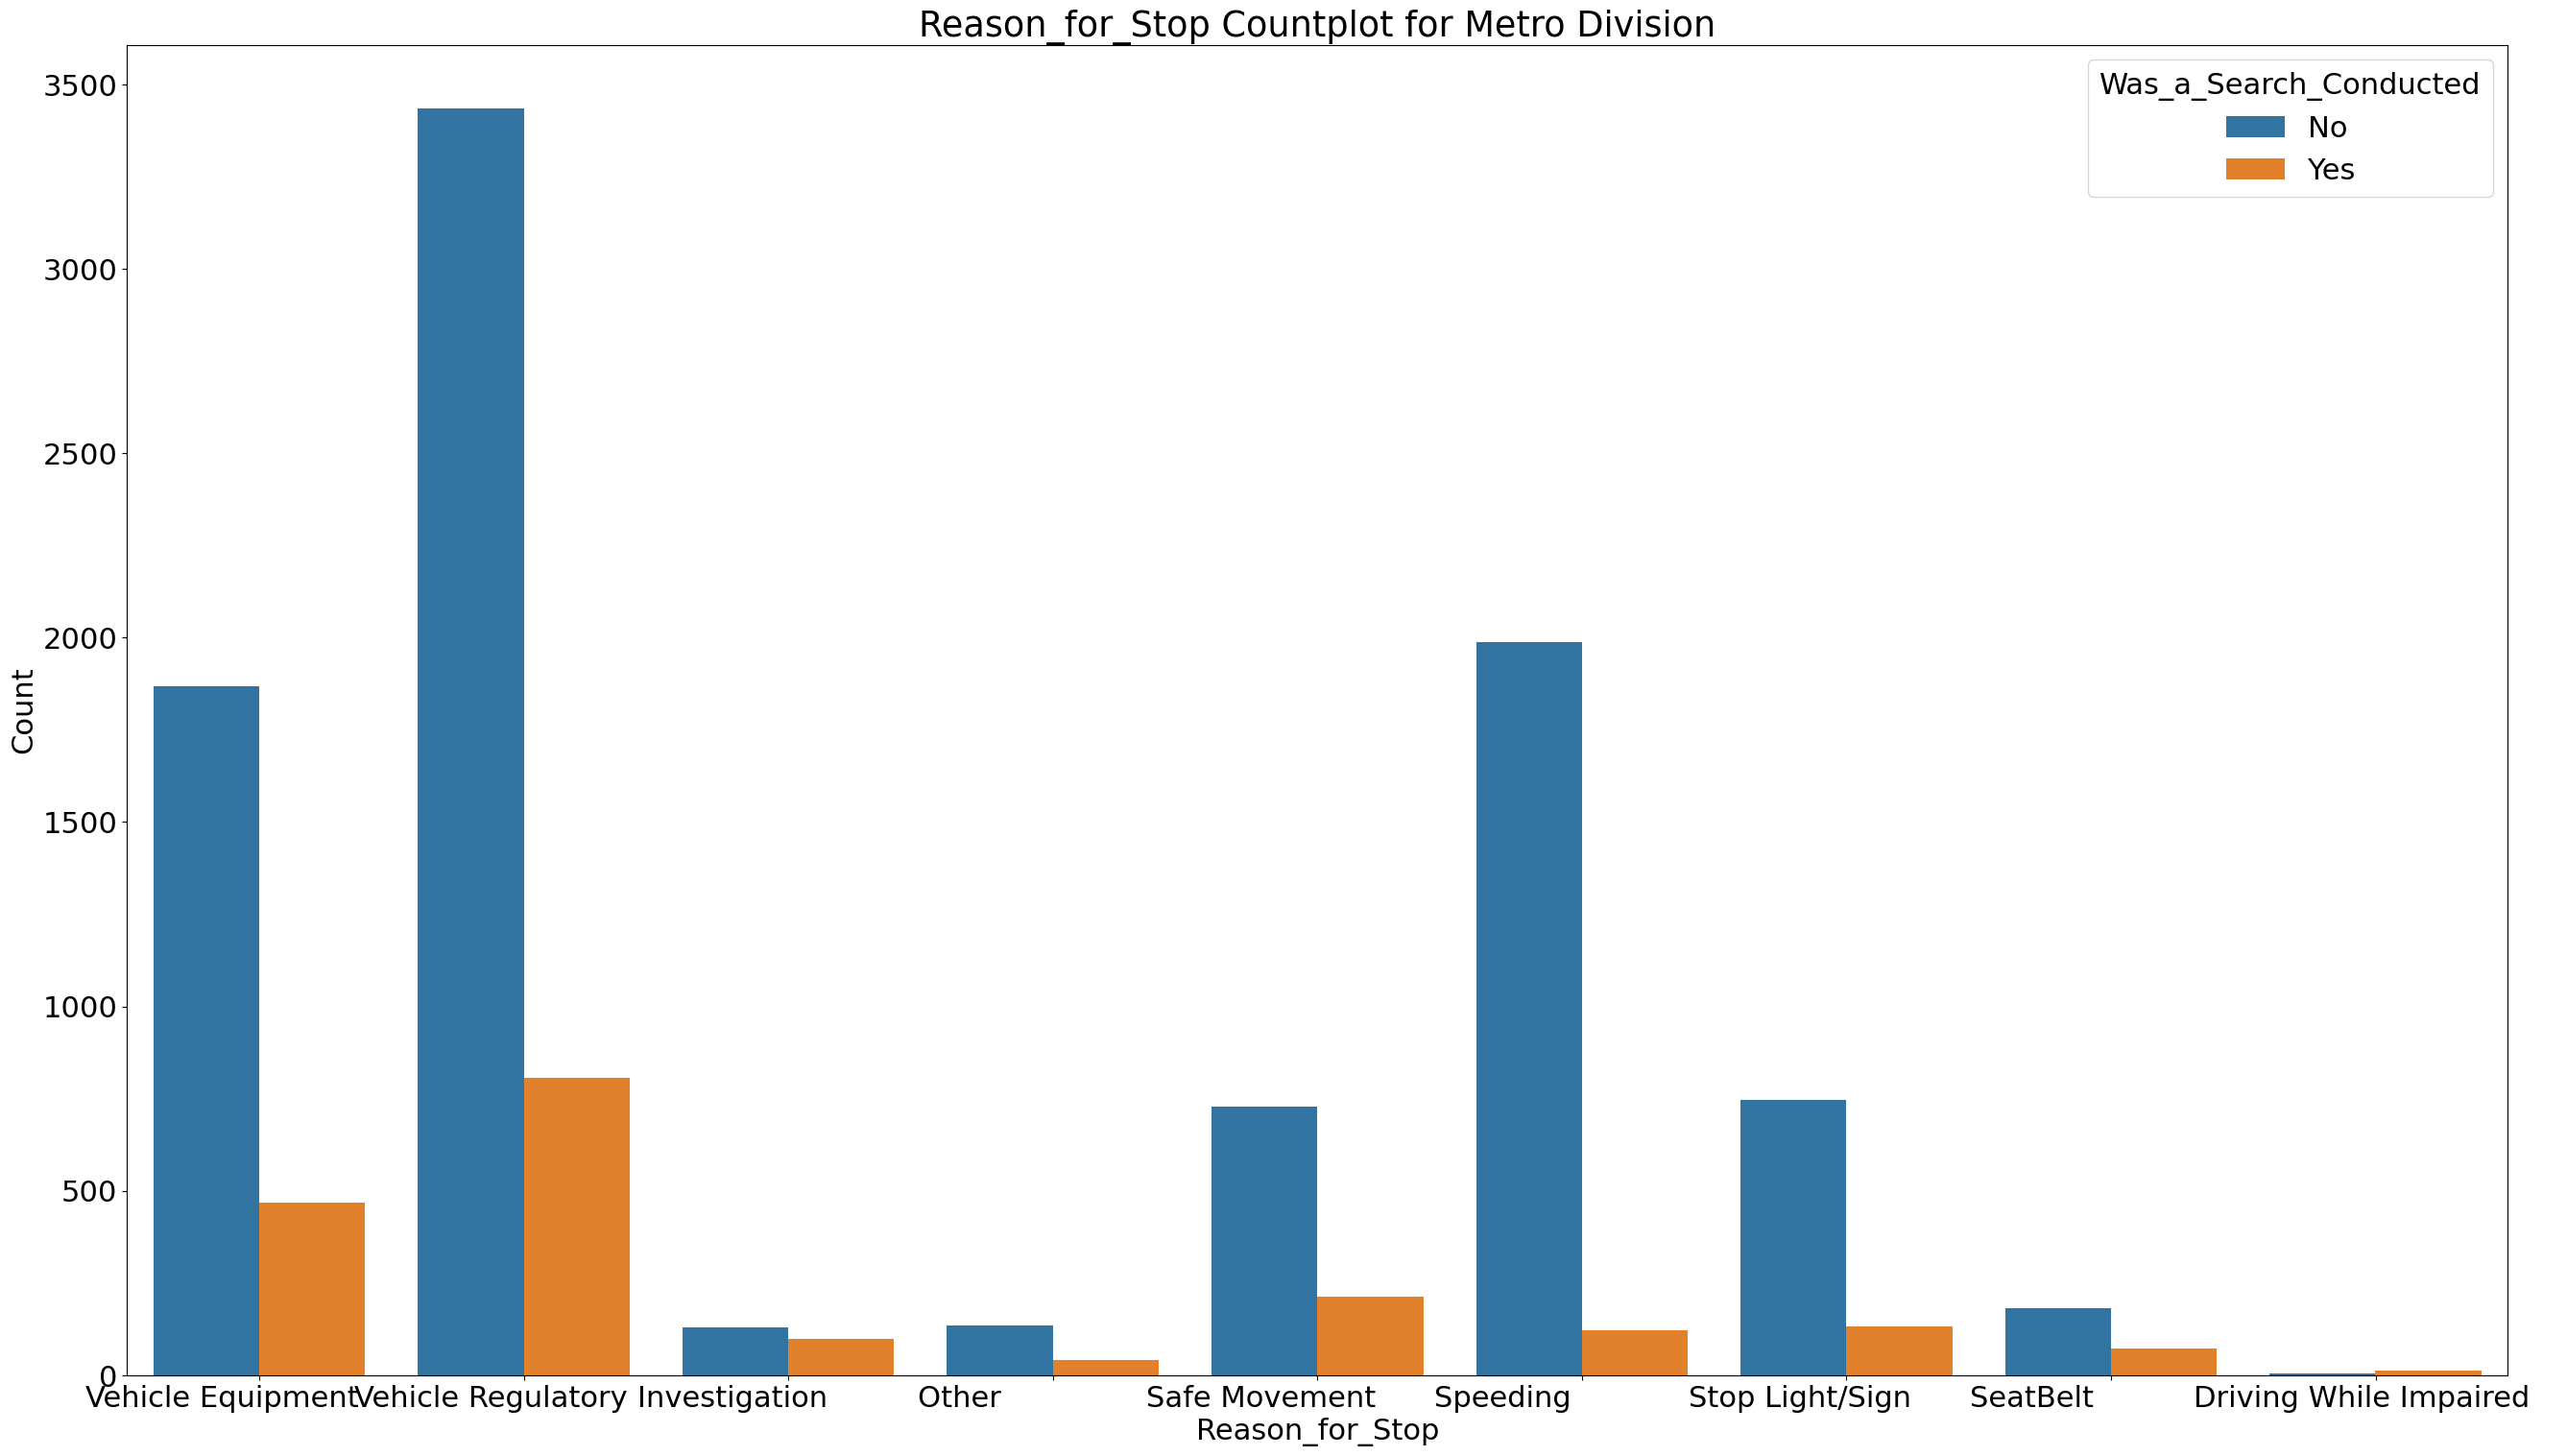

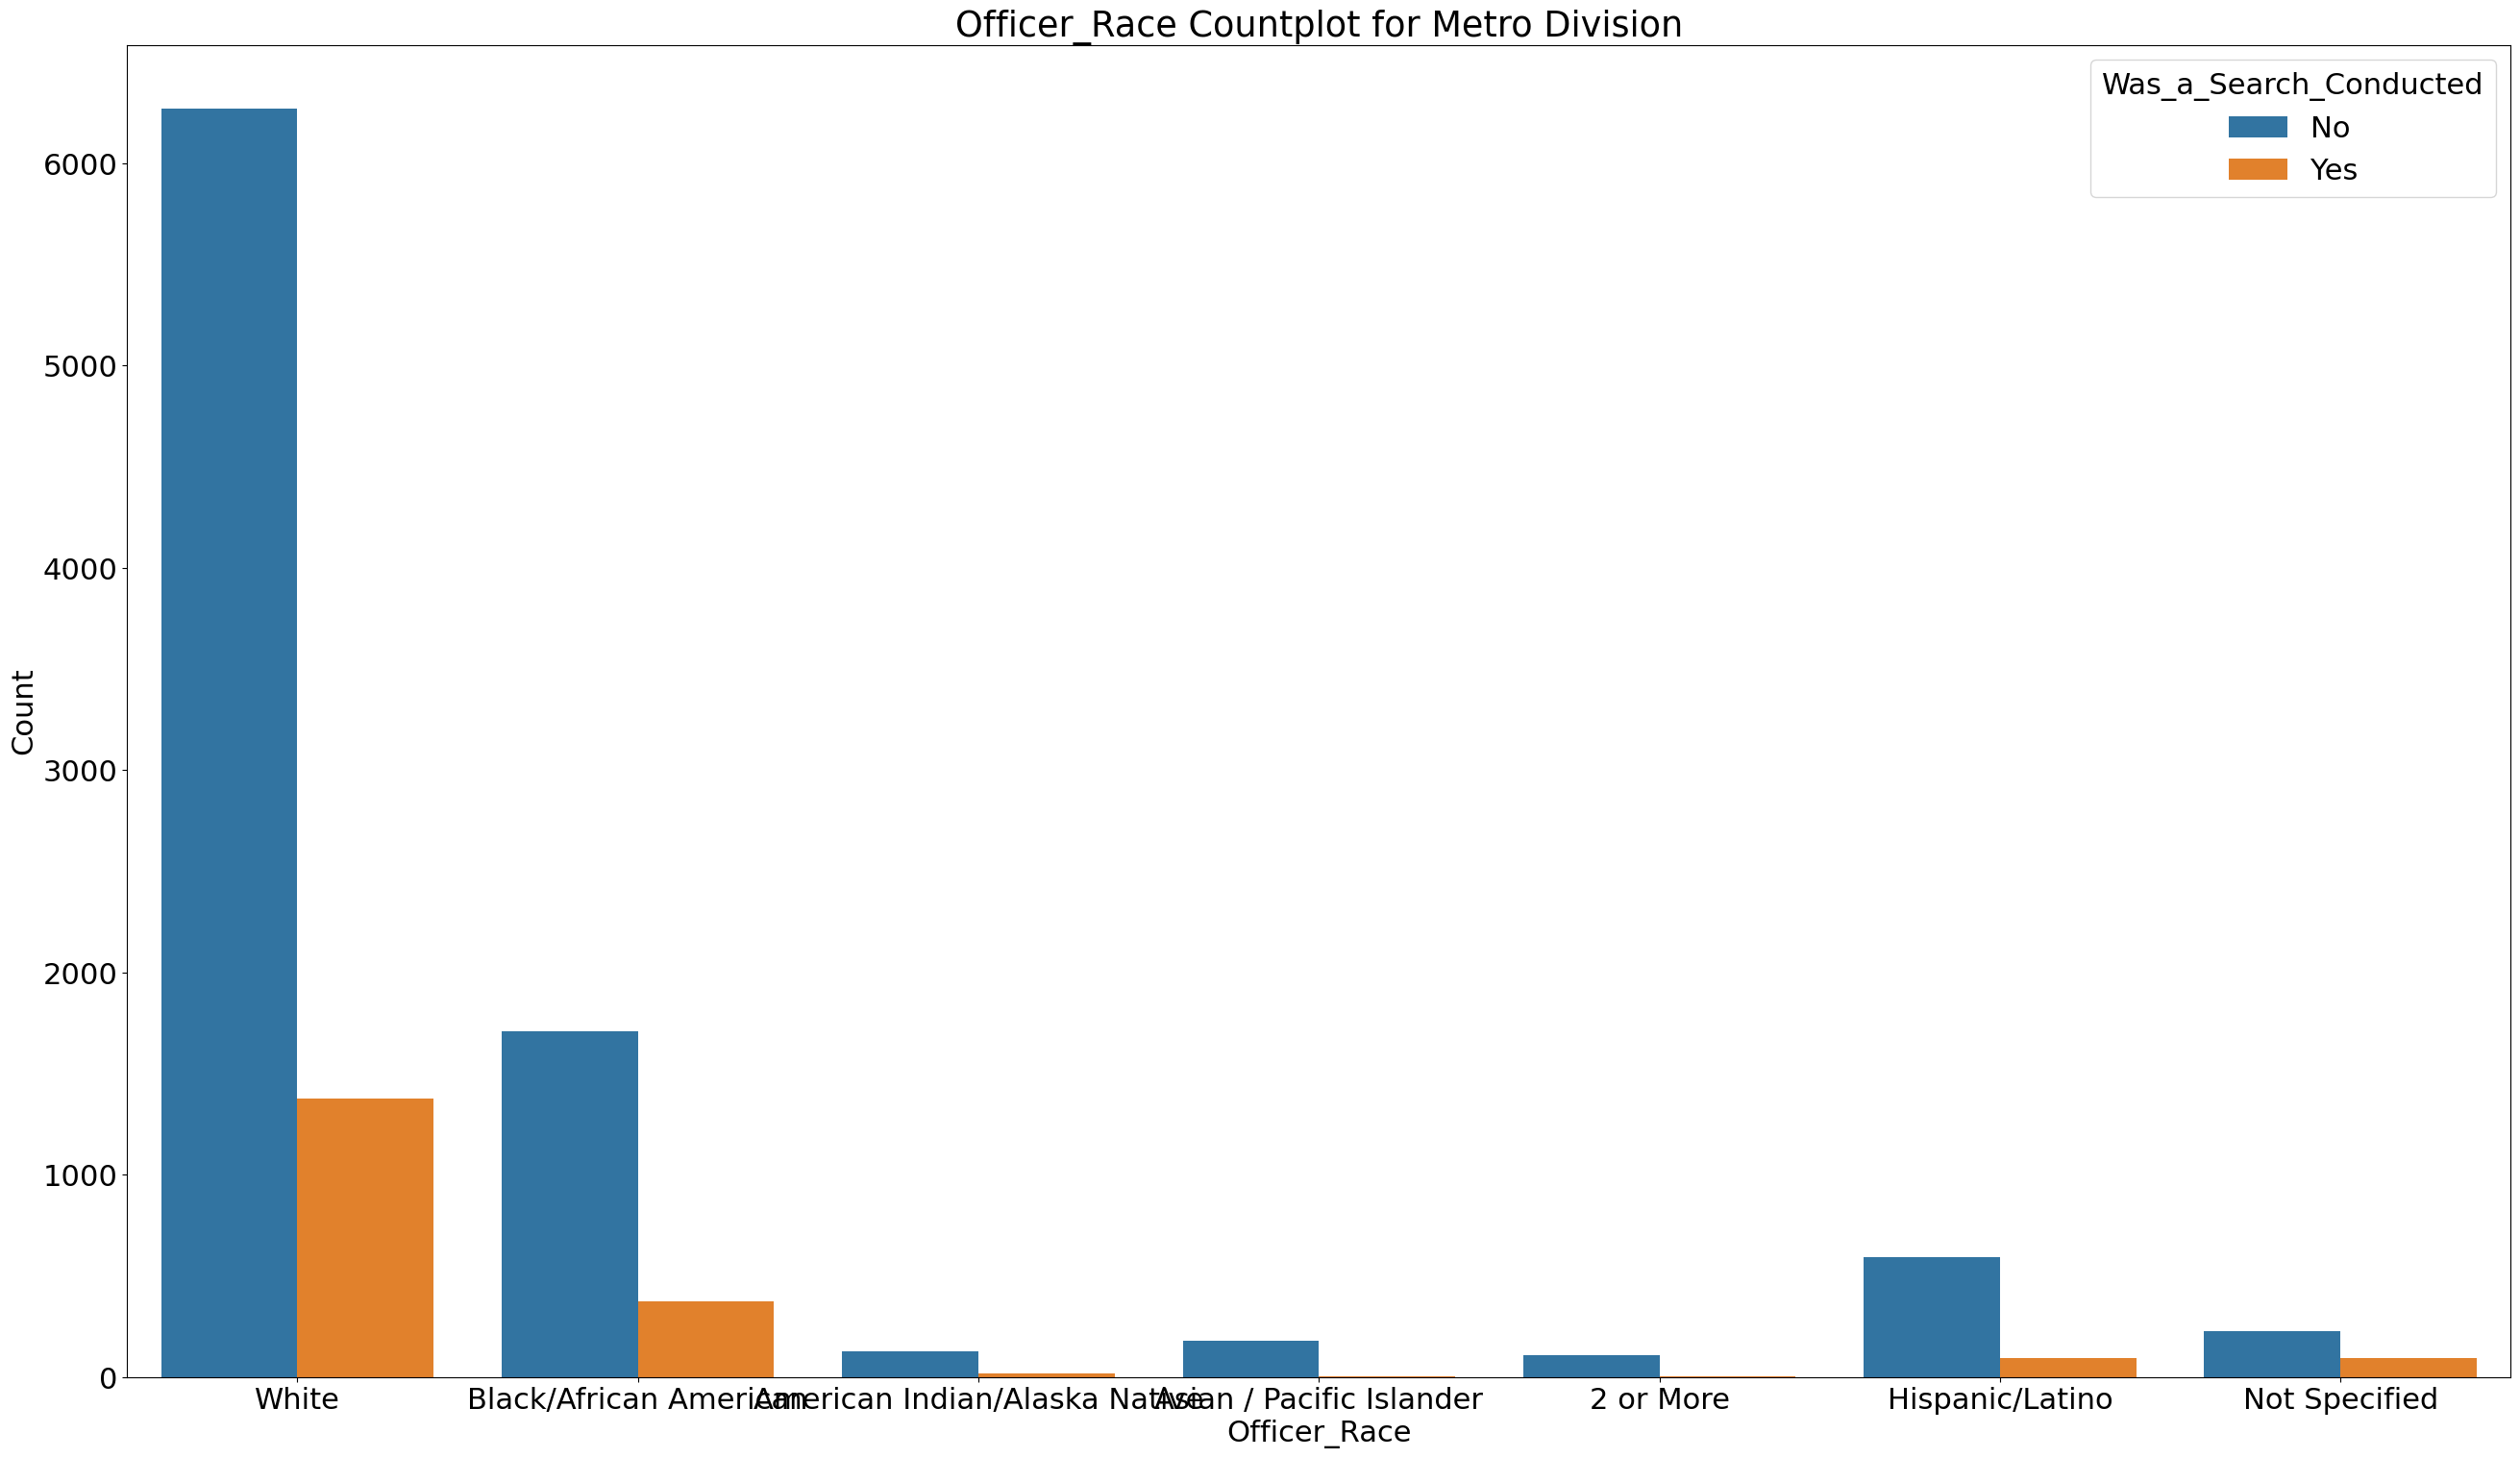

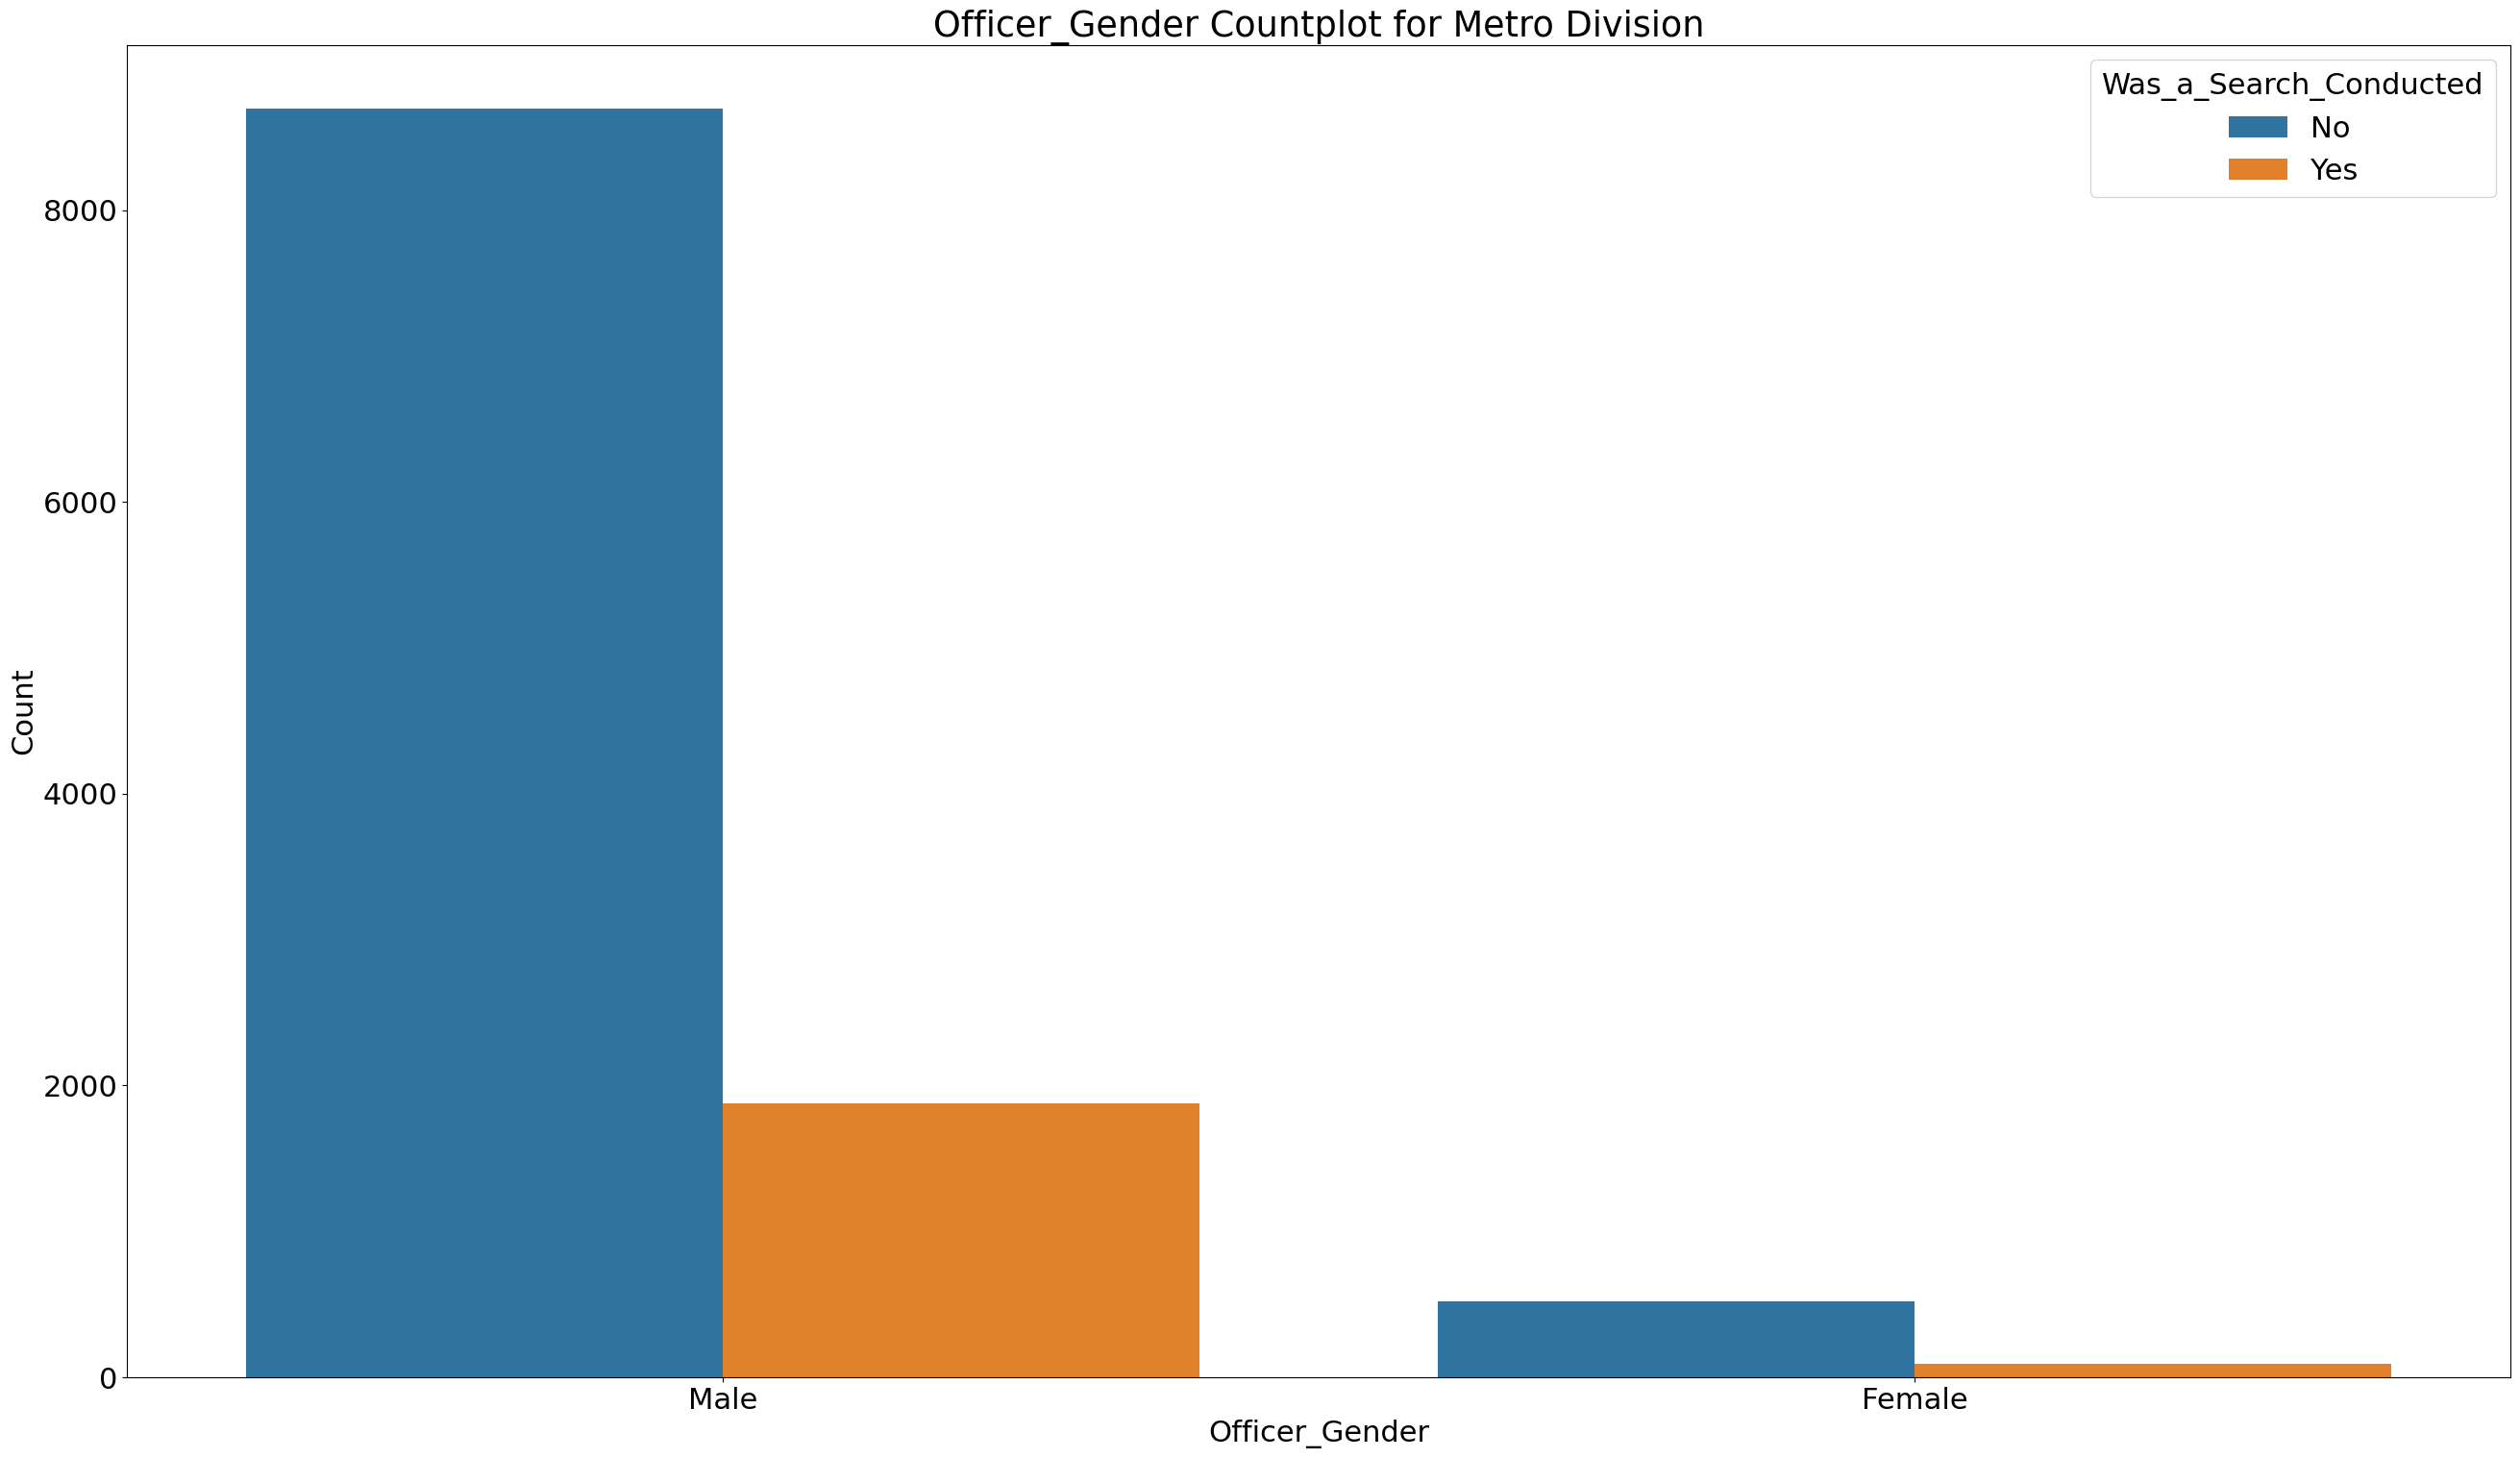

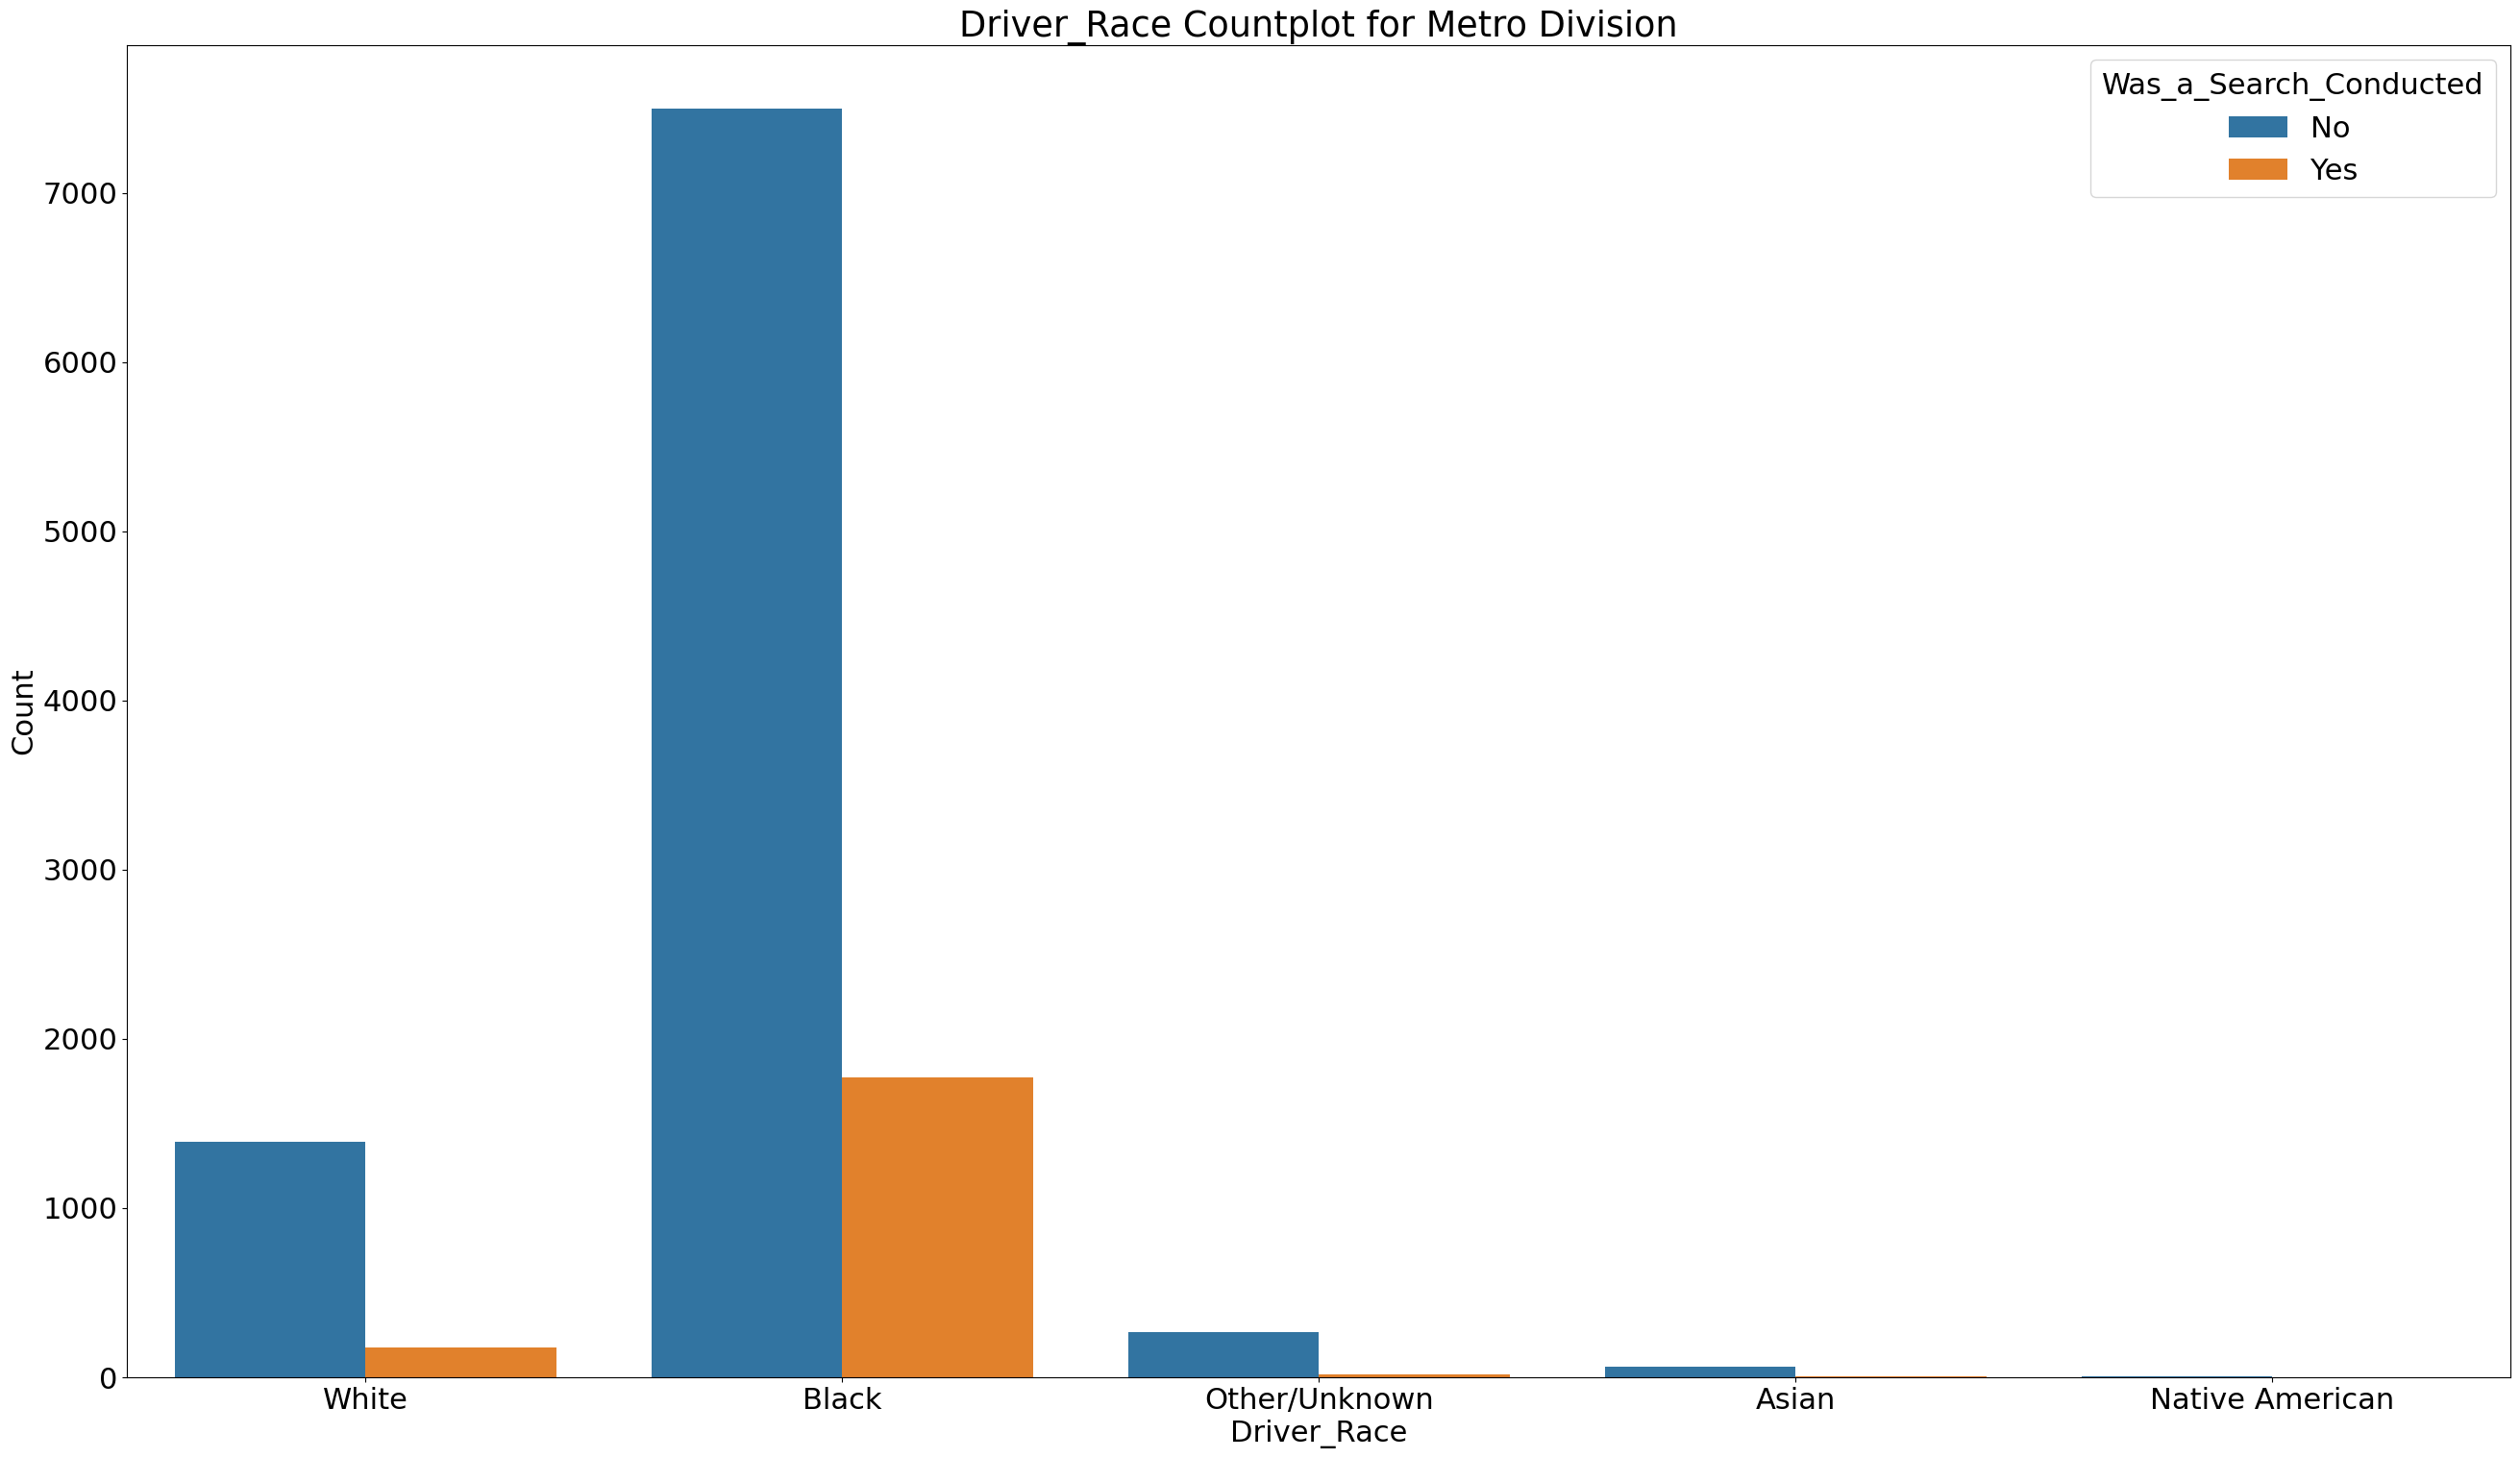

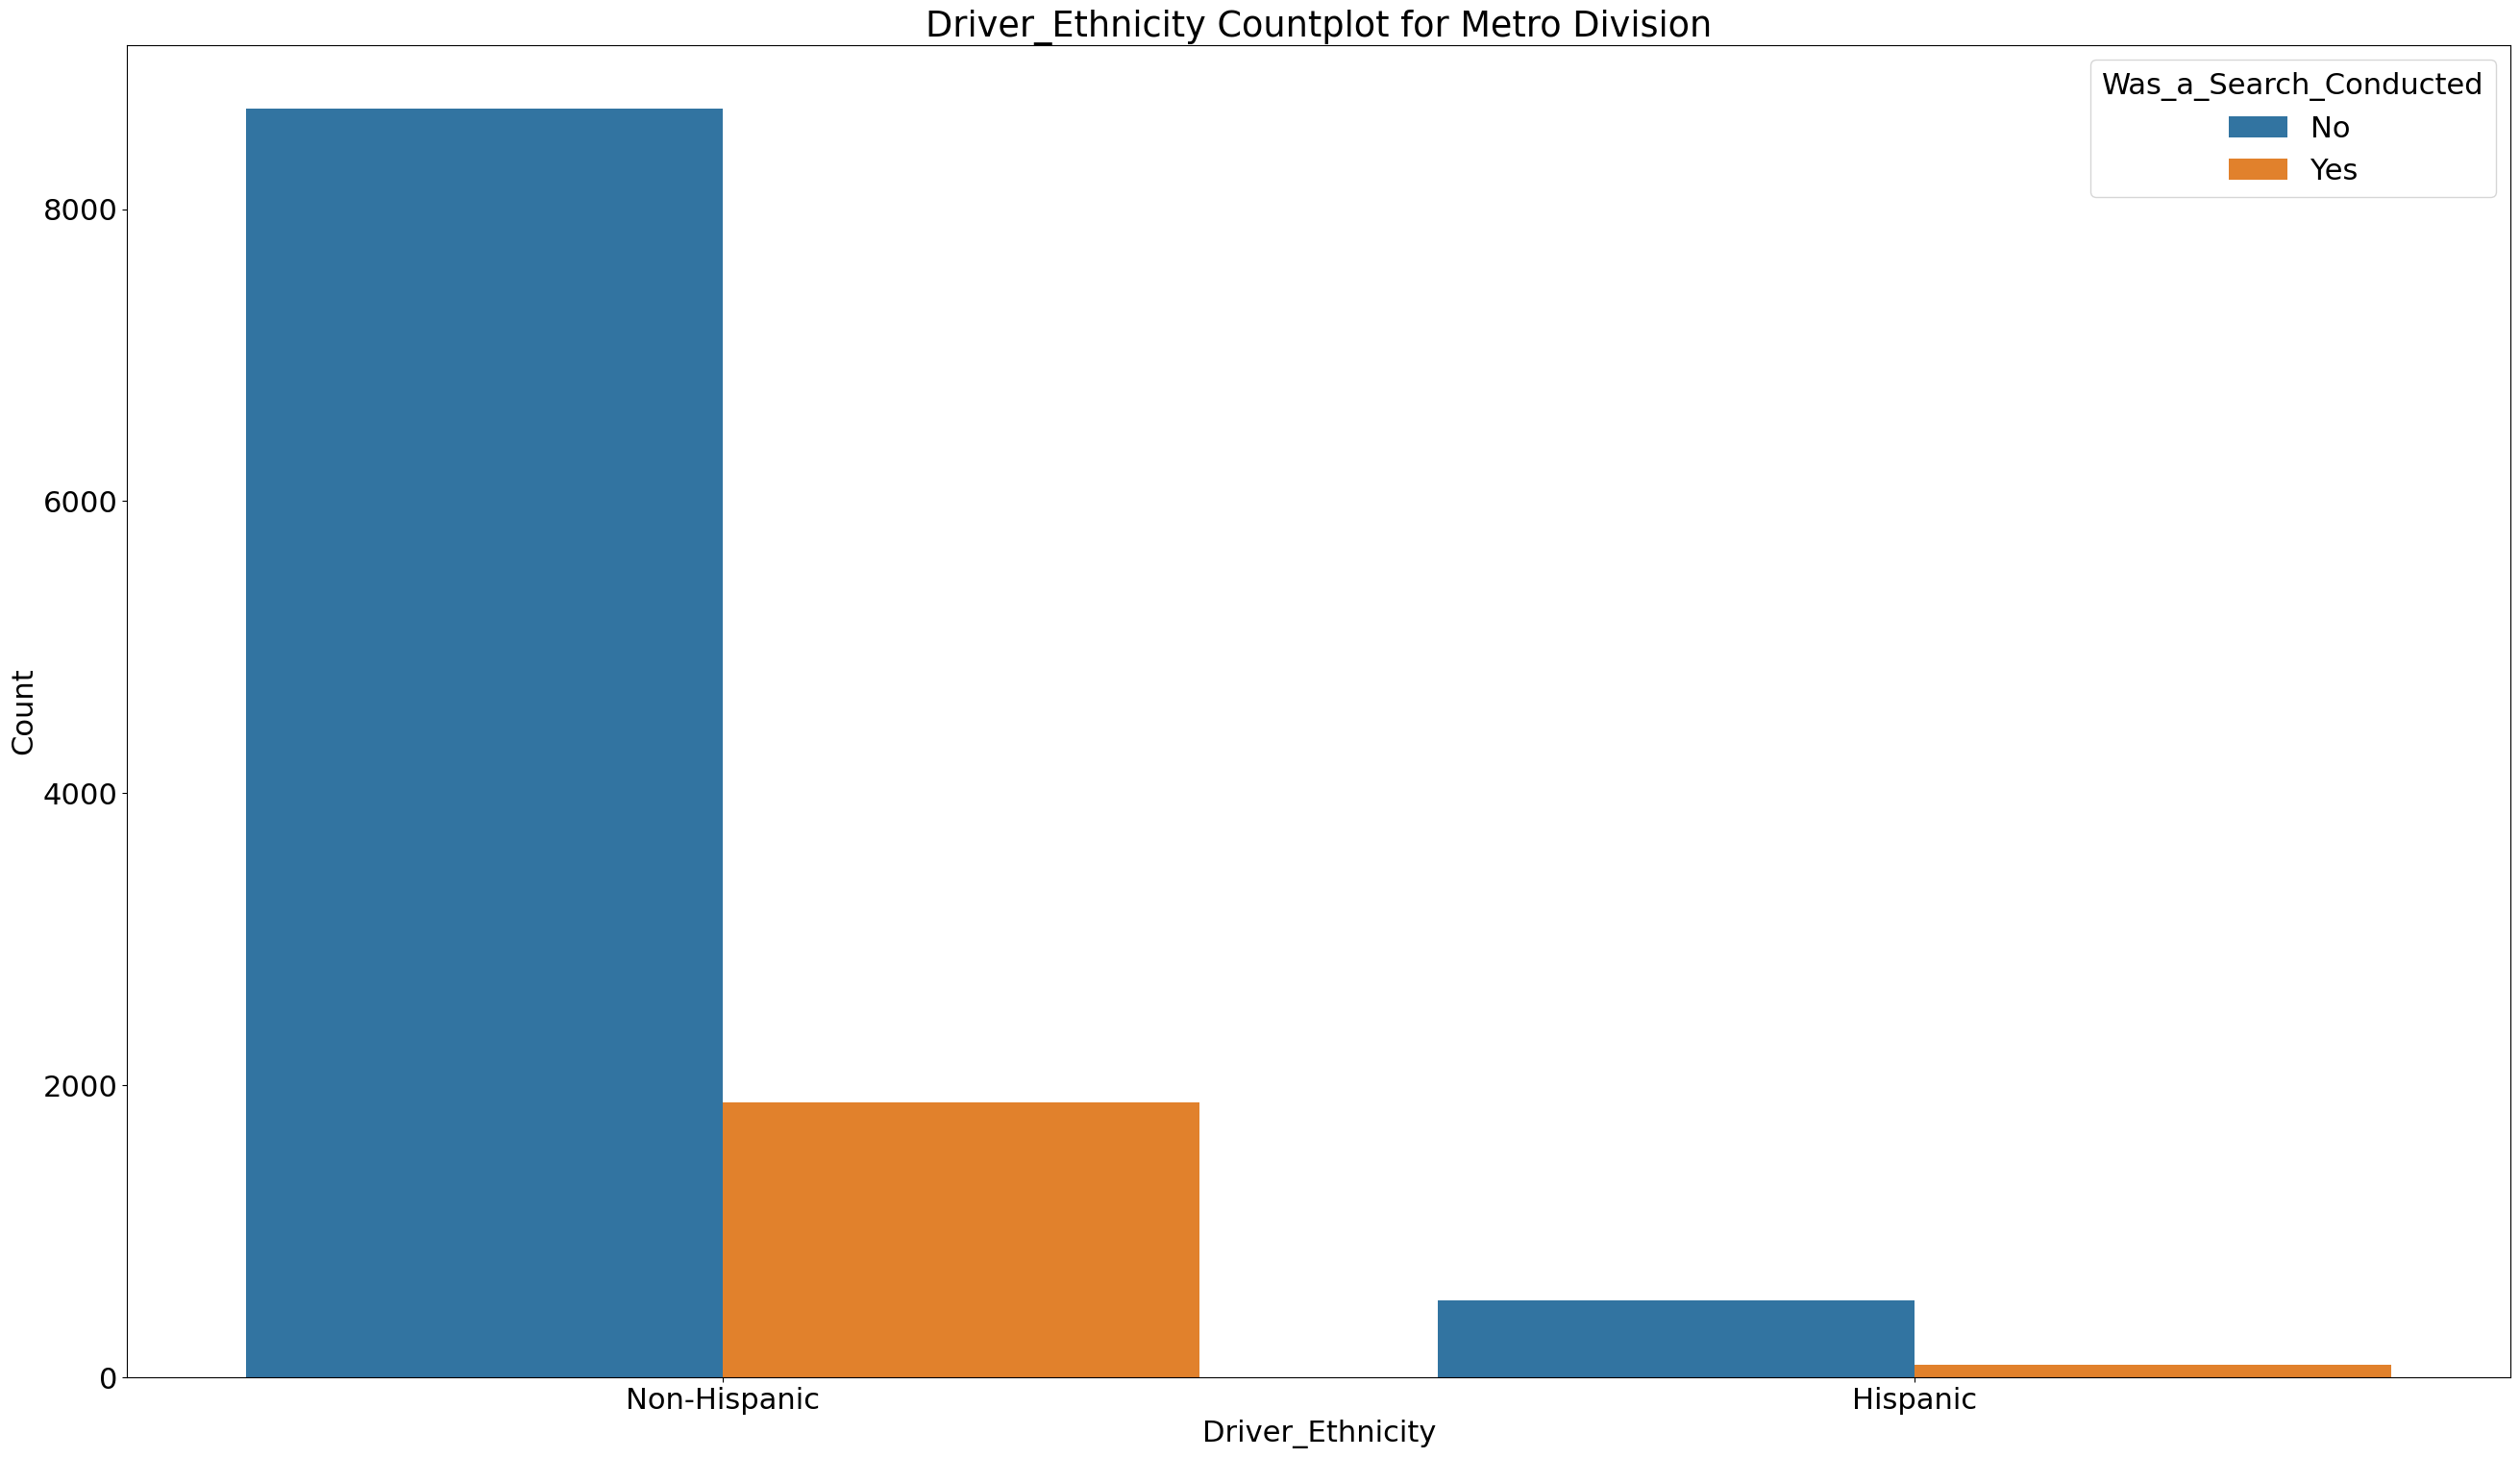

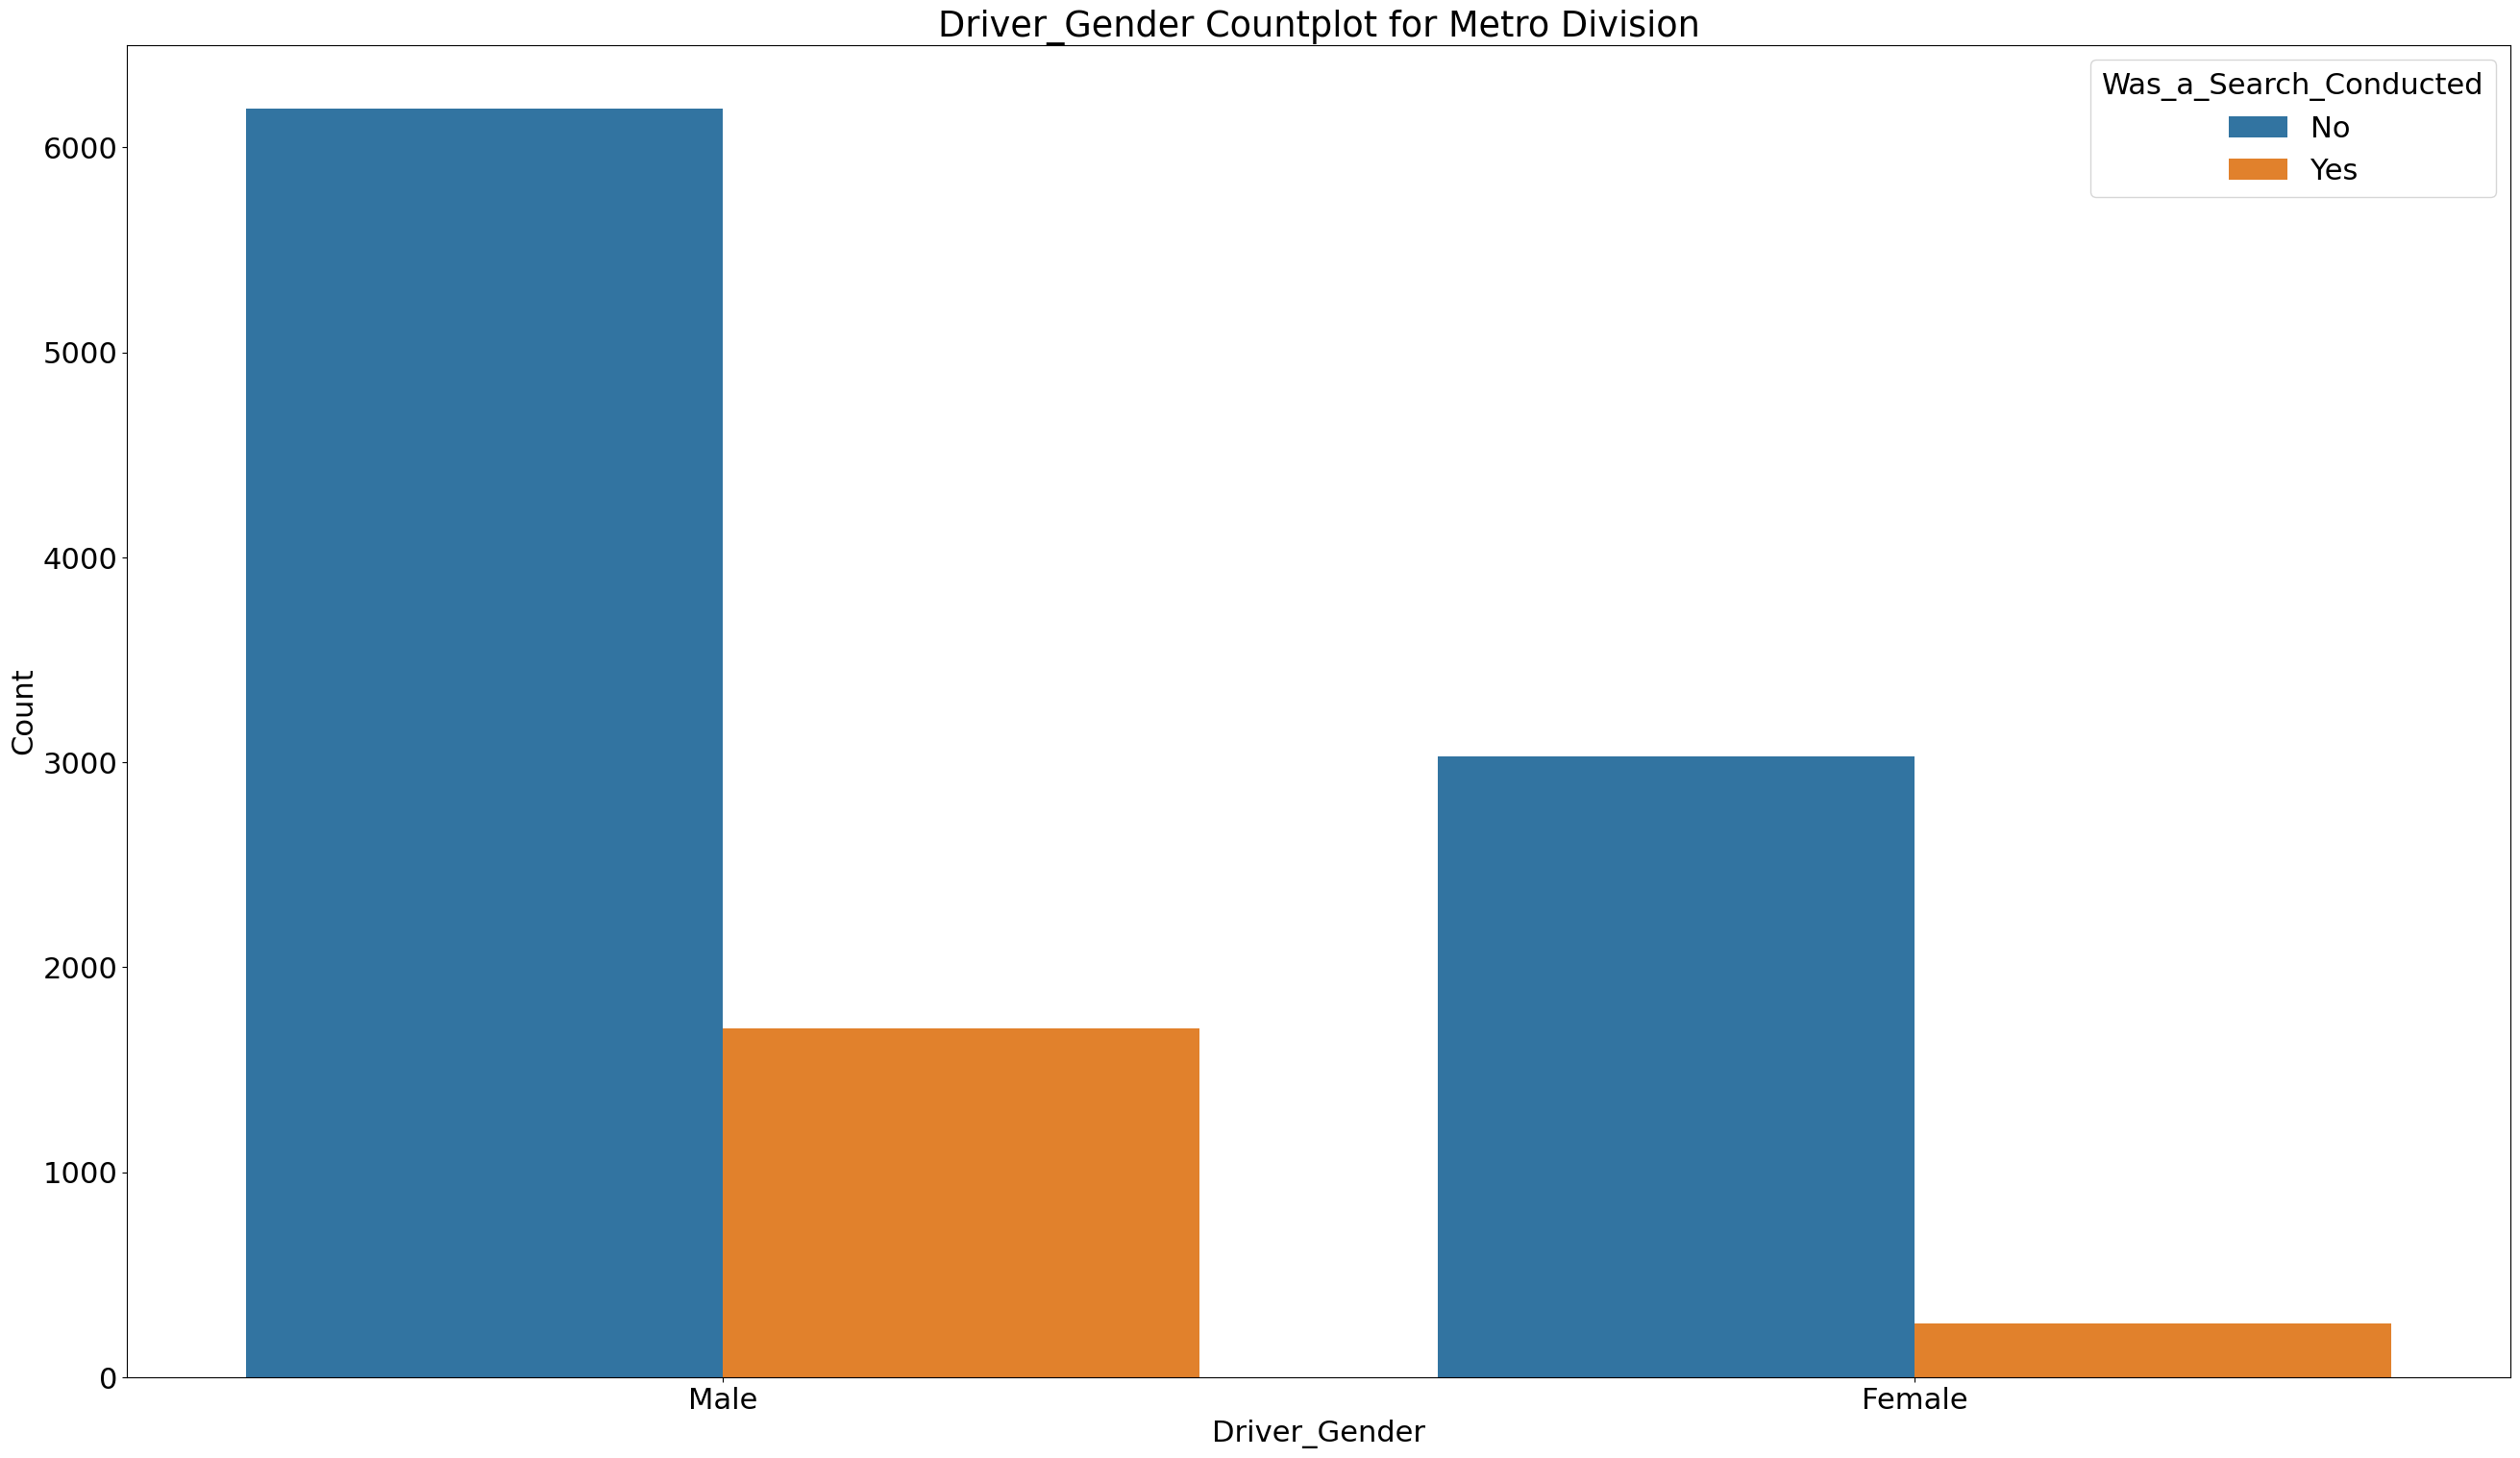

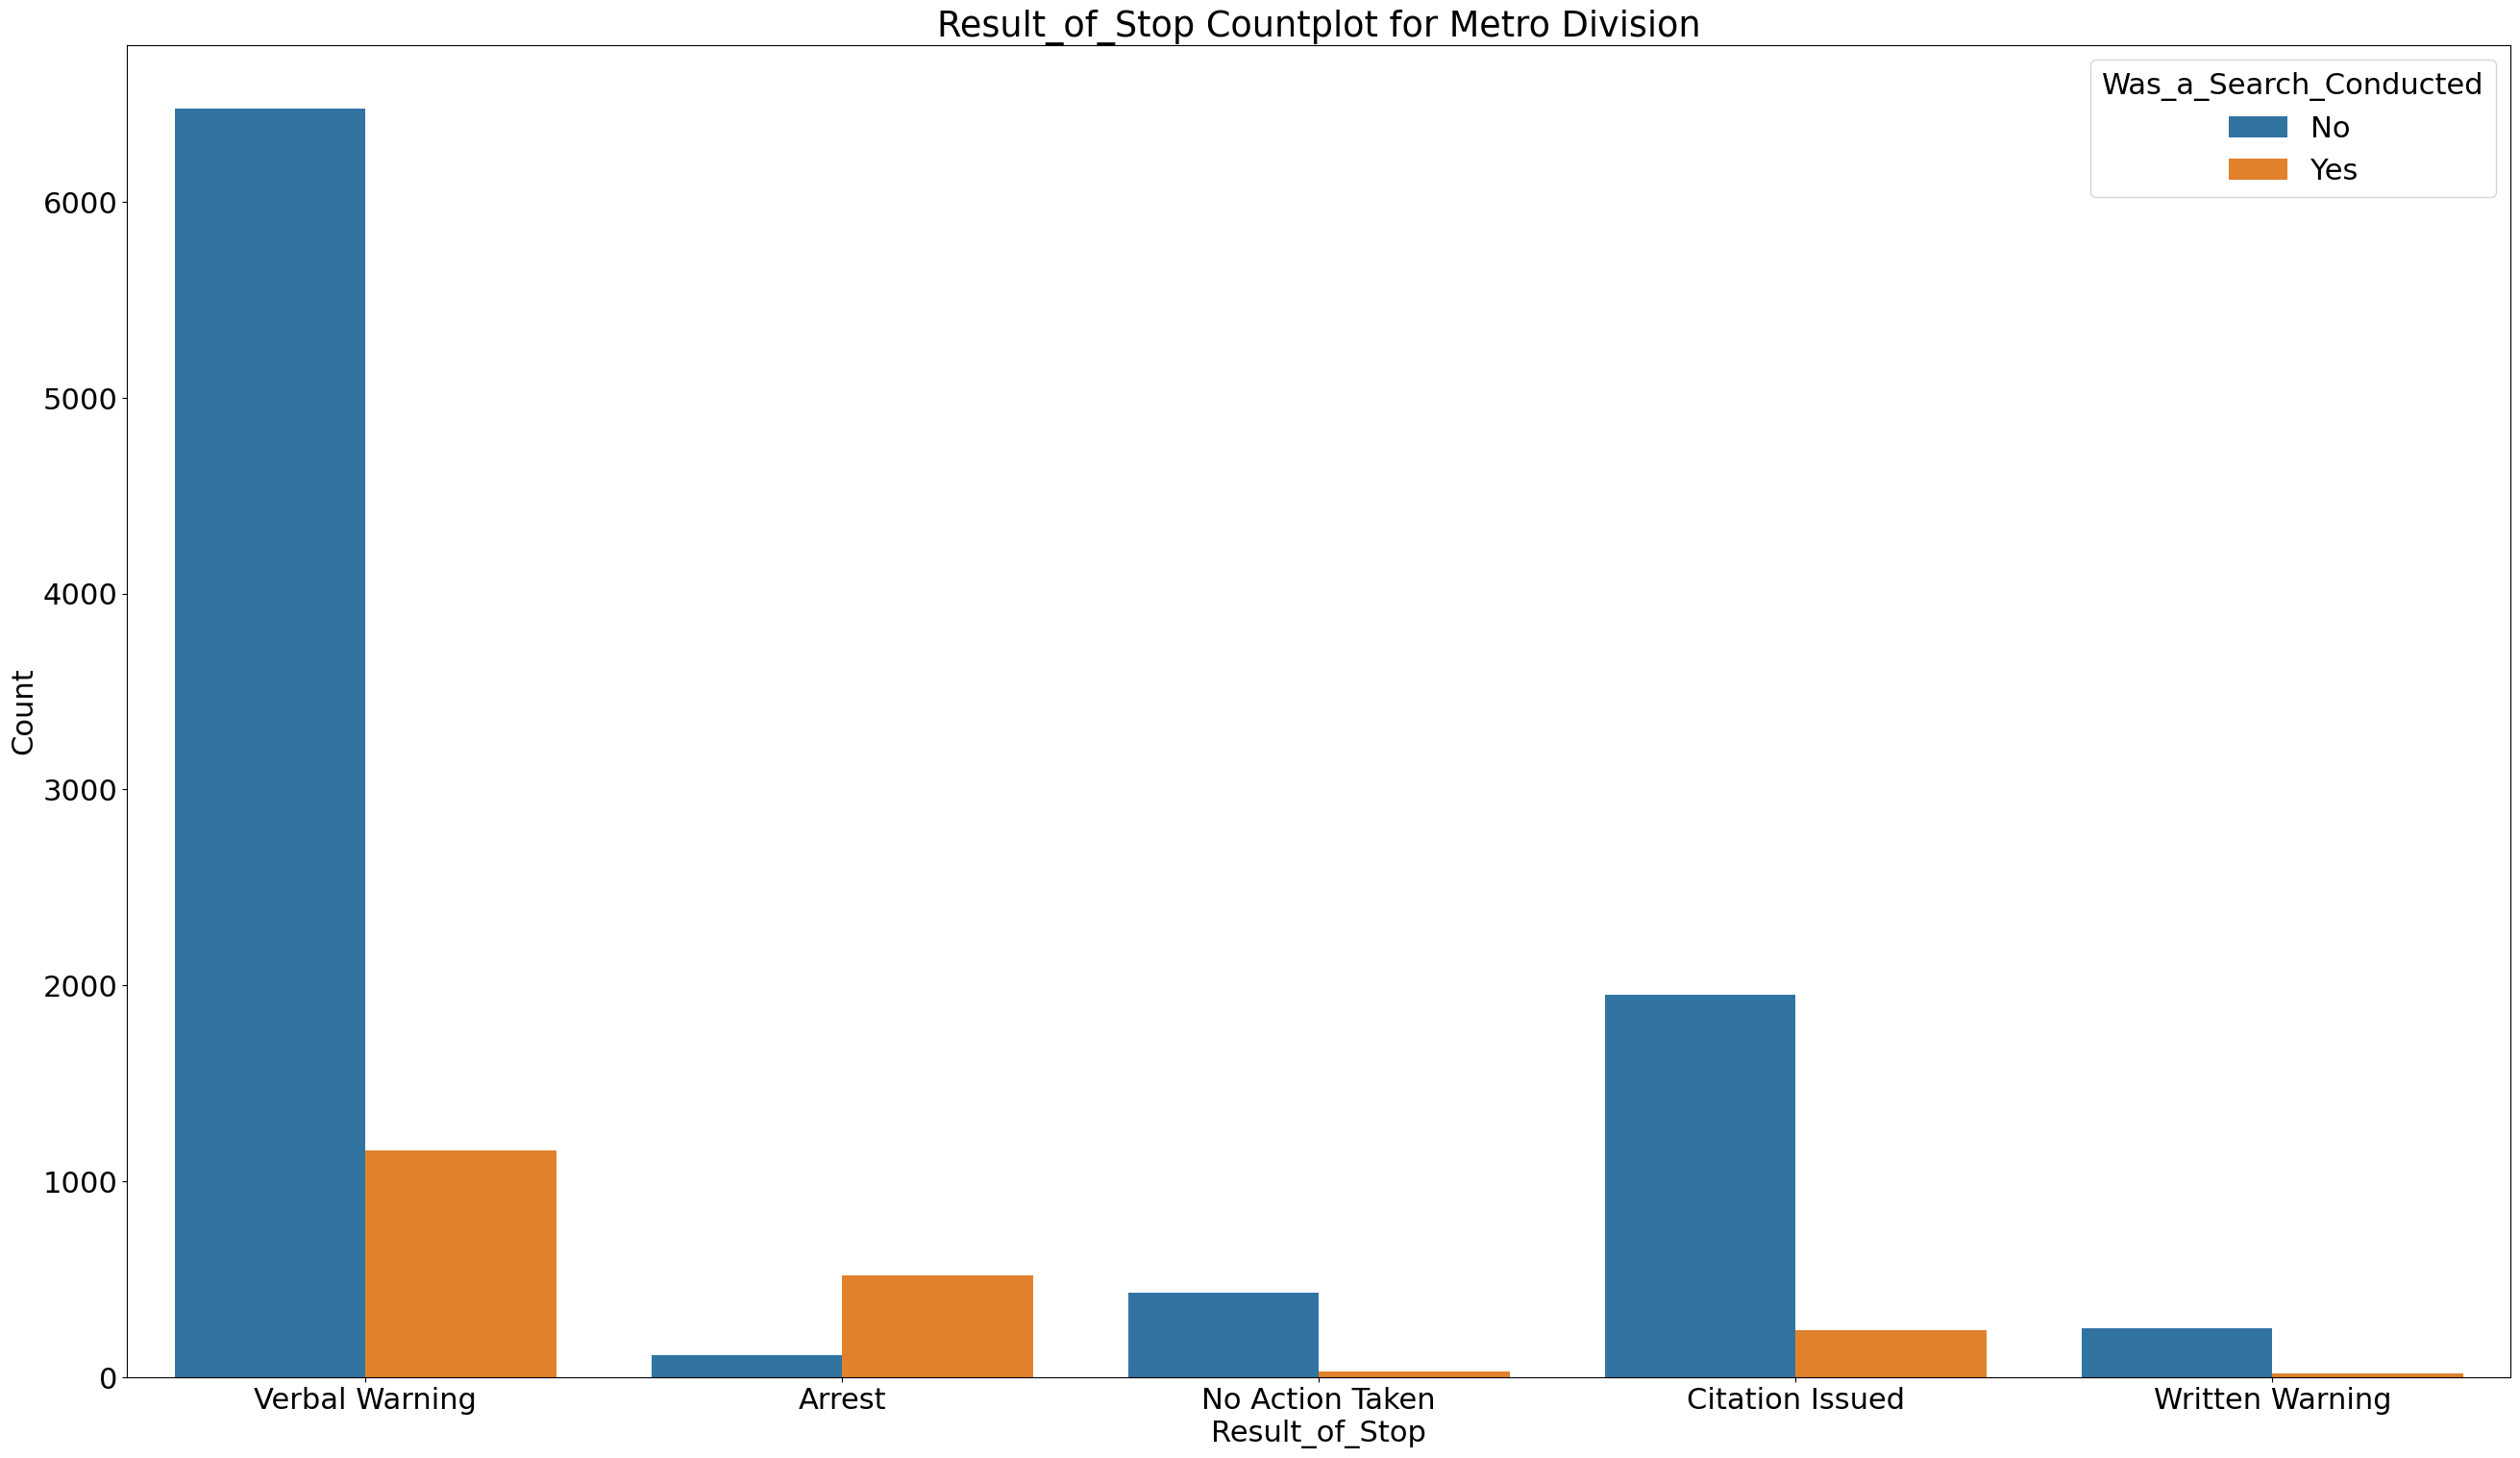

In [22]:
for column in categoricals.drop(labels=['Was_a_Search_Conducted']):
    plt.figure(figsize=(32,18))
    sns.countplot(x=Metro[column],hue=Metro['Was_a_Search_Conducted'])
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.title(f'{column} Countplot for Metro Division')
    plt.show()

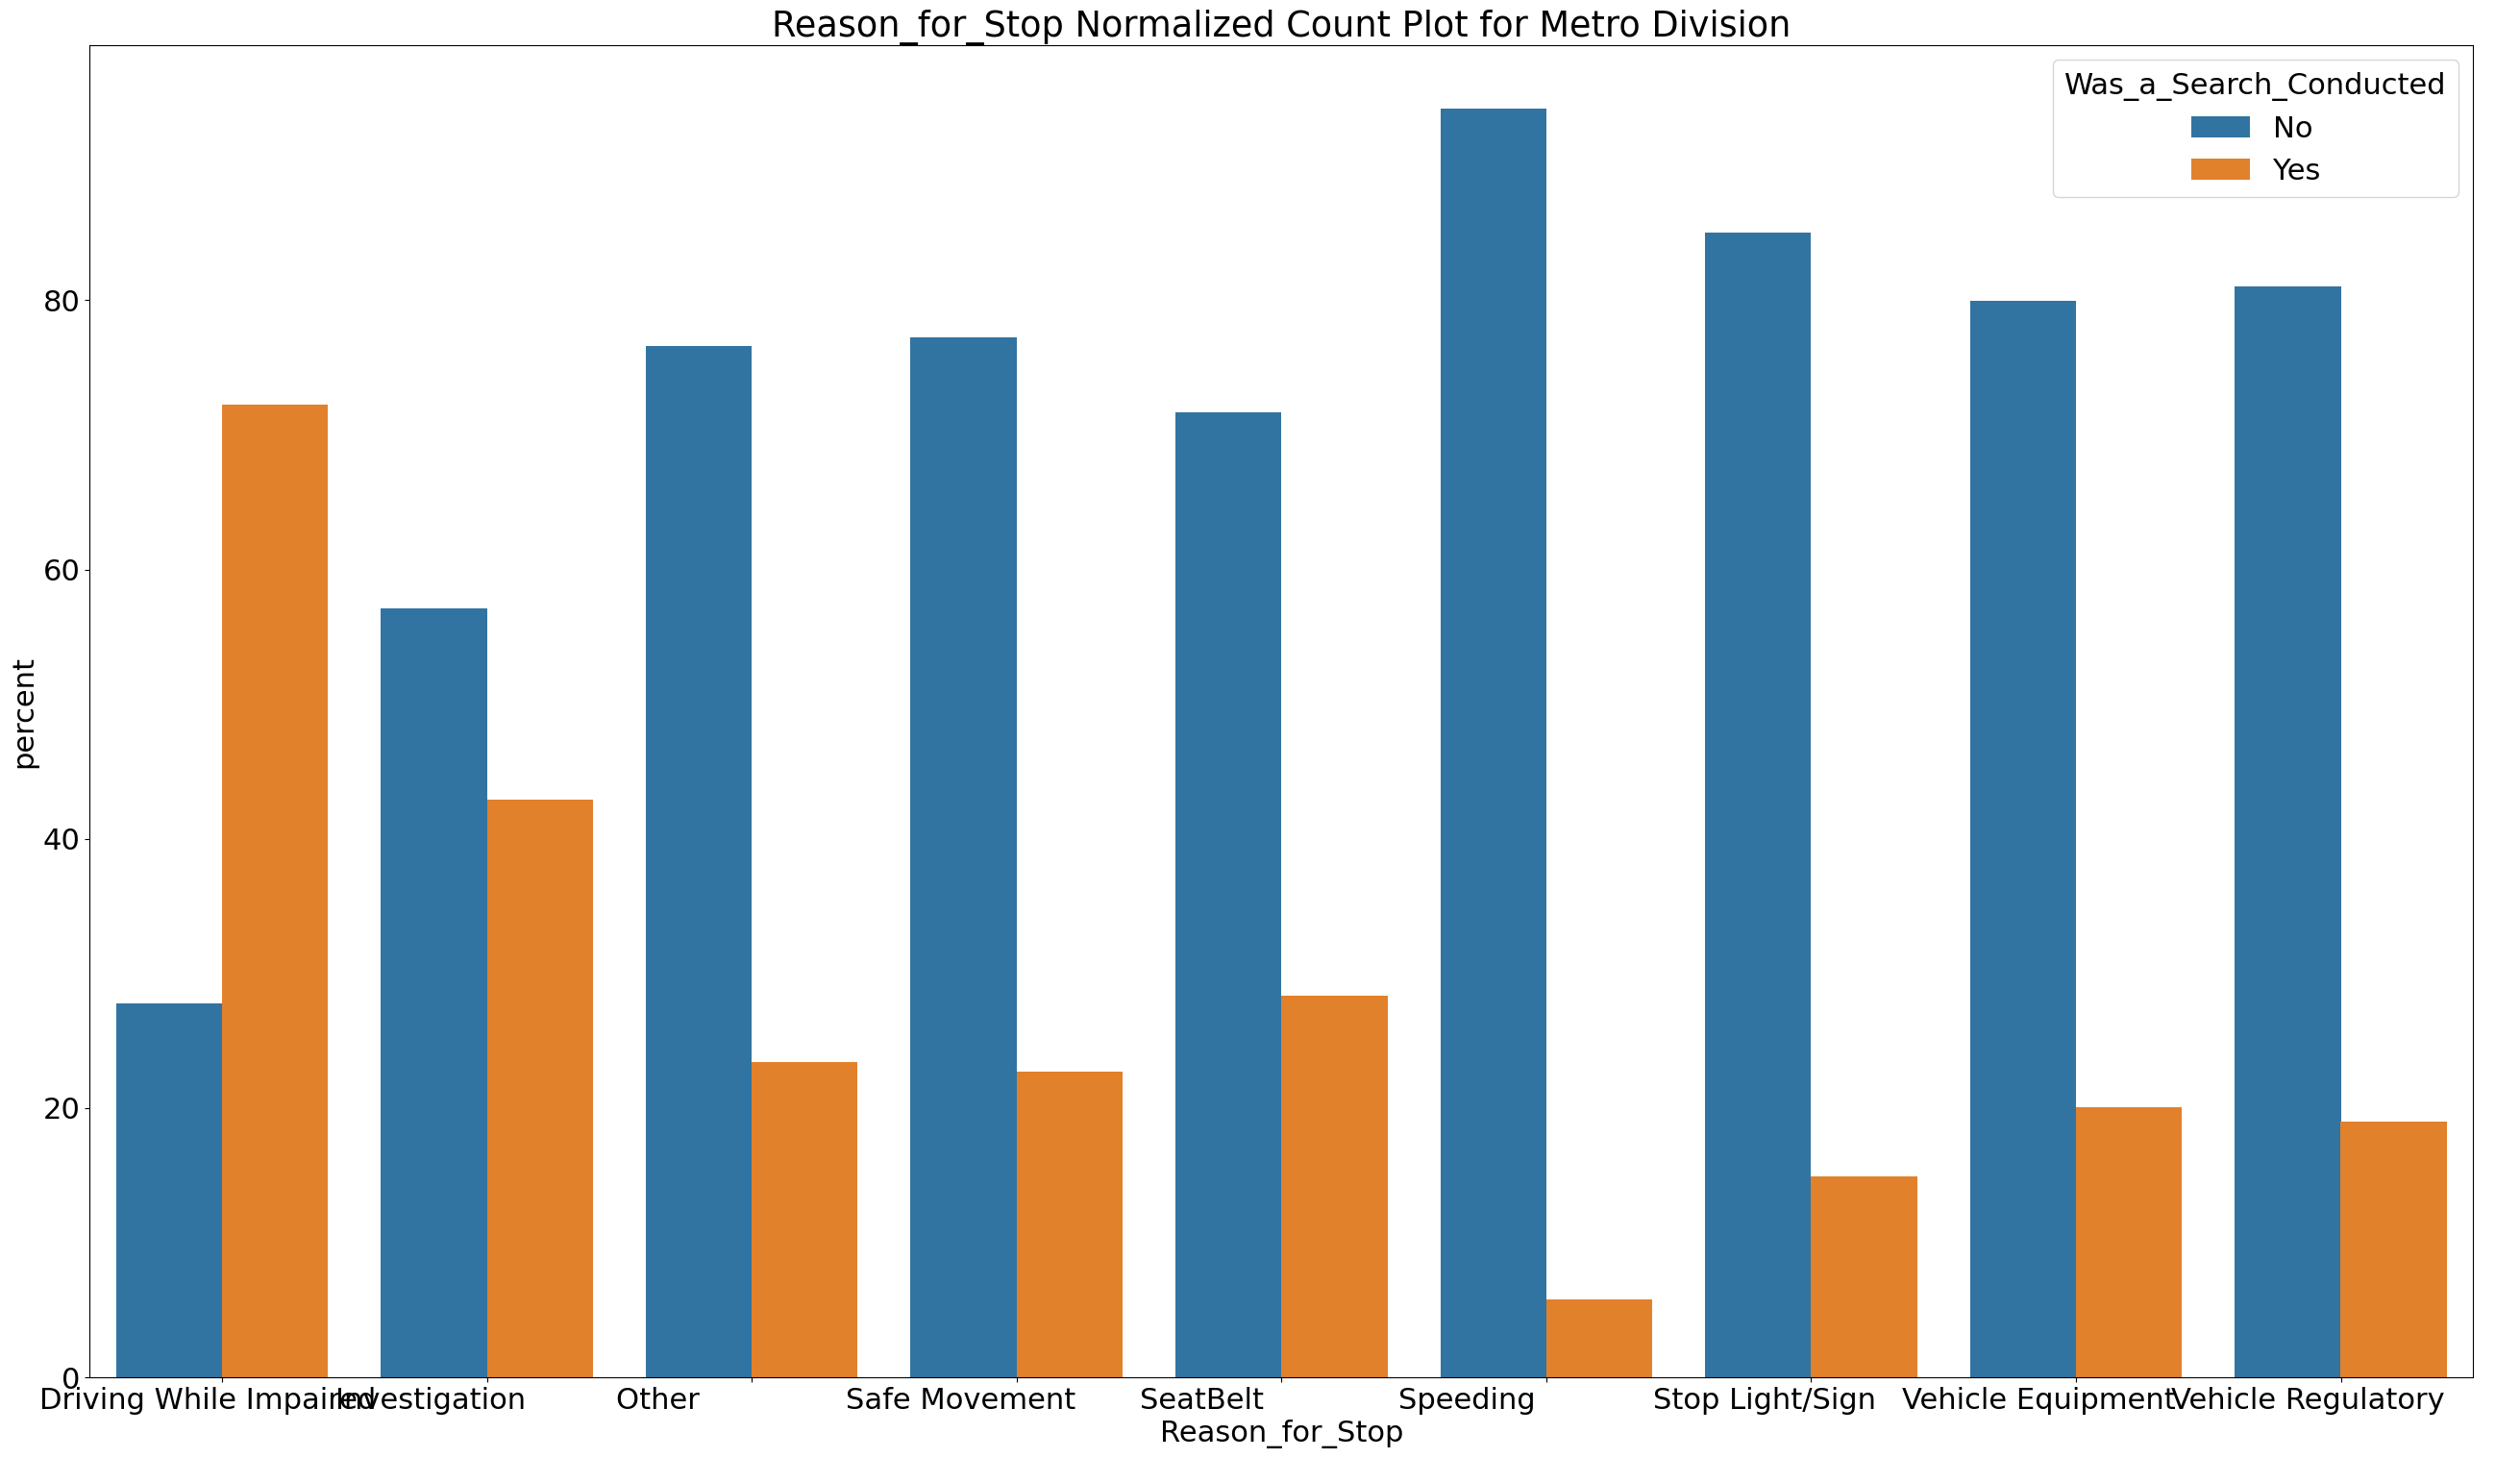

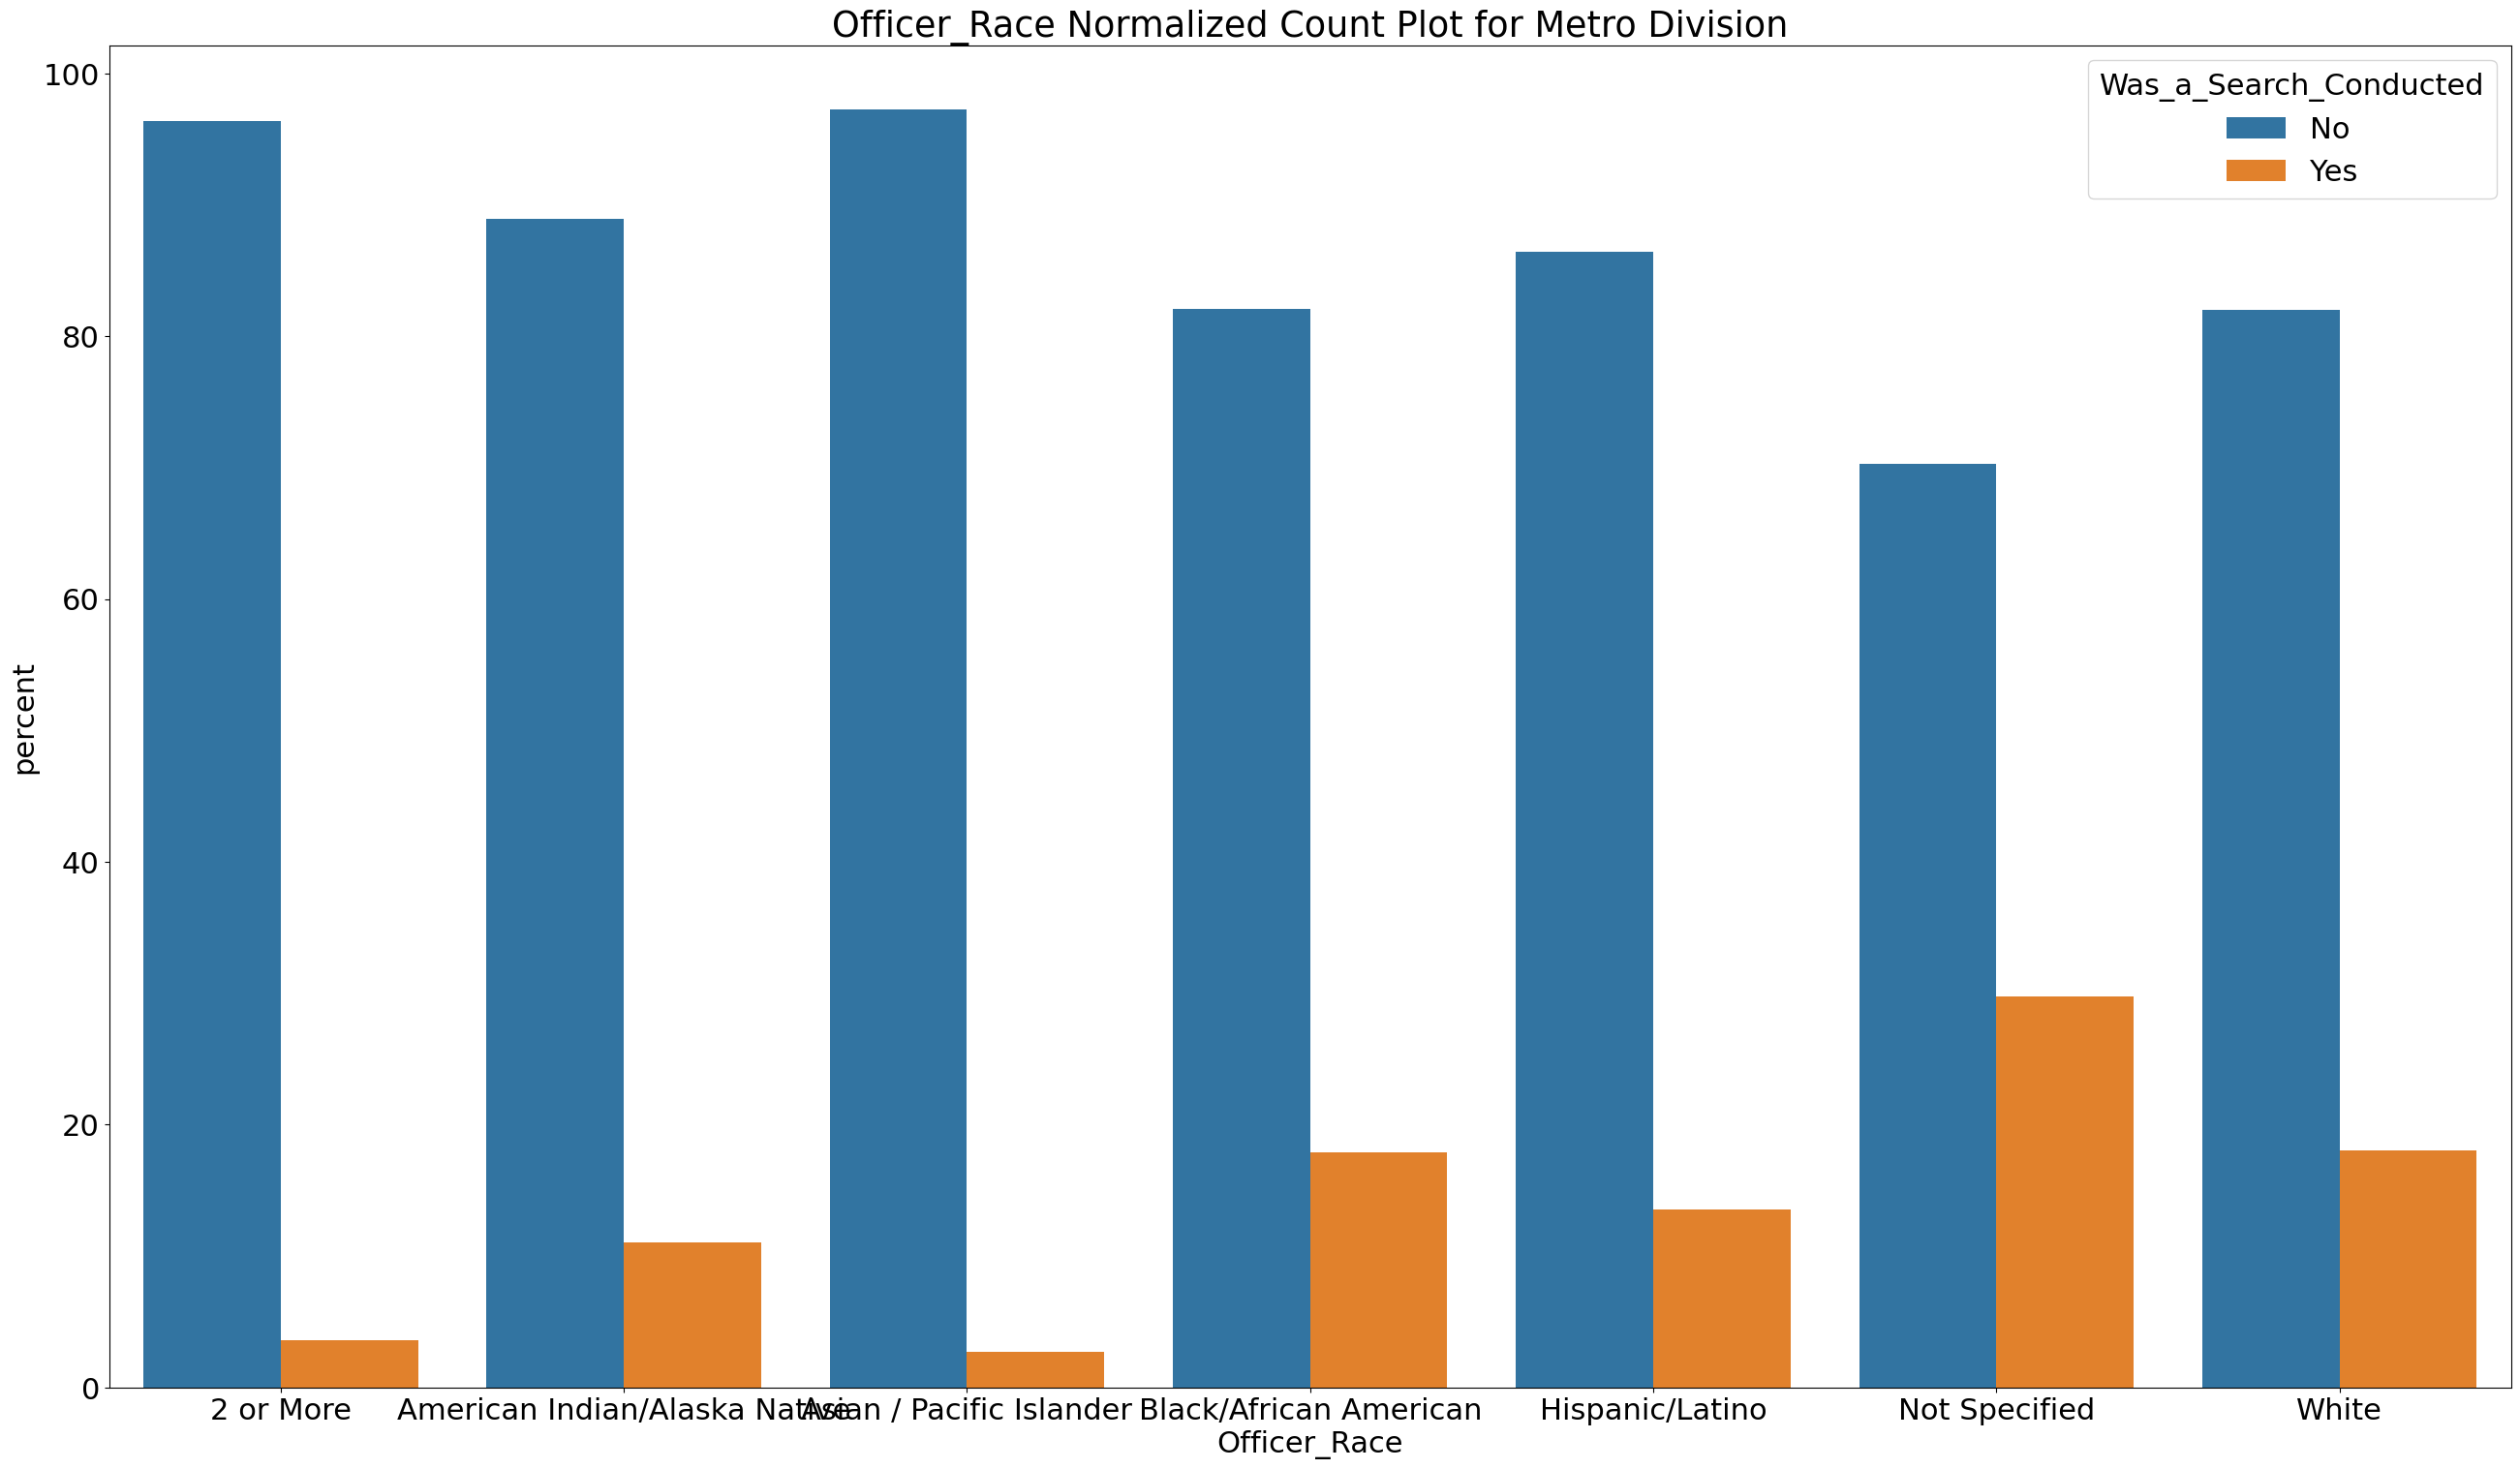

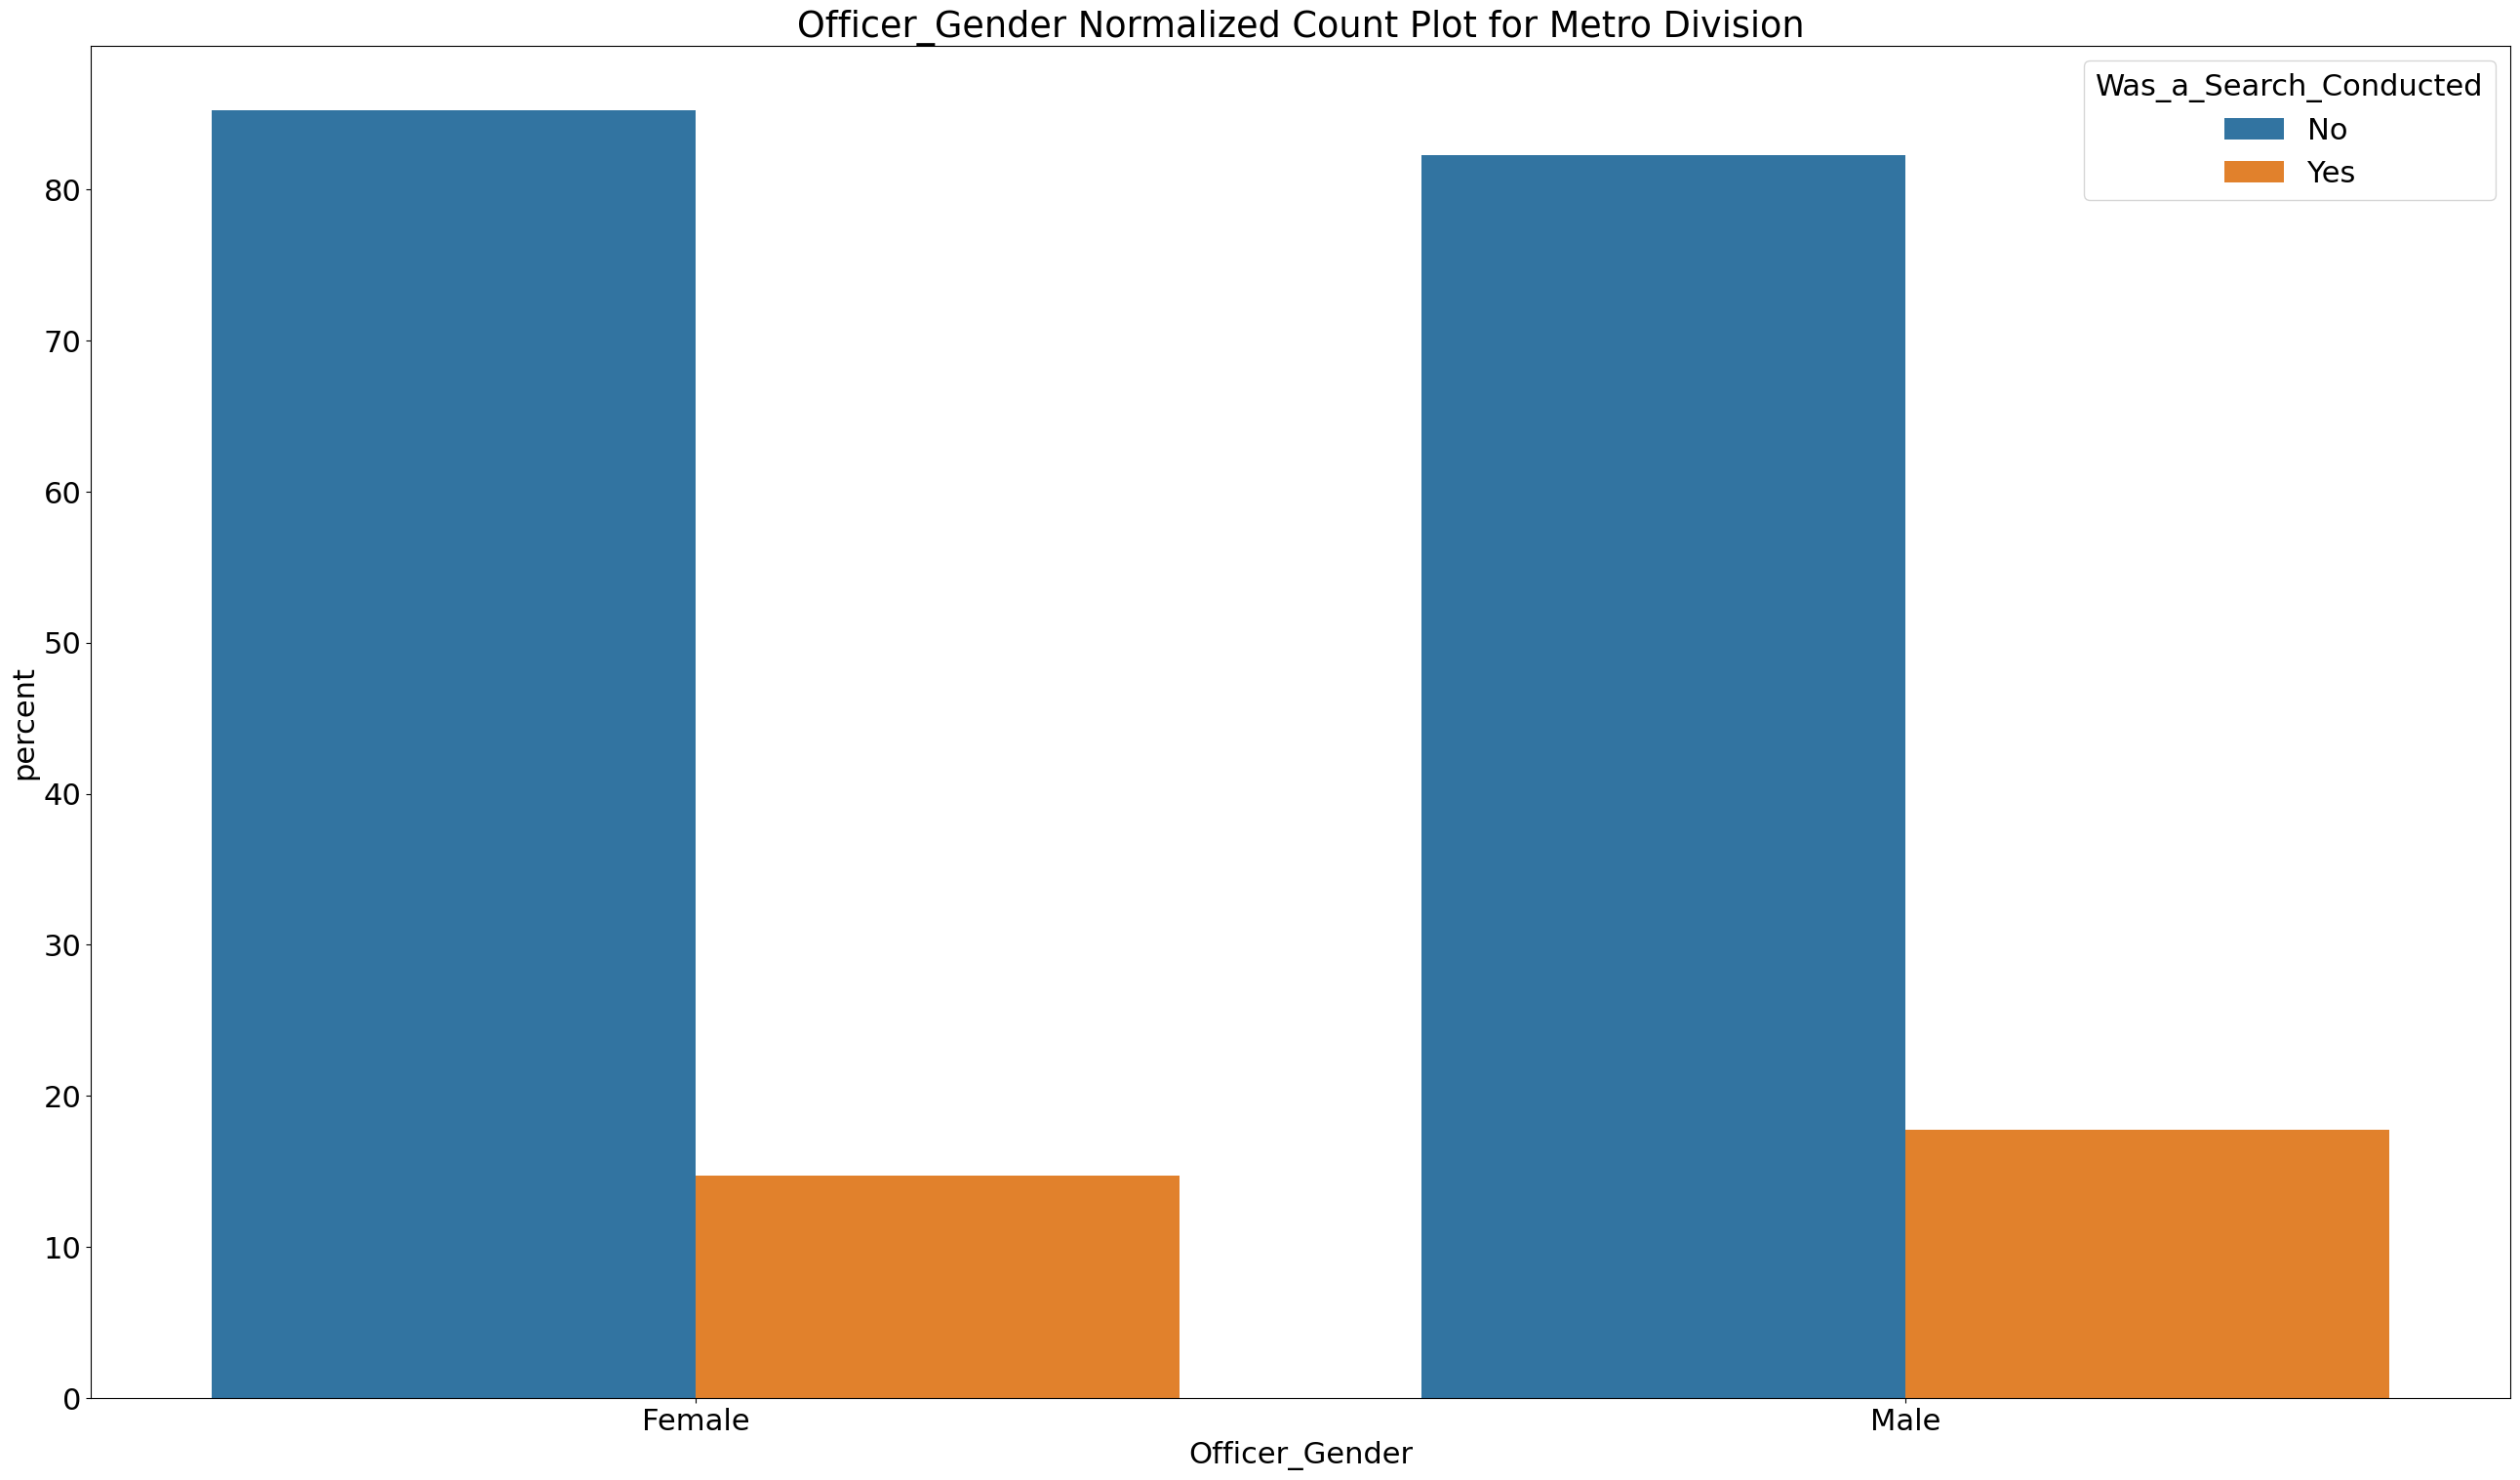

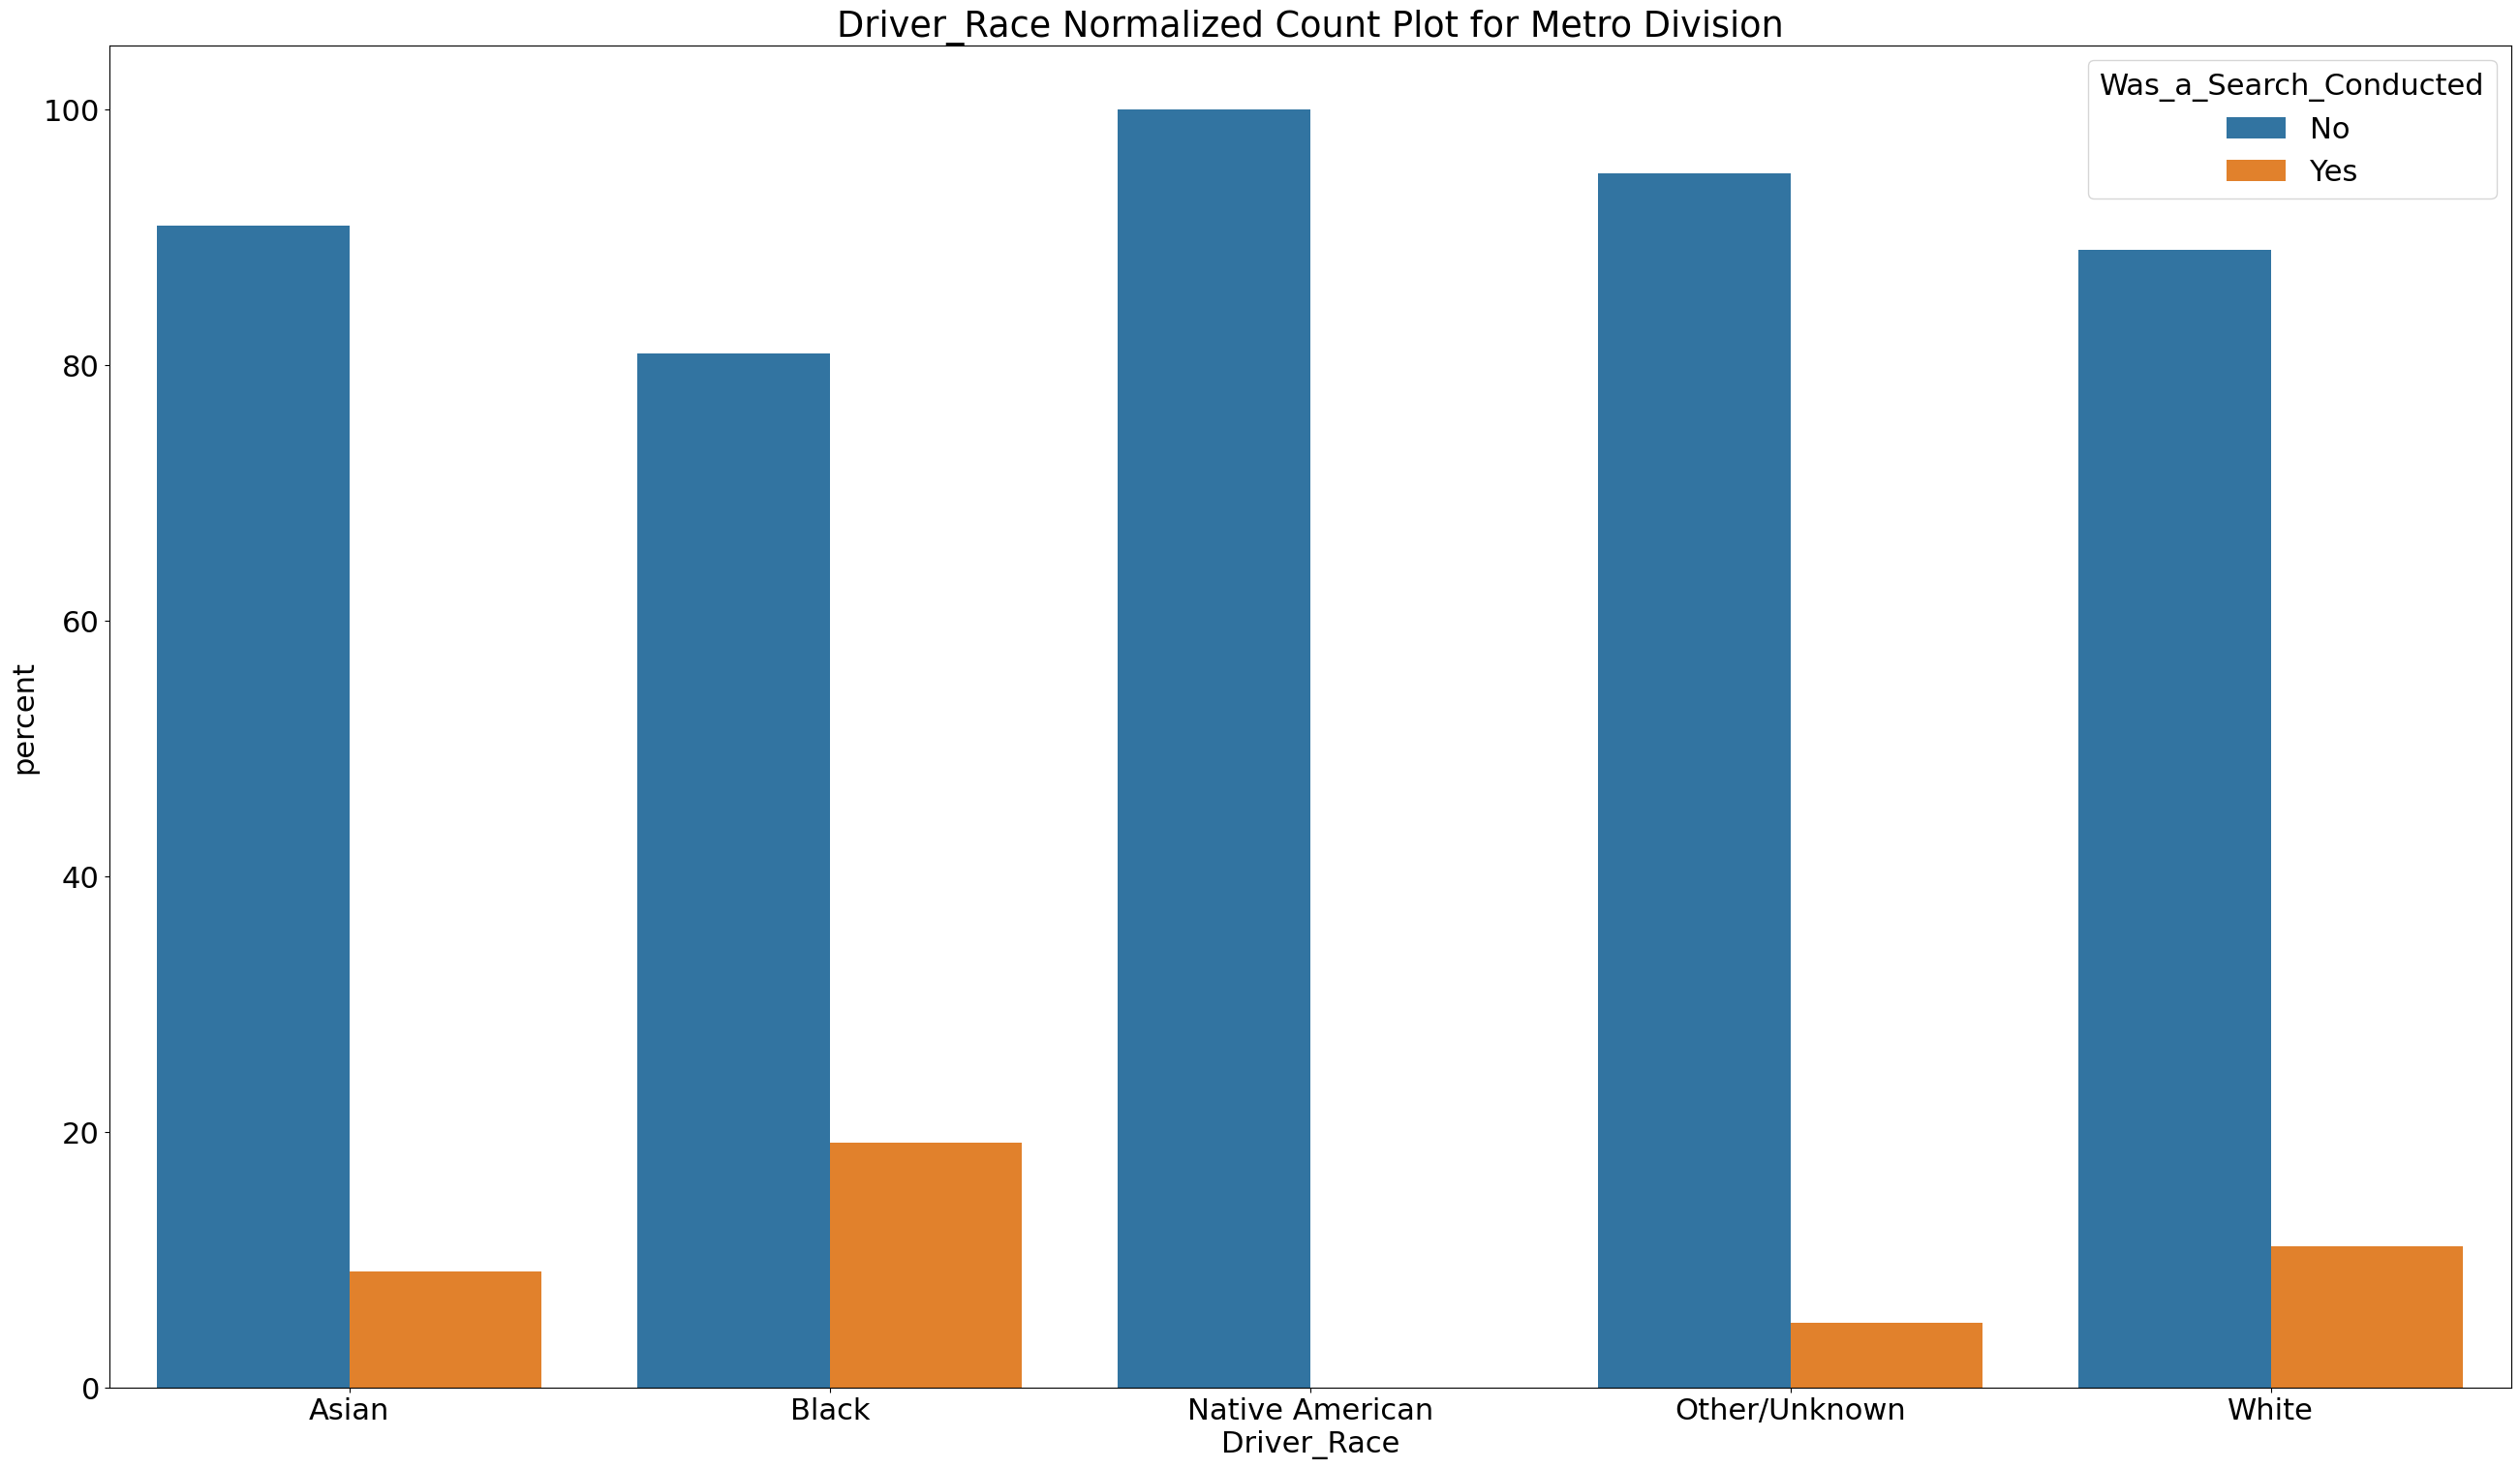

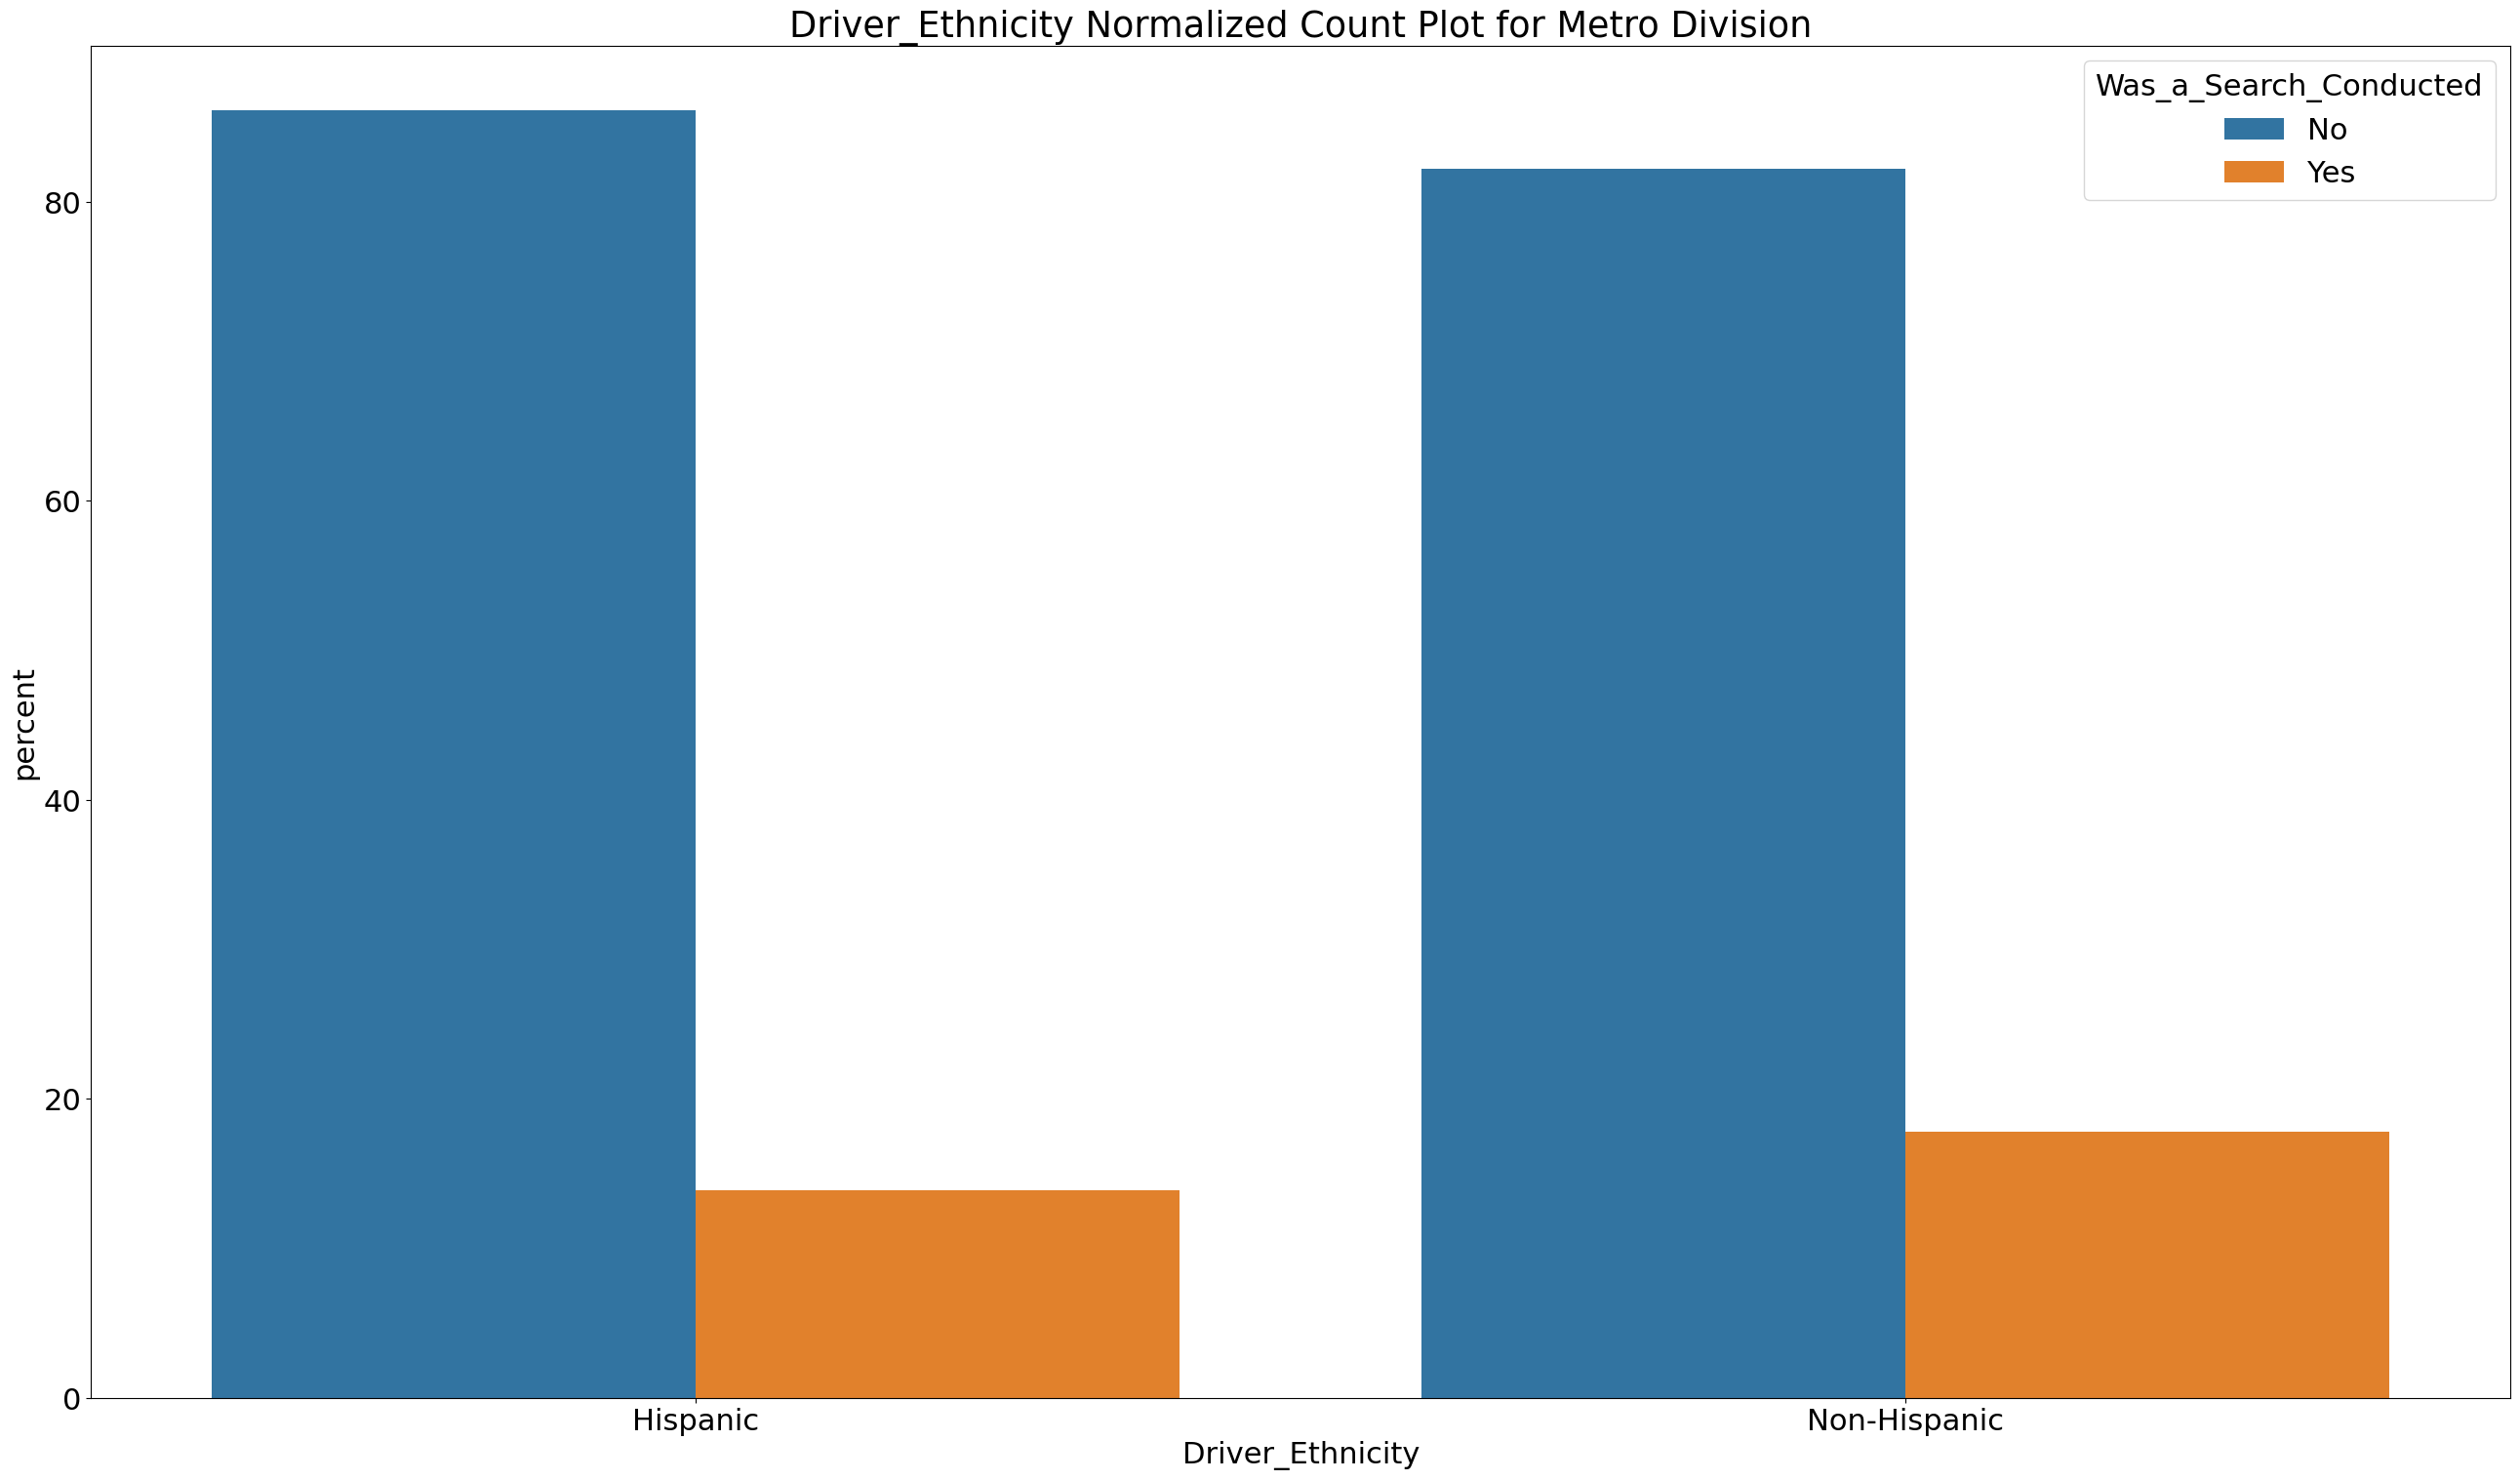

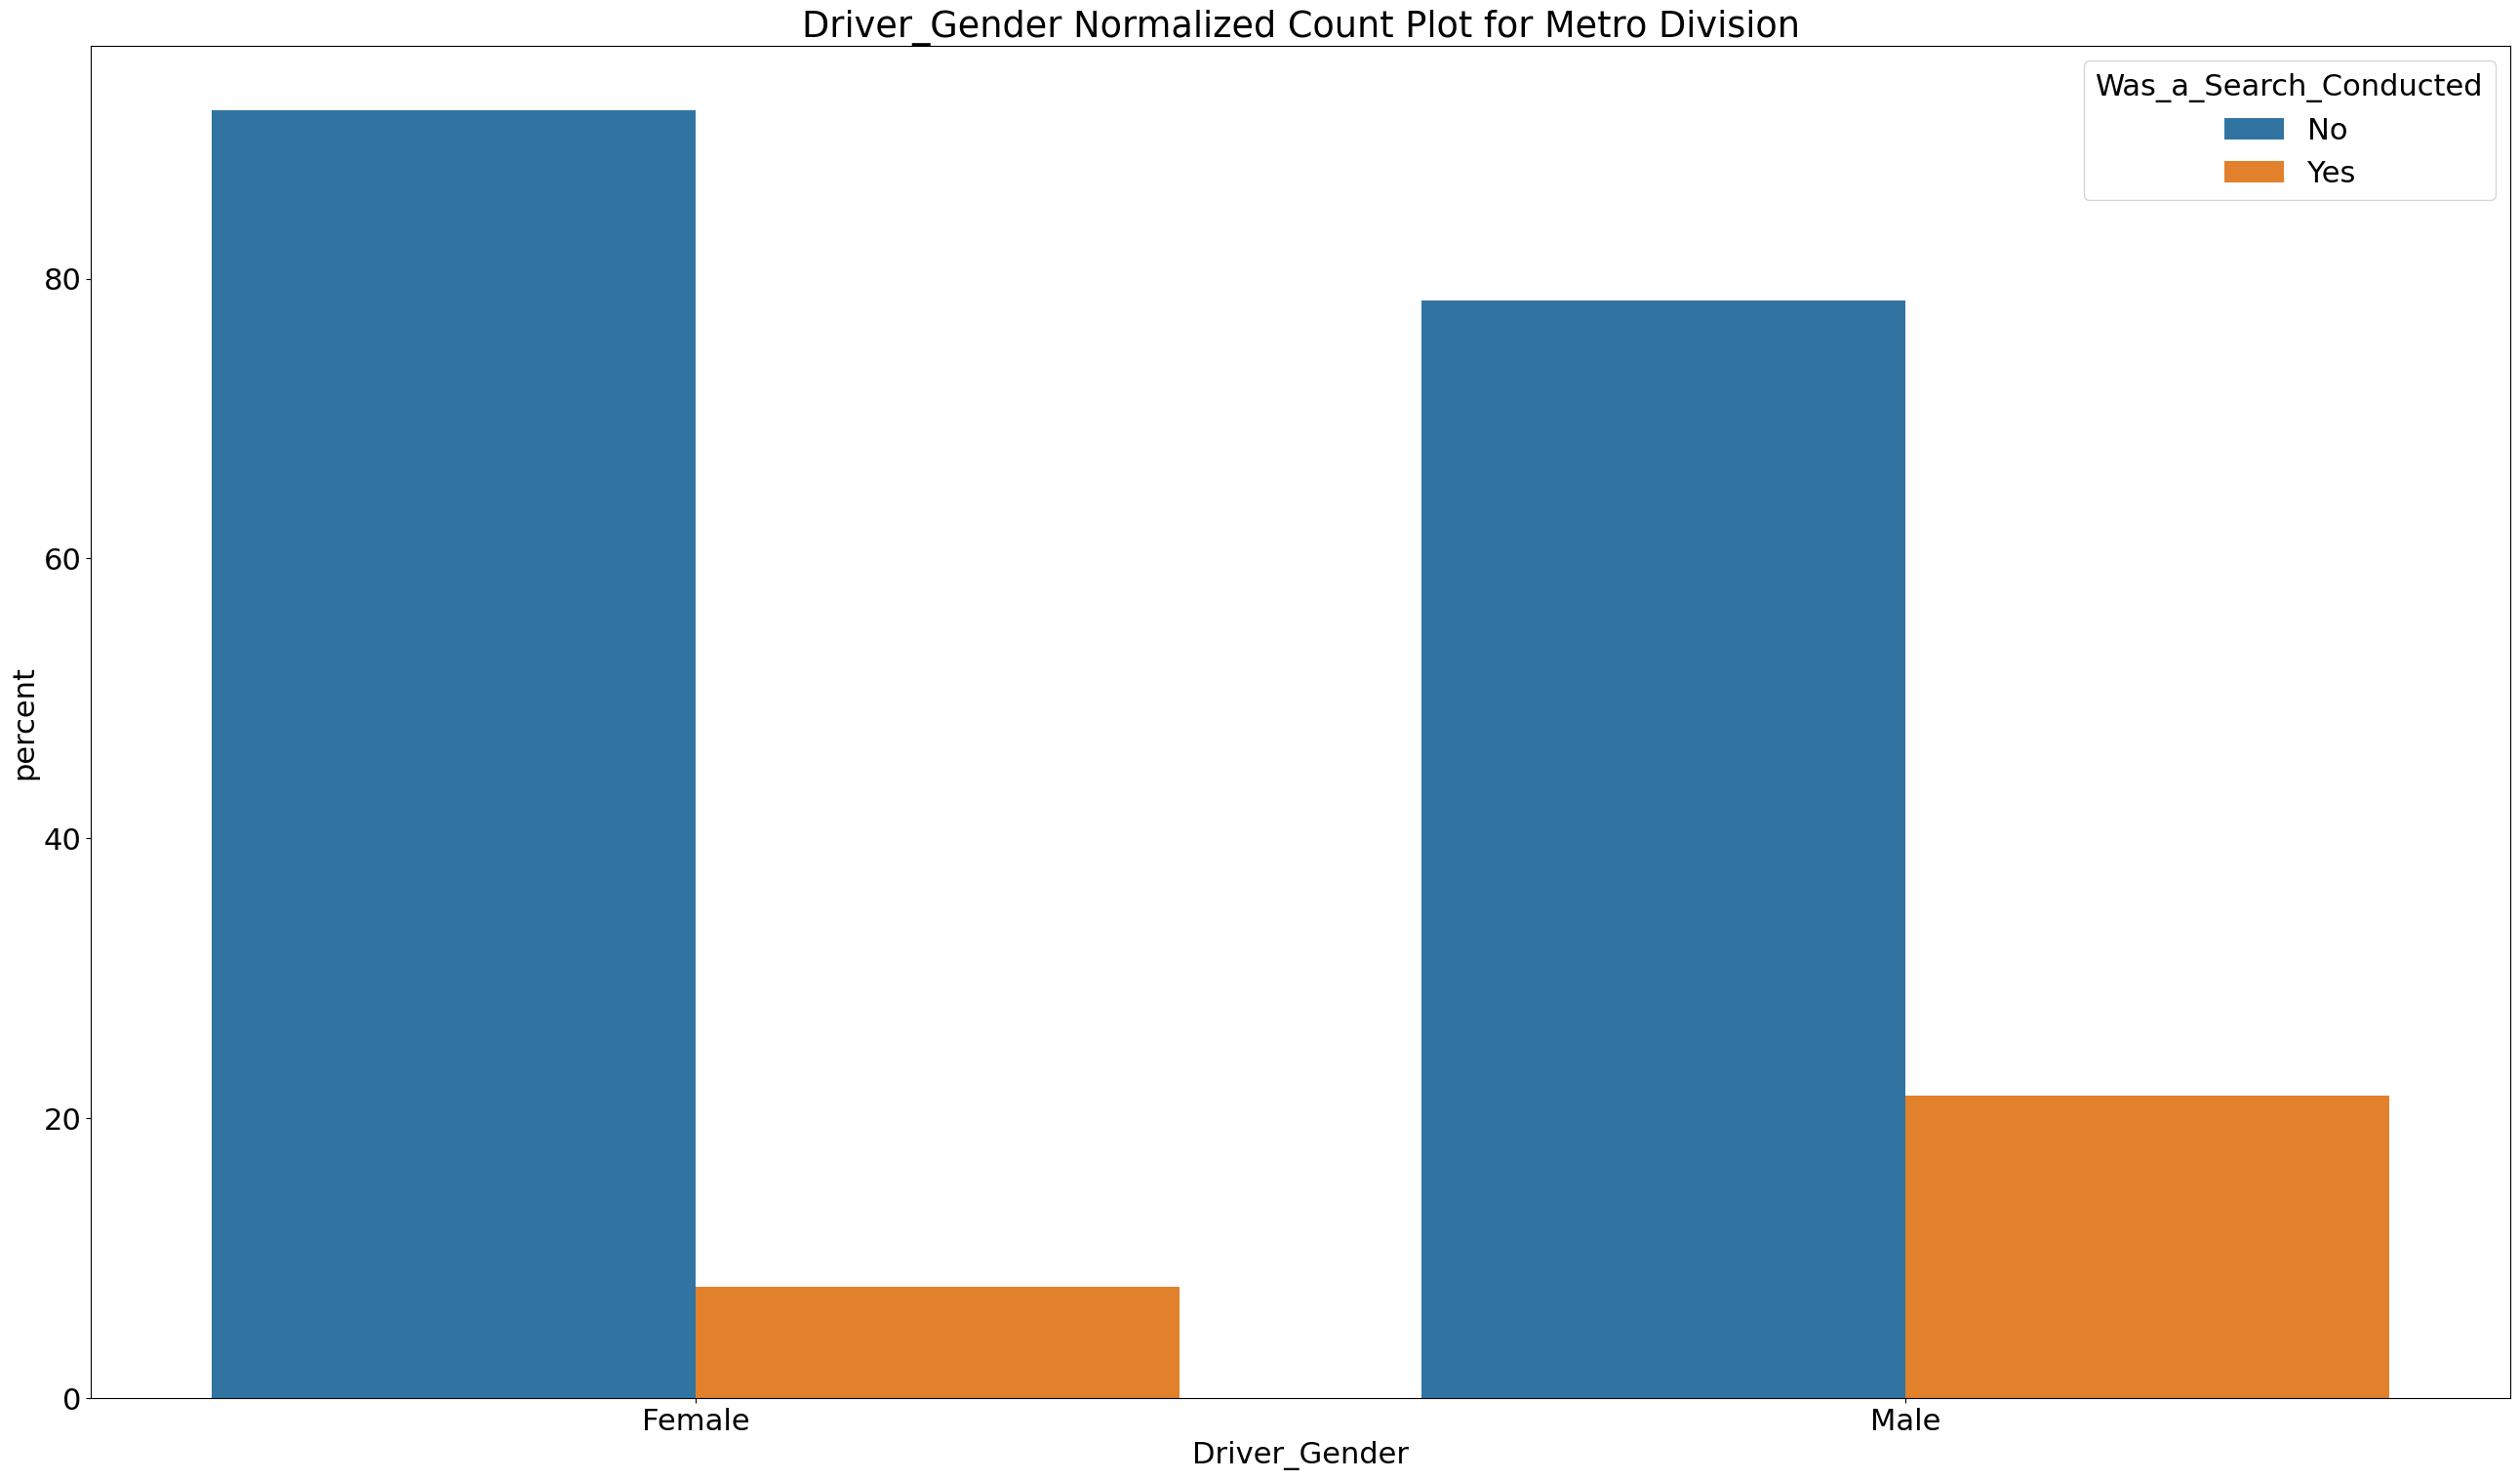

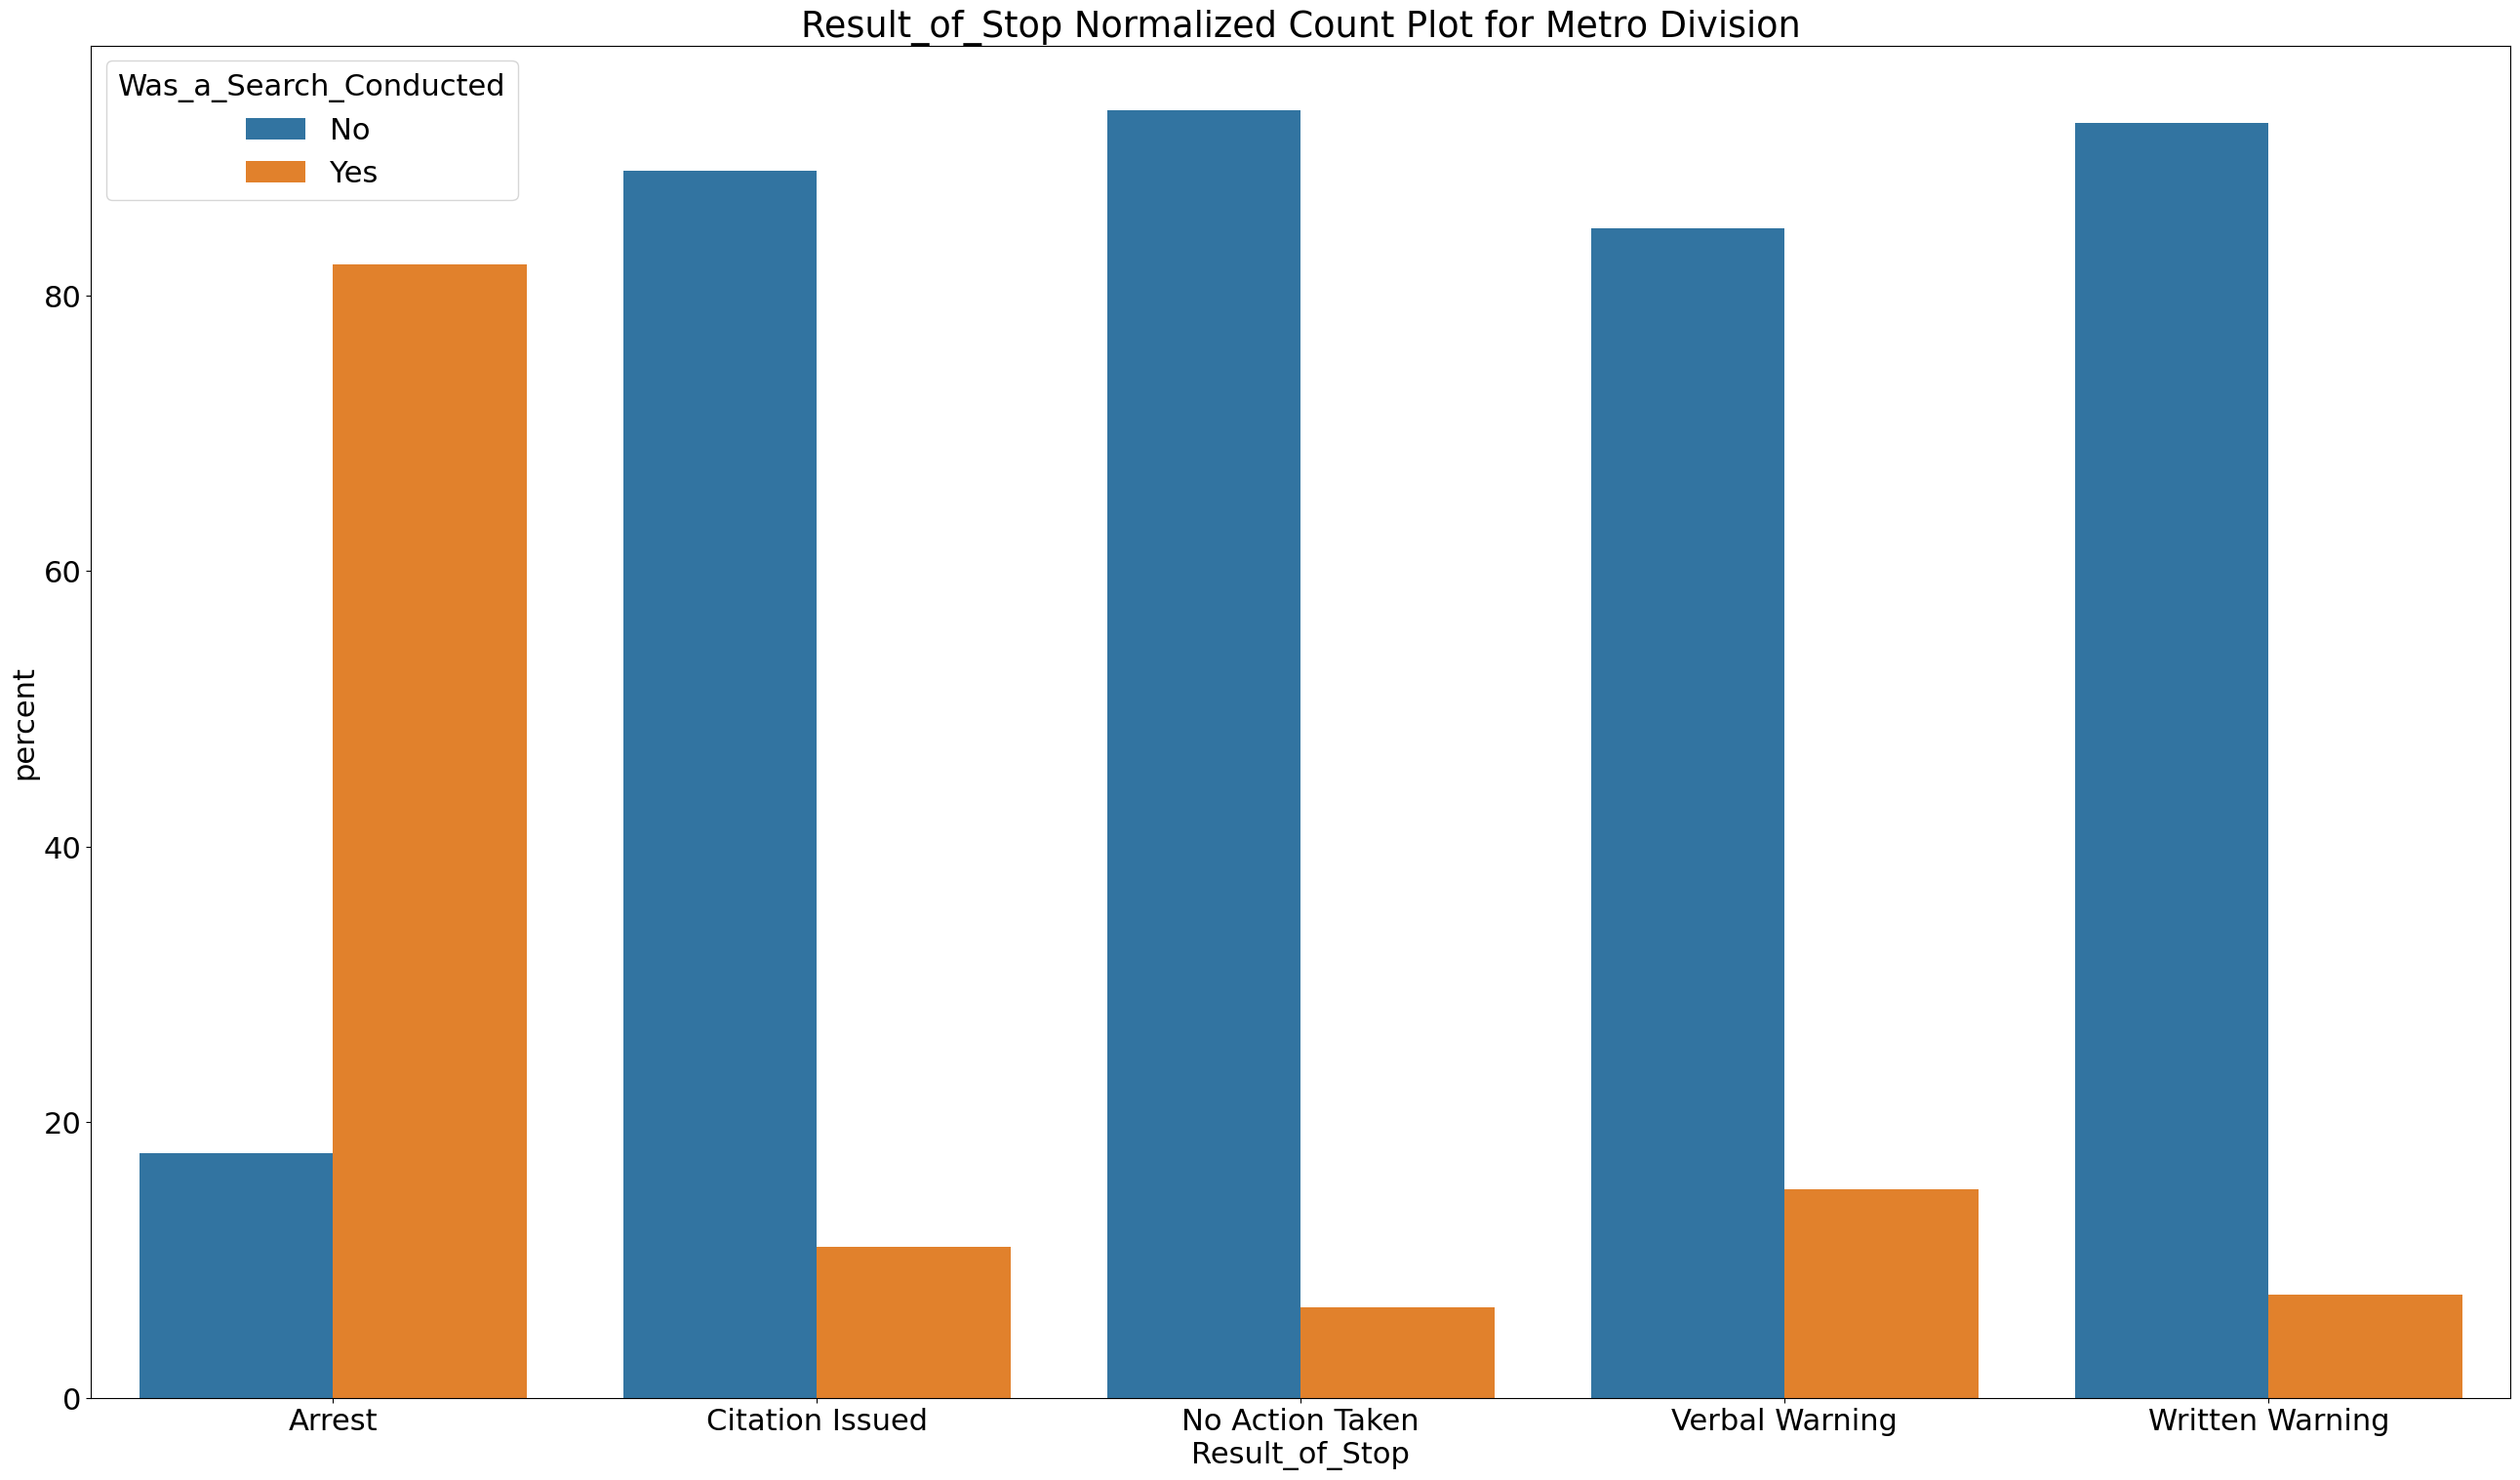

In [23]:
for column in categoricals.drop(labels=['Was_a_Search_Conducted']):
    x,y = column, 'Was_a_Search_Conducted'

    temp=(Metro
    .groupby(x)[y]
    .value_counts(normalize=True,sort=False)
    .mul(100)
    .rename('percent')
    .reset_index())
    plt.figure(figsize=(32,18))
    sns.barplot(x=column,y="percent",hue=y,data=temp)
    plt.title(f'{column} Normalized Count Plot for Metro Division')
    #plt.savefig(f'Graphs/Normalized_{column}_hue.png')
    plt.show()

Let's save a couple of these images to be used for reports.

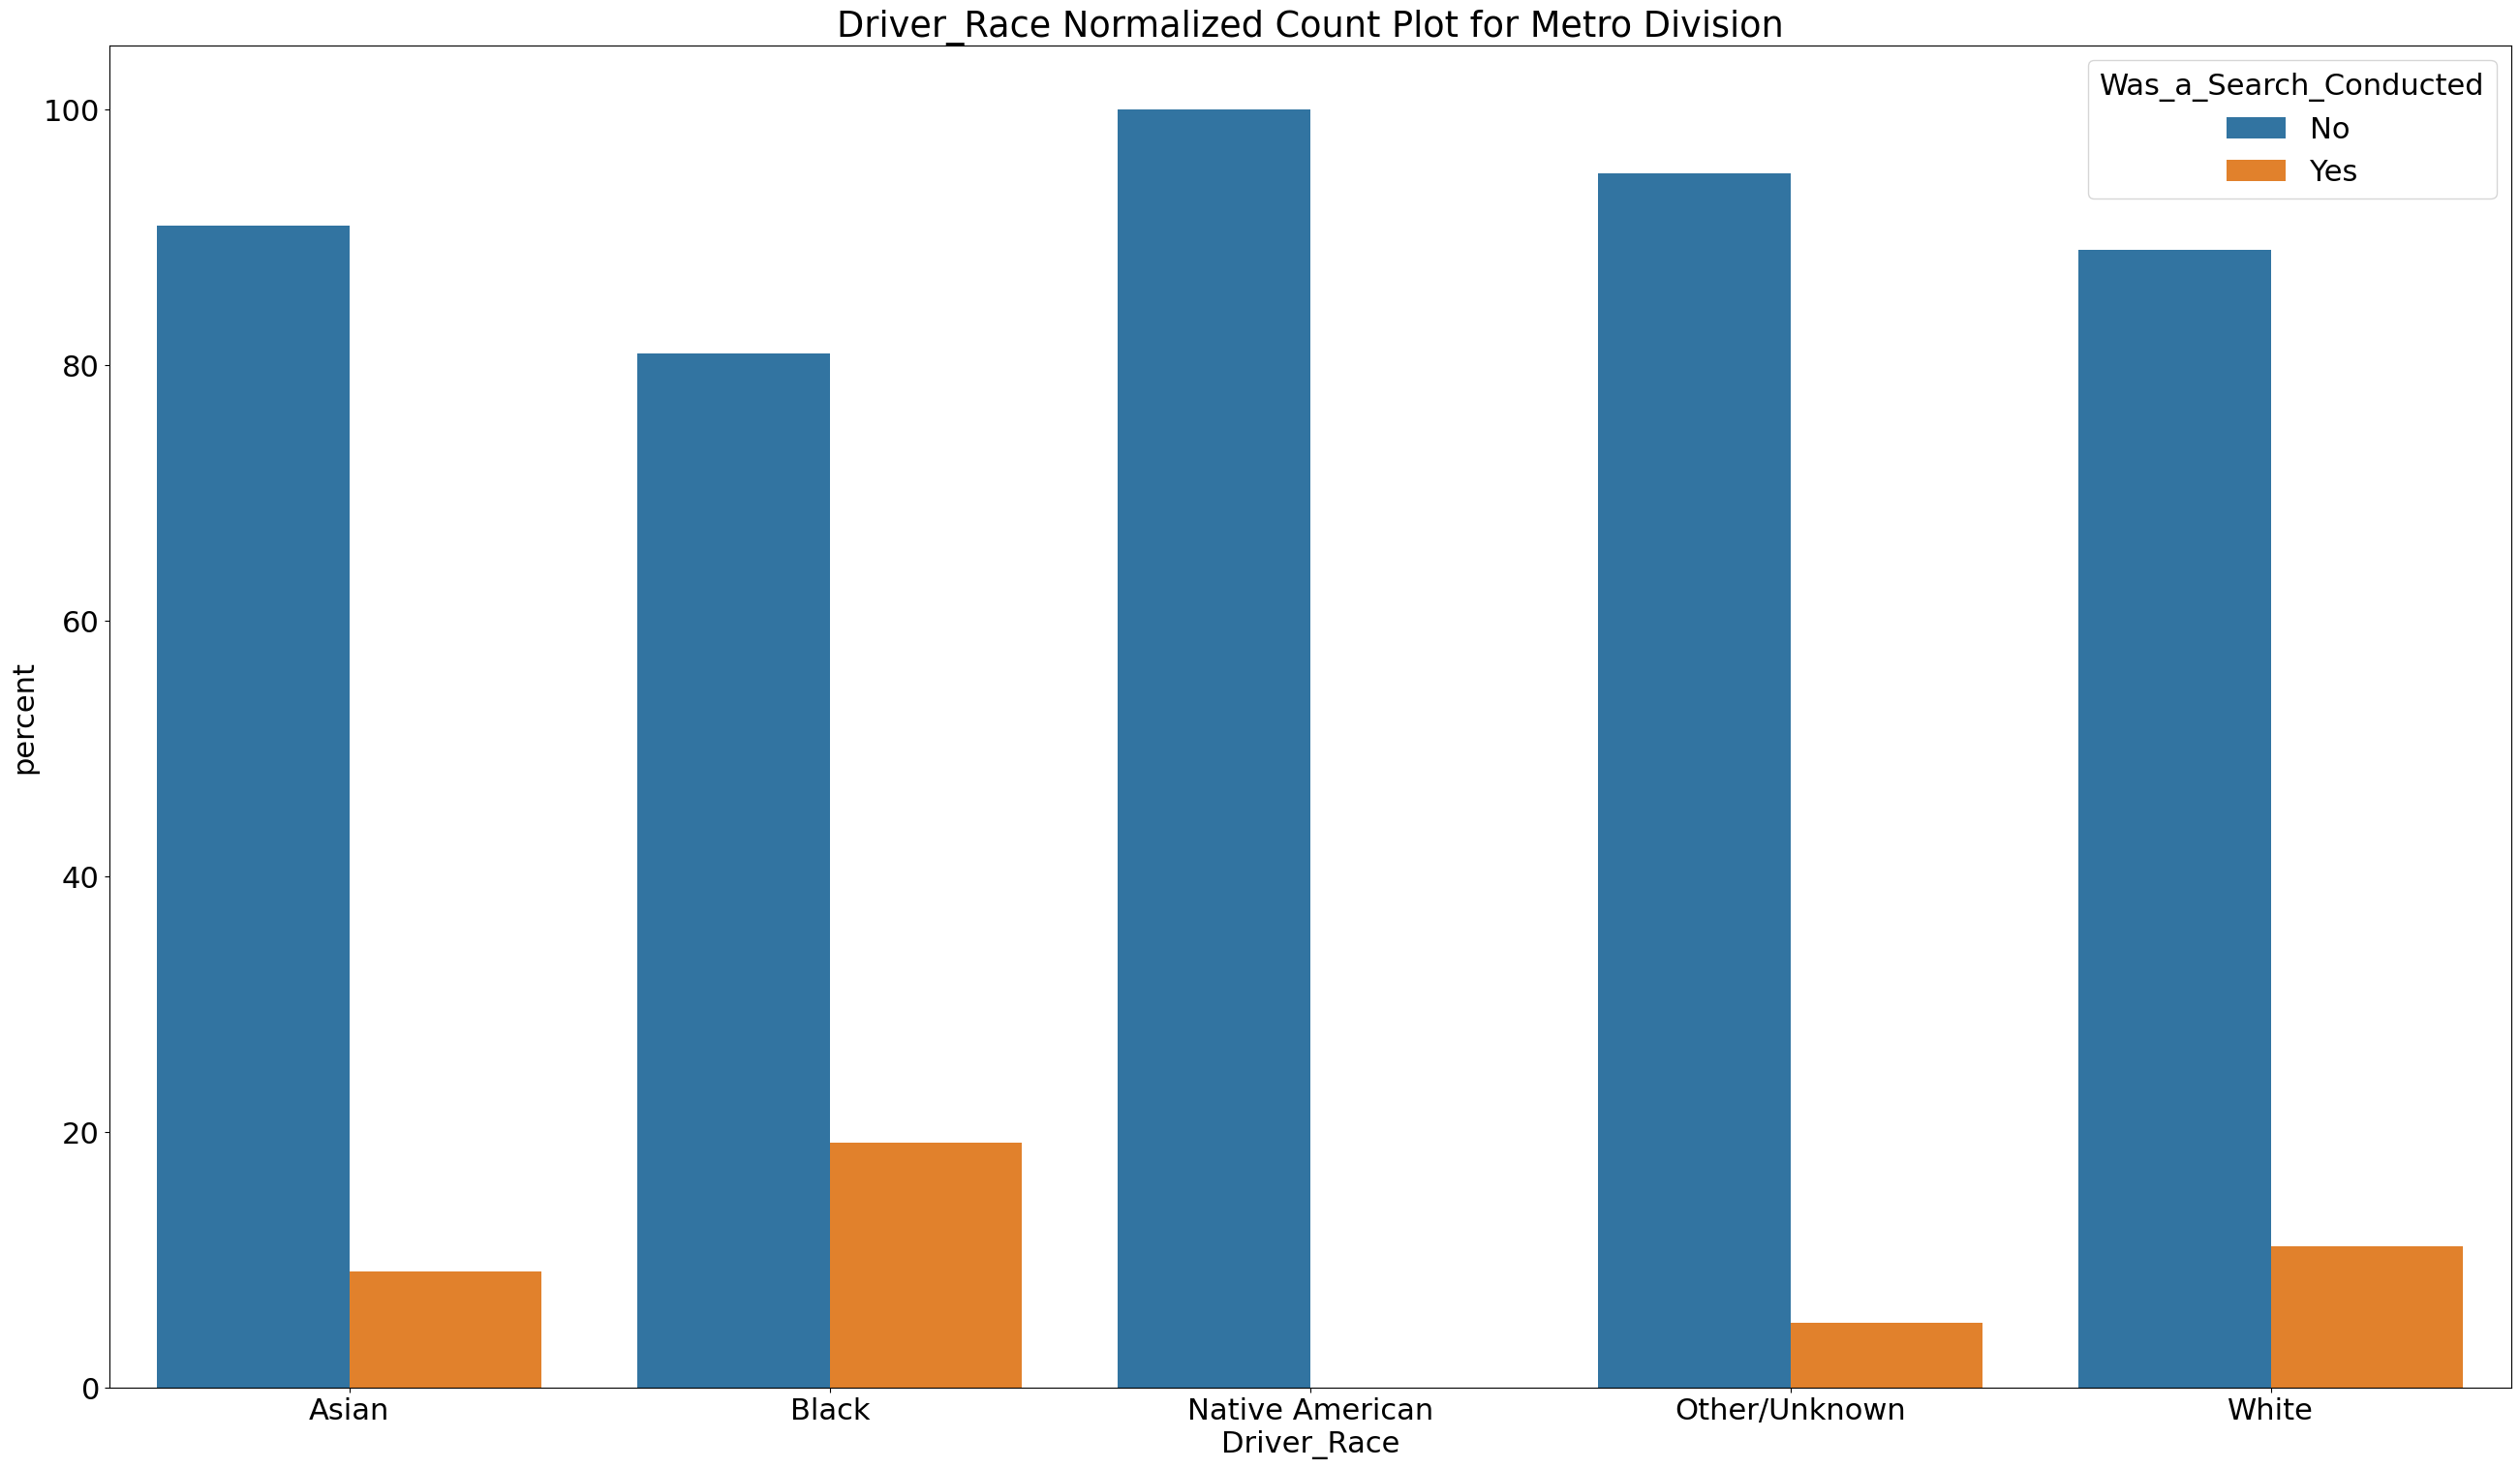

In [24]:
x,y = 'Driver_Race', 'Was_a_Search_Conducted'
temp=(Metro
    .groupby(x)[y]
    .value_counts(normalize=True,sort=False)
    .mul(100)
    .rename('percent')
    .reset_index())
plt.figure(figsize=(32,18))
sns.barplot(x=x,y="percent",hue=y,data=temp)
plt.title(f'{x} Normalized Count Plot for Metro Division')
plt.savefig(f"{x} Normalized Count Plot for Metro Division.png")
plt.show()

## Prepping data for later use
While utilizing feature visualizations is beneficial for understand how the features interact with our target, they aren't good enough to justify dropping features. Because of this, we'll run a chi-square test of independence. We'll be utilizing the **researchpy** package for this test as it gives the chi-square test statistic, the associated p-value, and **Cramer's V**. Cramer's V measures the strength of association between different categorical features. Cramer's V is similar to Pearson's correlation coefficient as it is rated on a scale of 0 to 1. More information about Cramer's V and chiq-square tests of independence can be found in this article: https://www.pythonfordatascience.org/chi-square-test-of-independence-python/. Let's now import researchpy.

In [25]:
import researchpy as rp

Before we run the chi-square test, let's establish what Cramer's V values we would won't to have to justify using the feature in our model. The interpretation for Cramer's V values is shown below:
- Cramer's V $\ge$.25: Very Strong Association
- Cramer's V $\ge$.15: Strong Association
- Cramer's V $\ge$.10: Moderate Association
- Cramer's V $\ge$.05: Weak Association
- Cramer's V $\ge$0: No or Very Weak Association

We will be dropping features that have weak association, very weak association, or no association. 

In [26]:
for column in categoricals.drop(labels=['Was_a_Search_Conducted']):
    crosstab,test_results,expected = rp.crosstab(df['Was_a_Search_Conducted'],
                                                df[column],test='chi-square',
                                                expected_freqs=True,
                                                prop='cell')
    p_value = test_results['results'][1]
    strength = test_results['results'][2]
    print(f'{column} likelihood of not having association with target {p_value}')
    print(f'Strength of relationship {strength}\n')

Reason_for_Stop likelihood of not having association with target 0.0
Strength of relationship 0.1845

Officer_Race likelihood of not having association with target 0.0
Strength of relationship 0.0753

Officer_Gender likelihood of not having association with target 0.0
Strength of relationship 0.018

Driver_Race likelihood of not having association with target 0.0
Strength of relationship 0.1114

Driver_Ethnicity likelihood of not having association with target 0.0
Strength of relationship 0.0262

Driver_Gender likelihood of not having association with target 0.0
Strength of relationship 0.1139

Result_of_Stop likelihood of not having association with target 0.0
Strength of relationship 0.4716



Looking at the results of this, we would want to drop Officer race and gender as well as driver ethnicity. We will also drop the result of stop as it is too associated with our target variable. This could be caused by the reasons for conducting a search being the same as those of the result of a stop. Because of this, and because of this, we will also drop the result of stop. Month of stop will also be dropped with the justification being the hued KDE plot following the same trend for both hues.

In [27]:
aggregated = df.drop(columns = ['Result_of_Stop','Officer_Race','Officer_Gender','Driver_Ethnicity'])
df = df.drop(columns = ['Result_of_Stop','Month_of_Stop','Officer_Race','Officer_Gender','Driver_Ethnicity'])

The final features we are left with are as follows: Officer years of service, driver race, driver gender, driver age, CMPD Division, and weather a search was conducted or not. Every one of these features are categorical except for driver and officer age. To handle the categorical data we can create dummy columns for each of the categories. However, we might not need to make dummy columns for each category in each variable. This is because there are likely certain categories, such as Metro Division for CMPD Division, that are the only ones that have significant differnces with search conducted.

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139528 entries, 0 to 139527
Data columns (total 7 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   Reason_for_Stop           139528 non-null  object
 1   Officer_Years_of_Service  139528 non-null  int64 
 2   Driver_Race               139528 non-null  object
 3   Driver_Gender             139528 non-null  object
 4   Driver_Age                139528 non-null  int64 
 5   Was_a_Search_Conducted    139528 non-null  object
 6   CMPD_Division             139528 non-null  object
dtypes: int64(2), object(5)
memory usage: 7.5+ MB


Let's get our data into a clean dataset, including dummies in order to start modeling.

In [29]:
for column in df.select_dtypes(include=['object']).columns:
    print(f'{column} has {len(df[column].unique())} categories')
    print(f'{df[column].unique()}\n')

Reason_for_Stop has 10 categories
['Speeding                 ' 'Vehicle Equipment        '
 'Vehicle Regulatory       ' 'Stop Light/Sign          '
 'Investigation            ' 'Safe Movement            '
 'Other                    ' 'Driving While Impaired   '
 'SeatBelt                 ' 'CheckPoint               ']

Driver_Race has 5 categories
['White' 'Black' 'Other/Unknown' 'Asian' 'Native American']

Driver_Gender has 2 categories
['Female' 'Male']

Was_a_Search_Conducted has 2 categories
['No' 'Yes']

CMPD_Division has 14 categories
['University City Division' 'Providence Division' 'Steele Creek Division'
 'Eastway Division' 'No Division' 'Hickory Grove Division'
 'Westover Division' 'South Division' 'Central Division'
 'North Tryon Division' 'Independence Division' 'Metro Division'
 'North Division' 'Freedom Division']



One thing we notice here that might be problematic is the "Reason_for_Stop" column. The values in this column have a lot of spaces in them. We'll want to remove them so that the dummy column names aren't too long.

In [30]:
df['Reason_for_Stop'] = df['Reason_for_Stop'].apply(lambda x: x.replace(' ',''))

Now let's go through and encode the object variables. For the binary variables we won't use dummy columns, we'll just replace the values using .loc.

In [31]:
df.loc[df['Was_a_Search_Conducted']=='Yes','Was_a_Search_Conducted'] = 1
df.loc[df['Was_a_Search_Conducted']=='No' ,'Was_a_Search_Conducted'] = 0
df['Was_a_Search_Conducted'] = pd.to_numeric(df['Was_a_Search_Conducted'])
df.loc[df['Driver_Gender']=='Male','Male_Driver'] = 1
df.loc[df['Driver_Gender']!='Male','Male_Driver'] = 0
df = df.drop(columns=('Driver_Gender'))

Now let's check how our features look.

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139528 entries, 0 to 139527
Data columns (total 7 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Reason_for_Stop           139528 non-null  object 
 1   Officer_Years_of_Service  139528 non-null  int64  
 2   Driver_Race               139528 non-null  object 
 3   Driver_Age                139528 non-null  int64  
 4   Was_a_Search_Conducted    139528 non-null  int64  
 5   CMPD_Division             139528 non-null  object 
 6   Male_Driver               139528 non-null  float64
dtypes: float64(1), int64(3), object(3)
memory usage: 7.5+ MB


Now we'll go through and create the dummy columns for our categorical data. We'll create two different dataframes; one that uses dummies for all categorical variables, and one that uses dummies for the unbalanced classes of a categorical variable. The first one is created and saved in a csv below.

In [33]:
all_dummies_df = pd.get_dummies(df,columns=['Reason_for_Stop','Driver_Race','CMPD_Division'])
all_dummies_df.to_csv('All_Dummies_Clean.csv')

Now we'll go through and use the unbalanced classes from our data. Particularly we will only single out the outliers for CMPD Division and Driver Race. We'll create dummies for black drivers, white drivers, the metro division, and north tryon division.

In [34]:
some_dummies_df = df.copy()
some_dummies_df.loc[some_dummies_df['Driver_Race']=='Black','BlackDriver'] = 1
some_dummies_df.loc[some_dummies_df['Driver_Race']!='Black','BlackDriver'] = 0
some_dummies_df.loc[some_dummies_df['Driver_Race']=='White','WhiteDriver'] = 1
some_dummies_df.loc[some_dummies_df['Driver_Race']!='White','WhiteDriver'] = 0
some_dummies_df.loc[some_dummies_df['CMPD_Division']=='Metro Division','MetroDivision'] = 1
some_dummies_df.loc[some_dummies_df['CMPD_Division']!='Metro Division','MetroDivision'] = 0
some_dummies_df.loc[some_dummies_df['CMPD_Division']=='North Tryon Division','NorthTryonDivision'] = 1
some_dummies_df.loc[some_dummies_df['CMPD_Division']!='North Tryon Division','NorthTryonDivision'] = 0

Now let's check and ensure that this is correct. We'll use .describe() to see if this seems to make sense.

In [35]:
some_dummies_df.describe()

Officer_Years_of_Service     Driver_Age  Was_a_Search_Conducted  \
count             139528.000000  139528.000000           139528.000000   
mean                  11.081654      35.431476                0.056555   
std                    8.637496      12.987651                0.230991   
min                    1.000000      10.000000                0.000000   
25%                    4.000000      25.000000                0.000000   
50%                    8.000000      32.000000                0.000000   
75%                   19.000000      44.000000                0.000000   
max                   39.000000     110.000000                1.000000   

         Male_Driver    BlackDriver   WhiteDriver  MetroDivision  \
count  139528.000000  139528.000000  139528.00000  139528.000000   
mean        0.621739       0.558884       0.38135       0.080142   
std         0.484955       0.496522       0.48572       0.271513   
min         0.000000       0.000000       0.00000       0.000000   
25%         0.000000       0.000000       0.00000       0.000000   
50%         1.000000       1.000000       0.00000       0.000000   
75%         1.000000       1.000000       1.00000       0.000000   
max         1.000000       1.000000       1.00000       1.000000   

       NorthTryonDivision  
count       139528.000000  
mean             0.067736  
std              0.251292  
min              0.000000  
25%              0.000000  
50%              0.000000  
75%              0.000000  
max              1.000000

In [36]:
some_dummies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139528 entries, 0 to 139527
Data columns (total 11 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Reason_for_Stop           139528 non-null  object 
 1   Officer_Years_of_Service  139528 non-null  int64  
 2   Driver_Race               139528 non-null  object 
 3   Driver_Age                139528 non-null  int64  
 4   Was_a_Search_Conducted    139528 non-null  int64  
 5   CMPD_Division             139528 non-null  object 
 6   Male_Driver               139528 non-null  float64
 7   BlackDriver               139528 non-null  float64
 8   WhiteDriver               139528 non-null  float64
 9   MetroDivision             139528 non-null  float64
 10  NorthTryonDivision        139528 non-null  float64
dtypes: float64(5), int64(3), object(3)
memory usage: 11.7+ MB


Everything looks good for this, so now we'll push it to a csv.

In [37]:
some_dummies_df = some_dummies_df.drop(columns=['Driver_Race','CMPD_Division'])
some_dummies_df = pd.get_dummies(some_dummies_df,columns=['Reason_for_Stop'])

In [38]:
some_dummies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139528 entries, 0 to 139527
Data columns (total 18 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   Officer_Years_of_Service              139528 non-null  int64  
 1   Driver_Age                            139528 non-null  int64  
 2   Was_a_Search_Conducted                139528 non-null  int64  
 3   Male_Driver                           139528 non-null  float64
 4   BlackDriver                           139528 non-null  float64
 5   WhiteDriver                           139528 non-null  float64
 6   MetroDivision                         139528 non-null  float64
 7   NorthTryonDivision                    139528 non-null  float64
 8   Reason_for_Stop_CheckPoint            139528 non-null  uint8  
 9   Reason_for_Stop_DrivingWhileImpaired  139528 non-null  uint8  
 10  Reason_for_Stop_Investigation         139528 non-null  uint8  
 11  

In [39]:
some_dummies_df.to_csv("Some_Dummies_Clean.csv")